# Laboratorio 2

Bienvenidos de nuevo al segundo laboratorio de Deep Learning y Sistemas inteligentes. Espero que este laboratorio sirva para consolidar sus conocimientos del tema de Redes Neuronales Convolucionales. 

Este laboratorio consta de dos partes. En la primera trabajaremos una Red Neuronal Convolucional paso-a-paso. En la segunda fase, usaremos PyTorch para crear una nueva Red Neuronal Convolucional, con la finalidad de que no solo sepan que existe cierta función sino también entender qué hace en un poco más de detalle. 

Para este laboratorio estaremos usando una herramienta para Jupyter Notebooks que facilitará la calificación, no solo asegurándo que ustedes tengan una nota pronto sino también mostrandoles su nota final al terminar el laboratorio.

Espero que esta vez si se muestren los *marks*. De nuevo me discupo si algo no sale bien, seguiremos mejorando conforme vayamos iterando. Siempre pido su comprensión y colaboración si algo no funciona como debería. 

Al igual que en el laboratorio pasado, estaremos usando la librería de Dr John Williamson et al de la University of Glasgow, además de ciertas piezas de código de Dr Bjorn Jensen de su curso de Introduction to Data Science and System de la University of Glasgow para la visualización de sus calificaciones. 

In [ ]:
# Una vez instalada la librería por favor, recuerden volverla a comentar.
#!pip install -U --force-reinstall --no-cache https://github.com/johnhw/jhwutils/zipball/master
#!pip install scikit-image

In [ ]:
import numpy as np
import copy
import matplotlib.pyplot as plt
import scipy
from PIL import Image
import os
#from IPython import display
#from base64 import b64decode


# Other imports
from unittest.mock import patch
from uuid import getnode as get_mac

from jhwutils.checkarr import array_hash, check_hash, check_scalar, check_string
import jhwutils.image_audio as ia
import jhwutils.tick as tick

###
tick.reset_marks()

%matplotlib inline

In [ ]:
# Seeds
seed_ = 2023
np.random.seed(seed_)

In [ ]:
# Hidden cell for utils needed when grading (you can/should not edit this)
# Celda escondida para utlidades necesarias, por favor NO edite esta celda


###### Información del estudiante en dos variables

* carne_1 : un string con su carne (e.g. "12281"), debe ser de al menos 5 caracteres.
* firma_mecanografiada_1: un string con su nombre (e.g. "Albero Suriano") que se usará para la declaracion que este trabajo es propio (es decir, no hay plagio)
* carne_2 : un string con su carne (e.g. "12281"), debe ser de al menos 5 caracteres.
* firma_mecanografiada_2: un string con su nombre (e.g. "Albero Suriano") que se usará para la declaracion que este trabajo es propio (es decir, no hay plagio)

In [ ]:
# carne_1 = 
# firma_mecanografiada_1 = 
# carne_2 = 
# firma_mecanografiada_2 = 
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
# Deberia poder ver dos checkmarks verdes [0 marks], que indican que su información básica está OK 

with tick.marks(0): 
    assert(len(carne_1)>=5 and len(carne_2)>=5)

with tick.marks(0):  
    assert(len(firma_mecanografiada_1)>0 and len(firma_mecanografiada_2)>0)

#### Dataset a Utilizar

Para este laboratorio seguriemos  usando el dataset de Kaggle llamado [Cats and Dogs image classification](https://www.kaggle.com/datasets/samuelcortinhas/cats-and-dogs-image-classification).
Por favor, descarguenlo y ponganlo en una carpeta/folder de su computadora local.

## Parte 1 - Construyendo una Red Neuronal Convolucional

**Créditos:** La primera parte de este laboratorio está tomado y basado en uno de los laboratorios dados dentro del curso de "Convolutional Neural Networks" de Andrew Ng

Muchos framework en la actualidad hacen que las operaciones de convolución sean fáciles de usar, pero no muchos entienden realmente este concepto, que es uno de los más interesantes de entender en Deep Learning. Una capa convolucional transforma el volumen de un input a un volumen de un output que es de un tamaño diferente. 

En esta sección, ustedes implementaran una capa convolucional paso a paso. Primero empezaremos por hacer unas funciones de padding con ceros y luego otra para computar la convolución.

Algo muy importante a **notar** es que para cada función *forward*, hay una equivalente en *backward*. Por ello, en cada paso de su modulo de forward, deberán guardar algunos datos que se usarán durante el cálculo de gradientes en el backpropagation

### Ejercicio 1
Ahora construiremos una función que se encargue de hacer *padding*, que como vimos en la clase es hacer un tipo de marco sobre la imagen. Este "marco" suele ser de diferentes tipos que lo que debe buscarse es que no tengan significacia dentro de la imagen, usualmente es cero, pero puede ser otro valor que no afecte en los cálculos. 

Para este laboratorio, usaremos cero, y en este caso se le suele llamar *zero-padding* el cual agrega ceros alrededor del borde de la imagen.

Algo interesante a notar, es que este borde se agrega sobre cada uno de los canales de color de la imagen. Es decir, en una imagen RGB se agregará sobre la matriz de rojos, otro sobre la matriz de verdes y otro más sobre la matriz de azules.

Como se puede ver en la siguiente imagen.

<!-- Base64 image -->
<img src="data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAnsAAAGaCAYAAAB3xIUtAAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAADsMAAA7DAcdvqGQAAP+lSURBVHhe7L0HgB3FlTV8X5yclXPOEpKQyNFgggFj8NpgG5xtwGuvd9fef43t/RzW9jrs4mzAgWQwUeQMEkEJoZxzDpNzevn959zqnnnz5o00GiSCVEeq6e7qqtu363U4favuLU8SEAsLCwsLCwsLixMSXmdpYWFhYWFhYWFxAsKSPQsLCwsLCwuLExiW7FlYWFhYWFhYnMCwZM/CwsLCwsLiAwO6GrS1tenSonewZM/CwsLCwsLiA4NQKCSvvPKKRKNRJ8fiSLBkz8LCwsLCwuJdRUVFhezevVuWLFkiixcvlqqqKs0nkdu6dau88MILsnz5cgmHw5rf3t4uS5cuUZJXWVkpq1atkng8rvssjgxL9iwsLCwsLCzeVTzz9NPy+OOPi8fjkebmZlmwYIGSvDVr1siiRYtk5MiRSuoee+wxqampkfvvv19aWlplxIgRuh5PJBxJFr2BJXsWFhYWFhYW7yraQyGZM2eOnHnmmXLppZdKfn6+rFu3TqZPny7nnnuu7Ny5U7e3b9+uVr09e/bIhz/8YRk/frxcf/314vNa+nI0sK1lYWFhYWFh8a6DJC4SieiSXbLswmX37bx582T48OFy1llnSV5enpb1gtyxS5dOGS0tLZLEP4vew5I9CwsLCwsLi3cViURCtmzZIm+/vUwWLlwofr9fpk2bJmVlZTJ+3DiJx2LajetxytOix7F9q1evllWrV8mAAQO0C9iid7DTpVlYWFhYWFi8q7jnnnukf//+MnToULXWDRs2TLdra2tl7969askrLCiQWDwugwYN0u1NmzapBXDMmDFqEWRd5lscGZbsWVhYWFhYWBxX0JKXSsyWLVumJI6OGO8U6bItusOSPQsLCwsLC4vjAlritmzdLus3bJIPX3SBlJWVduSzG/ZYkLRNm7fI/gMHZdzYsTJ82BAJBoPOHgsXluxZWFhYWFhYHFMw4PG69Rtl2fKV0tjYJF4Quxkzpkl+fp7Qt4LEw+Phigcr2EhlIqnbWCdN8XSM3gOc/a6Myspq2btvv4TDERk2dIicOnumjBkzSnKys7W4BdrJkj0LCwsLCwuLYwla7nbt3itbt26TiqpqaW5ukdPnzpbCwgLsJVtLZXQulL6Z1S5Izce6Vu2Use/AQdm7d79kZQVA9obKxAnjZPCggdbClwJL9iwsLCwsLCyOCzierhJk7+DBQzJ50oSOUCrHEuXlFVLf0CgD+veT4pJi8ft8zp7MIO2hXr4jlDuRYMmehYWFhcUJjWg0Jr/8y5MyccxQ7U7sgDEMHRYNDQ3S2tYmQ4cOcXKA1DrpMtK29+8/IEVFhVJYWMQ3rslMP2YPMkhItm7bKpMmThSPB8SE+W7BdBkZ0NjUKM1NzerpagABrg5EhmO62H9gvxRB58LCQifHxZFlGL23OXqr0qYr1m17XToVU+s7aGyE3s2O3ilFO4FMFWV2JBOpss3i1GljZeSQ/mYjBdSjqrpaCeKM6dNOGscOS/YsLCwsLE5oRED2vn/bP+Sbn79CAn6/k9s7xGIx7ZLMyspyco4ODBTMGHJMfUFra2ufrWFG9xh0P/qxa+9Ib9AKEuR3pnff2/zlRWtk2oQRMnPyaCenEw0NjbJi1Rol4eefd7aMGT3K2XNiw5I9CwsLC4sTGrTs/eyOeXLrzR+XYODoyAuD+HLC/muvvdbJOTo89NBDOgXY1KlTnZzeg7HkfvGLX8h3vvMdCQQCTm7vsX79etm8ebN88pOfdHJ6j3eiN2e6+NWvfqV694Uscpo0Blzui97Eoy8skfGjBncje7Q4bt6yTV56ZYE6kJDoXXP1FX0m4h8k2MA0FhYWFhYnPvpo1pg4caJ86EMfcraOHpz3lUGA+wISvC9/+ct9JiPjxo3T+WT7Auo9duxYZ+voQMeIL33pS30eE8fZMvqq9+HQ1NQsDY2NkpebKwF/QPwg/gcPljt7T2xYsmdhYWFhceLDGcuVjpqaGg3wu2TJEp2eK72zq7q6Wnbs2OFsdYLlOKfrW2+9JQsWLABpOKiWo3Rs3bpV6urqnK1OsGxFRYVOAfb2229nLMOuTO7LJJd6uXpXVVV105vgbBTbtm1ztjpBufv27ZP58+erfFri0kG9WT8d1KW8vFz1Xr58eY96c18mnbiPVrs33nhDrY5tbW3Onk7wN9m+fbuz1Yne6H04FBcXydlnni4XnH+2DBkySK756BUycuRwZ++JDd8PAWfdwsLCwsLihAMJysIVm+XcOVPE5+u0cXBs2K9//WtZu2atLF26VOrr60EChnRxSuCk++xOHThwoJNjQKL34osvyt133y1NTU3y5FNPyoUXXCjZabHdSMSKiookPz/fyTHglGCc8P/lV16RXTt3Krk688wzOx0NAJIlkhtaBlMdCYzet2l3Z096ExzvRz0HDx7s5BiZJGjf/va3dd9TTz2l+g0fPryLBbEnvffs2SOPP/64vAK9d0Lv7du3yRlndNWb7b1//37VOzWfIAm8//77lehRd47rSy9HvTlmkDNsuKDeJIH/8R//oXo/+eSTUlJS0k1vYtOO/VJWXCCD+pc4OV1RW1sn5RVVMn3qZCfnxIe17FlYWFhYnPjI0I176NAhefPNN2XW7Fly2mmnKQHZkWZRIuFJJUsuSEieeeYZmTRpktxyyy1KPkjMaH1KBedvLShgbLmuILmj1e3cc8/VsXEvvfRSN0saCdCECRO6eYy6ep966qkyd+5co3cG6yOPSxKYChJFWs1oWbvpppuULD373HPdLGy90Xva1KkZ9aa+1Dud6BG0gmKHjoEkSV65cqUS6lSQtGbSm+fI8/7qV7+qerP9M1kGj4zuep3osGTPwsLCwuKkBMN7ELQQcRJ+Eor2UEjzXNA5g92l6SCpq2+ol8GDBhkyCDJJ8pLe5cruTlq50hFqb5c4jjd44EA9fjQS6UZ6eIzHHntM9UoF9WYPaXFxcafekJcOkk9az1JB/agnx9Wx7oABA6S+rq4bSe1Jbx6HZWl1K4bekUi0m97Uh3qnyyQYyoZj5thmtIKSrKV3x9Lqye7pVFAWQ7J00bu+vlt79xYnG92zZM/CwsLC4sRHhrc7rUcMwHvwwAG1VuWChJSUmrlbXUyePFkuuugiZ6sTdJ4YO2asbNy8SdauXathQmgNS3dKuPzyyzM6OpSWlUk2jrdh4yYlZYVFRd26itk9efPNN3frpiRR4nE4TtDVuzRNb4KODnS0SAVlMX4dSRstZbTUjR07DufTdbaJnvQuo945ObJx40Ylg7R8puvNtqHVMF1vYtSoUUrS6ClMkkjilt79TKtgut6USb3Zvduh97hx4u+Dl3JGM+87BElnJnL7foEds2dhYWFhcUKDL+KFyzfLuXO7jtnLAWlhWrJksVqTLrvsMjnzjDO6TLPFMWrs9hwxYoSTYxAk+QC547i9RYsWyY033qhdm+lTdNFCRWJGK1wquB0Jh2XBgvlq3bruuutk2rRpzl4DkocnnnhCpkyZ0qUr19Wb1jcSRep9RpreBMkYu3hHjhzp5JguVo6TI3l66MGHJBaPyb/8y7+opS71GIfTO9QekvnzF4AwGr3Tw7PQssdu7XS9CRLiTZs2aXcsPZ2vuOKKbt3kPKdMenP8IAkk9WbbfPOb31SimX6M3ozZq6iolGlTpzg57xwk3gfw0UDymqn7+r2GjbNnYWFhYXFCQ+Ps3T5Pbr0lc5w9diOSMJBIpL+o6aHLrkcSk0wg6WB9WtcygcSGBIApHXz9Mt4bl5kCCFM2u2HPOuusboSGOJzeBD126dRA62Q6eExa93jcTCFSqDe7Svv16+fkdKI3etNLmQ4nmfQm+abTC/XOZP2jcwjHAfZFb8LE2RsiMydnDpi8ddt2Wb1mnVz/yY87OUYux2GyTUmSeQ60jHLcItuWBJTXAq2QtDCSMFMPkjySdXb3sz7Jb096vZfo/itYWFhYWFicRCBxoKUrE2GitawnIkfwxX64/SQF6RY3Fzwe92UiTAT3p1vWUnE4vQnu62kWC9ah3j0RE9f6lwm90Zvduz3pRQLI8XqZiB5B2X3VuxOHt2Ml0/r1aY3csGGD3HbbbUri2F189z13q+fyihUr1POZRHDxokVajuMHF765UNasXqPd0Vu2bpVdu3Y50t5/sGTPwsLCwsKiBzAWHuPC9RUc20YLW19A6xK7O/vqhEALGY/fF5DQ9FVvEqeFCxf2WW9a0Pqqd2+RTkOpK0kbLZmzZs1SL2ef16cWPXYVM0A1z2szrgWOk1z21jIlhTNOmSFz5syRKZMnZ/Refr/AjtmzsLCwsDihEcVL+me//rN86ppL5A+//72GS7nvvvt0rNjTTz+tViaSKlpzaMEh2XDHu9HKxG1aoV544QV1UHjwwQfVeeGOO+7Q8Cc/+9nPtKv1t7/9rXY93nvvvR2yOQ6PzgjstqQjB2WRQJBA0iuW3Z20UnHsH50sOE0Z485RNgkHQ5twLKAr+5577lHHEo6Jo4WLIVRocUqXTcsTxxqSpLz88svdZFPv//mf/1G9GWuQ4+5SZTMcjKv3mjVrlDhy/CKJDmXTQ5lWNsqmNzFljx49Wu68804lP8yn3q5sxiNk9ydl02r32muvaVdwumx2mTN+H/VmLD9aNh955JEO2SRinELu7LPPVisc2/euu+5S2RzfSNkVda1HGLNXLxXllajb2U1MYs3fnOfLY9CqyfMn+eNvQ53YNiUlpbgGSqW5pVmysrPU4YRWTIbDoZc062bqun6vYcfsWVhYWFic0Hgnc+OSOPFF3tcp00jWSFz6MvUYyRAJ2Be+8IUeuzwPB3qtsmvxkksucXJ6D+rNMWskh0cLEiaSaerdl/FrJKkkf32dMq2nuXFdcMzeqjXr5VOf7JzvmIT59ddfV6L+ox/9SPP+8Y9/qFfxo48+qgSWZI8EnuP2Zs+erdcGPwboiEJiSqLK+YDfj2TPWvYsLCwsLE5oGG/cLXLu3MkgH0f3Iqb1itaiw42dOxz44qdVjd6zRwsemySPnrI9jX87HFzdaXk7WlBv1uuL3sR7pTfRO2/cKpmWMoMGLXv0pqWFkI4WtJJ+9KMfVScVkl5a/dilP3PmTP09mU8CT+cMTh9HCx8tmYcbq/hewo7Zs7CwsLA4CdC3TiySAI7V6itonevr2DV2vNHi1FdQdx6/L3gnehO07vUVPG5f9e410i4HkluX2DHG4NVXX90Rz5Bd94y1yHx2SbMLnFY+elifc8458pGPfES7wzmrx/uR6BGW7FlYWFhYnPjo4R3sWnRonclErDg+jd24mUBSwtAmHGvWEyGkbI7NywSOEaRshu/IRKxI9thVmGnfkfQmeFzKzgSSMerNECeZRnNRtjvDSDqOpDfzqHdPo8SoF+MastszUxm2eV/17jXSrgdaIhnMmWMA36+E7Z3AjtmzsLCwsDihcbg4e//94x/LoiWLlTR97rOfk89+9rNdYuKRVDFxbFYqSHjoHPEv3/iGemuOGTtWfve733WbDYLkhNah9LFrPB7H43FcGAMNX3zxxfLtb3/b2dsJenxm6krluDIGPqacz3/+83Ij9U6LideT7iRZX/nyV6S6plpJ21//+tduQZkPpzedLR568EEZOmyY6v2tb33L2duJnvSml+0PfvADJXsMmsx5hdNnKOlJb8688ZWvfkVqqmtUbzpmnH766d1CxPRmzN7qNevl+pQxeyc6rGXPwsLCwuLERwZjDQnDggWvyS033SLf+vdvqSdresgPeuTOnz/f2eoErV70Ev0ciNYzzz4rjz/+uFrDSFJSQQ9eOkqkg56ePP73vvd9+fznPi/PPfuckplUsCuTHqjpVkOj9wL553/+mvz7v/+7EqeNGzY4eztBRwc6WqSCMpn/+huvq5fpNddcI488+mi3+W2pNz1Q00FvZRK+7//X93XWkOef7643ieKf//znjNbOZ555RsaOGyt/uv1P6k3MGHYc95YKWu4y6c38hW++qbp97GMfUw/gdL17B89xmDDt/Q1L9iwsLCwsTnxkeLvTwuXz+yQ7J1stciQptEilguOwOCg/HSR1JDmlZaVal2O+KC+9W5PhUzi+Kx08DglMSUmx5OblQl6sW3cvrWocD5ZuXeNx/NQ7O6dDb1oa00GLIceXpYL6MVAwHSAYFLm0tETPI11vep+mT2NGuHoXF5coWWM7pOvNLtFMehPsos0KZklxUbFa7kj00ts8k95ue+fl5aveDIGSSW+LzLBkz8LCwsLipAQH5LMLkBYjxqkj+Uj3uqVnJslROliP8+WuXbtO56hlrD52/6YTHI7pS7dcETwOSdHKlStlO45P0pbufcpRVrQWphOaLnqvg95Z3fUmeFyObUsF9SOJI2Fbvny5Bk8eifOgLqlgvXQSRnTRe/t2KSjorjf1pd6ZRonR27Wqulrj9DWCtNKzlcQzFZn05jFV74ij98YN6gGbrvfhQFJcW1eP37NexzlWVFZJC37fkwE29IqFhYWFxQkNko+FKzbLuXOngOx02jg4poxWInaDsjvwwgsvVEsciZsLkjVakEhSUkGyRfJBsrRzxw656qqr5Pzzz+82zoxduJzAnyE5UkFyR0cAOjJweeWVV8r0GTO6OAdQ79WrV2sw5dTYbdSbOjIWHfVmDEBa4lL1JkhSqT+tky4oh+SKeq5atQrnEZTPfe5zan1MPQb15owQ1DMVuu3ozfKq9/TpXfSmFY7Bkhm8OlUmMWjgQA1rQqI4YcJ4jQFIS14qqDfJXia9A8GAEs0s6M+xivwN0o/RU+gVErzt23fKilWr1RrZ0tomQ1A/L7fn6e5OFFgHDQsLCwuLExqHc9Cgtcf1OiUpS5/vld2jtIJlmgqLZIxEkGPTSOZYN92Tk6SC+elyCcomWSNZofx0RwO+nkl6GPojXe6R9CZIbpjSCRvl8tjUjcektS6dMB0vvQnqTRkkp5nmuX0nehPGQWOIzJw8yskxYP1du/fKa2+8CR1aNM7ehy44L2N384mG7q1kYWFhYWFxoqE751DQwkVSwpSJ2NCC9eqrrzpbXUGiwXr0xiVxyURs3Km2MoF1OB0XuzLTCRNBkpnJQYM4kt5EJgcNgnrSOki9eexMhKknBw3iSHqTiNJBI91ZxQUJIru8ucxEtNg9zenW0tEbvTvR3Y7F+kOHDJZTpk9Xz+U5p846KYgeYS17FhYWFhYnNA5n2TsSOH6MVqa+zubALkkSFKajBV/P9HxlV2UmInkkcMwdE4nR0eK91JttTgteX/QmjhR6heP0aB1kF+7JAkv2LCwsLCxOaIQjUfnmD/4ov/3RP8u2rVs0eC7njKWDBcOY0OGB3bG0NJEcuYP+aVHjJP27d+/WeHJc59g2hmjhnLG0QHFGBY5Po8cuw7ZMnDhRLWKu7B1rV0t+SamMHVAm4YSI3+E+Mbx5s7wgNsgrwLIhLtIPh62IiQzFcl80KSO8cfntk8/Lv15zheyNe2Vk0CMHoiKDsL8a5Up9Ik2on4v6mWRv33dAmisPyfjZc6UMO6tQZ4gjezRk7QgnZTwK7owkZJTKTkK2R2VvX/m2FA4eKuOHDRUUU9kkC3QVQdFuelfioENQiLKHQ+/fP/WCfPe735VNmzbp2D2OAaRDBYMls71JJtlNS2JHKyWpCC2BtFLSmsrfYfTo0UoYOVUZ19nenIeW4V/Y3gxfky6bVr+XFm84LNk7GWHJnoWFhYXFCQ2SvW/8v9/L73/8Ddm0cYMSBhIHEgh6jXIOV44xc8mH2zXJblTmk+wx8C/nRqWjBrdJGElkZsyYoQ4DdJCgR2+67L0b1knL/KdlYOUeELJkByFjBydJUytIUxFIWx0IVn+QpnIshwc8shsMa2xQ5J76hHwerG4ntseAmO2LxGUI9pO4laE8yVYeyR4JGWTyhU7Z7NjdG0kq8euP8v1x4HISMRx0D8jdOMjaEkrI5GyPbAsZ2Xuxn0SzErJJ+NgKo6ADdkNvE5sujj8kkm04l0LoXe/ofQgklLJ3Q/bogFfubxL5xXMLZN2GDTorxdatW5UgkyiTwNFxhGPu6O1MssfxjyR77CJmWXYFs63pvEFHlHHjxmnMQ7Y3HUvY3nReyST7laWbLNlLgyV7FhYWFhYnNEw37uNy6y3XHnU3Lh0R2KXIMWp9wY6nHpa6O38hyR2b+MbtGDrY8eLFK5hdnfomxk6lVPyP9ST+VEUTMiDo03wPtpOOjNT6RqgrmYdJ6v52/KHFr8THeqZWTzK4m8fjDh6LJC4bpC7b66HapmyHDPw1RdNkoCYzQJYTV35aTv/pH8Xr7z6m70ggASTpTp3J5GhwpG7ckxH4KS0sLCwsLE5wkKH0AeyS5bRkfcWa9oR2zSqJIkliMrscxkTKZGD2cxsJ67TQvdySlHgCjE1JGsuAyKkARxDq85+uIxliZvIqojh+COU7DpxJBjOQKIN/tahHVlPvqBYy9bWsKd9VBne5Mgxi0ag89NDDPTpoHAm05C1atMjZsjgWsGTPwsLCwuLEh0tMMiAWi2nK1NHFGHccr9cTSGjY5dhTJ9kZuV4Z5jfkiITKUCKs67apo3Y47DBLJpbyatfptcU+XbK84Vx4bWNT1zvqA0awI4PbHhke9MqZOL571K4ynHUdhddZz9XhzDyfDFOLovlnhBKs52yrDBXo7DEy2A1+01e/Kn5fZisqu2zZRd4TGRw/3sTfywS2M9u7r0TyZIUlexYWFhYWJz5crpIGBkV+4onH5eGHH1YHC3repoLj7uiAkQ4SFnqcPoJ6D9x/v84IQQKTji3hpNTGlQZJFH/rwa2a4x5QLK80JTyyNyJSFfPo2LpWbuPwldGkJDwJiSeSsqQ1qRY+D4gVLWwNyGOdGsiI8RWOes0owDF8KMqSmkdSVBNLyGYOuHNOPoH61GUvDtaCY4GqYdsre3DMBiwhmgdCZY/Wq0X9ZBKJlZ3243ojdcCpVlNv6qB1uNfoE4sn5IUXX4T+3QkZvWA51/A//vEPDWnDAMvpoGMLx+OlgySPFr8HHnhAHn30UamurtbfweLIsGTPwsLCwuLEh5KRruDYsF/+4hdK1BiPjgQkPbYcg/5mCgHCsXwPPvigPIA69Q0N8rWvfU3JR7qFj84XdGioBu+Z35KUf4DtrQeRqgCRWtCSkCcbE/J8U0JJ3WtIzzUn5Ulsb0IZjoHrj/peKE9i1goZD6H865DzaENC9kWSOi7vNch5CHLpaKHmOoeYZWHJ41MnalUe9ch9KLesLSF31SakGTzp3vq4LGlLyr11cakn4yQgQ/VWOQ6Rc3YdAhGl3k80xuU56Lk5RLLl7AQx5LoH5zt06BDVPx0keveDHG/ctFFjCLLdaVVNRaY2J6mjV+7Xv/F1bfu//vWvMm/evIxTull0hyV7FhYWFhYnJRiq4+ChQ/KhCy/S6c44V+sBEIpU0DuUM1SkgyTjrWVvyaWXXSpf//rXNZQLrYDpxIWesgGQniwQKHZqgltJQzypL99hAY9MzPZIDarsB4ka5jehTzaAwdH65/HEQbpI8wxpopcsxwCOBgujxXAr0hutIgdiHgEHlCa6yjq8i4SN3r553k4yRmK4lkQzKrIBS78nIWfkeCSSxDGxTa4IZog/HsnDcaEedOB2AjnUQ8SHcxkGHSeCwdbiXHaCcKp45LvUjsuysv5YujmdoCctp0H7/Oc+r7ELOT7PnQnEBcOvMAxOKmg1ZdmG+ga5+eabdWq6pUuXdrPEWmSGJXsWFhYWFicl1Hs0ASKjpEb/mJQCdimyezcTvDRhcen1SiJOOSRoXeszlh0tZoVej4wOggT5kAlyNADLbBApErsciLkk3yNjwM5GokyRzyOHQOwSCY+swH52r1LqULCvmdlemd+ckHIQNnbnrmqDfJA8xr2rA/lSQ5uCXbRJ2YEyJF0x5DNMC3nZYLDORuwLQ/7sXK8MCbI+yB7KKNfDn+0hysMGj63nZM6LYVZoqdyAwuCpck6eoXTsmOZQPnLDeDQury1YkLGL1W0jJra9m5cKhrhhDL108EiUyVkvqKfHaX+LI8O2lIWFhYXFiY+ufELBWHj9BwyQ5194QR568CGdaD918n2CQXszOWhwZok5c+fKY4/Nk1/96lcydNhQDezrBmR2QQeJoYw+oozIA2JoiM6WsEceb0zqWLtxIHnL20V+W5uUt9s8Gu6EBNGHN/S1RX7UIecyFj4P9p2d75URqEPySLI1AOSQPbC0KSZInMi6UHZ4wCtn5IFVIi+GrBYQOu4p8HslAra0KeyVL+2Pgjh5tW4bUpwFUOosOmigvorCNpc4hFoUn2hKSjUKMlYfx+1RN8rQclgEsoLy1ZtuyjgV2exZszQu3u233y6VVZX6G3Be4VTQQePSSy91tgwYi2/ipIm6/M1vfiPPPvesnHnmGT1OFWfRFb4fAs66hYWFhYXFCQdagxYu3yznzp0CAtJp46BF7vTTT9eu17Fjx8rHP/5xJRqpliYGSKYTB0lJKkgyTjnlFCV9jMP3X//1XxoEOH2+1jfWbpDWlYskt6FK/CBDpSBmw0H+8rDkzBeDAibQMonV3Fxa3BIyJssjVxViJ9jV880MgOwR0iafNyH5Hq8GR74w3yOzckm4QI6wn2ki1kv9NHmZYx9EOXb10iJIvjkAPJSzXbDb+Ppin5yawwDOXjkUTcjVON5k1KfVjl23b7cbYkg1SBZd0BaXi+2BUMiPchAj/SCDJj1a9QiGinlyyw45+0v/LN40j9wJEydqzEL+JldffbVceOGF2lWeCo6bpFMMAyW74G/CsXwk3pwxg966119/vealY9OO/VJWXCCD+vdtirsTEZ5k+mhSCwsLCwuLEwjvZG5czvTAMWXpZK+3WPvEQ9Lyl19IYOdG00UK3kTq1OXNq1zKwxeymJh2DJcC0oTVbeGETMjyic/DPlb+pwBSLizV7OYIIiHDqulOZb5HmuL01AXZ4+A9zVEBKsMDGR0x/UxFgASTspM6LVsRiDGnRFMYEZ0ysK02PZXhwJGRBOGtPvNSueLOh8UbCOquowGnUuP0dSTgfYEJqjxEZk4e5eRYuD+jhYWFhYWFRRpoD8k09qy3AC/SZIiZkzrWDWHif7PFkmbNqaWWNCVVuoV9uht/HJLFv53JLecCupuFpi4ytL6hAFzjTtbXdZBFrqk0zQBcGSqEmUhO163J4U5niUTrnhbtA9R7uAsb7gveaf0TC5bsWVhYWFhY9ABamOhl21fQ87U1TtpkSBBTqjHM+OUaimSsc2YnyVYC/3aF6aBhSJjKcEiQGu8AI9Gtz3zuMDsZWoUhXgxl7CqDhzGetswxdVwZ3Mk5els6mKKpz6Qqcr1DBsswr/M8SI43bKAlUyUeNRoaGnSeW4tjBztmz8LCwsLihEY0FpOf//Yvcv3HPix33H67TJw4UQPzDho0SJ599lkdM7Z48WIde8fxeQz0S4JHRwI6GdAjl7NCvPzyy1JWViaPPPKIjif7y1/+IrNmzVIHDY79++Mf/6gOHamyB5TvlPUbNkl7XY2GKakDiaJTxr6IqAftJpA5ryehjhnsMp3fmpAhfq881RiXSUGfLMb2zByvPNqQlFFZPnmhOS79/B5Z1EpvXk6HJupssRNy6uIekLuk7IsmNSYf4/ANhix69Bb6PDK/RWRIwCNPNcW1a/j++oRMz/bKI40JGR1MQLZIGcovbIvLyKBHZcbA6HaEQXqha0XUI/uhdws43KYQw7F4ZHmbQG+Pxt4bEkjI000iE3P8smbYFLn4+hvl93/4g0yZMkXuu+8+GTp0qDz99NM6zu7NN9/UcCrr1q3T+IR79+7VsXgketu3b5cRI0bIa6+9JsXFxfLYY4+p88vf/vY3HSd52223yRlnnCG/+93vush+6qmn1MmmvLbVjtlLgx2zZ2FhYWFxQkPH7N0xT269+ejH7DHsCoP5XnbZZU7O0eHJhx+SwN9+If32bsYL14QnoQXMsaOJjnnTPGwzS01lWEl4dOaMxxpj8k9FQTNmD/uMjNT6+NNhXsOGs8rdDM1yAMTvbAb70x3cTxlxyOC4QFZOOjqwDI7hyFsI8jYSxJDJ1dnAHMOML0zXw8iIosIznmL56bp94u+Dt+yWLVuU+F155ZVOztHBjNkbLDMn922c5YkI/jIWFhYWFhYnNgxjOWrQYjRjxgxn6+gxMcsjZXS3BRky5MjoYbpelTWZHCVcJGLYJnHyJjXkCkO30PLnFHVkuPUNiVPCxTq6hzLMWr+AyASa/7jTyTQyjAOIkWHCo7DTuEMH5E4CR2N9MyzPrc9k5BsnEFeGoRKujIA/IJdeekk3z+TeYsiQIWoxtTh26NsvYWFhYWFh8UECGUofwJky2LXYV3BWizA4EKEkiWrwjybNNQtCs0iikECamF+jgZBNWW53yNAMJBblH8O9TLYjg0GTOW+ubrKOQ3iNDM3gCjJ4LEeGZnl03l5Xb93h6suEbW1OzXOSKwPgmL3y8gpsa+GjBtucYyUtjh0s2bOwsLCweNdBssExW41NTVJVVa3j5d4LcHwYx4Ldcccdsnnz5m6etyQenLw/HdSfJPCvf/2L/PznP9e4cLG0qdKIVoiLkgwp8QFJAh+KY8mxcC45IsCtJIJlR0mHX9XHTTmlfsqwPFqW9TlqjtmcYYNBlVM1Z0kel04WrM19HNtnfGRRz8tZNbAkSXNkMNQLuSFLtGAlyhUklAI8up8yzXFQD3WpB+toJYIqoUw1ftNMo8QikYi8+OKL8utf/1peeOEFqa2tdfZ0gtdCY2Ojs9UJXi9vv/22tvfdd9+tc+RmOoZFd1gHDQsLCwuLdw3xeFz27TsgTz3zvLy9fIWs27BJyisqZdrUyRlnXDgWIIHLFFSZxONb3/qW7ucYsd27d2sXYv/+/Z0SZlJ+BgHmzA2pYOw9ksRXX50vU6dOlR/88AfyT//0T+ogkAr/rg2SXLVYEnXVur03KvJoY0Lua0jIXnWgIDnyyIvNCbm7Li6n5DC2HYkUqZxXgyBnq8qGctFadmdtUua3mPh5JWiyJyHvCaRsn0eGdcTUEwmiXrHXK5w9dmGryP31cXXyYIy9n1cm5WXIWNWOciBtv6uJQ05SHoJenMGDc98yQLN2+GI/9X4Y++6pS+g4wFwc93XU/21NAjKSMtDvkf5IJKXerKBMvOoTMvC8S8ST1pX7zDPPyOOPP67t+eqrr+qMI9OmTcMhjN4E25y/QWqbk9TRUea666+XD198sTz88MNKridPntztt7FBlbvDWvYsLCwsLN41cBxXTm62ZGdnSUNDs8SiMTltzmz1dj2u6OQSHeDE+ocOHpJzzjlHHTAYzDc95AedBebPn+9sdYIWv7feektndLjppps6yCKtT6lY2soAxcb6xFAnMZCWOTkeubLATHG2G8V3RRPyRotIwGOmLdPAymoxS8oTDXGQUWw7Vr3XIK8x4VWLXQRpBcja/phH2lE+RNMbLV0oi03ZDzK5rC0mzTjQ+vaYzrcbwQ4GW6Y37U1lHlnUQs9cj/xyiEe+XOaT6SCbk7JF1oXiWl85GGSua0/oVGofLfYq+VwAosf5fr9S5pUxYJVL2nhc2g09EgmF5Y4775BYvLulc8WKFTrTyGc+8xnJz8/Xdku3nHLWkpdeesnZMiAxp3d0U2ODfO5zn5Nzzz1XlixZLOHwe2MR/qDBkj0LCwsLi+OOWCwu9fUNsnHjZlm5ao3Ohzpx4jiZOmWSjB37LnhNkitlAOeapWWPKVOX4Lhx45RY9ATGwKOFyQuilqk+iR3Dn9Dixckphvg9wulqd4BI1YKcVYHsrWzzyBQQLJI3dttSWdrI/J64XF7oER8ZV9IrNSi/GKRwgD+JvKROm/Y2SBZf5AWQSb5l6JWRwWnSZueKDAaPvqrQL8U+yuF5iuThvO+tS8hAlIlBVlPcKw+DWF6S75ERyJuT69EwLSzPTuDhWI8nPPJ6M4ljUqd9OwXnRkJYHkvIBSCvHjJMHJfE/cYbPtejpZZtTQsvrXlM6e3GsDYXXHCBs9UVHrQz65rfS3M03+LwsGTPwsLCwuK4gS9lkrwtW7bK2nUbpLmlReacOksuufhCufhDF8gZp89xSr77YJftUCTG2GMMvdLSUhk+fJiz14DWPsaASwfnxGVsvddfWyB/+cuflRQOHz5cuyVTcQhkriXBzleQEvzfBYJGshQAySH5YuBjkj9a2+pB5g6CPPHVzBoJELztEVAtZJEs0nrHeXKrYkkN1lwBZsf5bjkWj9bDesgIcRyeQ4Io81DUEConU+KQXYd8bl2Q59GAzxyft7QtofH7BkEebazUm7oZvb0yLOhVC+AAkL7RWV7JAUF8tCEhzzclNTwLrZTkejxSIp7Ab70GPNEcMxWzZ8+W8vJyefChhzqmoSsoKHD2GtA5g1bSVJBAsmxJSancc889snTpUjnzzDN1jmKLI8OO2bOwsLCwOC5owst82/adsmv3XrXyjBo1UiaMH6svd3bn8kWdPt7qeICEc+GK7mP2eGwSCFqWGASZXbITJkzsQtjYxdjW1iaDBw92cgxYZhTqGsuUyA033KDBmtOtWfs2bZDEqsUSaKgCE/IoySMxouVuAkjTOfkemZvjkcnZImPAW2hR4xg60ixwLTkI0sVxeKR/hb6kdrNOzvbIJBAv1jsV5ac625Ow5Bg/Hodg0GYSRJI4Wgf7+ZN6jH5+r8oKg0yeAcI3BTLZSzweMoaA6QXQRDUgkgzPl8vmQl32EJNU5niTOJ5XxuNYKC5j8PMVcw5dENcBSKR3Ojdu6WCZdf3nxZvWHiTYHJPnhcyzzz5bu9Bp5U0FSWBra6uWdcF25nhIBq3mfMUMh3P11VdrXUNmO2HH7HWHDapsYWFhYXFMwfFVO3fuln3790shXsajRo6Q0pISkLvjT+wyQYMq3z5Pbr0lc1Blt0sxU1w4kg56h3LmjEwgkWRKt+i52PnUw1L3559LcgenD0MGeAmXpqOWJMbJ5F/s0PF6oHbMoWGsKk7rHckeVpBLZw7WMW9ulNKqRoZWpb+tkh+PhED2mIod1YxPrpHBwpxJzc+ypqLuUx3wryHhkRzsI6FDtsKUguZOcVZVWbqRIgNtkbjqM3LaT/4oXn/3sZikHWyzw7U5x0TSMSYTOC6S7Z1O8lyYoMpDZObkUU6ORfdWtrCwsLCw6CP2HzgoL7z0KojeQZkxfbqcPvdUGTxo4HtG9DqQmRcoaI3rKQAwHQgWLVrkbHUH6/VE9IiV7Qkpj2JFuZBRghyFw+doB9N4yYa5aRGnhJI5WtNebIpKHGV0ZJ5yNWM9MzyH9Um+OuvrPt3yyKEovW1ZGbkgZakyWDLgNctOHTplr2yj3twCtD73shxJKta66cF9mgOyH5UHHviHkuhMIEk7XJuzC/eNN95wtrqDXbo9Eb1OOLpbKCzZs7CwsLB4R6ClpbqmRl57Y6GOy2MYlQ9deK4MHjywxxf6u44+vvvZbcju3b7irFyvDFPjlkNOSJZIvFx90DyGIjHRpsY1/PUkhT3O1xT6xa9WM7IpZ5/WZ7tiW+sb2axDIubKGAF+fWYe15lLlgc5HtajDDqUmH2craNrTQ/q+WQY+bkem7lcZX1uGxg9usvICgbkpq9+Vfy+nknw4TBhwgS59NJLnS2LYwH+6hYWFhYWFkeNWCwm5RUVsmbtevWw7d+vTD50wbkydszo4x9K5SjAbsPqGhPkl0GUSU537dqlXYUMtcLgvAcPHtQgyZWVlRrol4nrnBuXQYBZhmVZh3Upg7LYHekGY84ke2Vtk2wNJ6U5kZS6eEIaUa4B63TGYPgUeuO2JTxSEU1KCMSJjhEc07cvgiXKPdIQ13At+yMeoYHwYCQhIRCqylhC2rGf9VtQvy4mgqKQLVjH8bC+OZSUNW0JlI1DtnG6iCYTkMUwKknZG2WoFCwhm8GR6eQBVdX5Y217UraEIBty6nCsRuhO+fU4ThOOW428VuhFPcJYHqR+kLEvAhm4Lm5/4GGJxeMaRsVtE3aH09nFbW8GTq7A9cO25ji8qqoqdc5YuXKlWlPd9qalj0MD3PZmOBz+lj3JtugOS/YsLCwsLI4alZVVsmLlGtmydbsEs4Jy5hmnyZTJk3Tw/fsNtEVxHBgYglRXV2v3Ir1sSRRILsLhsDpikFi4zgFMXHfBMizLOqxLGZRF0kFSqITSkU3y4soORsM67VgYRIikrl2TcZ4gsdIZNqBhE5YkeY0gUuy+bQCpMqFMCI+SLAZBYTnu55Lkj4SRZKsV9ShXZWM/88DlJMtDr1yvkrlGyIhjuwECaIWjVy5BEkfa14gldSCZ41g9OgZT91boTCJK3bnu6s2YffTYNXobGZRFfX25Jrg024QELbVN2JYkepnam3ncn52dreSbJI912a4khJSV2t7pslneojs8aDD8TBYWFhYWFkdGC17Kq9es05fy4MGDZOiQwVJUWNjNC/X9BOOg8bjcesu1GR00DgcSDnrjpnqGHg02P/mwNP75F+LZsYlvXNAgg44XL1/B7J5lBhbsBtX/zMKffZGEjAhy1gvUxTYdOCija32u6B8Fu1u5vxV/2kC+OLOFHgO5RgZpox7JAOU5Bk7ZAItiTyWYJEPCMB4fe261bIcM/NVyTj6RIiPp90vrRdfKhbfdJd4+WHhJBGmhGzp0qJNzdDAOGoNl5uR3IX7jBwTWsmdhYWFhcUTEYjFZs3aDzHviGQ2dcsZpc9WSRy/b9zPR6wAZSh/A7sZ169Y5W0cPduHWxrBCckQixGR2YYWZpF0GZj+3kLBOI9myNoZgSWhZLQ4BSspYgEutb8ozmdM0eQyfspXmuY4DuzLMplbQDCQHrg7bwgntDiaMh7Du0PJGhqsHd3WVEY/F5ZVXXlGrW1/AOHyca9ji2MGSPQsLCwuLjGDHDz0r9+7bL4889qRUVFTKJ//pYzJzxjQpLCwQ3/vF+aI3cIlJGtg9yG5DJq6ng3Ov9uSgwfZhPY4Xy1SXODPXow4ahi85hEhJEzMMGVI7HHaZJRPLeTUm37XFPvHpTmNR40waXNF156Tc+u66HgZ1RwS8clYua7s7u8ow1Tt1YD0jK2kcNAKmrqmvO5Eog7Y/bKsezOx6HgF10Lipx48AdrmyzbjM1Ll4OAeNGD46WJftbjsmew8bVNnCwsLCogv4Eg2FwnLoUIWs37hRw6mcdcZpMmvmDAkcJszI+xW0MC1cuVnOndM1qDLzn3jiCbn77rvlySef1Dx216bOykCnADppjBrVNWYbicqGDeuFr9Bnn31WJ+nnhP7pjikL126Q1pWLJLuhWokQHSUOxugMwbFvThw77KiKcZ5cjxR5PcIWZrctx9y90JzQWTM4PRodMXbHkjpzBue55dRhdMQ4iHocf8fe2uwUCxtDr2wLJ6XE75XdkSSOa8byMVDyzoiZXSME4leA7X1Yp3NFc9yD/R5Z054UL46Z6+U4PI+Uo24MZI4BlytwrD2o34Jz4ZhAThVH6+V25Jkp2ZLy9LY9cvYXbxFvmkfugQMH5I477pD7778f7bdBZy0ZOHCgs9dg586dsnbtWp02LRUc0/enP/1J7rvvPnWaISksLi7u5vFtgyp3R9cWsrCwsLA4qdHeHpI9e/bJqtVrZdeevTJk8GC5/JKLsRzklPiAIoMRiI4Wf/3LX3WqsxEjRsiCBQuU2KWipKRE96WDDh133XW3BINZctNNN8mPfvwjJXzpXZecl5YzURiYac0Wtybksca4PNyQkB0gYyRl99cn5I81Me16pSWN6nKWCRI9VqcljR68y9vi8kxjUm6rjquchxuS8khjQl5uToLAoRYIGkklke8zAZl34hgPoNwCsLP/q07IARDGh+qhR1tCfloZk1qQtwdw/MWtkFsTly0oz3r5ODDn6n2jVeQe7F/RbojlfBxrHvR/CHlvgxRyzt6HoMP/VsWVtPpA+KZPnwYy2kk8XZBU08uW1lJ2j8+fP18tdalgm48cOdLZMqBFj163t912m3zta1/TMaMkfep4Y3FEWLJnYWFhYaGWqn379suKlavkwMFD0r9fPzltzmyd3uxwQYM/yKA3Zywek7Fjx6pVjm1A54BUkLBkIi0sSyvV9Bkz5LTTTpNIOKKhQ9K7c1kztTbnsp2VY6YlA0/SGTK2hEWy8DYupdURx1IHCnI2T9zpJjUYHkjKZ4q9SiCvKPTJiIBHKkHc+C+KcvS2pdetAgK45oWMIaj3sUKvjA6SRCalEDs+XeLVGTqoA8nlNUUeOQV6ZfHArK5OHLQUJqS/P6HEjygBgTwrl8mjlsQmEL31IIGc4q2MGYTqntJ9nAKOgezfv7/MmTNHpzqjBy0dYNKR3uYkewzTwuDcM2fOlClTpihpZL7FkWHJnoWFhcVJDHbZVlZVy5Klb8vmrdvVw5bdtePHj5G8vPdfGJVjCXYBJkDOaB2ilY+kNicnx9lrwLAejN+WDo5HowWqyonLx3bkdnqXImPbMTwJQR5VC3JGgjUOxIvEaXmbsbhtA+HbHUnIErrQgiTxL8nY9gjoGZakPqRv21FuF/KmZSdlJEgfOJxMz/YIR8exq5Zx8Qw80gwixi5fHo+OHgegyz+X+XWOW3bLfjgf+1CmNZmQ1SjEY19X5JWJQRNrj13EBV6PDAKJ45LgguR0bSgp5+Z5ZBTKvtKc1DxaLd/AubBN165dA/27WjkJtnlbe7sG4ea4O853yzArqSAB3LNnj7NlYNq7FL9Vm/5eJOrsAn7fBO1+n8O2koWFhcVJCoa3WAySt3DRUrw4S+SC88/RgMj5+XndLCsfeGQ4nUGDBskll14qv/rVr+QnP/mJdh3SwpeK8ePHy7nnnutsdaKwsFCu/9Sn5M47/yxnnXWmXHfddRoqJN0p4dQcjwzWQXgga2BK7Vh5vikpf6pJaJcnLXQ/HuSVL5WKjA565fRcKmqSD7/BRwr9IDQkemR8HlkHkkXLHsf29fMn1UL4arPIhnBSBpL88fBq3aP10CuTs32ypt0jDzXEQCrjclt1QvbEfHJHbUx+WZ2UUhC5pphXHq6Py8LWhPwaei1t88hU1BscoJWRovjHYAOO/wzY6+stCbmnPimbQx7570EiXy+jI4pHzsn3iD8YlBtu+Kz4vF3bgvjYxz4m27dtkxs+8xkdg0eraHpsRo7Vu+CCC5wtA46FHD9+nFx00UUyd85cefTRR+XTn/40rlUwVosjwoOvEX5AWFhYWFicBOCYMnab7d67T3bv3iv9+5fJ1CmTpbCgwClx4sHE2Zsnt97y8Yxx9kh6SdLomNFtsP+mTbJ///4evUMZxJftyS7JTAT5qYcflMDffiFlezeS7Slx4owYcbAo+jJwKjRa/EjmtDo2kkmQpGRCgxU/AWJ4bZFX/CyhBbHPraMVkhJKGMtN0Evbn0qiIHW42B9NytkcNIjyuk+reFVWc8xjyKErjzW5H8uFrSIjQd6Gg0A6mUYGCqp8CnLrOXq4Mhi4+Vlfsfx49T7xpzi7uIjFYjrmju0dBDFMx9atW9VJ4yMf+YiT0wlSFsY+JMnraZYWG2evO7pe1RYWFhYWJyT0JdnYKFu3bZdly1dKU1OznH7aHDl97pwTmuj1BiQO7L7N1CVI79x0a18qSFbYNdmTJXR8lletZ2b8GtiQJCQAVpTlSYDAgaXhd1ESx/okS9rzSdJFL1ePzMnli5rEitzKyOA8tyRV2r+LlA2SF6Tq3M9DOCgDm2R3sYILlcGNJGQmQPR4MCPD6GBIIcWORz3qrZW0jlnVBQvomL6uergyfD6/fOjCi3rsYmV3OWM1ZiJ6BC2uM2bMcLa6gu3C7vIjT8fnKGuhsGTPwsLC4gQHxzlt3LRF1q3bKI2NTTJxwniZe+psGTigvx3zdATQU5Set30FpzGjk6wSMSUgHvAid123lEyZLa50rCk4bRq3zDb24b9a1pwauuYUNla9TnBsHqc1M2TMlWlkdOpj/ipPc2tDB9aLctCgFnEqc6FFnLodMqiRKaM6gLFyTF5XbXoPtnm6o8zRo2/HPlFh4+xZWFhYnKBgl+3W7TtA8jbo+KmRI4bJ2LGjPzizXhwjxGIxuePex+Say8+TZ599RoYNG6ZhVmghWrZsmVqYGHKFHracdJ8OAnQAYPctSQe7FWm94wT9HKv35ptvqvXp+eef17AtjzzyiEyaNEmefvppGT58uIYTofMAZe/cvk12rF8jvvoqDbHSDALF+WM5Xi8MPrInytAqHg13kuvzyOp2kX5+jyxpjesYuGebkjIzx6Pj6QZimw4dRSi3IUQPWMbLoyeuR8rpUAF5DJVCD1/KXhtKaLgWeukytt4abNPat6QtIcNQmY4hdLB4s5Xj/bzyNmQX47JYH0rKoZgHKSE5qHcQslugN2VVQzbn32UXMa1sW8OiZdZAH3oTL4UM6v18KCiXfuGraJNndCwkZ9QoKyuTpUuXavft+vXrO8KpsI3pyczQNexSX7JkiW5zLlxaXRcuXKix+Bhbj57T8+bN02DXjJGYLpvOHvsqGmycvTTYMXsWFhYWJyAqKqtk8ZK3lJxMmzpZykpN11dP3Y0nMiLRmPzgNw/Ij/71MxJqb1MCQY9OOga4Y8dI9Ni9yNApbhu5r0fXa5RLdvdyjB63SUzYHUmywjF7tAByO1V29UtPSPlfb5PEzs3Cac+MZI9ayEi3abjzexIgbF4lbyRpDIzcDnJFX406LEtRsC3hAaliEOS4BjKOgOCxPPgj5HBKNUp19EYigQzRMoct9saymzcMGdmQ1Y6PgFyvV613+djXqrLjkI39kE0dOF6QyMb+BJQ1TUK7HbuXOeaQcj16fI7KY7DobG9C2nEeeSDPwU/dLKd853+kGW2R3iZsb4515PXI9qZ1mW3NxI8QNxQLfw+SN9ZJb2+Sby4zyX7y1eV2zF4arP3ewsLC4gQBLXl8Ib664A15ef4CmTNntnzognNl8KCBar06GYkewbN2w3uQ/JJckCSQWLgD/UkW2EYkcyzLxPVt27apJY9lWJZ1WJcyKItt6o7ZI+FLl70i6peauEgASlADEjQmjrMLgByRTPk9XpAtEB1QKVrgvCB/eciPg0A91xjH0qeBmRn2JA/HoZcuZ7YgScwG8QpgRxZSEOt00mDMvgD21YCxrWxPKknkpGsqG61Bgof/UoCyjKeXBz28Hnc/yzMkTELDxHBUnZFNMmri8PFccpBIIqmHD/W5pIw8LKORsNz95ztB5GIZ24RtSfLmtjcJmtvezGP8QlpeWdYd35fe3kRPsi26Az+phYWFhcUHGewOq6mplbXr1stLr7wm/cpK5VOf+LiMHD5MX4IWQJL05ujBbsOzzjrL2Tp6zAJzYpw6mtvotdppfaOVDK9gkCcz3g353E8rGjaFJAo/3aWFoGkgU6zGfCPDrc/fltvcQanc48jA2uAskZm5zn6QOmYaGerykSKDu7Df1QG5s8HmBoE30YFYK3UkykeJbnpglyMjAML2qU99qs/X3ujRozOGu7HoOyzZs7CwsPiAgl1gJHnr1m+U9Rs2aXflJRdfKDNPmW4tHOkgUckAWkMZyoNdsLEMszFw/B4tTZnAbkc3wG/6zBkuKmKOkwSgRItq8I8uNVcJk0KzuY5EQoVtBlDW7mTzv1OGZiCxKP84Ikw5I6Ml5pHKKLa5yTqUyT1OVc1UGaa8VtMsjwZjdvXWHY4Ompij5fSPSZDhngeDKnMMZFK7kbuDDhgMYs1uV5WRBv4eHC+ZCWxntje7ejPVtcgMS/YsLCwsPmDgS66hoVHWrF2viV1bHJfH6c0KCmyQ2aMBB/kzqPJ3v/tddbhoTvO8ZVunz3dLcIwf53b91re+JT/96U/lzjvvVPKSDvIRQ0qYDNnaDyK1uC0pW8NJJWOc3eINMKtFrZyJwviwKv8C4kqgHOsc0qGoR50gdoTNODnO0PEWthns2J2pgzClO8fykbiZMkmdUm0LSOSrTWZWDXIylt8JmXT8YFk3j2P3tkGnhW2GeIZxLozdR6eOTShP5xB2U3N7BfSI6HE9Es9AnAkS59/97nfygx/+QJfpcxETbK9M5JnE+je//Y387Gc/03an40ysh+NYdIUlexYWFhYfINCiQSvewsVL9aU4a9YMmT5tivTv309Jn0UPIHNJA61Ld999t858Qe9ajs3bvGWLs9eAXp6jRo1ytjrB2R8eeOABtaB+8pOfVAJSXl7ejRgODYoUOL2ZJF8kTq81i6wDL9wW8SiBonfuHrCkV1uSshb5htrRmcMjE7Pwl4Y1rINLyZ9q47IPBO1vtQlZ3p6UJxsTsgbLpxoNAUMxBRc8LmfR2A3ZP69KyO01MamIeWRvNCG/xnYEFOCX1QklgHXgTPfVxWVeU0Jq40kZGuAUaSIrcdD50HcpZL/YnJR5ON7LWL4N8vc69H0WDPMZ1KEn7+so8xz2+/xemTV7lng4yDANJNSc0/asM8+S1atXy+uvv66OL6mgJzNn0UgFyR89d3/3u9/LDTfcoMT6oYce6nDmsDg8LNmzsLCw+AAgFovLjl275aVXFkhFRZWcc/YZcursmVKGFyMHsVscARl4MEN9kGhwXN706dPVuYXhPlKxfft2JYHpoDcpnTdY78wzz1TSwUn+0y1NDJVyyHFt5ewTO0Du6DSxNZyQimhSxoDMnZsnMjLolTgo3dXFIHbaR+rRbTpoJGhmQx6KShzLDajfDqJfBDL3pTKfjAAxYzw/zrKhpkSUQXUN9bKyLSYjcXl8psQjOT6vevFWglzSKnhablJ2QY99Ua/cVZ+QcVmcqYPWROjdntD643HQTxR5ddo3et4y1EsrjnFGvkgJCjPkyyVglf+EMhwrSOtiNByRe++9N6N1jjNjkEDPnTtXHSsYYoXEORUs89prrzlbBrSksms3gGt91qxZMmXKFNm6dYvmWxwZluxZWFhYvE9Byx3JyIEDB+WNhYtBPHbKqbNmyocvvkBKDjNrg0UGgKikg96dDADM8Xoc++j3B9QjNBWMn8f5WNNBL1B6hXL8GAkLLXqup28qzszlnLF0iAABAxHiSMrRQZG5yGe8ujdbErIfBGp1e1yuLPBq6BMqS6ue3xOXa4qM9y09JdjlW4c0FcSLYVIORQR5SekH0sVa1eCZJHNmKynDQQLPAJEkyfSrRHoCJ2Qajj8t2yO/qoYCyNwFOeCUIKWMqZeUmhhn7jBz3Waj/OK2uLzWkgQh9YD0+dBmHgnHQUaxDHo90hBPyt11DB/jkY8WIi8YkJu+eov4fd0/QuhBS6sc24xj91xv3FRMmDCh2/R0bNeiwiKtw3GUNTXVUlJS2q29LTLDtpKFhYXF+xB8qe0HyVu1ep1sA8kbNmSwhlEZMWKYJXnHCOy+Pfvsc2T522/LksWLdGYRBklOBbtmOT9uOhjm48orr9Bxe3/605/kqiuv1O7edCsrx9bVx9iBi98M/8eB1wwG46sBsWK4FRIods/GwLtmMDaLklIGQElKAgRvZbsZP0eyyOnT2L0aR9nBJHjYfq4pqd24JT7RpFAZHqkFgdsRZjewick30O8B2TSj/4p9HjkvzyOn5dBql1RSOQ4kkHPhMnwKx+/Vof561Oc4PsomEaV1sQzHXgumyliAQ7G+CIQVfFUmQn+eL63QC15bAD27W/YuvPBCiUSj8uijj2r4ldmzZ2tbpqKiokKDLqeCIVkmTJygVtTbb79dP3yuRJunk3OLzLBBlS0sLCzeR2DX18FD5XLgYLl2UQ3oXybDQEqs40XfEY3G5Ge3z5Nbb/m4BANdyVhtba0O9KdljhalAQMGOHsM2NVLS9LUqVOdnE7Q6rpq1Sq1DJ5yyilaN93StGzeQxL6yy8kezcdETxK3CpB9MpBAEm4aH1rBXuriydlLJiU8WhFSjIEs+iMGrNyOMsGKiJ7b8QrVWCGJF8kfk0oxO5gkrChIGqFyDcyQNZwjHrwLcqlFZHlBqEO4+UdiCbUUshu5DLUYQ1wNrXS0VJIxw0Gc2asP86aQTJH+1s/HCOR9OisGsW+pAwAgWQ3dRvq8sw5A8ewbJ/snHqWfOrBF8QXYKS+TpBybNmyRUn04MGDlSCnEzaSPVpM2UWeCt4brEenDlpVSRQzeZ0/+sISG1Q5DZbsWVhYWLxPUFVdI5s3b5E4iMcQvAgHDx4oBfn5tqvqHeJwZO9I4CwNHI9HYtIXbHnyYWn888/Fs3OjDqcjqyKx0vlxlZM5mfyLAjpeD7SJOSSG9HwdHvCK10MrGcgg6rFb1ry5u8rQqqCIjIHH7TYIoGdtf8b50xxs4G93Gbqi664O1TGP5Hk9OosHi7igDCWTqMLD6Hnojk4Z4vNL+4evlfP+9y7x9iEEEMkzx08OGTLEyTk6GLI3BGSvu2PNyQr7BLGwsLB4j8EuW3rXLlr8lvTv10/mzpktE8aPlaIMY8As+ogUwnI0oFPAmjVrnK2jx+ZwQi1jysccJVxaRLZFjkSCpZtIpgQJmbGqcY5ckj4NwGy4mimnBVEfO1PrmzXCI9VRkE16YnA/SFmnDK6jngqhDGSpDObzL/RGPc7AodD6ZpVyGFTZyNAFMx0ZXPdINBaT559/MWPImt6Aji6ch/idwVXYgsDv61wlFhYWFhbvGvjojeGluGPHLlm5eq2MHTNapk+fIvl5eU4Ji2MFBpv+798/LP/1jeskmYjr+C93blb+Bu6cuCTW6a9EbnMf67hl2b3uyqBzAck6p/tit2667JoX5knFXb+W6K6tnfQDK1znHLO0k9GOR1rE6dJiWOecszEcl04V7dA9N+CXCEoEURL8TT1mycN8WCbAsvg5ALqFf1wqjdO8GIgg9fd6fZBJ2UkJYA9j4bFz1cyvm4TMhB6LfsT06OUyAaZJMuj3UjfHamjYnB6J+nqxSR7rynZlZOHcC2/8uoz7xn9JxGm7ntqbhDB1DCrXXQ9b7mdZ1mHd3rQ3y8976S3bjZsGS/YsLCws3kXwkdva1iaVVdWybdsOfUnNmjldvWutFe/4IBSOyKe+9gN58E8/kqeefEI+8pGP6NyrnAaNY+4YxmP37t3aVcvxeSQSWg+kgmSEIVboWEBHDY4TW7JkiXzoQx/SmHEf//jH5f7779fYb4899pg6DcyfP79DNseYETNyPNIMZsR5a/nSjYAtFYBIMaYdHTYYZ29ilsj6kGiYkyWtCTk/Nym/XLxW/vPsmfJam8g5eR6NrXcK9m9GuTFBjp0zY+xSZUchOx/rq6rqJN7UKMNGjZYJKjtpZLcl5UIUeKkpIZcVeGV+S0LOzfPK220JOSXXyD60Z5f4C0tk9sAS9dTlHL6qN/5QNp03qPde6D0hy9MheylknJuTlP9bul5+8YtfaJt89KMflVdeeUWnQFu+fLlMmzYNHzk7ZNiwYTpmkvMSs51J2ujRvHTpUjaZduPOnDlT3nrrLbngggvkxRdflI997GMaX+8zn/mMPPLIIxllL12/z5K9NFiyZ2FhYfEugI9akod9+w9KRWWVxOIxmTBujI7Ns/PXHl/omL075smtNx/9mD06CnDcXrqXbm9Bosi4ckxHC1q/2J05Z86cPn0IkEgx0fHkaPFe6s1YhyTd48ePd3KODtZBozuO/lewsLCwsDgqRCJR2bV7jyxa8pbGcxsxfKice9aZMnzYMEv03i0kO7sKjwZuV2Jfwd+3rxZbdmnS8ttXaDdsH3V/J3oT70RvHtfeF8cWluxZWFhYHCfQwnGovEIWvLFQdu7aI5MmTpDZs0+R0aNGCgPPWryLcMabHS1oZeI0XX0FZ4PgtGx9gWsh66ujA4/L4/cF7Galda0vcPXua8chrZF91dsiM2w3roWFhcVxQH1Dg6xdu0HKyytl7txZMmb0qHdkKbHoOw4XeoXjvP7xj39oFzvH3Z1xxhldrEp8RTKl/3bM4ywQP/3pT9V79Oabb5bzzz9fHQZS4TogpDohEHRCWLx4sR6bs0rw2IzVlw4Sp0xWrrffflvr0knhxhtvlNNPP71buZ50Z52XX35Z5wXmHLTf/e53paSkpIuOh9V70SKjd3HxUevNduZxOe6RAZKvvvpqDW6disPp/dJLL+lUbKNHj5bvfe97Gm8vXUfbjdsd9sljYWFhcYxAb8D6+gZZvWadLFy0VPIL8uTaa66UcWPHWKL3XiNDLy5juf3gBz+QAf0HqFMGZ3VID7OyefNmefXVV52tTjSAzP/mN7/RMX2f+9znNFVWVipJScULL7ygVrJ0rFixQh57bJ4SPc4gQT1IZlJBYnXnnXfqdZUK6v3//t8PZNCgQeqdmklvgvP6khylgiSO4WS+8pWvKEFlQOk//en2bvPTUu9M1jWS48fmQW+Qw9y8XPnhD3/YTW86Wvz5z39WwpcOksRly5bp3LgvvfySPP30093Oj+MFM+m9d+9euemmm+SrX/2qBmbmzCVsC4sjwz59LCwsLN4h+FKrrauTzVu2yioQvXA4IuecdYbMmT2r27yfFu8RMvRh0SIXAVGZNWumenNybGV1dY2z14AeuvTWTQcJDsnUeeedJ1dddZW0trWqvHTiwlkg0mflIEgS4/GYzrtLj1N2XdJSmApaxmgtTP9QOHDgAHSl3rMdvSPa3ZyOgQMHdpv5gwRyz549khXMkg9/+MPqNbxt21aVkQrq3b9/f2erE9SbxOti6n3KTO0qTteb4wTZLpk+cEggR4wYIZdddpn0K+unBJlBlFPRk94ke1kg5a7eJHzpeltkhiV7FhYWFu8A7K7dsHGzrN+wSUne1CkTZe6cWVJaWuKUsHi/gta8RDIpYRCG1tZW8Xk93bp5Seq4Lx0kMgwZ0tTcrFYxxp7jtF/pXYq0PGUiJHRgoIzm5hbt2vT7/N0+DGglzDRuTqcXwz4SPurmgZxMDhHUPd3y5eodjUV1P3XPwXa63szvSW+W5f5wGHr7fT3qnW7lJLJzslVuc0uzfiSx2ztdd+5Pb3Mek+cdxT5Xb55HJkJp0R22lSwsLCz6gPb2kKxdt0FWrFytVodJE8fLjOlTZdDAgRnHKlm8/0Cr3amnnioPPPCA/O1vf9Pt9HAfJB2ZrGbser3s8svksUcflZu++lW1wDFuXPpvT0sYp1tLx8SJE9Vy9sc//UHmPfaYnHPuOd3CnJAsscuVlrRUUM/Zp86W+/9+v9x1110avidTmBIeN113Wt04Tm/GjOnyla98WWPXfeTyyyUvLZg36/Wkd79+/eQPf/iDPD7vcTn77O56u13FmcjeRRdeJHv27NVuaFr0aEFMP3amNichHDt2rEyfNk27cdnNe8UVV3SbV9ciM6yDhoWFhcVRgI/MnTt3y/qNm/CSK5VJE8arFe+dhOewOL44XJw9WojYDUnLEUkMSVyqtYhEnl2z6aSC10E4EpbKikolJyRgmZwFSJhIVNKtVyREPDZJDeuwq5fHTgWPwTIFBQXd5B5Jb4K6M9EClgoem5Y3dqGyHsf+uRY7F4fTu6mpWWprj6w3AySng23JLmvGLmQ9EsV0y+DR6J3uEENYB43usGTPwsLCohfQcXm1dfL2CjNn58xTZshgvGx8PttB8n7H4bxxj4R169bpWDGOy+sL5s2bp2P+Jk+e7OT0HuzOpBPIv/3bv3UjXb0BZ/ygA8Y111zj5PQe1Jvj5iZNmuTk9B7U+7e//a3q3ZePoI0bN6qTRl/0JizZ6w5L9iwsLCwOA1oY6Hyxe88+qQHZmzB+rIwaMdw6XnyA8E7IHi1UHFOXyVmhN3CtUOldlb0BLVn79u2TkSNHdrPs9Qa0ODJlchA5Et5LvTnOkJbFvuhNGLI3BGRvlJNjYT9JLSwsLDKAA/cZEHnVqrWyYeMWyc/LlQ+df65MGDfWEr0PIo6ecyjY3Xjo0CFn6+hBD910b9PegrYYWuZInvoCHpfH7wtYj0S3L6C+1LuvtqR3oncnrB0rFb4fMkiOhYWFhYWCLyrGUKPjRWVllRSXFMvkSRNk+LChIHnBPlkqLN5bxOJx+esDT8jVl5wj8+e/qhPsL1q0SMfYrV69WrtISU5oxWVYExI8hhQpLy9XCxOtVIyHxy5dWrs4MT/DgyxYsEBGjRolzz77rM6dy0DF6bIrKiqULHLMH50WKJtj1ii7vb1dQ5FwrJ0rmzHoaEV87bXX1DLGOHQMmMzJ/tNlc7waw49wHBx1JElKlb1q1SrN47nQQpcqO11vBjZeuHChBlfm7Be07JFwUe9U2Twftok7q8iGDRsyyqbeDFBNRwo6rqTK5sdSqt4klXRk4TEpm+eWSe/XX39dw7Y8//zz6pBC55JMsveW10tZcYEM6m894l3YblwLCwsLB21t7RpGZe++/TJ5MggeXoAFBd0Hvlt8sBCJxuS7v7pHfvrtz0lDfZ06NJBIkMCRaJBQkByRKJCAuL83iT9fkSQgJBPsEqWzBAlbaWmpOlewq5EEiM4CdJhwZZOQkbC44Ut4rHTZHM/G/QwBk0k2CQ4DMpPYZJJ9OL0pm7II7ieR7KveJMGul3G63mwbVzbbiITwSHqzPOtRr0yyM+ntyk7Vm+SQx0qX/fSClXbMXhos2bOwsDjpwWC6u3fvlWUrVsrIkSPkzNNOzejlZ/HBxOG8cY8EWpl2794t1157rZNzdHj44Ydl2rRp3YIE9wYkVL/4xS/kO9/5Tp8cNGh1o5PGJz/5SSen93jooYdkxowZGQNKHwmMg/erX/1K9e6Lg8b69evV8veJT3zCyTk6WAeN7rBkz8LC4qQErQghvJTYVbt9x06Jx+Iyd85s6deva8wwiw8+jIPG43LrLdceNdmjcwZJV6YwIr0BrVK0gNFKdbTg65lWOFrG+jJ8gLqTeNE6d7T4oOpNWLLXHbZvwsLC4qQCX0TsQtqzd5+sWr1Wdu/Zq3PXXnrJRZboncjwZLZrsGuQY73efvttHTeWbv9glyGtTOlgOZISznH75ptv6jg5fkCkg2FEKDcdLMtuSI5H49i6TDNlMNwPZWeSeyS9CebTspcOyuPYRMrmsd0u21T0Rm9aPTPpzS5ljqPLpDfPiWFVlixZokvei+lg128mvVn3SHpbZIZ10LCwsDhpQEve/v0HZNuOnRreYUD//jJ1ymQs+2aBsPhggKRj4YrNcu6cKV3iIpKU/O53vwdpWiGLFy9Wxxw6QaRa8UhGWC49DAiJHh0bOPMGx4w999xzOosGrWGp4D5aqDiWLBV0THj88SfkhRdelB07tus8u3RoSL0OSeBINunwkDpulPowjh3JXk96ExzPxzFxdCZxQZnU6T//8z/VevfUU0/peDc6OqR2uR5e78fVOWLb9m2ya+cudSDJpPfo0aO73VfU+e/33y/r162Tt5a9Jfl5+d3Ksc0z6U2Cy65hni/15ji+dL2JTTv2WweNNFjLnoWFxQkPY8k4KG+99bY6XwweNFBOmTFdxo8bIzk5XV/OFicoMhj2aI177bUFMmvmLJkzZ45as0i6UkGyw+7IdPBjgYRjwoQJcvPNN8tj8x5TIkTrUypIEulIkQ56/27ZslnOPvtsHc9HD1MSrFSQANEjN91BiHovWPCazJ49W6d7o950iEgHj0sHhlSQKLLsq6++KjfddJOSxGeeebabha0nvWnlZFK9p2TWm/r2FGNv/vz5ej8yYHJ9Xb0sX7FcnVNSwTbPpPd2kOL5Cxao3pyxhB6/mSyDFt1hyZ6FhcUJjfr6Bnn9jUWyeu16nUP0zNPnyujRo/BCycv4MrI4QZHhp3bjyJWWlaoViYSC1rBUkMCxyzAdJHXswqRXKK1LyURSLWXpXZfsZs0UM85YDONKtjhlWDQS7RbXjsd45plnuhFIep16wF7LSjv1zkR6eNzly5c7WwbUj3rSAYl1qX9dXW03vdlN25Pe1Gfo0CHq2cuu1HS9qQ/DuqTrTdQ31Ou9x1AvDOvS1tqmVtJUsKs2XW/KamxolKwuetd109siMyzZs7CwOOHAFwBfSitWrZH5r78pRcVFctGF58uECeO0m81rSd7JhwyWPRIGEn52OTJuXC7IR0lxsbPXgNOFXXzxxc5WJ+gdy+7Vbdu36/gybpO4uWFEXFx22WUayy4d7IKkVXnr1i1KqvIL8rt1FVMmrVjp3ZS0anm8nXrn5OaqvHTwuJdeeqmzZUBZJFoktSSytPKxGzX9GJdffnmPevMe2rx5i8YPZLiYTHp/9atf7SaTGDF8hDTgA2zz5s1qHaXVNL37mSFb0vWmTJLqdtzXh9PbIjPsmD0LC4sTBglaV5qadGqztes3SFYwIHNPnS2jR42UINYtTk6Q/OuYvbldx+zRskQL1xuvv6FdhJeB4Jx19tldwu4w6DG7XNktmQold0OHyNNPPSWvv/aa3HDjjXLBBRd0C9lDZwISQI6LSwVJJYnLCy++IE1NzXL9ddfJ9BkznL0GtJA98sgj2s2b2pXr6s0gwyQ9l4NQnnXWWd2OzTl9GX6FpNQF5bB7lst7771XrWr/+q//qgQy9Rg96V1cbOINvvDCC2rRu456T5/u7DWg3o8++qiGnEmVSQwbOkzWrl2n3cgkdVdeeaWS5FTs2bNHu6Yz6Q12Lvfdd5/qzbl3SdjTj2HH7HWHDb1iYWFxQoAvnj1790tdXT1eegF89Y+UfmVl9svf4ohx9kgcSBhI4NK79ukZym5PEpNMILFhmJBM49sIjm/j+DN21aaDr186InCZKcQJuy7ZnXnaaad1IzTE4fQmGP6ETg0TJ050cjrBY9L6TStdujWSOJ56k3yz+5f3Zqb7k17A7KLti96EDb3SHd1/BQsLC4sPEPgi37Bhs7z11nJ9CYwdO1pOnT1LBg0caImeRScOY9YgcaBVLBNhIqFIt5ilgtdYT0SPIBnqiZTweJTdUyw77qcVryccTm/icLqzDvXuSbd3ojdBvXvSiwSQuvd0fzK/r3p3IvOxT1ZYsmdhYfGBBK0D9Kx98qlnpb6hQaZPnyazZs6QoUMG40Vhu2wt0tDHdz+tTJk8XXsLdgHTutYX0EJGR4m+OiHQssdYdn3BO9WbjinvRO90r+ijh+20TIXtxrWwsPhAgY8sjst7c+ESHet06Yc/JGVlpRm7iywsiFA4Ipd/6SdyXkecPTK/tFdfOhns2J3ENYfd3axUvZOB2k52+s4ekFaMXr50xkg/1GHhyoDirOZhBvMyysiwg4dDXXPK3NDco4Ked2qbGUV6J8vVm+edil7KYO2rLz7NduOmwJI9CwuLDwSisZiGXti5e49a9KZNnSyTJ07osavIwsLCwsLAkj0LC4v3NUjy6HRx8OAhqatvkOKiQpkyeZLk5vY8lsnCwsLCohOW7FlYWLwvwfE+dfX1OodtS3OLFBYVycjhw7TL1sLCwsKi97Bkz8LC4n0HjsXbvmOnVNfUyqCBA2TYsCEal+zIHngWFhYWFumwZM/CwuJ9g0gkKtt27JAdO3dJ/7IymTJlkhQWFFiSZ2FhYfEOYMmehYXFewo+ghiY9uChCtm40Uw7NWPGNLXoWVhYWFi8c1iyZ2Fh8Z6hvT0k1TU1snfvPglHIjJm9CgZPmwYCJ8NhmxhYWFxrGDJnoWFxbsOTrV08FC5lJdXKMkbPGggSN5Qyc3NdUpYWFhYWBwrWLJnYWHxroGPGxK8bTt2anw8dtUOGTxY8vJybVBkCwsLi+MES/YsLCzeFbS0tsqyt1dq1+2E8WPVmmdJnoWFhcXxhyV7FhYWxxWMl7dmzXpZsWqVnHbaqTJl0qQeJzm3sLCwsDj2sGTPwsLimCORSEpbW5tUVFTKug0bpLi4WE6bc6pa8uz0ZhYWFhbvLizZs7CwOKagJa+hoREkb5PEozGZOnWyDBzY35I8CwsLi/cIluxZWFgcU5DsNTU3K+EbNnSo+P02ILKFhYXFewlL9iwsLCwsLCwsTmBYNzgLCwsLCwuLDwRon+J44AceeEDC4bCTa3EkWLJnYWFhYWFh8a4iFApJS0uLpqamJmlvb++YOrG1tVWam5s1RSIRzeeS5Vi+sbFRtm/bpkNGLHoH241rYWFhYWFh8a7irrvukpqaGunfv78SuH79+slZZ52lhG7x4sXi8/mUAI4ePVrOO+88efnll6W8vFxKSkqkvr5eqqur5bvf/a7k5OQ4Ei0OB2vZs7CwsLCwsHhXQevcjBkz5IYbbpCvfOUrkpeXJ6tXrxa/36/Eb/LkyTJo0CDZsGGDEkDu+8Y3viGf/vSn5cwzzxSPDcZ+VLCtZWFhYWFhYfGugp2KDMeUmmixO3DggM6dnZ+fL1lZWRKPx7WsW54gIbQ4OthuXAsLCwsLC4t3FX/4wx/k0MGDMmr0KGlqapYBAwbI3LlzZcuWLWrFmzBhguzevVvq6urk5ptvliVLl0r5oUMybNgwOYRlS2uLfO+737PduL2EJXsWFhYWFhYW7yruuece7aqdNm2azo+dnZ2tljs6XXCsHi16tO7RYYOWPO6jxY9OG2VlZY4Ui97CduNaWFhYWFhYHDfQphQKhbt4z3I8XmFhoY7Vo3XO7aIl8WMe93Gd82hzyf1cz0T0otGYREEKre2qZ1jLnoWFhYWFhcUxB+lFfX2DVFZVy4GDh+S0ObOlqKjQ2XvssHvPXhyjRkpLinVqxnyQRXrzWnTCkj0LCwsLCwuLYwp2ua5as0527doj5RWVuj1p0gTJy80RD/4RRyYfLJFpTu2kynDr19TUKpnMygqC7A2QqVMmyZhRI+14vhRYsmdh8Q7BKO4cUPzqq6/KkCFDdKwJx5h84hOfkL179+qYk7Fjx+r4EwsLC4uTAeyyPVReIVu2bkfapuPwLvrQ+VJaXOKUODJccpJK9wz960oCd+3ZI+vXb5K8vFyZMGGcTBg3Vvr1K7NeuymwZM/C4h2CU/e8+eabGjbgox/9qOb96U9/ko985CNSWVmp25MmTZLS0lIdc0IyyK/cQCCg3RwVFRUaTX748OH2S9TCwuKEAj92Q/gg3rlzl4zDRy8J2bHGwUPlOE5Un7G5eIa6Y/wsOmHJnoXFO0Rbe5u8/vrrsmf3HrnkkkuktrZW7rvv73Lrrd/BA26nPuwY7X3EiBHqecb1HTt2qKXv4MGDGlqA67QQkiAOHjzYkWxhYXEswAH8P7t9Hu6zbO3+6zAMJfHH08Mr0M1GkUQ8IfFEXAL+gKlHHEmGkxUFCeH4MRKQNINUJw6TH46EJSuY5RzLZHfToQd00Zs4nIwM58FnF0mTz+uMf0utQxxBBqc4CwQDyHILAlrOrHbUzwBaBvlhzI9iRapqmWR06CDSHo7IFReeKjMnj9ZdLviM5TnRAeRkgyV7FhbvECR7C+YvkKVLl+p0P/Q6279/X8fUP3xYppK9qqoqJXvbt5Pw5cmUKVP0IVVTXSO5ubly4YUXOpItLCyOBZTs3TFPbr354xIMHH3XHu9ZWumnT5/u5PQe69evl4EDB2ocuaMFyc7ChQvl3HPP7ZPDAXXms4fPnb5g06ZNOj1ZXz5ASS2oO2e76CBsRwFOpcaP4VNOOcXJ6T0efWGJjB81uAvZY+/J+g2bpAYf4+eefZY+e08m2NArFhbvFPhc4tiQWbNmyeWXXy5XXnmFjtHjeD1+SRIkcZweiONWGBCUXb65uTn6MCdZ5NcmwTF/FhYWFhbHDiSe+w8clA0bt8ju3Xtl0+YtJ12YFkv2LCzeIUj0OFaE0/w8/vjj8swzzyipO+2009Saxy96EkF+WdKJY9++fVJcXKyWv6lTp0p1VbXs37dfx/NxUnALCwsLi2OHxsYm2bNnn9TU1khzS4vsAuFjOJiTCb4fAs66hYVFH8CxOCRpEydOlFGjRmli1yzzSAIZBJTkjg4YI0eO1Kjx48aNUxLI7h3mjxkzRhMDiVpYWBxbcPzXwuWb5dy5U8Tn62rjoHV9//790gISwA+uTB6cra2tmni/poPj0rZu3arrqcGBXbALmGNyM40T40chHbRo9S8oKOhWl9YnfhzyuaFj/tLAeuzqJNwZKFJBnelAlqkLmbLZxUv5RUVFGbuJuZ/nRN1SwfZk7wR7KViPx84EyubzLV0225wfx5wNo6c2p97cz+DL6aCD27Zt2/QcMrX5ph37pay4QAb1N56/lD8Iv53P75NgICiXfvhD+qztS9f4BxXWsmdh8Q7BBw0n7Ca5cxMf7sznWBU+zPig5gOT+0j8+IDig4b1XELIrl4LC4vjhK58oAPf+9735cYbb5Tzzz9f/u///q/Dg743cD3wv/SlL8mMGTNk/oL5HUM3jgSStP/5n//R4/L4P/nJT5w9vcPatWvlU5/6NI5/tXz605+RF154wdlzZJCgvvzyy6rzjTd+Vq6//noldr3Fiy++qKGlrrnmGrnuuutl8+bNzp7e4Uc/+pHccMMNcsEFF2gblJeXO3uODBLYj151lXzxi1+UmTNnyosvvSTtoZCzNzNI9goK8jXYMmPxFRcX4bl89OMIP8iwZM/CwsLC4sRHhiFatC4tW/aWfOvf/13YyUWiR6eE3oDWpe3bt8vKlSvljTfekC984Qvy5BNPqoWwN9iwYYPU1dXLz3/+c/naLV+TBQsWqCd/b/H888+DrE2X++67RwYNGihr1qxRItQb0KL44IMPyte//nWQvpdk0aLFHTFBj4SGhgZZt26dWuzuvfdemTJlsjz/3HPO3iOD1sBlb78t//zP/yz//d//rYSZTiy9AfVjmy9avFjJ6pe//GV57tlnpRE6WRweluxZWBwn8Mt9yYa98sbad5beXLtH3l6/PeO+o00L1+6Wt9btyLjvaNPidbtk6bqdGfcdbXpz5RY5VNX7F52FxVEjg2WP3YTs1s3KzlZrPAkcx9b2BuzKZDdqTm6uWu/ZFdrY1CTxeOf8r4cDj8PYcOxOzM7JVnm9JYqE2wVaUFAoASwp72h0J2mjzjxvtgHlMf9IoOUyHI5IdnaO9kZQh6amZmfvkcHjeD0e1M/SY7NLt7d6s9uWbc7jsleEbceIB5RhcXjY0CsWFscJ/PJ8ZN8gaYpldYSAYgyqZNKdLCgNzOTt6I4/cW5Nvycho4PVsi086DAynHru3ezu7Li9Tcz5PG9Y+vubZW+07DAynKVmufWJrnHrS/0tEpC4VMaKnBwiswyuGUkpMlLOw1e3Tb500Ti5+PTJ3GNhcUzhxtm79ZauoVcY4/LGG2+QCy/8kFrV2tva5FOf/rScfvrpTgmDTKFXSDA4Vu/iD39YHnrwQfnjH/4oEydNkn//93/ToRouegq9smjRInn44Yd0GAfHvDF00z/+8aASIBc8Rk+hV+68805ZsWKFOoK99NJLcu5558rNN92sJMhFT6FXSLh+/OMfSxX2X/+pT8ktt9yilkIGf08dG5gp9ArH0v3tb39TS+RVV10lb7z5hlxw/gVq2UwFqUWm0Cu05LELlnq3tbYqQWY3Mh3WUpEp9ArJ6O7du+WMM86Qhx56SPVg5INvfvOb0q9fP6dU5tArxKrVa3VatY9eebmTc/LAOmhYnPDgVyO7OPhAXLtunX6Jcoxc+qDeYw0GVF6fmCRt2YMkmV0iiexipBKR7FJddkk52Jfl5qcsc0rEk10kQ/D8P+QfjTyUQ16nDMo05Uw9c4xOGZ0pibysnHwpzgtKVWBEFxlxrCc7ZKQtNd+sp55HQW62BHMLpT4w1Mlzy3aXYWQ7664M5Lk6eKPNMntUoYwd0vuplCwseguShIUrN8u5c7o6aJBklZaWaRcmx7Fdeumlcuqpp+ozIhWZHDRIiuh0wWfJW2+9paToi1/8gpZJJUw9OWiQEJKYsVsyEAjKP/3TPynZSgUJU08OGsOGDZOG+gZ9zpCEUvd0Z4aeHDQ4ho0OYVu3bZNdu3bJJz/5SSVlqUSRyOSgwbq0qNEKumfPHpk6ZaqO3cvkgJLJQcO0eak6xXCs3YdBlufOndvt2JkcNPjM5nE49nn58uVqmfzc5z6nIau6kNQ0Bw0X5RVV0tTcIhMnjHNy3jk4XpFjDtnGx/ud8k5gLXsWJzT45c5wJw2NDXL9ddfrA51TmZ133nly9tln9ynYZ29By95D9XOkQfJwo3kdyxbACPPJTluXMXvhD/9zl8lVGxjXg564TM06IGtCo7rJ0DI91CdcGW6RIk9IBgcaZEsYX+q9kNG1fhL7mMMtkYH+RsnyRGVftN9RyujeFoHK1fLlc/rJh08d4+ywsDh26MmyR9B6xucCQZKXyUPzcEGVY7GYdm26DlfpL/zDBVVmXZImItOxD2fZI6g3ZZCA8VmWfuyeLHsEX/38ECYRpt6UkY6egiqzDo/rHjudHBM9WfaI1DbnvkzHPlxQZbfNvV56Andv83fTsvfKK69oO15xxRXdCPn7CcfVsmd55PsL7+evjuMFDsB+9tln5T//8z87HsTsPuCDZOjQofLwww8rKePXJr+Quf7aa6/pAGY+5Pj1Sc8zEkY+ePglybwHHnhAvywXL16sX5n8Uk0H5W0IDZFQklMddXaZur8Dc7jWkY9kSJGTgwXXfZ6EDAg0SXm82N2TIsMkgku3vskz91+HPCDLG5MCb0hq4p1hHvjXLcFlJh06N9x1gZyw+EHWGhO5WiKl1BFldGw58nxtFTJ7RK617FkcF6hlb0Xm0Ct8QZNwMPX0ss5k2XPBOiQ7JCzu9ZyKw4VeOdKx+Q49XOgVEkDW5TLTsXuy7BEsz7rUvafz7in0CuumHrsn9BR65UjnTRwu9ArrUO8AiHum8+7ZslcpTZA5ccJ4J8e0EZ/5f/nLX2TVqlXaPU1PZ3oq0+LLfE6HyRiqbEdaZJ948klNS5YskWXLlul7gbFUM+nyfkHmVn6H4I0VBmunibalzfTJMzU1N+mP19xiUgtT67FNrR2pxaQ2J+l25jpHn1x5JqVvp+ZxeeRkZB6P5J4/51fklxS/qE4m8KHAhyxvQn4J8qbm1ya7LtgWvInd+Wh5044ePVrHoXBcCIkcx8Sw7lUfvUofTPPnz9cxJ/wapzfZ1VdfLY888ohztMzQ2x/sx1CvZNpHEPci4b8hSARtZ7SAmbyOfGebfztk6MPFpCQWbn0ms66lNUehK2Z/NxlYpsro1MHU13ynSsqKgyPJMMmVYWqn6GBhcbxhLkqLkwa9+8H5DOK7gO8AGgW+973v6fhNeg0zXXTRRdrFztioNBJwrGUWiOYNn/mMfOc739Hxg5GosVK+n3HMu3EpjibNVrDyhsZGvFgXy66de3CkhBTlBqRfoV8K89lvLxIIeiTo9+KFjN1efO3jt+HrgS8IfUMYiZ0/GVY6bAIglFrBwwmmmfCFgS8rL7Y9+HKjt4/HR5le1MABIC7Blwv/8pTxRuK67nBkGtnIx/6OF5SWJSdGab7FNBfHwNJsqba6bmC2O4E9RhD/YMH9WNdCpmwyCT00n2W515XMIu4ZawWsu3XwJ4F1LN1k9polz1a5PE6EbTBi6mmSlVWgxOdwX3InGkjq7r//fvmP//gPPW9+ZfOGpcv/X//6V/nd738nX/7Sl9Uz7bnnntOAyPx64xcdx6WwG5gPggkTJ+jctSR8HCvD7o1Pf/rTOlbjvvvu04dEOrQbt2GONCRxwTvXTrStUbw+XKtZufqjxcOtkohFxZ+dJ15/liTiUYmGWvCzJSSQX6o/ZVDiMjX7oKxuH6kyDMxvnUzEJNLaIL5AlpGJ65+IR9olGYuIN5glXuxzr+dCb0iGBOplS9hMy+ZcjY4sfKQ116gcXxb0wbUXg36U5c/Oh5yugVMH+ZucbtwyRwalGBgt8Rf6hZvr9Pz8kJvUm1yPpiXcWv6q1fLls203rsXxQTgSla999zfyp59+U9asWa1dgxxrxRc473WO+aIVi1YbWnp4nxP8qOMzkwF8acTg+Dxa2Ti3NYOj0wI0Z84cda5gdyU/Dimbz4fx48frmDY+Q/i8nTBhQjfZ7jSKdC7gsyRdNq1Fv/zlL/X5QqtTumz2TvCZxl4IyuYzju8sVzbHA7p6czYf9jZQNkOncGyiO583eykYs27jxo2qJz92KZsfw3SAoGXPlR2LxdTaRy9YyqXePclmWVo8OSYvXbarNz2Q2etCPfmsdWXzWAxrc+WVV6psjmdkl/js2bP1w5zt/fbbb2sbpcrm8/mhZxfKjMlj5Ow5XbuvM3Xj8vj8sCexo5MJ9bjtttvUCMDfk+dOyyzPh23kti2PS6vjY489plZIxg18P79Xj3k3Ln8gdoHxAj+Ei+Cuv9wj/3jgIVm6ZKmsXfm2lG9fJVV7Vkv1vhVSeWCV1OxfLbUHmdZKNbarD6yU6oNIWNZgWcPt/cg/iLIHV0gt8/czrUD+cpRjQv1DG6WhYoM0VW2SxqrN0lTDtFWa67ZJSy1S3XZpYqrdgjzs47J2a8eyGWWbUI6puQZ51VulsXobZDFtl4bKzUhbpA7LuootUl++WWrLtyJt02Ud06HtzhLpIPYd2oLzQh1sc1nDdGgblu72Vui+FeeCdHAbzhH52K7Deq3WMUutz3pItShTcwBl9+3A+WOJVLUXcvZxfbtU790OeVhCJstwvebgDhk4apLEkmZsxclE9miV4/XIYKcNdSbiO+Nb8WFyySWX6M08e9Zs7YolMSTcBzIfLnxYsWwinlDLKF8KfHjxxcDxO3xQrF23Vs45+xytm4qOblzJklioWRr3rJWdL/5BdcobMEZqNrwmu179i5SveEpaq/eAmOVI7eaFsuul26V2+1sSba6VohEzQLqSMsDfLBUxeviRGhnKT3K265U/y6Flj0vFqueU1OWUDJZENCT7F/1Dypc/LYHcYskpG6b6sF6WJyYFvrDpxqUMJ58fHJsf+7FUrX8F9Z6U7MKBEm6qlt2QX77iaWnav0GChQMkC8nVIR/EkZ7CDQkGgzYETnmcsx5rb5atT/5CDr39hJSvfFZySodKVtFAfNiRkKacB9Z8rbYb1+L4gffv/CVr5NLz5+J50KbDLmiUYPcbX958mfMlT6LB+5PPSN7n7H4kEeF9zncbyQ1f/nwWkBjy2UKixh4rfiTy2eHK5n7KJhGgXJZLl+3OPEFCSaKTLpuySO5IKCmHx3dlsxzLZ9Kb6XB6Uxb14X4++6i3K5tt4srmmD/qwHV3XB/15nEIkp5MelMW24TrJHQ8Btd70juTbIIf4STkbMdU2dSb7c0lt1Nl87fcvPOgDOpfKsMGd51+MlM3LuuQYLNLNozzXwdCWVVdJRdffLH2BDEYM3VkW7B9OMUlPxD4AUDCTcLJ34+/Ecu9X3HMLXv84dnNVVFZoXPP/fkPf5CXX31DQpGkZPu8MnKAT8YNzZKh/T1SWOyVwnyv5OZ4JRD0ic+Ph79yEPMiMIrxLxO7HxP6ejD/AE8cLzy8LGh5o7XEF9R4QwF/ji59eGH7NN+r1hQwHBVtXi+O5QwXHOVCjNrCWMCrB/aqJY+7mXRgOgpFkfjgYF4ygZeWWuVY1ws9WA5/kNislKdLCnesiybx3KgIy7EOTxrnR/VoicQuXjSatAL+smG4ysOxfhzHQ5UEBMQ1n2WpA8+OGWgSWjm9qAA1z7r2n0X8RdJ/wEC1WPHGOhnA9uANSmteKx4MflwTPH+CDzteq3y4sT34YOHDgw8hPsRcjzN+eXPJBxLL8nfhA4L7YyCD3M8HTjpo2Xuwfo40Jguk6cAmqQQh2/vaPTLmI1+X4Wd9Sva9+XdJxCKSVTxAarcsltz+oyS3bCh+bq+01+yXuh3L5IxvPy4BXOfT1LI3Qq9DXrcJEMDW8h2y4vYvydjLvy5tVbvVKjf87OulpXw7CNaTuOaDMvTMj8vgOR81CqFmobdNhvgbZWt4MK4pXoXmCqMF76Wvj5XT/u1BJXil4+ZKMB/nBGLGMgeWzZOR590oQ067xkhCpYGBTgcNveJ43fL6UwUT0lq1R9bc9S8y43O3ybanfgl5pTLp498DAUUbaiHWYU2P+CvXyJfPKbOWPYvjAnXQuGOe3HpzdweN3uBwDhpHwuEcNI4Evk8P56BxJBzOQaM36MlBozfgs7cnB43e4HAOGkfC0Tho8JlPqx3fBXTa4zOdhJEkl+8EJj77aSDh78H24POfz32+C5hPssf89zPIMo4LSHD4Gsny+yQ/C4QLz/Yo2EltM16OzXFpa0eZWFwbL5GIQZE4SBaSvjGMWvoa4gsJjen1+LGNi51MiPv0hcLSphtX4mFJxlolGm4DO2fQx3a8wEISjSBFExKL8lgOSYNYXojxBPJwzCjyozGWAZmLYD0Sl0g4JnHUScac8tQLpMzPhGMyceA8u42FuvGdBeKX0GTIHhlkEiSMZ2JIIIuQQLqEUTNwfjE9R542+ShPxwPG6YF8JWsUzv9IrMJzcI/BPD02oN3UrKMJx8TSp8I6959sYDvw65GDhCelzEnLxJuUJM0lvvwyZBcAuyRIBPmFyZuY1jx2r9BkT1n8GncJI+tmInqp4HVcNGyyjLroy5I/bJL+HOzSHHvZ12Xk+Z+V9up9agUbeMolMnDm5RJprZc9r98jxSNnuD+dgusJXBdMKiO3AJdPTOq3vy21W5dI0z58kW5YIO11B5U4ZpcMNBeNA+rBeiR5SUeGC38gS/pPu1De/r/rpGLlc1I48hQZdtZ1UgId9i28X+KRNskq7K8yeMGxvhHQKcVcpqSGyMN9kTdwrJz1/z0lHhDams0LpXjsqfigC2oNnoPKcOFexBYWxwvuB4aFRQr4juAzne8Edi/zWc9nOvNJ4DiOm+8APv+5n4YAvitYju8KvjPe70SPOG5kj/Di3soNiuQg5WfhUNhujyWlNZSQsEOuDNkDe3FeE3yXkN94Qao8SR8SiRT3cGxfADLxsvAE8A6DPOxToayDfbyZkyCQMbyYIu0haW8H6WtLSqQtJtFQTGIhkLswjgfyl4AeybgHx/c5yQN9PCB6IhEsYxFahED6QlGJtmPZHgMBjGAf3c3xslJDI3WgbtAdavjA1ph4kejYKV2nhvhDGst1JXMekATQ1ADIGMiCjjH0J7HOfZCFl6CXYxj1hcp2wxH4gtUj4bB4gSdAUuMgc7R16hGw38eEEj6SY8ghN056404Ji/cCztWhawr8LPwN2W1at/0tWff3/5CmAxtl1IVfkEBOIQjbBikZO1fGfeSbcgikK9JS78ggsMYXFq9zbLFLdeLHbpVgfokEsvMlf9A4aS3fKc0Ht6p1r3rLYmmEvGiHDKMH/7kyNOFibty/SSrXvixnf/8FGXHeDVL+9pPa9cqPp0nXfo8XnTTuXQfSF9K6JqGyI8NdUqrhl0ntut750h9k6W2flPFX/KsMmHqheHTcX9fz0OQKsbA4Xujhg4JdmPQaZdccrTz6od5LsCwtP+wGpJd+jC+HXoJ12dXJrkDWZdfq0YDvTVocOfyES1qbjgbUledN3WmlMu/h3oHHotWQx6bl8GjajGCb85x57myDo21z6uu2OXtd3gn4QU/LKefpPZFxXMbssdusGTdNONQuOzeskfID+7EDF5daukT6FfilrMgLhkxGnZBgVlKCAbpyg9jgRQBapITJkDznH94NmueQKWwC7Lbkmlmynr5uoEMibhJJnFmnbkgkaFqK976RorJRW+Eck3o6hjfcFKiPG0GtcZTFfdjJlMS2uVCdixUL1QgPFqMvzbwgrcg0TiO0tqHhQfholadp3o8MP5bMo7WJiedpJFE+zg96G32Qx6SHM7oa2SCaOI4eS51dIF934D/SsMmngfhlSX5efodJ2uL4gmP21oeGSFhMsNBkPArytU4KBk+UvAGjdJxdy6GtkttvBH7jhETbGqSZY0A3L1KiVDBovAyYealeLwOdMXu8ItxEkla+8hmu6Hq/KefJkNM+JmUTzpZAQZmSx+Ixs6Vg2BRcE7jYgGwds9cutTpmjzDXEGXQMkgLXqihQkonnKkyaze9AeK4TbxZ2dJ/6gVqreO1xrr5GnoloaFXjCT3Ly/UpLTXH5JtT/5SikfPFI8/iHNqkXzW9wW0lEmmlh2zZ3E8wef3wuXdQ6/Q2HD33ffICy+80BEvjVYcEoBUkJwwpYdeIen46U9/qg4ODPHEuiyT2uVKIpYp9ArJ0tNPP6NhnNauXaPl6ADAZ7cLvlt6Cr2yZcsWueuuuzQsFJ032NtAK1NqfepMEpnehUyCtOztZfK///u/6lChY5dnz9aei1RkCr3CtuQ4NR6b3bTuPLmZejgyhV5hm9Npju1F3UmwaTFLbx/qTSKYHnqF+Zz9w21zt4s8dWjS0YReOVlwXN/4PpAORtkvyvZLQbZHCrEM4IgkS7zfaH3yetnliMIkR1woizE2LObrEhe8eSXhn+5mSZrBDPHT1wYIUFy7SLEbpIwWvngkLNEwSWeLhNpbJdTaLuG2dom0RfHiSWA/iFQM5CrJLlmvBKBUIMDYQSBfAejq5zhCEjEciofRjlB2vxqvoZiT4jyWdknHsI8pri9vvvBYzavdqezyE8h0j+EBwfUiMZgmu9GSSvoCuClcsqdj+aBbhxUFxBKHx7rJh+aqF9vAw/F5tCbygcC6msdyJAKsg2Tx7kOvTwN23Y6++KvSb/K54g0EZdCcq2TiNbdqd2nZpHOQf55a1Yaf8ykZduYnZPzV31ZipNe3gj82rlmsMXl8fhl54RdkwIwPaxfxwFMuk3wQyfwhE2TQzMs0rx/kekG00uHK0BsKOmaXDJZTvvAbLT/2sm9Ap0+qHiMu+LwMPvVKmfjR/wABPKuDNBotAL0hDYxM/tW7VoIgnNNu+AXO+Ssy6JRLQfpm6fmYGp3noX87m8nC4l0Dyczjj8+TKVOmqCcpSQxJVG8Qi8XUskWy9rWvfU279x597FElL70BPUhJsmbNmqnDSx588EG1EvYWJKgs/5GPXKGkahGIFx0VegOWu//v9ytB+/KXvwLCe7da2XhOR4I7xu3AwYMaSLimplpnJ+otOBbvySef1HPmWMKVK1dpW/QGfO/S4/auv/0Nen9ZCe7jjz+hTnQWhwfYwPEDuyvz8wJSVBCQ/KBXu3LzsvzCcW0MwaBdlXjIKxlC8njiSGAm+kIzrwLd7+WrA4nkSQkU80n9jBWMpFLHuPGNodZDOm7EhWEs2O0UjbRIJNwE0tcI0teshC/cGgLpC0s8FJVEGOVxEVG2H3L8/qQEgowqLkheycrxSFY2iBnW8Y4WP/axC9bvx9IXhw5InhiOTnMyUtIhe4Ibx4NtnJeXFj2QWxJJlYNtP3X3cx/bCuev/ddsG9QHq4tDH6iFRIsixGnXsbOiL1meMf6R3PGXZJetJr480Q7QQ9uD5BeyLHoHPuz//twdcttj/6Xp1z2kjv3zvt9Zbh7ymB77vizc85SU1PxV+tX9VErqfyQlDT+V4dn/kEHx26Ws6ecyzH+fjC59QcaUPi+jCp6Qwck/y6DYn2Rsv5eQ/7wMDP9OSup+KAW1/y215XfKiNo/SUntjyHrh8iHPKRBsT+qjFGFT0j/9tu0PPcPCP9GhnjuwvK3Jk/TjyRY+3Npq7xThtX+XrdLan8kxSrrxzLUf6+MH/S6jCl5Vvq3/Qo6/kxG5D4i4wbMl2GB+6Vf88+1jin/I0lW/6+0HnpM/PXbcL2a64v3K+9bfoQEcoqkdNxp2i3NJbuZPfzC1zK8bp06/GMvT4vjDb3QuoJRI/jxToscpw+jxau3ZI3Eg8SFY3sZnoRju6oqq3rdlcvj0EDAMCo8fqg9pJbC3qIGRLW4uEQmTpyglkNarHpL9qg7Q6ZQ78mTJ2kb0EGB+UcCLWstra1SXFSkbcbxa7RK9hbucej0wTajcYQWvN6AerLN6YBJ3Rkqq7q66h135Z4MOL5kD0/+/Fyf9C/NlYLCgORmJSUHBCoAMkIbmSFzuAP5HySPhMcds0byYgxVtFLRmgCKpxY9vCRYFReIl2YuWrkAtZyhGB1BuF+9dHFhJBJhiUXDIHytEg01g+DxhmhAakJqlfY2Y/WL4CaJhSKSiJD44WWFY7G7ita37Kyg5OT4JDcPKdeP5JM8pJxcLxJjBiZwwxtLnVruQBb9ei5IOBcfliR1tN75QMDCtQ3SVlEvPjqY8Px4PnGcX8KH0/JKMor1CJYRnCbHF1KnSBgJFzStkVHckHigeNAGjMem7eCQZLap8kycQzyGFE1KjPXRFvaF2jvwwXPIt1H2lSxGWiJ7kbjk9t6SRUhcpuQVL5V9pUvT8pdI89jNMmxchZRMWCMFE5ZK4UQkLAuwLJj4libmpW6bdVPWXc9H8oxfJ2PGVyJ/GWQskYJJnXUKJ2J7AteXmTxd7yrDlZ2LfTnjNsnICfs7ZJhyjoxJlNFZPpMM5jFlTXhbPKXbxYN7ix8deoHhv97TLng/6op78WHL/fDQBf+wREodC4vjAfcSTAFDgpCc8Z5ntyqD5ZI49QbsmmQXYmNTo9an5+gAbPc20gGPQ9LCerTQBYKBIzp7paIfdOfEBAwnRZJHK1d6V2hPoO4kWwcO7JeKigolUWyL3uhOvXNzTCw8kuXmZhO+pbeg8xvJHuuTJPKYDG/SG5APsFuXdZl47gMG9BfOpGFxeBxXsseHfnZWtpTghxxUWiQlebiRSIqCIDLOPyV5ICkedSgAiVHP1IRuazevazlD8vn4xcTErw8yGibUo6UQLxA6LbCbiU4PPjA/joMzY/xQjsQvTuJH5w1a9+olhNTe2ijtuGHaWtqw3oo8EL+2dhDDEEhVSGOWeeJRkMikBCEzK8sP4gfCl0fSBwIL0pebF5AcEMFskL+sXI9jCaRVMInzT2JpiGAcpLJqx27Zs36LHNp9UEJ19eINx0DmQDJDUewHKW0LSbQ9JtFwRGLhsCTCIYlDlxi++qIh6tWC9VaUb0c+EohsMg5WiAdWMoZzJDmMoj5kMnHmjGg0gibK8KSz6BH6wcEPDyeBpSMhH18T6nvTkc9tY5XVPK3Xef2asma7U0ZnfZPfWUZTNxlcchu3K9b1mPox5NanDm4dR06KjM595lh6PLWGp8tAmR7PozN1OQ+Ho5mF+etyObXA611u9rjJ/HUKcV1X3W0Li3cPJCnXX3+93H3X3fK3v/5Npk6bptNk9QYkKbRsff5zn5cPX3yxLFm8WG684YYOT/0jYdbMmTJ54kT54x//II8+8oh89rOf7TI27ki49uPXqiXw29/+FshOQJ0M3Lh9RwK7nL/yla/Iyy+/Itdee4188YtfzDitWSaQ7LmhYP71m99Uonnttdc6e48Mkr1PfvKT8tBDD8kdd9whE9EGs2bNdvYeHjwmrXm33HKLXPXRj8qbb74p1113vVo4DwcSww0bN8v2Hbs0JNyKlWukuqbG2XtywAOSdEyfsmTsNNMyoHK4vVG2LXlKdq5/W5qbIlJV3yT7KpokCAI3aJBPhvT3SFFJVArxMZILouQPcp4744HLN0mHk4Ja9AAs1UkB5E6NWOSqyKB3qnadsrtS2E2MbXarJkH0QAiNM4UhhNxleA9eRGpV9INI+vBCQ/IHseSkzIzVFxR/gE4TDFDpFR/IGrultZyXeqKq/qEkWs7IJzlmkN2vOCYzkOhVHIskpLmmSZqrGJenAKSwv4RDEfEmwpLfL6hOvUIrHAlpgt3PfqMnzof5MeZBaVocjfLQHS9r6qE646Hj4VgotBePSzkxdRwx3bgse+GN/594ssvwJTpIH0a9/fo8GbF8+QpZUH+PlAc34ud1rj0F2h6/OX8bZvMa1FW9BsxuA9ZC+6PAiPhsqfJul5DQ+sUCWkMvaXMN9yxDN5yDMNjP6PgZssu3BHV5beGDCfs49AB/e66vYAnCaJCTLJD+ybGy37v2iDL0PJyMTG3RVj5dGqo+I9EBM5FDGSxLQc7ShXMeBsxnfWabtghU2hk0LI4fjhRnj12TJBLsku1imXZAC1RPcfb4XqFljwQq03P1cHH2+L5gFySX6c4RBN+nh4uzx/2cBpJkL1MsuyPF2YvFYkrWSOAynffh4uxRb3rlkmBm0o3tcrg4ezwuj0mHwUzHPlKcPRK4nto8Pc4eHW9Wrl4rby1bgTZLyITxY+Xii86X/F5aQk8EkGYcN/D3ywp68IP4Jb8gKGUluTKwNBskyrw26J1LPqPvBae8juPzsfszxaLnjeFiYlcox8nRyQGvPi/IVwikrz0mAbxI2GXMsXE6Zo5JSVEcx2E9jrPjAHlRz19a3DgmT8fbeSI4fpvEYy0SCzdIJFQn4bY6CbXWSWtzg7S2NGowXmP1C0moPSyRcAgEDikaASGL6QnQIkL96HiRFfRJNh4oWbjAORawqaJWmitaJCtnuBT0myrBvBESzOZMAoUSbQpJErLjOEaCqbVdku1YtjdLIoRluFk84TbxdiSQhlCbJNtQp61ZYq2NEm1t0sRYbXHUZXzBJGPIQDdPkt29UX2hW/QWpq3M44frbtuBmHCVOzTL2Yf/5DLM5pVtKJWTRyaDbTePJZwsB86KluVeN7FOZ56RQeCvEiTs0KoOweK6U9Ykp76TFChn1s3fThlADzIId7ujgAJ7sRrAR1WJt1UG+xtlSKBBBvsasY4lts3SSZqPxDLufuQN0joNKoOyLCyOG9xLNwNIGnoiHUcC6/T1A5rdkjxuJqLXG5BkUfe+BC0mqDOtiX05bx6T3caZiF5v4MYs7cuxiaNpcx5nzOhRMnrUSOnfr1SmTpl0UhE94riTPXqecswbuzwLc4MygOP3QP44hiymljBao6AGXmBUxgvC5tMu27iOe1NHBh0Dx7FvdJ5gjDqQqLBHGspbpKU6JPFWeqUGjIULQujwwWPry8pZaj7qejlTB5I/yy+BbBAypCDXoafup4OEhCUWb5dItFlCYY7ta5a2Vnb1tkiopVnalfy1S7i9DSkEghhT612c3ai0LiqDxXYoKu217Hb1SV7xOMkuGS+eAM3NOXix5YCgca5UlGsB2YS8BOThYPgMaQOhC4k3EhYvSJs/GhZ/LCw+JG88ihQRD9aT4XYQPkMUoy2tSJDTRjkc34cyEZA8Dhbm4FVaGj/AuPeee3UOWpr+//73v8vzzz+vA4yPBH6x88uaMZmODnwAdX8Iaa65rPDHoXbYUOKk6Fx2UCsny93TWZ+JElifGW4JFyky9G+qDGePU1nzO3RIh1O7y24cF9t6dOjAMaqqQzcZ3NYdusWlW4I5HEcbTfoknAxIOBGQkGCp2/4uKYT9Ia6zjK6b7VDC7IsKngnH93FkcbLDvYQtThJ0/cH79+8ns06ZLrNmzpBRI4c7uScPjmucPY4la6/ZKa1NFUq26K3KLih2wyYSUZAtWv6SSAw/Qk9XjzpaMD4cPWyNl6qJF6f1sc2vCM5q0VYfE1+gSII5hSBqRZKIgKzF4iBseBVBDrtmySFpKWT0ko4xSszT7lh6wkI2u2iDfg214mO3LYgku2097CJFYXoIU+eE+KBzRM3tpls4psSuMxlnCA3BEo3ruLvWmkZpa6Bjxgjx5QyGriUgYXhJh6MSq2+QUH0V9IiILwqCBlIGngkih2NCvle7gHFUnA5Uhi5sB+jK2TqoF/K0m5o9tXHoqOP1ojg2ySZIHkkn5PigZzIZldGzLkBj50t+vpnjkF+UHyTMmzdPzj//fJ18mi77nLia58EI5hwkfODAAe3ScAcok+Qx4Ca7MQ6VH9LfhWNSegMO+t0dWistPtfDzCOhpqiEmmMSyDFfsdG2uDRXhfS68uPa5fDRlpoofvOw5BTi2tNrR6Q4OUhavXUSE5DvDuIkEmnB9VEXxnWED6Isn+Ym8FuGmuMSaoxIMI8XLa5Z7NAauPhLEsOk3rufW8zQvySZYejVUo0PAfymHG7A352yqbPXz2taKZ3KI/B5I3lSKk2eCt02RNWU4V/SSK63QUakHR9ekMn70q1v/hpEmgdKU8tsac0dDtIWBHljypJ2rDORyOmSJBD72nFsliE5bE9maZ0wUqylWmYOz7Nx9iyOC6J4vv769vvkk1d+SD8a6cn5+OOP65i9+fPn67OEcdvYJUpvfHYh8mOSsTIZq27RokX6XuM+ep8+88wzGvuOYVfYRXr77bfrs+nee+/tkM1uW8aRY3cjQ4vQEubK5jPGlb169Wq9dzn+jLIZO47Pqn/84x86D+utt94qH/vYx1Q2PXf5LHRl02K1bNky7U5Nlc2QMOxa5nOSz0JX71TZ1Jtj5hhfj6FXXNnscuZUj7S8sTzfuXyW1tbW6nOWoU8oe+3atXgkeLSrltNIurIZQoZ633nnnTo+j/ELOS4vXTb1Zlfw5s2bO2Qz/Avbi7LZzcuP+gkTJuiSMQRTZVNvxvrj/scee6xDNi2dbyxdLSWFuTJm5FDnCiAX8EphYYEMAOnrqyX0gwwPyJn7oX5MkDpmLx5plqpNL0nFrlUa0y6EH6+5OSq1TS3SFmkUbyAkRYUipYUeKSygo4OJO0ceQpJm3iogZrrkyw+ETrLwogxK7YGoFBQNl8LSQWpto1dTY9VuXDzVkjcUZUH62JOr4/ucMU74wzM2L1Bj1sB/ZYLOC4x/aRbGMuHHi5jdwjgnJXggWahP6wNfhdptjLqcPI0XEYmh7uFxUK+pvlZieFEWlE4Uf+EY8WUXgYiJxJqaJd7YLMnGJgm3NIrkoR0SjRInnSSRo2VRdSVwRJpb8BPpcZVAGC2UcHIGECzpvh8HmeA2Zx0hYiC7SlpBbHl+H7rlp5IsGIwbYvAHcsze//t//09uvPFGddXnGJRHH31UJ57mw3nb9m24joq0u53BOUePGaMPmPyCfCV5b731lg5A5tiR3oAP/QX190lF1gYJt8alagsebE8elKw8v1z4r+OkcmuLLLxjp5Isf7ZPzvrSKGmtj8qye3aDTwekaHC2XPrdKRIAYRsZnyWVnu0S9uLjB7JpkauEvJWP7JfqHc1SOChHJl8ySCZePEAqNjXJW3fvgc5J+ehPpoPw+ZWI8Rf3Jv0yJn6G7PAvxfVgrkviwJoGWXr3blxLcckpDsip14+A3BbZtahGyemQ6UVy2o0jVCcI00s7O1ko/RNjZL93tcrgpWw83XFlaRGPNJWH5LkfbpTCgdlyxhdHSdmo3I765jxYMynt5dOkvuoGiQ2axcvUgMVQ1tglKdetihyscJnAthflVRaSv2qNHbNncdygY/Zunye33vLezI37ct2f5UCSseTMPUbovaE3DTNwVzj3eup9xnFOB9c1ytAZRWqkSL9PM9YnHBmt9REJIZWNNh/Bme71w+lQt6dVsgr8klfaGauztzL4LpzccKV89iO3SFawd44jqTjSmL3Doae5cU9muKzi+AC/PS9QWs1o/QhmOeFK6L2am42bjuwalwUuFF4mJEskebToqTcgLhqNsadWOSyZD+LCqcySUZ9EWsPSWFcrATD5JFhiyYgJkp07WsL1QfHFg5INApidHcBxg5KFl3JWDhKWQXbdBtl1i+Qs/SgbCHA8Ybb4oJfRN6iJX0/0wA3iGHxO0OLGcCjGe7ZVIiCv4YZm3FTN0l7fIE1VlSLhhOQVDAfHLJVwe0LaG9skBIJHKpbjS0owQYteVLLJbEnKcAeZ0DPYRLNwXCPHAPoCUeiSgJ5xkOMY2oBjA40Fx4cy1IekzivZIJzGQsT2CoD+eRlCBrzAR9bLXlznOfBBBL/2+GX45z//WX73u9/r1ya/GvnFyZlDGBS1ACSW8Z/oocYwBvSSu+qqq3Rw89HDPPBI2NubohLD78nm4xBNtu+ECwbIR340TfqNyVPyllcclA//52SZfuUQaaoI6zAFXL4qQ38UrOs2NipQnsTxrC+OkdKReXJgbYMSyOodreLPSr0lu8rgqivDwCPNNREpGpIrUy4bJMFcn7Q3RKT/uHw543OjZcqlHBcquO44rrRTD5M6ZbgfF5qFP7Q6rn7sgJQMy5HsIlxgqeWxbnQg+GA3+ebhj+TIwB2KVS5ZBX9xj7vvA92jZfQ1Ycp0yLSwOE7gxfYewdwfWDr3h47l1WveVarn54WBFzK63qdd6+NucutrAc1Kk9H9Xu+UwdRdB3NfuvtNSj+XrnqkyXCzLd5zpL5Zjg/wy3N6GhKSLBCrHBCt/NyAFOQGJTcniHxeD2QiUIaEhxYyLqEZE61ySXb/IrEcgyXHnEDIEsOFhe1QqNVclSBphYOHS9A/VMJ1ARDCLBA0pCyQNBI1kjsSOXrWMvlBjqCbEkwc08xCgaWXjC6AfCZ25wbE5wEZxFL/JUEO8TInWfO0t0uipVmijfUgfLUge9USa2WAvBJJJMokAdJJZxKGXsnLBgkFQZS2NuRHtT0YHoZjE/1ekDqOU+T4RJA9dmkHQDizQJA5plAJKoMxZ5E8G0Low8cWu57pNWycVugp7BA+tLsGqY6jndjN+wF/m7KbgO76jFT/05/+RH8nRo2nJZldGOwOoPmenmMkF66XGvNJFI8W7jMqryxLRp9eJoOmmnAKJNoDJhTI0FOKZccbVUq6x53fXwZOLgCB88mhDSCa+KBhl755UnKpVTvQf2y+ZOX75eD6RqnZjQ8FkKt9K+qkYlOjlAzPxfUdl6ZKBkelFkqVUmSQIgE4f8IleAdBGDlulJbGQRML9MOobl+bdumSnCo6BFEGliqDa1zHfydr04sVILX48PB71DpICyaHKaTD1HbXDPRBr9cejqIb2HR0VWgW/zjnAZDypRaxsDjRwHvM3BrOta7J3B8Gme4RB87NkX6fdpeRuk6421z2JIMr3O9mcL1zoWWdpYuOXR3n4uYAjgzN4Z+UXRbvLY4z2cMvzRcex55x7B3IFq1judkgPjlZkg+yl4NtTtyv3/m8sNi3Q624waVj4eMXA0OJ0PuVcemEL9NoXLzsag2HJNrWKBGQLmRKbn6B+BIFEq7BS7eZJAhELchQKhyPx3AqHMfkVRJqZOPiBN+kSza7/RIRZ/xd1CPxCCgmHXyxlCgKRVEnhrrY74uATIWgS1tIpCUsybZ2kCuQtECJ+LNKxAuiSUsNL31aAkP1jdJeVyVt9XVKWMlm+UKFKiCodD4hieMsG3EkWvMYjsYQPM7cwXh9nNEjyLh9JIK6jx7GjP9HUmimYVNPZfzT+xh/qAFvwQ8yOJ6EZI5gtznHyzC45qmnnqpjOWjuJ+njuJRhQ4fJ8GHDdfwGu2QZVoD5R4P0FjNb+CVxPVdvb5Zl9+6Rqq3NMnBSgUTbE7JtQbVa7EadVia1uxjAGwRba5maHdKwklWIj54SXJO0NOfjfsB6KUhe0dBckKuoxHCdtTXwojMV3Lq8NQjzRW3W2fXL7t6Rc0slHk5Iw/422fxypdQfaHOIY0KaK3F9OlBp+O/KMI9l9wjcgWsQ92fxMNQFeQw1RnXcnkv23JIdMrrByOBUhe01B3H8Ft1mfqytSUJ1ByUZwz0DMNtNFhbvFTgOm0NDOG6MH4dHi1gspj0M7FHo+aO68z7uvPBNTqYaHaWdRcd9qoWdpSOjs75TuAPYZpYSMKcq0U0Gwzil5DvQqkh6bN3XseiE1jd1dJ8W5fvcIFW7VLhtzq5aPrePFvyYd9ucsiyOjOPsoBGWttqdeHFV4QWNy5fdsCijnoSemHh9Ucnyg9iA6ARIchyrlQnqivIO0eu4YGiCxoWVaMeLownMKOYHUYxhP0iXBwSM3Zm0IgYMh6U3antjK+SAFGWjrHYDGx34lyZtegMnOWsFDWC4z0nuYmEQPbw443hhx7GuM1hg6cFFmQjHsA5iB5IXb4tKsp0BkWnJS4iXHr3BYvEESsWbU4iXer4EC3MlCPLpJ/GjhSUalnAjSClWs/OyxJvNQfr10Ivex+y2xkudBM3LLl2QZBI3EmXoriTVx/PwgCSac3WtkqyHFW0zHoa3nCHQzAM5Ou1iSWYVfGAdNOiIQcLm6s24TxxcTcLHgbmlpaU6MJokkGMSSQBZngOGOeajt9HhiU4HjWonB1wf10JOUVDKRuWpM0RTVUgKBmSjjXHNgoCXgBxVbGySltqwTLp0kAyeUqi/UXFysLR6aiXm6fpAaweZCyHRyjf+PJzH5AIZMC5fiR+7eMec1Q9y9RfkpYKEYySHSZ33ALZwPyCTd0UeyoeaYtJcFZaBEwtk1Oll+oFQf4BzQMd1zN6w2SW4/nEBOfAns42Dhtc4aOjl0oEkSGKe9KP1sSAgxUNzQGgLJacwoPdOOqItA6S9dYYk8gc7cpLSVr1XNv7jVqlc85LsX/qwFI2cgQ+dQ7L+79+WqvXzpWnfeikYOgVkt8Cpg7NrqZBTR+RaBw2L4wISgoXLN8u5c6fg+dn12cehIffce4889OBDOraPz5D0UCh0pGDisyYVdFT4/ve/r3O9cnL/SZMm6bOGz2oXHO+3s32lNEu13pPVO1vVms8PvdrdrbJ7WS3eU1G993kf71hUI+31USnoj+cLVGVewUAO0zHyovj42rWkRqq2NUt2gV+CuX61xB9Y1yAtNRHJLWbsVVOYZfnBl+uMueu4hfHwCLfGZOurVVLDscOQ78Nzgzd5RxmAzyk/DQm5Pn3eEO7+tvqIlG/GBxx0z+uXpXnuu5plKKlfeIKcMn4u3m1dn7133XW3OoU8/PDD6ojBQMnpbU7HErYvn/GpIL/47ne/29HmdNijw0pqm2/asV/KigtkUH/7PHFx3Mlea80OaW+qxqsqDnLCblK8vnDj+XSbFj928YKnsCtTSR9Im15zfKHxcqGFylw66hTBcC1toHetkBXO0vIc55Zoj0oYF4eSoVyQq2xcOEnj4RpuDml3FsOu8OZh0GWnd1M4PVki5pVY1EwrFgsbghcLxUDs2rAOUsdu41CbxNrDOG5UYm2tSMgPh8SLrzrO3BGBbt6sEtww/SWQVyA5ZXmSXZwNwpeNl1q+RFpD0l5TJ4nWMNajEgwE8QJOgIA1gWDWoz1AWqksdGbw5ARdjqmgDsZ3ljh93vAkbyR5vLi125YET4ki2haJ3WcdXI7tjTR87sU0KX1gyR7HTabqzHMgeWMeHxLs5nVjPpHgMjgq8xhDyi3bW7hkr9khe3RyKRmSI/3H5WmXOUneyDmlMnxWiQyeWiilIEf5A7Nk2IxiEKtSGTghXwkX4ZK9OMieeRB6lHhxrN5QlB84sVAHP+uML9leyM6RQVOL1OqX2v3J+6A0MUwavPs7Hqfcywf7IBDLEaeWyuBpRXioZ0nh4BzoVQT9ipVMuh7EBOsEJCi5UiJNnkrddqES8d94qPukeEi21s/GS8ktaBbmPIho8wC8NKZLEmRPLQC4ZkMNFXgRlMv4K/5NDi59VIJ5JXJo1bO4J4bJuMu/IVse/4mUTThDskuH8sZXOb7WSpltyZ7FcYKSvZUge3O6kj0SsR//+L/lk5/4hH4Y0mu2rKwfCN8Ip4RBJrIXw7N/69at8u1vf1uee+45rcsgxKeffnoX4uKSvR1bd8mye3fL1vmVkg8ix3fNtgVV0lgekvp9bVKOj8XyTXTci+lwkEhbTAaML5DmyrCSMfd5sOIf+6RuX7s0HmpXR6q8sqAcBNFb9ch+vMuSOmbXz+cHyvI9FiXZK85yb2EF85Y/uFca8FHYVBECcWzBB2ehIXwOWJ4klNECAjl0UOx4DCiJ3L2kTlY+tE+fj0NnmPu2y5ANlB4QntiN7NGi97Of/UyuuOIKJWobNmzQD3M636UiE9mjRY9ezLfcfLM8/fTTGlKL7U5nvdSp4izZ647j/sY3Fwj+cSwejkbCFyDZCGRJ0JeL5JeA1y9+JPIZjVNHqyxIHcOKMC+JdWOF40smqWPVaAEk8SH5ai2vlygujBwQAlrhWpuaJIZ63rwyfD2VSU5WqYRrE9JyICThRhDFcADl8KUSgcwwZIRoycONoesJibWEJdoS0bFKEazHQdTiHGfXzqnLokg4MHQJ4oVIT6U4ruMomjKWxA0eACHIzROPPxtfWwEJNeOirWvB8UA80Q5hEGH9AiHBxXmQ4NGblp6/cXxVMnEuX3bzRkK0zrTqucVQL4YvoBhj60UZBDqEtjLjGJX44UuO3bvszs1m3ECNJ8g2x1HR9kwWvYexqbnXL5JjTUVD4jfDb5dFQoSEjw3XYu3FdiAb5fB78Epl97khRgTyUskbrbX8ffgFjv8dXSWQTccbluyQYYqYcu4Ka3CBpM46DDcEmdzmfUYHHx2bCl1UG7NLofXMH0eegasDj6vd/6wLmfqBllJfN1xglefFOrqBazt/yAQZdcHnZctjP5TWyl1SMHwyPnT2SXbJICV8HBsbbq7F9UtrJ3WjHkaChcVxQ4ZLjMSD1znH+pJUtOMZ39zcuzG+JB6cV5bDRDinLSMB8EMxBhKYCbS8n3rdCBk2s1iND2Vj8mTmx4fJ2HNoxffpR+IZnx+pQ0NaaiM6lELvKb3HjAwiDBKYVxLAh2EWiGK77F/dIC3VEdN7hfue70m3uHnmMHW919lrQGeyOTeM1HG+HArCZw+fN533uvlrmq3zL3U/uL5BKrY0yojZJXgf0UiRcI6S9swy1bqAbU6Q4LHN2Y3b23HVbHOGxMnDRzwd9IYMGYLfoLJP3e8nG/DzHkfwB+cLw8sfHy8EXBN8EelMExw7p+Pn6ARBE3MQF6kXJAYXq3ar+vCV4hCyKPJ07By2KSMLF2t+XHxZUf1K8+BrJgHSF2mqxwnhHy7GcFMzLoC4JOhdm1soudkF+DxLSuuBFgnhS0ZaoVIEFyi7aJE8YId0Ds8B+Qp645IDHQtyPFLI8UsgdEWFASkpzsPXgwcXWlLyi7yShXsRtEySuMGyc/Nxo4Hg4Y4KR5MSamMXcru017WBOLbjnPDyzCkEIQAh9MSgu0dy+hWA04Ik4ti8iOMJEL0YyB/0joEcxmllZMDmNjNnrjs/bjwEskdLY7gV5VohOwQyTIYMAoG2ZuBpjvejJzFnDSEZsegL9NFmVgmuMowPF0mlRmYvyQoX/GsysDQ5HSCZ0X0GLGv+OXCKdspgFa7g/tGlAz6xu+iQIgNwaVcnzHaqDLWUO+Sqi4wezwPQpbtuFtxNtY1sk5K4htuqdkvV2hdl7OX/IsWjT5EDSx+VnJIh0gbC11K+Va/VYF4xyKn52qcqjjoWFscPvFjTQJJHp0CSNMZ445jy3s5Py492dtmyJ4tx7Vh/IMhLpl6EzjukE+zBYViVzS9VatgkWvFqd3JaRY8U9M+Sio2NLKX/zePD3J8TLhwgrXURjQLADI4hZm8RjeSNh0LSWpMyZIQVMjyzuMZu3MW371Dv+3Hn9ZOAji9373k3EZ1LPhto7Wuri2r3cCPepYwtSkcuwjwLzDMrVUIq2OZsOxJlthnbq/Ao25wEkfH+9u7dIwMG9H6IzsmM40v2+KPjRvJqwBF9LeAioOXDED16u3p8OSCDZCQkewGJhEB+QsYxgh/+huiB+DGB7MVBACkqAKLlzQZJC3rEnxMESYpINByTaCSEMiZ4cyIRlgS7NQOoEzBj5jwgTG0VddJeUS+e5rAEQhHJQfmceFTyvTHpV+CVwQOCMmRgtgwsC0gpvqBKyoJS2j9XsvO9GmKjsMyP44Mk+mKSnReQwqJcyS/IkuwcNGcSerSDjEEP2vsCWQnJQj7H4FE3bw6+vgqzJbuoEOeeKzEQO54P3796n+isIliAsDJYsgnSnNDB8tFwFLLD+LKLSKStXS1+8XaQP5xTIgxCGQ1DRgzHMl69dPSgIwctfuqRyZ/A4iiR1mgdTy+Tr3/x43WU4gqezFyYxx2BrY56XGFinY5aKfsBRwbhynC/1fWvZnXKSJECOFspMgy6lnLEAlrQ7E09D8I5j06kbkGAXrCEkWHW8DrAdduwc6VUrHpeggX9ZPCpV8rI82/UqfwOvjVPt/MHj+8ge6n1LSyOG1JvBwe0LF310atk+/btsm3bNu0OZADg3oAEg92Q1113nQY8Zjfvtddc06U70YV7hQezvVI4KFstc3ScqtvbKln5PuGY2JpdLVKzs0Udvzi0o9+YfNSA0s6t4d7rtNiXjsiVfmPzZMzZ/WT61UN1OWRqkfRHXjZkZYYRxL90QmSMTr5n+o3LV899dgF3NpJz0I424wrzPBLM98uwWcUy8eKBaoWkhVJDRqU9s3oCu8KvvPJKELW9GlB55syZMnnKFGfv4UGyN2bMGLnhM5/RgNZNTS1y9dVX65Adi8MDBLzjiX1MQAtVR1DlaLPUbXtZ6vdvcnp+EuIDCTNdlyAwUZAykJNEMowrpF1iCY6tC0sQBI3jhnTcHtTTqhTA6wnk0Y/9nqhforVZEm0GSdQwYnHxZWdJTv8B4i3ATeLDVwqIF6iTkiAPEvtUk+FGiYX5RcSOV8jx4eLNJulkeY9k5WVJbmGWtDWGJNTQDj0YOgYENeCXtraY5BbguO0RaW7i7AkgfdkgoSCzHm8RyF+uRKJBiSbzJJBTiBsgGzJxrhF2B0fwsvNIdlaB5ORAz9wg2qdGmqo3SSRcJUEf2oVfQ651k+eNusZix/Nne7Al2Ajk6GgbEmkQZ3bfUX+fL2jW+YkH3RI8Q1SPJ70y68afSix3sAz4gAZV7gkMv8IvxF6DTXiEK37nzl2yofV1afBztgq9+hTumrkiXSF8AON3SimXin6JUdLoqZSoh6FUUmW4cGUxZZbBfbjqZUBinFR6t+k2y3Yhkx3rmeDKNuWCyRwpTA6UWu9elWFyu56Hfyiu74BjEdBSXHbKcGW2VUyXhqrPSHTALGwzC2XjMQk3VEm4uUb82XmSO2CM3r6tFbtw77VJTukQCeQV45rFfYN7jpIClavly+fYoMoWxwcaVPmOeXLrzd2DKnNcGC17HNfHbsFMxKGnoMqsw/fdfjyH8vLzddxZ+rOVQZVfqv2zHJCNeBcl1KKmwz9wU7Q14L0Qxf2NRzZnzeF7j12yHOJRNNjM1csQTUMYVBn3EJ8EnC2JDmLsLcrvl9UxJpcz5vB9SccPOu+xNJ0o6GTBoMo0KOgrlfcwXgzN1WEde0ewCzi/Hx07VETHvV4LMppd4AP5NA4YLvQJgONzXCEDYtAy6YLvbcqgkWdywxUZgyq3tLRom5Mv0NkuU7SEnoIqk7KwzfnsZ4QGtnn6jBg2qHJ3vCtkr27/enWu4IWr89Z643opxfBSILkzY9bCEouFQABbxAP25leChQtG69AaiEuUHEZJDS75REASLUGJ1PulpS6mhC27qED8JbhR/SBSuJg5JoierUl2c0baxYvj6GTriRbcdK16XCilMewY7y7cmlRLYElZnrQ2tkl7S0iy8CXGi5Zj6mrrQpJT4JGC3BwJ0UsXCgVw3PZQDDdJvgQ5FjGYC7KXL+GQH+cHvXGm6hgVJuk0lsz8/FwpGIqbN9YmlTuXSHtTLfTiDYR/atUzJE9N4tCPN50heFxHno5hZAW0KbmfOmf4QaTx8sQ6ia4HbeDh4EY+IUAUTrnhZxLNOfHI3pK7/iTVD/1F+rfUOw+zlMuZTzaAD0h9+hBOE+pCn3y4qLB025qlwuNPkVjtfvFU7kYWfxXT1iqDFXUbuVxwk/JZiuL093LW8Y+/SQIfIpEZZ4lv/07x1lZ2yFByz4Ja36mnfw2MPJPHDW8yC9e100Wjx8FLbNY54t+Nj6mGOt1Ora9wdNYPJ6zwuuGqh9e0DorV3C5tsbX/GIl+4QzxlDiDzFWoqd8BZ7WyYpDsqj5XYgNnahPpH/6nOFPEyNcld7Nt+JnlQAt6LNmzOK54r2fQULLn2ehe7gquO3cFV/Qu0V3mRuEa3gVJObS+QYZMZyQC3Enu/aNLluisbySYHAOQSZC9tkbOoJGvxVzR+pGVJoN/Oz73nIK1e0D2Cv2SWway5xzG2ZVRBuGeBx9Rkxuuks9e/jU7g8b7AHzLHD/wBYGLlQM6+evzIuDFxMMyoLHGvQtwJg16S+KrwssvmSyQPo9EOZaOQZNBDr2+uFrYAhyLRhKIfyQ53qyE5BZ6Jb80V5IgL+0RzgfaIKFGBjauFU+0EYyyGSSLDg3tEou0SCjUDnKWkBC+pvRChV6R9ii+sNqlua5JGBcs3IZybfhywvFjcZA0EK8sBoIuCkhdRRRfgq34MsOXWE4A50YiEdQlu1q59OIlitsM+kNmQ7Ps2V4hW9YfwrJcmiprJBIG2UxAL08zWsMrcfUCjmEJnfC1hDc66tIhxXyx8WWpNw9uLiUlSbQNCCEtf/RsTtISqLqabl+d3YOOHO2tdMdCORIEx0J4giHejnauqxJfzSHxV5eLr5apQpNuI/lryiXA7RongXD5aw9JQLcPYnkQ9d2yhyTY3iT5+P2LGtqkoL5VChtapLCxVYqa2rCOhPVCrje2SBHX8RsXNTZLAbZN2RYpaMKyqV3yG5ogA/tA9gtbw9jHek5qgkwsi7SeI4P1GyDTldHYrtsF9S2S19hgdND6LAP9cM0UNof0uF3qO3oYPZFwHpRhdG+V/MYmZ516sC7LGR2yWiNSIRtkj2+l7PWvkL1eLH2rkFbIHj/XkZjnXSV13r3OL8Hrk3/58Oedbq5ZzcEKrtyODbNt0JHvZlhYnIjgNa/3hVnqc1xh8njzmHsBiY/4jtsi5cZwiJXeWxnqm9Kd5TtkYKUjV2WwTncZ+j7UkkjI0PuUyckldHkYGbpPSyFRgLvb4j3H8SV7AOkdLwAaEF2vPg2hgq8UP6cqQ2KYBwZc9vlp+cIXAEhfQr1vcdmA1bGfXt3lee3QYudQRk42H8O/7NIcDTmRlcvLLIrPuHZJgOiEmhukubYKfAfkjPkSBkkE8aE+aiYM4JgcOwjChy8/byAp+YUM2YKMOD1c/RIOs0sZcqFvQWE+CF9QcvPyJZjNIM2s6wXpK4A8Dyf0AEkEqWxtkKCnDV8zYZxfVHLyfVLUL18CudkSo1UzEJVgsk38sUYQ0YhEQD4jIAN0xVfSR8cSkEzOi0jix7OCygDOG+3IdlHrHsf1sV2NORAckCSQ+XFDsuMxHePHkDHGMnNigu2jFweuCraT+wDSluO1hmXH6XNF/+M3RrPxq6GznFtfS7KYXq+sTxgZrMzE/5DhPBG7yIBco4N5AJp83XSWrMx91Av7MslAEaNHqoz089A9pj73ddTXXEeGqdC5L10G/3dtC1PbeTiYIgpXZidSdzr1sNTT0UxKM+fCYkya31EN59ahjIXF8QOvsqbmJr3e6M0Zi8XUUseB/vQOpZNFXV2djrtraMB7o7lZE9eZx30sw7Ksw7qUQVmUyUn8DyebsTDp0BBpjUm4Pa7x9hhihcHXwwykjvdMW2MU74O4MMZeMpbUmJ2U2VLF57dHWmsj/M5Xax3nz6ajBA0M4SaO5U5ICPIoN4oUacG7BMeh4wRDinGWnUSU3bqQDRl08GCbMGYoV9pwLI7Z4xzfjNnHrt8E3kmcKtLVUeU6shm6RQPA4/jUg+PKOQcvZdCTGIqrbB7D7a49UnvTI5dBkt32Zvw9N+hyanuz54sWP7ZNT7JZ13rodoU+z48rcJHS2mVeajwcJ3fni4fTgoHwZbMrlAnET6c1y8EyV0OXJJNBkJ0gXhYggZqwLjkgXyBO2cUSzOUsFX51Iw/6YiBPYVyILWqha8eN3drUqk4bHmG4E1y8uPTaWnHjgfyAwoEvgfCBSGblZ0kwn93A2ZJVnCuMkdzYEJacvGzJyyvAdlJi0JfdxF4QQHqa43pTUpaV65eiAYVSOKBU8orzJCfHI1kB6OLhvLcR6V+SlOHDfVJcJlJQQk9e7PdFpLnmgDSUV2uwZpJfXrhK3iBX24t8jcfRNjPjO5hIcMlO1eFCzfoenAdHW1GGD0SD7Yw2duVEQUJxQ3J8x4n6WjUExYDnqMQGSyazD38N88E687lEA6HddMlrVHeZPbxU3TqmvmZ01CeckvpXy6oMpyx+IhIot2aHDF24Mkx9bneVoRvOXvc8XD3wl/W7yXDW+d/Z5exBooyO2iZX65uCvHJMHvfRWqzCFEYzXndcYEtXXLj1CexzDmzUM0c0x3NKYge3OsWb8pSQKtXC4niA12dFeYUuGdeNxGDLli1KLBi3jSSDnqGcRYNEguSBievM4z6WYVnWYV3KoCySjTVr1igJSZXNOHGu7KaKdiVOJEDtIFokXS30YkUe49xxHB/j5kVBsOgsQcLFLlS+E6p3chYabO9q0XzG5CNxbDjYruSxqdKQScprw3urFaSr2ZVd2a6kshFlGXNP6+IFVre7Rd8RlM02qdndCtmC/a1qdGiALtSJurl6t9Uj1YWN3iB4dDAJg/ip3iCEdfuhN/iVq3fVTk5jKrJ+w3ptEzpjkIQxNh6JHduUpI5E2e0mZ3uT4HE8Xmp7M54hp79kTD22M9uberOLPJPshvp63bboBD78naf0MUKXMXuRJqnd+iIugo3qOEALmoZewbpPZ8zgbBckNfQ4xVcOiFmYXxGcnQI/rCcZkyy/SBCcj3XoeMD4fH4QQp8fmQkfvmpqQZhCEsdXRmtdm4RJ4gJeYUzlaCwinGIsEIiA8PCC5IuN1jyvZOXlajeyLxlFDVzcta0gdTEZNBIk0ueXvZtrpbQkS1+FPhC6AWMG6FfSrjV7ZeDoIgniAM11LdAnDwSxFEuQUZxHgk4n/KJgVysIlnavxvgS5zhCL24kD26qOEhno3hBInO9SYmEW0Hq4uRuAF6/ytTwH9scuGvOnaSP+/hi5RrJhPNS5RsWhVmCxdRBgwJADDm+gz3Dc7/2O4kVjpCBJ9iYvYV/+l+pvfu3MripSk/ZgOeOxuM221QZBja04dxMJC70Fzbb2oxYi846W7zs1j2wiwUMXBkdKV2G+X1oSTO0Bnkp5Chy+kXi37VFvFUHscX6hLNfddIVs3A3udLtPLikbJMZOfty8W9ZLd4610ml8zwMMsnghpu4jcSF0xbrhkyWHf9cLJF+ZhhBB9yqHUhKvGKSxGs+LoHB0zryVByO00EWuQYddIl8s22KElyNVmyST5w5XM6fPcFkWlgcQxzOQaM3OBZj9g7KRmyZu8LcFz0g5d4gaWLAZAZg1w98k6u7DyOhQ4Zx0OCYPXoId5Z33xmdOU4FF86megsXBCSv1HWAOJyMruCeyY1Xymcv7+6g0RvYMXvHFnxDHTfwHcNBpeohym1cG+A2WDGBgGmk4gXsx80XCAYcy15QsgI5EvQXScBTBiJWKr5EiXjjxeJNlKF+f1THUrDPW4T1LIm21uAl0i7BnKASyOzspPizEiB8eHkl2yTa3opjJzQESU6+R/I4u0VRnviyQcA8ZJMBKRlWCmUCsmd7o87gwVkX1OyNrxvOhuDNDoA0efC1AHKIejllueIDE41EQOZamsXnCUt2QZZ2SzNmn8SSkGOCHOdkc6xhCOfTKgFvoyTitZDbJlWNzewthnyOV8QxSOw4ewFUcmfE4B1HPs55gbVLnHDelKZb3En8JSFDiQYbmkWwRYcYhn1xNk9IkDy4yWSY9uk8YSzx31yF2lCaqzlaxOwxG04dFeGsK7Cuu9NlONW4VILH34hLR4dUGVh1j2fqc+kmAz2PDoGODE0AZUNe9/PALqeIost5uDJcYB3/jQUvVUZnW5gCXAd06byg9E8qPIK7Q1oSOVIXz5O6RJ7Uc6nruUj5ul7LZQxLJN2O50t9NF8aYlhivQ6pOZGNW6bzfCwsTjS4t4/ppeFKyg2Vdp85awamsObobcst5rF+lxs/ZT01m0iToVU1iyuay9265Bb/cI2PL83WvyZpaax2l8F1/umivcX7BMf96UrC4wOJobcoQy0k/MYtXIfMYckZBOiG7gfh8qmjRo74vXkgKbniwYtBwgUSDxVIIlQkyXAxlvkgUgVQvBQkkXMQlkg4HJFoCEQqGJdAICwBfxjEMIx3YzuuQbyO/D7JysmSvJJiyS0tAinLxnG9Em4PS2N9qzQ2RUACs2XAsAESasdXXE1Yw7jEQDU9voDEYkgRv4Sa26RkYKkUDSiTnKIcySvOFSgniXAr+CIdTkA8QQZb65qlvb5Zws00y0f1wldCBsIWxHkXZvtl2MCg9O+XJb48fPH4GSZFW0v/aruw0UA+PRLEvcPxizgU/vDmozwST1oKtStazaXIxzlxZg4yaiWLSHEdQMY70yxORLA9lOrpCSalAiT9xSaRt9qRhwY7gO3bahLy39UJWdGO0ij2WmtSflAel9/VeqSKDtpak7eDkaFCHXm01ukjDu1aiYKPNCTlx5VxebaZD0Me1wvCI3JbtcjzzZwYkFIoA/Uhg+v6LER98hnd5z4gkQ5EPHJ/vUf+G8KfbhRpTXhlW0Tk51UJpKRsCJs6yiPxm3bKwDbz+VePoxlOjuaCQCVlZZvIL3Huf0QbbI2gXroMJKrC8zASPDrHJrtlYiHnbOJJ7S5qruAsLshz6vEzAp8xOP9saY1ng7TlQP8caY7nSAu2md8Wz0KeWW/FxxlTk5jUgnXmh5IByGL7W1gcJ/B+fI+A20tvGfcvYYZ9GJixte4djEcF1tRyxgzdx6SPEOf+durz+WO2kDrluXBlGPmmZE8yMunA/yziHsWtqc8Lp+ThZLCcxfsDx/fpyovEj0sChM4LIkYPVr8/odYr9iJqjDgSGhAbD50dOJsGt5NZ4ollSyIKwhXJlXi4UOLRYpA8WvdKJOApRv1ikLtSXGP5cuBAVLZsbpB9u8qltaZOYm0Nkog04J3WLgEfCFYux+WRQHI2DhDC7FzJLSqR7Bzk4SLlVGZ0+sgp9cuAISVSVR6SsgG50hqO4aXlxwvTJz6PX6oONklxvxyUZJdzQgK07IFohrHOYM/06G1vpKetiWbOWSxINHme6nmMk/ZyVgscnzHx+hVnS0lpUAr65eP8AxLBCzUOQsjppDyox3ZL4s5UdxQ6XsQYgw/HYrc3ysVxJ/E+0/F6IHxmSi+2IxqXJBA6m+5fJvf2O0HBhwrSqpBHfgKCdH99XA5FElIT88iLIGVhPIQmZXvle+UxOQTyd1dtXC4o8MqG9oS8iv2N7Ovmg0qbyWkrlcmHGLc90o7fYCFY3QKk6TleWdyakOeaE9IUS8rD9UlZ1hqXLZDnlif0ocgficIoj2skkTwW/pO0L0K91e1xGRLwyLK2pDzbmJDXcIxcFCvGb3obSJ/KYD0SPpXBP2aDYs1xnC3NYPLI9rBH3gKxzcE2T/GO6riEaE5mSVcGVlQ8BKgM/Hnll1tkwf9tkxd/slkqtjTL0rt3y8v/s0We+u4GWXjHLqnbCwZpiiKxEpZIbC2z6eRBMb0+sc5XgNs2alnkcVmGyRS3sDh+6IF5cFD/kiVLZPHixRqzk0OReguWZXDgl156SZYvX67jyzKNjNJr39x2zgWPWznKQPl483CsNvbT6YIOEC46xs/iPjYS8a7ifcpVlWHKc9weY/VluoeMDHPfuTLiOB6nAmViJT4COD6vvRnvlLRT1yZDYn0T2B/6YptjwOmwQRmMmsFjc9weZcT4QelAyWYGsIt26dKl2uauk0VvwTF7+/fvl5dfflnbnDH7jvFotBMSx5Xs0dRMC5qf3rZK8DwaPsVwEZATfmLgWvQmvSBxfpAzkL0EUjIIxXKxKx8XYi5+XZAjTx7q50gwKxfkLR+pQOW3tjRLY3NYmiMgk8EE8nnR0NOI6wHJyc+SLBzfmwxLPNIm8VBEvZR4YOrDEaUxJ48x0QqL83Ahm3dqNgiiBPJFcgdJE17qzU0xiYDIJeNeXOS8yTwSbafzCYgp7sIgjl/YLyhFg/OlYGCe5JRA36I8iCgQX06uOpN41ClFWa+EQxyjGJGc7BzJwznFISMKchLHy1g7XkESPbTWoa1I7OL/P3vvAafHVZ2NP2/v23e1K626rOoiuVuSjXsDmxpICCW0UEP++b6E/CCQAnwkIY0SmoGAiTFgMGCDwb132bIkq/eyu9pe3t7f/3nOzOy+u1pJK2OBvL7P7rwzc+feM3fu3PLMvfecK64czGW2pv1ANfGiPXfiImlJG3skiLpqiFt80o4ai6m+Za0ipiWq65OzgsAHGlxKxohayWvX13jw5loPClJLzQ+4US8E6pvtQrzluvA11Isfv/qeDFYeZYVLssSv3YgE5LQAVnpbsxVsEkLVKRX1RXKBKc68o1GScNaevyrE/iXsX6mkYm55Z+Jlr1SkfLtnCDN7e70blwkZPSyVeJvkGX3rEocxGbYkOlMQXeSgOi2IOfJgr69zY21Eyp1cb/Nbe4YZkyF5hOG0u48HLrSfVYfz3jEHid4senbEEWsJYvX75+P0G9q0Yk0PUuPOCm7J0UP7l02DvdfGxoqUlXMt0NXa+OuENTA4iRjLfqPgpP9Pf/rTuOmmm/D5z38eX//6N1RxYCpgOSA5fOtb36rE4yMf+Qh+8YtfHEUxwC5jNliuuEzalt8cVkUHKkZsu7cbL/6qS6+Peq0Ko5St6nxgXwqb7+rC8z8+hP3rBlUhY5JHHCejJISsc8MInrv1IJ77yUF0b0vIx1wc639yCOtuPYCODUPSprEWs4PZBZNr8G7+dRd2Ptijmrvd2yTMTw9pfPc+NajXX5DzDT/vELdOJa7WbY8s2Uzzf/qnz+Ib3/gGvvCFL+C///trash+KmCaU2HmzW96E37729/iYx/7GG6//XYlfAbHhtUinkRQbcCaoyBHQkw4tMh5eswCfHE0E1IsFnU1Da4HS6JVYaMDq9ePPWDeQEDNlvgiAXiFwHG4slhMY6R3N0Z6NqClrozF83xobJR7ecuI1voQawhahNJDMiRyC9I40f5cJo/UwBDSQ0N6f5fbLxnTjXxOvlTEi9snhK8mgP5eKl/QorgH0VkL4K1rR7ixThpyrqTBrxcPikJMabi44g5JwDC8QurCM1oQbZ2JYEOTEL16BGXzR4Ts+SPql0yAQ7rBiDxPKCDxleeR1PDKvbgWML+eqC1VoUFmIXseHR4WYiLkkD13mnDcSBAkTbnxWNOU1/WZ2Whz/p6kpaS59iQxzHSEPORopcLHlyMaqOae4GMnhKX9Wsh5n3zIfrzJi7y893XpChokL7YL794n7z6ln8yyWcIsMLDtxrxCZZqlQRcWBd3YRws/4k4vj6d4zYXdImeP5KFBzcNygRs9yI+KlfdOd+uYP0BSTnolfmF5ZaeLbHnLeFEI5K6sJf80yTJ7JN8mJX4My7xjyRABlCEbq1X+EZa7OupGLwfkS/tBuZFwR7xVSK+vOh6EI0PcHfKVS5V0OSWaV+A82Dnn1quW4MDeFFqXxOwJ3+NhxYHbWC+CtbP39rl1bcy3/jpeDAx+j6ACwK5du/GWt7wF7373uzE4OIC9e/fZV48NmvbgmrjsZfrXf/1XXQLs4YcfVi3c44HKfoeFZPFDimWN0yYObxmxNG9HwdLhlCFrV42ctEOhej8SffJBtj2hJlAIq0wdCYrgyBCNLHOpNWrw7ny4VzVvucxaSdqe/c8MIJMsHiGD5mAOb4nrcm40AdP14ohq4dKaBgkr18dlG9QwL4KNv+zUXj5CqpQjwJ683bt34cYbb8R73vMe1Z6lFu1UwB5Apjm1dEnOb7jhBjz++OOG7E0BJ53sKaHT986+NnbByhGHITkcmaMdOK7zmrO2LG3OcY1brm+b1+FQ9mWRwHgCPl0D1y2Zi4SR8+TSw4eAYi+40kpNrRtlIXbBsJAj+tGGS+5dKUKXPPNXhCx6EKqLSOMVEFIpGZo277gCRg6ID+Wh9o6ytI0nhVG+bsI1UdQ2N8AT9iM2sx2N8+Yjmw1hpF++qnozSGXkYbgsWrhG75UbzElhzWLf5gT2bU2j/0Bee0DY5e32BCSj+pHPuPQZ1a6gLyjPKQxECkkgGFRSx6XSuF4utbD4DF4OAXv98Mk1DgnT3iCVW/jmOFSsK4u4hUTbz8t0VtJHP7JXDiP70fZ2GkIfTWsVPiz/rXTg8aCk/R3xMn4zUsa2XAk/kkqrX7LUL8XtrnhFiBYwwyvpz15mO4zu9bTKzRKtzhzyHZKtRtL1tTVuvKGmgrVhizzWyxZiYju1XLUMHjp7PZb3K+fsKRwWeZuE5PHbnOdbhTj+cKiI7bKfy/WNGT/xS3H6LuXAmh8jm917ph8vjnCNgxDFXBl3yLM/nCwJwS3j7kQZQ5LHlNTRm/4wDPMIh2Os8F72AMpHFZdjikiDsu2ebmy/t1vzki8s+VQahjEwDOFCqZBFZrBDnKzrlVIBqd59KKSH5YxuelPkkgMoJPv1usIRYWBwssBiMgHsaKAzbblyyS0aq6d1iKmChI8dGZyiw/AFrsuuZehIVLs2LYxi9qo6BCJenWY0Y7Gcn1Vn19NWGamOMIsoP49YwvlPWfzomrmiBtFGKhNKvGVjebbqAAaydmOQNlDuNeuMWl2mjT2BSy5rxoKLGtWESnq4gDnn1CMU4ydndWzlXstr0Cb38oXkOUVG/eywtD8uXd2Dz8sl2mYsrsHBdYNYcXUr/CGOgTC+R4JpTnfasbWWOZP2fIppzntpmsv7Ypr7/ZLmBZF3lDQ3GMNJJXt8ASQ6uhVLSmIK0uByfkAuKeQqJRlOCFYuVRASxHlwcj0v+zz98gVa8/s8AWl4ArKXjEbFCY+QNS2cXiAY8sAv5M4TpBarS8ieZDK3W+RJ5imLmzA3lz8IXywGT00MrkgtAjUNCEbrJVw9aptaEG2oQTyRw9BgGinZ03JKSTJSRQhibWuDFKZGRFrmonHhMiF+TULy3EiQtJWCiNY1K0l87IFO3PSzTvy/Hx/Cp2/dj6/9qgu/uLcP997Vi62PD2FgXxz5BOc1eKSB80jm5rB2RIifkE2R5wmEhPDJPYWkFYsVeX5Js4K8HvGny8VxXiNXGZHCwfmN1jC4NNBK5NiLZzX2VjUg5Vz8SyIJyRX/HAq2apFpCOu5LOJjYZEQlfc3uHBN1IVGSZ/3NgA3z/Hi0zNc+FCjG3Ml3/xdC4d23fiHFjeur3FBOJuddJQn2yQVJb0s8pfxLvm4+LN6D/6iyY1lgQqWyv0uEIb2f5vd+ESzR0igFCyV5bwPCrPiJ/Rbfu1ZbELSOC/vdTFouPeIzL8UmVdIvG+UOH1M4vpn9S58slnIqI7Fc2UWyrJkOHFVmSLOuiaoSovFUnb+WsJ/o92Dv50hz8wPI3Z72kP8KqPCipkfGFZeIrjWJT/Izv2TOaifE5Yy4EfrshqEan1qY4vzhBjeuqPEoJBDonMbdv/6S3jhWx8UMphBPjmEdf/9Ljz/9ffhsc9eid5N90s9IGV+sEvdtt72T0j17ZfQ1nMYGJxUjBWLUcyZMwcxaRceeugh3HHnndImBNHa2mpfPTZIVBYuXKjHN998s87bO/OMs9SSw0TYJc2CHIzL8Xa8uGPR1VIlB9Z1+wNJUVXWpT7nEOq2e3t0Hp1lpNn+cHIkOzKcqT5yxjl2DLPzgV4lfbQ4se3+Hrx4Vxca50WkneG0JJtUEryX/uiBgu2sX9rZiJBMkr5AxIPMSB5P/M9e+KQdrmkPgkaerRrzSMyePRu1NTV47NFHcccdd2hbzjWJpwISvEWLFsEjbfwtt9yCu+++F8uXL0MoZC/taHBUTP42Xi5I/qgIwStlsvIVz56zPDJCpjJCjjJC8LJpa84aCZ4O33LikmQq1c4N+eGvEQJUw8wUlvOwEJcwfAEhbgEOnYrcQlwKnNxHG6+KZATJqC4qTXBItoISu75cQclMERRTQYx0unBgUxLrH+3FE/f1Yt3Dfeg+kEVjfQNmzm6GN+xH2VNBll8OFfnik0wYqW9CTfN8ROvnydfYeYi2zJMvm5nwRFrgjzYK8fPh4fXD+M2OPJ4f9OFQLoj+XADdQuIGKn70533Y119Ab3cah/YNYGSkiGTcIyRXSF+F6w1GtMcPiCAUjsHHYWFpfNlzUszTPiDt9Ik3keXx0MZgQJ5Z9iSxNFIohI8dOyxYSvhYIIVp0B6hh6uT+II6NG2zj2kIPpf1bLp8nFSGHMatl3QRzqTKyU1e+ZqVpGqX/NHud4NZpkUunCZEaJ6PPXGs2pyNlSsrVDl2RKt4rfIQlEp2luTPhSKEZuhY/TIMyWatnAtfkzfB+ZKaJWXjy5EDfTEC2VuEyqI4BIeAGY/FQhxbJV6MT62njPkSv9OESPJZrJ4yyTOMhSOD8sXV0qLlFfqxqmnrOeSLW05mCOGdLRV0u2zN/HhiQJVBufTLsPIBIWH4gUXHs14/C2s+MB/z5au/ti2IM26cibUfXIiL3jNfjzlco3eX8EQpm0S8YxuG929Adrhbe+yK7LkrF7D2736LxtMuRPfzd0ldkMDOX/6r5k/ei6u+ODIMDH7fCAq5+7d/+ze0CcFbsXw53v++9+HMM8+0rx4bLD+zZs3SeXqbNm7UoeAPfeiDasd0IrSc6q8eKNi7x/IVqvVKve5Gy6IoFr+m2fZl1TdWSMeFQVl3yBWpU5ZeOQPRJj+CUS+WXj0Drctr1d8YbBmcFmXXP+yNizYHsWBNow61ciWNcMyH0y5uAufQZ4atlTQs33on2eRMws9cVou559QjWONH7awIamcG9OPv/HfN0569RWvlWep9yPRztQ6nl/FIMM05V2/u3LlYvHgx3idpvmrVKvvqscE0b25uxm9+8xs1XP2GN7xe0vxDqK+vt30YHA3SRrElevkw3qjyCPo334nevc8rkdNbydtnO0XlCK80mm4qLOjQpBCfMteY5fq41ioZ7Pnyejm8KcRPyB8VGzxK4ORLJtGD/r0PIBffpj15XpdHNWODET8KOufNqxnDJ4w/n/Zg+84SOntLeKEni+FoPbJCCPs7+zEzXMFFc70498w6zF/SgHwxh1Iuob1rvpo6zFhyLpqXXoXW9uVIxRPY8cyjGNi/FwE/l6DJ4d77d2AkU4Sv1oVdXcPYczgPT3guzj29CefP60PEm8esme1oCQMd2zsxPJDVJdEi8vXX0MDVOQqIRKMIyePn0gMY7OuTdKNBaWl8pZFXbV7dfHBLw6/azUJI2cujS8dVSrJZ5MRLbWampzesYTWxdRzXjbPe/q/IB2ehZToaVf6fL6Et3me7CLSGkTRiMpHQ0EHzHisfixRb5+rRAv3aGDWqfGiPnDH96G8sDP+OLoM/ksEdpqhuLuQvvBLevdvg7uvQcwXDq3zrVKH+CbqPl6H3mvAc+dVXw7t9A9yDvfRUFd6GyrZlKMnk6XgZE59j08yl2PXRetuosuVXdyqMm5yogwvpw2dguPdPUWhZqVMvejfei223/SMu+aeH4QlEUEgMom/rw9j9m69g2Vs+jXTvASS6d0kZS2kv34KrP4y6eSvh69uI969pwlXnLBDZBgYvL04Fo8od2GIVYdt97MAuU1XljKWTH1/s/+jaNIKZZ9bqzBx1d2ToD1FVJvWM55abGlUeKaBxXlT4moSWsk7CqHN/6XmijAlxoFHlYMyDSIN8nDlerN3R42HLkFbdGFU+hWDX/icHJHiFXA65TBq5bBZ5ITGco1ahkV9pRzwBGjqG9tSx+5zar6HaGrWFF5Et3FiLIO3iNdTAXxeDP0bN1og1jCsBvZKBikVraIvz8tTMSEkaQC7h0p/BYE8Gib4RKTB+DBa9qJkVxBz5msomUnI9LQQyhNlLZmDOGa3oHIpj775BxIS0hWvYI1bSIeR8Lo58IS2EMyznfsnIboTCQSFoAQwPptE97EOq6MaZywJ44zW1uGpNBGvPGsG5izrQGEsgJgWltdUlz5bFrIX1OO30drTPb0Y6m0d8JC3y2MNXkefgkHUAfqfnTvYslHkhrqyoSqWCpCd7XRgFKUZC1tjlbr1Ce5N/kmEaUdY1fyW+Sqi1kWdBnJ4YfTIe2PWN1XNFR6unSjf9t/ZWGJJk7lmt2Rg9kEM5Vm1nlWGjWob65TEPbBlMa61U6WTFwZKhDtbOBv1bBpQdd/uiXrDdxskgLHe7qhbQs+1Xz0YPRi9xs+5THQ+HsFrerLRwZFnPYlX3sh/1IwejaSFXeVolw/JjgWEKqWFs//nnsfMX/4xZF74F4ea5yI50wxsIIzvYieThXciN9CjpMzA46dD8+oeDlkHGgeWFG910m1DO5MAqx3I2Wib1guWJx7JpGN2c8mpt1kWnnFpQEygMR/CafWyF4d+RZd1yo0f5paMT3jmgX9u/tVky1J370frG4FQAWcBJA0kMJ6ySkFUqtD0n9CXgEYInW8iLQCAoxyE5DgsZqkGwph6henYFN6s2a7ChQYhfPcL1DUIC6+ULowH+aJ0qRHhDMdmsVS+YEznPj2Qony4KCZNtuATafvWEPIjNCKFlTgxNswM4d1UQZy/1YkZDESuXenD5mgAWLHbBGwshmfGjkM5JXDyW4eWAW4gpV/UIq227QKBWiFgUQZp+Ed4X8LoQ8flRU1eHXMGLWNCD1StCWL3Ei1pfGUF/FO2tdfCVc0gOZdTUilu+KqO1MSGMPuQlXdhzxwKT51JxuiY15yPSJqBPKgcpPnKtVCqDC02XOSlenolfZ0o0lAUwoXkohFdeJ4mdrsbBvVxjUXs5ihztRz3zzDOq7j6V7YUXXtDFrU86qh+M6cIEs2sgHo5BE8x2tCqvUTtWmoB0l43XHT+8zsNR2P71snWswZywdKpYQ7qa6vb7s2Toj4Ay5Zj/lCF7jYfKsCHXx57DljEK3sSRwePqoPRv70dlyOmkMgTqWJUWznOMg+VnNAz9jx5Vg6TUjUDtDDQtWys1i5TJ1BAyQ11olPNiZgQjBzZh7qXvxrwrPiDk748w6/w3Itq6SOeiGhicdIzPsL9f8N52eT12ObMP7Z0TZdIx/tMurF6uri8Uju/xMhRyrFUJj6UuYFm3ouJ4qt5XyaiCE35UhuzGy3DgyCBkP/Hy7xVOPAwIaQ/GNwO/K6qHcQvZQXQ+/yP0H1ivpIYrZHDOXTDslT2XR6M2Tli+9KPw+mvh8QrJ8XGTc91CqmDh8Xh1QqYqHUgbWsilkBnsQv/eJ9Gz7S5UinmEhTxxPkKG3dY5ahEKkYwxrFvkBBDPxbCvOyvkrwCX360Gk2PRCsKeEjoOFJAYiGFxSwCtLXHUtArJC9VAfCDSfBoWrHoz6ppXCJWK4eCOzfI8m1Ac2YPBPYPYezAthDYueXpQCGES4WAZLU0BNDRHEAj5kU/lEe9PS2NXgc8TRljklvIe9HYNIpstyLkPtfU1UijyyGasXlBXWRrqUhHlcl6JXlm+xGi2hj2NPs5lDAmR81XUnVrFnEjPATkrjb1KKLUXUkADlMWiGyvf/kUUQjNf8jAuF6b+l3/5F12Aeiq4/PLL8Wd/9mc6mfZk4tEffh+9992BGfIxwZpFKyG9Yh/ZhMqCc4WVnRxbtZUNyz+r0uIcISDJuDU0ql4mypBzdR+TwV/n7pTh3En9yK64YDk8fYfhig/plclkjGH8c6g8dbArWfsKrxUXrYDn8EG4UhOJteOHkFDaOMh+1LlKelVa8HezK4y9bxxCsbYovhhWHEerCcufg/Th0zHc+w4UZqzUK6V8FoVMHP6aZi2X+XifdSe5yPLsi9bLsQelbELyrnzsBDkp3Adv7wtmGNfgpCGby+NtH/p7/OSbn8Uvfn67mkm5//77sXbtWjz33HNYsWKFmvSgogAX53cm/NNmXkNDg9Z70WhUqhMXzj33XDX3ceWVV+LXv/61ztX73//9X7zrXe/CbbfdpuZAqmWzib13548w3LRLTa5wfh4LBedlB2JepAZyqGkL6ZDpjMUxdG2OY/bZ9dj7VD8Wv6ZFTZmc9cZZaiZl4eomHHhuELPOrFVzK43zoxjpTEs7FVDtWl9A2ki5HxX8AlGvmnLxhTwa75bTomreZfbZDdj3dD9Ou6RFbfstu6YVux7qwfw1zSp7tsimIXXK7t+blPYwqAogVL7gjCF2PFA25/vx2tCBNJpt2e0S7/1PD4jsZmy/rxdvuuD98I3U4q1/9Da1RXjJJZfg2Wef1eFwmltpb2/X4dpIJKJtVT4vMqV94pA550Nu2rQJa9asUQPMbFM4V+9Nb3oTfvjDH2p6//jHP8Yb3vAGVY5xZHPO5a13PoJzz1qKy9eco+/RQKrdk0n2irkh9Lx4OwYOvSikzgt/hMO1YSlIYXANXK8/LMQkLHV/QMgJCV9UyAr3MclYIfj9QW0InMZGGyUhQsVcVieBD+17Fp0v3gF3OSVkx4Vg0IORoSxGhstoX1AHn5A9rl1LMsTl0LIFPw4czmMokwdn6SdTRcTjHrREa7F4ZhARIWoBXw4lVxzR2TMQbFiAmaddgaaZSyWOcyU+DWr0uPvALux56pfo2fQ8Wue0IBgakeeJw6tr8UqGFRI30p/CyOGEmpdB2SfETghYJaRz77I5aWJlz95CiRxCfo+Q1TAK8COdygpBHBb3jE6kp9IBV8tgw0gNSp88Y1CIrTfAHryKyChLnKjBIdeE7FKd3S0k2prbyCFiN2+BVe/8VxTCL33OHrMJCyIL5FRADSveg72MJxOPff0/MHDzV9CW6JNI0kUyyygfEQeSGOecNZV64pwVOVL/8sMTelIHFworL4J7oBueDsfQ56gAJ5BA3OhcJUOJky3Dus5j2SQO+fMvg2f/DiF8nXLOePA6/dELw/PADjdBhpK9ozxHfo09Z2+gR67bYfSestPw3OuJYFSA/NON25Fpsal1CXIfugSVxigdj4GKVMrN2NW3GsXWVbYMAW8r8SUpteip+KQbXeSAe04lpc4Qg9CHt3eDIXuvUPT09Op7bKivV1MYpyLyhSI+/9+34dMfe6vmP9ZNbKtYT3HPeop1G/cTm0QSJRpPJilZvlw+2uww3Bel7lWTKwUhWvaesunu3GPr1q24p/8mdLq2aIbXdkxioTsBb8c51rwvZ4HQVBk7LkqlinzkV9TeZfvKOg1LKwzlEqdBiX+pBrTs6p5PJdD6gkJ5DCVk1J5vmCttLe/BjgQ+K2XQWLu0DWwqytx7pa0Qd54zDoyTNWfPi3B99XvVO8gtKGtCPOz4ceGEcsGF05Ovw59c9QFdNKA6TY6X3nQj6Xbm7J1IelMm5+wtnj8Tq5ab+sTBSSV7VNAY2Honhru2IsiVL6JheMNcBSOivW0ul18yM+fB+S1NW7+4y+YLReEPyV4IocdNUsKXX5bMIaRHtlJRyF68X75oNuPgxrvgL0oDKi+bauVD8ZIao62rZea0CjUfUbKAkKQgwpGAfvVk0uw5E3dhQlzOPRoLIVjbLKSsgkQqjtNfdwlmL70UkegSpOIjCATmIhhpkUrDJX6k8U4M4olb/hWu9HbE6ivyhVMvJEsKV18vEj2DSA9n1XZRPuMWMuZHGdaQtYfjv4KIpEUgTNMreRTTaZ2v6AnWYGggLgW0D658WsheSQoTNSQtu4RUxuBawlyRhB13Wij5J2nucpcgZVUKhFQQ1NRluknhYI8fl685573/iWJs9u9E9lg4p0r2WOC4seCeTKiCxve+jJnxXiaGpoceaK0ph7x9xY4Ds7pTw0rKWHWW1Go8lhMOe/LqmIKGkD0n+kfI4Llsesw0qZbBa1pbjsYhf8EV8O7dDneP5NXROFTLcGRap5YP1p7Hfo786uvg3fEC3IPdek6P6lUv05/ldnQZPJdNna20oILG7moFDQca3jp0kD68wu7ZO1vP2ZBZw+NMBSm3lqv+KrRVsI8F9MFTb88GfGDty0f2EomkNgAGJx87du7GuufXa+/MGSuWYdHCBaiprdHRmFMFf3gFjW+jE5u1fLAManEbB5YC27WqnJGcdW4axqwz66QqYHpKeTlCRlWACVAFjeECGueH5Yz+LL+Ty2A9ZrtY3jCwX8hejQ+RhiOnWhxPBuv+ZcNGQeNUwUkle+VCAiM77hVStlPn5QViUfgitfAJ8XO5OSfNKxGQglcRYuDhsK4QPqkwvMGQEL2gbAH4aF5EMo1F8goiv4BCPqNDRbTRdXjLw4h3PA23PEY+K02VeA9L5vTJF0cyXkRBSJ0EEwIolK7sEgLiEsLlEnLnQ7RO7hEWYkRzK1zXNil+PTFE587DuTdcj2CoSe7fJFk3iFB4juT9KLI0pOwS0ipxG+7ZhYGuLcgP7kA5u19IVT9ymYL48SIzUkSqP47cCJdpo72/AEJcNcP+8qU5FLc/hICQLms9RUicGpFO5THS1y3EdRAeeVavEiYhbPK1xK8Y9gay/ff4hNR5+erYuHKYV4itPJtbSB+1d/kVJLWtXJe0kzb8gg9/GcWaOZjR+tLI3vDwMB559FEc7rKW8zkeaH/q7LPPRmNjo+1yckCyN/g9auNavQusfKy6hhWR7JRc6IE6qx8lZnyP4iZpx7lzo7REdoVVa8e0cRnekTVOhn10FBnjwsmxRfa2wd3rpB+vE5TBf4skOuRHfybIOPI5RK7ds+cZ6LbjQIgM9aCC9XwUtvuYjCPTYtPMJdj9MSF7jZKH1CN9WpKrQZd09+kY6iHZs0wnaPzlwqh8NgZyMlbNOFfG4srjl3sY95FHn0D/wKAcVd93Eshljd/Y6Wiyj+H4Mo64NE7GkeHHBZET9V4tY1x44kgZ40AZckl9yY++g5cg44hL42QcGZ4uiXhc0npA65T6unqcvmIpli45TYc9TxX8ocne3QM3CdnbYqXcaPJJ6o176U4dYB3To5K9F0cw64w6LarWO5Vr1S93VIYVZgzUxi0I2cvrkKzKk7+jyrDdx+IgZO9ACiFpK8ONQvYcr7I5162DyWVwtE3J3vWG7J0KOKlkr1JIIbn7MYwc2glvKKTr2ZLscShX2IrkNW6cTyDkRBiMW4iQLxQRfyR7fniE6JG0MP+wB65IQ605KjokUEzHJRMfxvDBDejZ/rgQvYyQNy9qGgPiWzJ1oaJzCwrpMvIZeUQRwrVns+KeK4lMIUQ00xKqDSFc60G0vg7R5plwCymNNLeifsYCCRIQvlQjxLFBCGI9AoFmXSoNQv6CkZiQR/Z05ZFPdWGw41kpWLtRKBeRHEpjuHNQyGgS+SFaUi4JkfXLMwipTLPbuYJwlL2bPilIERRdfpRzeUQb64TIuoVEdiMtjbcrl4aXxUYKOYdrOYyay5HwscCWZWPDymJV1PVOSfbYuyfJKfegVq7bsrwiflZ//Gso1ZHszXxJZI8V3Q/+93+xa+dO2+XYOOecc/Da175W52ScTFg9e7bpFbsWYn5xcjWPecGqD/WK/FuukjAsABrM8mhdL6ys6tmzXSeXIRv/KUOvCXig70QO7TgQhQsuh2ffdrj7SPaq4uDIcw6JCTIcZ/qzgukV9Zdfc83YMK5ziaBIOVaf48Qf5znkbNMsIXsfbUCuidX1eNihrANB5vBEsmdfHwWfY0wK73CkHxd8Zs7eKxZcXuzAwQ7U1tVidvssIXy1J1y/nGwo2fuGkL0PH0n2Ojo6dG5YsVjEypUrtc5i3VmNo5E9tne7du3C+vXrdW4f541xvl/1iIZF9r6NLmy2XSxwsQGWAw8rbyl7HDRhMA6Nahmhs/bsjWDmGbWj7hPBdoXhdGWlCeBKGdqzNy8yWuboi/fmgROGa9myf0AF2eARyR7nFdL0CkEZFYYVcKiZIIWQ78Rx8gjGdvnwa/HO6z9yBNnjkmlMc7ZpTFPa3JuY5kcjexxd4nw/pnltbS0uvvhi7VWuTnND9o6E5x8F9vHLAr74bDaLBNeqqxRRGukTIpYT0hSWVx8Rtu+D2xWESwgXmQjnBnAeHl80lSk0s1OQ895KlhJCMZ9FPp1ELjWCXHIYmfggsiK7nBsSYidflb4SYvUBIWEB0IYw1w3MpzlcaxUo7R0r8pZ+hOvrEZvRjGhrM2pnNqNhtlRQc+ZoT1h6qE97GbkyBlevoO0/l4eTdbnqBb+0XMhkuPahB0Up6CSj/lAUkdqZ8EdnoFAJIpOSAhZPSRw4j8CPYDgi7h50Hh7GwMAIhIfBJw+aK7kQrJ8jca4TMumWeDXCE6wVklpCSZeMY4SF1Mnd2GBzPkVFN6kYJN1YQLmObokGpIvswROfkpYseFxbt1JyyyYeJfDsi16LSkgIbTSmFt4nFqzjgRUYC90VV1yBq6666rgbK00aujzR+5woDq57EtkXnkY0l5IzJ/M4kESTdB41QMxj+4qe80z2DrFy/Jdb58Alec2tyhS2DO0B00P+6jExTgb3hF62wll7eS2zFsI9PKByx0ITlKBSVIbK0mP+jJcx2XOUZi/SXj235knCFmBFtAqWrOrnGJWi4uWYQd0V9ESbMXB+CKUwXS16NlGaA3dKylJ2Plpqw2jwpNDglY172eqr9s5x9bXGquNQqgNnzI5hbluTLdnglYJQOIzZUofOmtmGqDS6J7vMvxSQIDz23DZcfB7n3I3Fj6Mln/v859DR2aFKGJybRyWNiUZ6OfrCbcaMGbaLFBepV/v6+vDnH/yghuGC/H6/HwsWLND5ZA5IFPdk1iMByxZmMVdC7+4k9jwxoAqFXK2GyhjrbzukSheRRr+4+bU48ifRm5P2KijtZnUp5FWXrk/7vITjvLxYK23Sjk/7QqaEYrYsbYs1DFvMldG5cRjP/mA/9j83iIjcZ7grixd+dkgVK7gUYljcOF2IIFH00npG2KPE8+BzQ9h0Rxe6No5IG1VG/ewQhjsyWP/TDl2jl0ogTn3B36bcYpx12nnS5o0RbKb5v/zLv6pCDIkwCV1bW5uS5WpwjWFadKhe0YRpPjIyosp/dOcKHPywmDdvnrZrDrbuPoTGuhham42xZQcntVRqj51fyEW0CYFIA/ysCLj6hWTaIk2y5DIoZZKSaTJCVDjcmUUhLWQuMYhcfATZZEKIlRC8TEI27tPIpmQvGSAvWzYZV3eWgUy6IDnBg5IQrMGOBIa60xgcyCMh51SG8Mp9gzUhIWUBiYcX0aY6NM+eiZqmesmSBSS692P44Ba5P4d+CiI3LqRtQO43IvFkXHNyjwEhm8MoyH1HerqQiicl43JCawBhIXqNbWehbe5FaJi5BE3zF2H+qvPki+wcVOrnojctGTEQReusFoRrG4FwKyIzlsIXbUGZK2OEhAyH6+CO1MLNNYD9XnkcN/LChgskvEIyXaDihaWZzC8oFiiSvnyxrKt+5KQSyUsBLOeEBORIkGnJnMSxJKRPX8lLBkltLBbTSnAqG4dwdCj59wCtFJmVmRGsE9Y0AnGTc1YQ2gvqfH7yl+ckVxJGJxnT3SZTlgd7zwPKoA+VQRdbBl0dGbKNlyF7Bc95jaAgxmEMzhWVoXIpw7rnETImeQ4SRP7poQbnj+V/FHooP7y9/DnPYV+wzqueYxzsc3q37jIehYoP/aUoDhUbdOsoNKKj2IhD3BfGzrmnm7N1yrVDulnXBkoxkXVq9QYZTA1BaWS5nYokbxwmZG2CvXobN27CBedfgNe85jU4cOAA9gkJmQpIWtirt2XzZnzgAx/A6aefjgcefEBJypEYKz2c4kNSR9IV786q0eN8uoy55zSoksSeJ/rVH+dbK1g0rSOF1hNSLvmxv+vRPnRuGNZ1bUsFqyaoLqej9YsVSohfCUMdacxf3YSaliC23NONRE8Giy5p1jqhe7u0vxlq4dvgrbgXB879ZvXWuiym6+PuXzcgBC+P/c8OYvhQBkP7Mxov27stwzqvBsndpk0bdZrPpZdeque7du22rx4bTk/qhhdewHve8x7VvH344YeRZOeSwTFxUkun2t0K1yBY24BArWSQWBjeSBiegBcuv0eJnysolYRUFC6ffHlQ60CIGRvNQiGLfDaNfCaDXFq2TFYyW04ya1bInhA+IVz5dAKuYk67iF15F7p2jSDem0FyiD1fLjQ3+bDwtDAa2gMI1EfhCgRRFvlufv14qHWbkEiOCGOKo1xMoJSNw+cpybGQSiGTuYEh5IeH5OumT4jfiHyF9WGkexfSffuRGOhGOplGgdq+QviK2rXtE9LXhuaZq+UZl2Eo4UWqGEKuLJVhKIAW+SqsbZkLf+MChOecAV/jHAwODqGQE8LKOXhRphGXo2mSrVYKVI0Ufn4pCWmSxpgKGTS/wtVH2IPu1uFvr1BAHzwcmpatVPQI+ZOKqCiEmkPZUiFw+Ru75E0/WKxF02e0ipH/gnyFbsxV8NmeCv5fbwXPaf3rQVH8P56u4BOHK+gvuCDUWHtDLVTJcPiUkiDrUMmcbP3yrn8Rr+BLUidnJJ9RxpCk9f/rLeOOuOQHhicxo1wNT4Jly9IqXMLIuUQDd4qc20fKyIvfDqlMbx4q4zPdRdwie55/c0CeobeEf+wRd3mWPXlGjXralCvi+COH8pb1njzmfVIi7x6R/U/dZfzPQBn75FuoV+L9k5GKyC/j5sEy4syzGrxKhoSjCI2/tUP8cFbNOxS53jRdeUHBZ+enkRc5IX3csvLBlS175FjcJF/qXra8uOfUH4/F32gYukuelXSx+rANDE4SNGOPB02rsMeMIxccCiSZyAuJmwr48UVix148WlPgx3AqmdJexGMh1hLAnHPrdbk0ZnmuL3sal0mT4749Ccxeyd4ooWlaHORH/qu/3bSEyv+OB3pUcaJulr0urJRdeqvyKuEcF37QAVzebMW1bVZv4pMDWLCmCYsva1HCeWj9EEJRnzTDzvQN69dJNm/QjfZV9fq9uu+ZAe3tG9ibxMC+FGafU6dTjaj0qCRVgjK0VnkTwJE/gmnOTgHOxy8UpmZYfTTN/X5Nc4bn+VQVB1/NOLmfYsxowkpoIsQT9EvmCIKrVnDNVi9t7IX8CMQiuvnkxXmF+Hn9ISFjAYmZNGilgpA7Dt3GheANI5vkEK6QsFRSyFdSXrw0GaEyAnVe1M+KqWLCQK98JQnxY3c6s35aGnxm1xAXu2/xo2VBI9qWzERTu3zJZDNIyFdFXmQXEnEhjkUhc93o27VTyFwnsv2DSO7Zi8TuLRjZvAnxbTsQ37ITfRu2YXD3QQwd7IS7QsPIVAEvIZHMIJ5ICYkMoPW087DkguvRMn85Yg11sjUgWN+G8MxlaFpyLmIz50gjWZY4U+GiIiS4BYHITEmXmBBk9kA26bq8wZqoLhOnBqlV41b8KumTjWnL3jPOk/Bwfl5J5/OVy1LcpABRBZ5ElCO50xdWxWR9wbKG4VkFvUJ4X5Sv5RlCornwPwkPadiBHPBrITyPJ4vIkMmobwazKwt+uqoc2dnX6UPnRrKikW1LpoK7hdRt5BCJXB2R9P3xMLAzV8Ze2Vjd0Uq9VrSj95C91LZ6H6ktO4XI/UgI3Q+GStibp5wKNmcreFrivEgq241yvE3y7uqwC5dG3YjKu+6Wd1kr79ot75ksi/GhZMJ6atnbtesz8pH9tLDJdp+QNfF7i9xnq9SxL2bKOC/kxosi+y65oDIYWKA9fNzLb/c2fkyV0Lszjoe+tBOPf2uvaubpXaxbiEe7cREZVkjK0J3KGPWn8XTSwklLpoUdRnb2oYHByYOdN6tBW24kaTSPsm7dOp3PXD1Ueyw4w4fs0Xz00Ud1GJjzz6qHEx1YOb8aVk8bHZN9OWz8RQdevKsLS4R4RZv9VoFQhse9fap/DGrt2Ut3eGsc/UK22EvIIV31bPmywEO7bmM5zaWK2PFgj5bpFde1oq4tiC2/7Zb2xIXFV7Rg8EAaeakbR29ahbyE3ffUgBK6BaubMHQoIx+BNBVWxM6H+jC4L41kD4mcPJtdJ4yXYIFD3jU1tbq2LdM8HI6grW1sqPZY4GjR/Pnz4fV58dhjj2maL1u2TNfbNTg2Ti7Z48sWMlSSxo351i1fQJ6AfDkI4fNHYkJwIvDKi/ZHaGqFZC8spJC294JwCZtx5iZVylwuLCeZrCCyiihyDp8QQfZEUJPWE/AgXF+LhllRxBoDQip94u5DsexHMe9FRhq1bFKyndsrRCoAXyQkcnKSwVMIhvIoJgcswpfLCXkKyldPo9CCIHr7Uti7rQs7n9yCzJ5e5PcPY9eTu9F5oBcSGzTOaVK7d1kJl0pxnmIWyXSeFI7cC7lcGhl26ftCqJm5CLWzT0OouVWVQKjcEYpGEG2aAW+sEcGWhfDL3s85dXVCDFtaEW5uQ7CW8/jky43pQWLDMih7a6UMi+eR7qhdM24s2Fq4XVooubHAab0xbSFPqA+pP5pn2oQMv6HWjfOF2PQKSaqTyqyPpGykjDeKO3tGCwwmYTSXyfEYeeIF2RG6txKP/rdly0LCgLUR9kSR6Fm9hiRUq0IusBOVdG+0oiaqE1/vRxLmwh/VenCxyNHrsgXlZVIdaZ8QQfnXZ1gRqGCGp4w9Qv7+psWDBiGuSqS0IqZcu4yoXB7wUgVBuc4O7KS8/yGJ1IjU3+3i8G4RwOk43Ob6rfC8N2Xyi92SxiGbss7B2fvEACINk5lekBtpehEMxXB0G5OhkEPrbMzv6KGzVx9VYQwMTgZG89sYOMH/Ix/5iM7HY6/e1VdfjaVLl9pXjw0Sjzlz5uAf/uEf1Lgyj//4j/94Ui3kiTmcRolblsS0d49mtdhL1ro0hpHuLPr3ykeVU561QI2VHXXT8gqc+fqZuPz/W4yL3jMPq97SjqYFEV4VVN+pGlLK2SZIfTDv/AakBvLo3h5H47ywfNQldBh44dpG7f1TGbwtb28fsK0LhL3a089546df34Yz3zgTV35iCdZ8YD7OfIOQuNag+HTiOzm9IKH+4Af/HFSayUnbyTney5evsK8eGyTWJItf+H9fwH333qtk/a1vfau+R4Nj46QqaOiXez6BfDYhr5+GFr1KXLzCwr20OSebNxBUsyRUZOBqGW63ZSNOV8wgkxEZJIzaUyWkj8O7xUIaZfbqeTISJiXksAhfOKqkjxmtLOHZEJNxuUSe6jlUtJUUGWl4aMS4jnagCjr/jg0bFS9IPmva56Nl2fkINc5DJRBGMlPAyOEh1OQjSEnjNyyZc9mNq7HwonNRK8QtJ2HT6ZyuYcu2jwoTuVxeSKNLvhhpIDqgwwIVIWcVIWyMF8kvMy3NsPiF8NW0zBbSN1fShauGyFehEFW3hJMD5HNckSABGpIuS+GoCNFlejiVgRI6uS+7wlkg2evHe1eknKmms5x7hWDPv+QGCIt9yQoapyqooJHe8EyVggY3YFCSY6uQMg7RUBnm8VQZCwJePJGyKqKNQtpmytfhIklma04zU9Pal9tmw5VxFDTobslMSh7ZJB+uGzIVJER+h1SOUUnwLbmKEkH26vVJJXh+2OqJcyQycGnWAriH+3WlC05vYDQ5iroxU9bewRVCSim7R/LPa6JCTMWRhHS2kMLbRypoEnb22hrSehUn4a0quDRnoWriujJ8/jF49bq1DUsGIbk7IyjpkK7gkET2MrnHedLASPYQiCTt0RRIuJ5YE7aEC9izaVCHd2gvklp99e1htfTvaOExIoXkDGRTZ6IcbdNz/ts/4/Z8XgvOgfUemEo88qQO4+w5YSycaSZUG7z8UAWN57fh4nPHK2gQVKi46KKLdEUMmoziqNBETKagQbB3j8po1MIlUeR85Yl1q6Wg8Tzi6LNyv/x4hThx+JXkKBjzoW15Deac26ArY9S3O5qz8ivEThU0xB+bQ44aODIcOshhYCpweKSusMC9dVzIjlfQoLJFy5IazBWyN2tVnRDEqIalHT8O0TI+VM6wai8X0lL+VUEj5NX2uKYtqJrBbafXokHKKwu2RyrQWEtQzkk2rbLO+Lvlrzl7pIIGwd45pjkV/rjK0mRpPpmCBkGSTWVBauEyzWnea2KaGwWNIzE+hV5mMLtwsX5a1WbnBUmOZld58SR+HP7kiyMp1FUi5DrJiU/ICMkgFSuYoa0BOCF6pRyKpYwI5ZIz4i8oL97PYWI3PPI1FW2bg3BLPRpmN6FhfhuCTXVwRYRYxmLwhGNwh+rhibTCH5kh8mt06aZQ61zULjodjStWoX7hGYi2LkQg1opAsBZ1re2YffZZUihWoDuRQl9qAPMunoO6+c3SuJcwPJJA/+CwzrsbGhrG8FAcmXRGiKPEWL4Sc/mMPFdB4keFFPZOSgvuriAYIrEl+ZN4h2oQqGmVAmYTVG9AzlsQEbIZap6DYF0L3BLXCvy04ALhApJOLFAs9rJpmZaipWVT3N2SpuxBlcLDXlR3UNI5SAPW6nH6QR7LerLRA/k+EHIl+935Cm4aKOIpIXrLAy6cGSjjEy1uXBZj3yiwNCipqpWEXbkxjVSGI4hOTFur6g3L/mKpzz7U5MLKcAVheZfnhyp4V50bb5YPS/aUzZb3WkvCbQWxRKoM65zgJb1c5RYQj+y1Gy65cFeighF5z5RHq0HPyc9FQs4siIP1b4EFS3OOPIczBC0bieRhIXXPCZnk1VVhl6RHGT8eKuIRIW+3DZXxc97EDjEqQyH3jRe012HOqgad32N9eNmXFRZJG4uJ7OU5qUWe6dsvp5ZsupdzaSQP79ZpGex1LqSHkO7Zh1I+LVdHn8TA4OTiGFmNZIPE7aXWkxxGnOoHtEbDLk52zaNHo9GTMjLeTX5HA7FcWe7V4S3/ziPy1yl/ArnIasK6JmB9pPXGmAx+wKkJGNvNqvPoz9o74bnRr9shlrLjUXU8GESv6igTQ0wOznX8faW5wVjtfnIgDQQVLzxe+TIgARHyJm9HLzFDsIeKvXWlcl5IHLeCTtQsyzEzq/bSVdibl0deGoZ8NiWNSU7yT144UVFIkRf+qLA+ITQuaWS9dY2Izp4LX31UCJ4HkSb54mkR0jZ/LppWnIWaRUsQaG615s41zpdtCcJNKxBuPguRGecJuToTvnCLRIyDaSShASFhQbhqm1BZMAP5NnGTho+q3+nkMHK5lDTqZQT9PgTka4jz6UqFtFwbED99GO7vRnKwV0heHoFwGEHOxYtKnGpq0Ng2E7UtbQjV0OxKUJ7WGnYtSfmoeITF+sPyjPIcoVr4YnXwhqNChMe+jrSA6l4In6QzyTNJsj8cEALpg4/zIoVU+oLCTsiKnZ6baYhRwqA7q2Jqkffx9loX/m2mB59p9crmQb1UUgskuywR4nf/Ii9WCVEjxebnhMqww1ubpLAIYk+1U3HSUHeDyFgoJOz1wuj+Z44HCwMcki1jhRDHTzS78XdCJqNkekrwJM1lZ2nP8pxSnIrNpWSRxPH/k3AxdxlXRiv40iwPPj3Di3+WvHaufDjPkHz93XY5DloyrIrRlqFM0vm+53OQ4jK+wCyfkNAG4PPy3H/b4sHra4BrYsCvFvjws7k+/PtML94i6XOkDOs+Z7y2DUuvnIHFVzTjjNfNxMrXz0LrYvlo4rqeNqzq3UKlkEV8/yZs/9ln8cyX3y5ELqNXqWH/4i1/gwf+9lxkBrrQv/VRPPqPl+PJL74eT/3bmzC893mGpjADg+kLFjPJ5yydWjVovULYtZeWQRYC2cTB5mK2mw364TX5myy85XvMvyODHkZdVQbDTC5jYhy0erBdRzEqg4fHlmE5GpwKOKnDuOR1Pg/JWwFe+RKw5uJZc83GWL8QOrYvHIuURlGXRSuxF0wIXiEjJC+JQj6BAomeNCAkf6Uy59uR7PlVy9cdsjR6A7FG+EJ1Vo9ZIIZgw0zUzJot7lRwKMPLYdOgX4c4raFdIUFudkULCRUiRXLl8kblPnK95EF8OIvhrjgSA3G48h4hnRU1CJ1JZ5FMZDDUM4z+zl70HuzGYO+A+B9CWRo9j4fCs8gKIUyMUNuWacB1bSUe5GsuKlpIeghBCwgZc0ncON+Oy6GxdLG3k8omlTJV8oeRT46gmM3pwvKVYlbSSfb6J4fyLNaXlqR1QAh1UIg1v5aEJLj9HnhodFDkzb7gKiHFNdNvGPfZJ5HVYVyq27KikSTkBUlHPmFIfkJMa7opmNk4Z0+qJD20rlgkipWY+KCdvUwKrviQuDOVqyov60fOHBnirjIqcs6BC0uGfnsrwZZz8VJqXwD3kDWM68iw4qifFXpMf5y3FxEBHNSQU3Xn5ARxFog8O6j1HELv5iyCp69b4ivPb4lRd96ZWS0o5ySpdGZ8GUcO3XJYl3F1Ao2lRQU9sRYMrw6jEpVzuRxuDOgQbiDCkJQ0hkKiRYdx854o4h1bMbj7WWQHuzDv0j/THu7ejfcg2bMPQ3uew8JrP4r4wc1oPv1yzL/ifTj83K8Qm7UU0dZF8Gb6zDCuwUkD1w//z2/8AH90w+X4wc0369Ah7eI1Nzfj/vvv1zqRi+jTyO+2bdvUfh4N/9J4L4dvqQxAzV1eq6urw5133qmGgG+55RZVyvj617+upkS+//3vj8puaWnBfffdh3g8jvUb12G42IOhg2mdGpHsz6lCBe3g9e9Kahns2DiCQNSDfU/267Do9vt60LwwquZV2pbXqSJF/awwdj3Sh1CDHwefG5Q2zYOerXFpdyoYsGWn+rMYOZxFIVVC14ucplTCoFzjPMF9Tw2qyZUd9/egcUEEm+7oRIt8xG37TTfq2kPYKbIj9X4cENk++bCjwgatVzB8Li6y+/I6Z4/KW317rHjT6HMg4sX+p/oRbQlg+wO9aJofxqY7u7BizrlY9wiVKJbjZz/7mQ7J3nvvvaqJ+/TTT0ubWlDlmIGBATXBsm/fPk2vjRs3as/d5s2b1f7eXXfdpcaub731VqxYsQLf/OY31XD/d7/7XSxZsgQ//elPVfY999yjWrqPPPUC6msiWDB3lp0DDISYj1LzlwXVK2hwnVYfqEXbp40Ql0ej+RC3/KiBWAW1boXgSWGskIExOvxqUEUMmlxJIJce0Xl/NL1SksxRLqXgD+QQafEjXCcETXtShED5aqUJDAhZK0hbyBsKeRICxaXEaL7EmutWkD21YGmAMiaXvUImaZ/OWpmCc/fY3xMIxsRNGtOsD8VkEYkuIW6D/Yg0RhCuj+qQsMtDdXMPclkhrMWSzmugAgg1m4qcW8gVMNjjF/DryiA+HxVGqC0szyD38nGNYM5ZFHLqE6KpCizC2txeIWPiVhTCkTi8VyqDzRjavw2Z3i5UhCxUikJ6hfCSKLiYltKYc06gyysNuZA7DzWZ5dlJfdhXw0WzL/7IPwO1s17ycmmnKh77mrU2LpdLI1GxQOLEfCT/yk1IdixyzB89E3bjEqbsaIY6IemhoGvjdsPbscd2dwgOBVpHdNEvX4YdlaGuem9d8F9P5Vj2+QuuhHcfl0vrHJUxJlYFVcWDMhjUkSEfA3pw5HPk1lwN3/YNcA1YBlvHMHaTsbSwbjhRxsS02Mi1cT9Wj0KT/UwajCHkQAMS1rmuoNH7p7qCBj9Gejbei623/SMu/vsHkB3qxIbvfgyLXvd/8Mx/vQ1rP/Ub1J92ARId29D55E+0fCy45iPyQbbsZV8uzcCgGsdaQWMq+F2XS7tn8CZ0VrbYLkdCSxOLmtYXTjmTY/kII5niXD5OcZKLvKCwS+TYkZ7IsSNM9mNr49rKG1oXVMuw6hRu2lbwEttgO/zghBU01FH9jMmohlwdfQ5+Ti4bMWvjnipwGNdJhuRSIXrMBdqDJUSHE2a5kdQJRdQMxt6vgjQA2cQQ0iMDyMRHkBNyo716hZz2+JWp7KBDvbIXOWowOVgnRKtJiI5fSBJ7s0iYWDI8KFeEzBVd+sWWz+V0Y09bLpVGUshbcqgfmQTNTMjXSjyL7GAGmf40hg8OICkEr3fnQRzaugeHd+9H9/7D6No9gIPbetG9u1u+zHrlS2cQhWQCrnJeSBufr4R0fAAJIQupgUHE+waQGhTCOyxkUTJvYnBQiGBezdAEI2GdK+LzWvNFuHFyLEdrSRJ9Qc7fq0W4sQnBenm+cAwlt1tSiwWJrJlETxpp9lzJ83K4nM+vPZfyIzRXfLolnZkWv6dX/fsG6xxWYFr36IlsJDM2UeEmeY75TpNNr8mBkhv73A6vp04YgYZ3wunecqeDJUrkqhNlyI5kiWd6YvkZs3OlJ9ZmhR475/3tU8urHV9Hhr47y2+FL9e6uX2V79iWMZoOBA8cGU5a8HRqaWFdc8Jwc8I44DU7vIL3sL3Qq5SDYi6F+oXnSTnaQQekundjYNtj2HLrp5DqPyjXzoU3RDtbrAMMDE4y7Oz8B8Fo2bHKzLiiJNCoieNomVM4x7Zvq5DyQP/GfNpH9KZ+ZBt3A71gH1p+Wc7pYpVaXiXp0wPBxPC8QgcrxKgM/RsPR8b45zA4FXDyGYCTRzhMpGyfOUGyguys7GVv4qYmVvI55NIJZONCkIT05TMJlIo5UKvSy+FNEcSJ3uytsOYDBrTHjD1aHCL2eCvaU8YhKdXqVS3fMHz+mBDCeiWFPiGHHk9I7lcW2RwWlcamJARSiGZByGWmfxD9ew6iY9MW7H/+KQzv2Yhs3y6E3HF4i3FUUknxlxNCmkNW9mw8fTTpIgStIHHPJUaUkLpEvppEyxaR7B/G4OHD6O8+jJGBfh2WLclzcCa/R740rYLD5dVcCATcuvn9XomvEMJoVFcf8QSCahhah8M5/5HJpslHG3uSoG5JZC3EJblEEmBdcwrndIWVg1i96BPLCV14bJ9zL//stbKyvJPtJQeqF7ui0xMnjID51RLOE+vSETLsYNzrj3PCM4axzwkNzwOGdQQ7mwV9jokyrEByLnstO3QfH4dqWOEnynBAGRQ1UcZYWlgeeCzQfXX4ashFlW955odHqGEmWs66RjXta+eeicU3/g3a1/wxZq95G5pWXIZcvB+RGQsRlS3ddxD5kT4ph/zYUxEGBtMUo7WTFBkpa1psJmZ6mzzJj31kwS5jdHGqcp12wvDjZFQfT8AEGRpUnapkqOxxdx6tAq1fa+N1lcEz/Rn1ZO/HyzA4NXDyh3HLQ8gk+jVXMGNwrhj5hwc+7ZGiGxdlLlMBI51CPhkXApXQHr5yRQiYqyh+yhaBk5xUyqTk2rAQIBfqZjch1tykJLAgGY7DtW63EEbhUIUsjQkLOXQHtAeQG5UfwN5ENVOiURKJIrNQQZZWuAsSNpNHIcPhYhfyiSSSnfvgKSXhpzkUXx0KCMEVbYe3bjHK3jrtUfNR49UnMlIjuvIG+9Ro4ZsNabFQQrHIYeKs0NQyorX1qJ3RiIAQOI+qE0t4fxChSA08fh+CtEMoxLVSdut8hszICOKdezC4ZxuGDu5Fsu8wyqk4PBJ3r1fShMPSquXrkvDs7ROS52bfnx9FVTQRJ/F82ce+gEpN67Qbxn3kxz9A74N3YYZOOrPAZ3YyNY9ZY40NYfKa82tVXNawK69aKM+ab5lIGbaWLbKGVvTIOpdtvAzZy2m1DNvVPgaKcxbDPdgDV3JEz53wxKiMURcLlivzvS1pkucozl8Cb08noGvu0n81eGb5J44mw/plaHGTtNhc9GHfDf3I10rZmyDDgrjZMqxh3Heg0LJKfbHHXeetBmlrzPLDDzSuduMJRVHJSzmgH/vOXn9Y8qcf3r4NZhjX4KTBGsb9OT754TcdMYzLNuvQoUNSFXt0Dt9kBnqPNYzLUaMdO3aoWZampiZt46rBYdy7B25CF+xhXKc4VRXWsRrAgpYlkigO424cVtMorOMpmTWdU9/Qn1VCrd+JSA/ndBi3aR7NuVi+jiaD3QMT49B/IKWmYaINlmWMaugdjyGDdcry4dfhndcfOYzLNOdSdSStTHPO4ZuIYw3jsm1kmjMst4lpboZxj8RJJntleEuDSvY4r0z/uJaKrRIAAJVSSURBVGePG5sAbcc4pCvkJJ9BXohcLjGkpKlAciREhsoLFkHkDDWRnyMRS8Ef86CmPYZIfZ2607gyXOKf/kpCsspC4vLSyGSF5BUlkzN3c7hKc6Tc3+W3CFW2IPfNKgHknDevtwR3hUPG4j1fQOLATiGiceSSBRRKdSi5GxBqWgJPZBbc/pAQNcncZSGKxYzELa/zBUtklcJouXxMJpuRZ+GAKm0V+RCrrxGiF4NPyF2Idvh8Qkal6HmETFKBwxukTJI0jw4tZ0f6kenZL4Rvv5C9Q4gf7lSy59VeQHkUDtsyXcpF7cV0cfha0oKraLB/jxM9ylK5XfHRLwA1LVIhtU6vOXtf55y9L6FtpM9y4CPLrroCsvZ0sF3oyCqPfjkfzjoQd+6lIlnJOXuH4T201/IqsEJWy+De8j9eBuVa1V11HAoXXA7Pvu1w93XZ4WWnVy0fo5W9nnJ/pAxrTwfbRf7za66Fd/sGeAZ61E/1c+ipbCeaFptmLUH2Q5eh0hRR/8dCd08zdvWtRnHG2Xo+1mhZd3PmAVrXquPgwHLx9mzAB9Y2GrJncFKgZO+bt+OTHxo/Z4/N39/+7d/iueefx+GuLvzpn/4p3ve+9+nC/NU4GtkbHBxUQ8okH1Tm+Pa3v43LLrtMFT4c6Jy9gW/jUHkz0kM5XRc3XOdD44IoujaPoOvFYTTOi2KhfOxwfjXnye1+pA9nvXGWmj3inD3atmPbxvKdHcrrUmdcDWP22fXq5+BzQ7oSB/21LpX6PWC1lynO2RspiHzbdp+UxWK+qIoiXH3jrNfPlDgV8eKvu1AplrH4ihlq/48dBAzPVXMCNZZRddYjPD/4PBXXgLnn1KNhbliVTQ4+zw4YDxatbZb7MKz1u3zktXjndR8ZR/aY5p/+zKfx9FNP47DwhLe85S344Ac/qAaSq3E0skfbe29685tRlDTfs2cPvva1r6mNxGrCaMjekSDdOrkgyRLSgyLHM4XUkXVxuJZf90UhVYWMkKmkvLg0isWsUJi8fO4L+ZGyQsOT3iCVGwJChCwTLh5+3Uim5x9NpBA0JsmePzckQ5UloDuoig4c2vXTgLOXdsJ8Qh753eGV+3qRjucx2D2EvkO9GOzow0DnAAa7RpAYcCGbqUGhGBMxtYi1z0fNrMXwN9Du3TzUzTwd/ppWkV2EqzwsRPawLq020iv7oX4k44NIyZYcGkA2EZfWuABvpYhgwAUqxpKsch5ienhACqIU2AzX1xWiWOJQNRtGrsso1JDPKKQzF+9BbrgbrrwQXKmjvD55DhI4KTAkqNRatlYTkdInJNNNlspeTH1WcVKNGCnoqgY8PUF+Y5EGC3okyWGRGh7zx6r8rCqMF5nWcqjkTP7Hgo/CcjqaDIEjg3lR35068sf6FW/WXn41PENaf3pRwTdnn6sMhpgog+EdGYxDlQz7kh7zX4/H4FyaelrIgTQIhzwbsdfztGxPYY/uJ9/63ftsOZZ469d5Jsq19oTGwQZdnY1g42BgcFIxSRZj7xKX7PrLj38cf/d3f6ekbtv27fbVY4MEj4vyv7Bhg2qBvutd71ItXZKRI1HB8KEUNvy0Axt/0Ymhjgy6Ng1j96N9Qr4qQrxGsP2BHgx3pPGC+Nn/7CCyyfHTG5RAyfnOh/t05YvurQnsfqxf18hl7128O4s9j/ejf19S/Y8G5YFd0IrZIvY/NYBHv7ZHSRvL+rb7u3WueFKI4aY7O5EayKnficlF0sh7DYj8rNxv/e0diPdkJa5D2HZft5DWEfHFUFZI68gp4WOglvNz657Hn//5B/H3f//3GB4expYtR1deqUaxWFRS/ezTT2tav+c978Fvf/tbNYdmcGycVLLHodNiJitkJYH8cFz2w8gPcRtBbmgQaWHuqf4+pAb7hfwMIpMcloxPExolyXxuNZVCcyIc1lQyx68Nv+x9buEzRdVs5bItmpOpquSigUZpyKREaA+fEB1yHH+QJlcC4Jq8JJt5IVgZIVy5dFLn7LFXkNqvNLmSipchPAwj/W70dJWQFOJX9LcjMvMMBBrmwhONCX9NC1nswUhfB1LD/bpmL+f6FVLDKKVHUMpwG0IpG7cIrQhmb2WRtseksfX4QxLjol6jBiOXPuPQNpeBY8PLXsKMyE8OHEBusAOFRB8q+WEhizn4A/JsXs7KI6Eri+wyqKGsWspC9Irs0SPZK5WQL7mE7AVl41fdSX3VfzjI67eqFhIV63x0I7HhdRIoV5lJS0f+aB6xlBGs6kh/bf+j4IVJZIx60Us8Y2jrW3acDO4pg9fUTXzLgR6quwWHBFky+By2DGfTc0sGpzRoXCiAMuzn4B9Px8WhejvGc4xPC0qpgoSz5I75Pxqc55BA9pEti/e2DvTXumb5tmItcLwYGJwsTJLHksmkflizJ44mO9hbRCW+qYAKhjQTEgoGVdGO9lNJ9Lg4wGRomBvBsmta0bqsRs/9UZ8uTcY2jKZMerbFcWDdoPaQsWcuO0x7s1akR4uQgMuWcZpSNlUEjfMvWN2MRRc3aW8hR87U3NZESGGjCF/Ig3kXNupSa1olyLbsqlY1v8KOmeYFUfXjlGQGsm7t0vY30kjbrR41uk6CeWDdEDo2DmPGkhoUuBqQEFf6d8KzWpkIpjltwwYCfk1ztlXZ7NTSnPUX0zwgac53xnWNKY8yDI6Nk8oAqF2bHh5BoqMXcdkSHf2y9SHRyeM+jBw4jKH9XRjcf1i+aCzN1lw8haJtl46FxtqkYeCeFEdyD3X3crkicqks8pJJCtk8ctmsfGll5aWz15A9iEXNnB4u88ehWV9JiKNLh1KDsQAi9SHUttSgrrUO0aYw/JEKvEEOA1Njdxjp9BCSEpeB/jx6DufQ05PCSDyDESGqI/0DQkzTQrAkg5ZykKInCUmFjIw8tJDVMpU2hOTJOe37+cM0bOxFgdrEEh3LALIQPmF4+SzNy6SEeHIuYloJYXKwW77OXsTQnnUoDO0XuSmJF5eHy4LTSYLyDKrUIeGF1wmEAJPcyvPCzbWIhfAJ+S26Qyh5onAH6iUeo5bbph30qZxaRU+cGkb2SmLsQ6ndWFmQilgdTvIj1x03y5MdTk+r3GwZeqB7/bFgEzCSJuucP8517mVTN4Ejh5vjX2HFw3Lj3nKzYLvz1tw5z6Hx42VL6BHPcYQM2VlerQN1qk4Lh0hSju3VDk5/luzJ4LirNNlP8Kvx0gNr0xMhkaPPX+XXwOD3CA7XkjjQrttTTz0lH9MBXX5rKuBUmNmzZ2t788ADD+C5deus5dZ8rGuPhJ37R3+55nRNa0jaO452VRBu8EubUkYw6kU+VdJ1cqvBssWQtG8XinlRPzOIZF8Wux7uxaENw1quSjlpcwdt4mQVuipY4Ucv6EkFPdvjWH/bIV2fl0O4NJxeXX6to4ra2azhsmx+ks0SvOKPtvvC9T6kBvPICgHMpznPl3ew6oAxKWPg3EYOudKGHtPcmivZZF89NuiXaxCznnrwwQe1V5ZLr1UPmxtMjpNqVFkYG/IDPRjc14F09yAy/Qnk4znJFGmkh+JI9g8h0T+M1BA1b+VaJoNSnkSPdE4yi+ZJK4tbxpbly4FmU2gmJZ0TAiQEjqtFBMnoSkJ2SKXsOYBCeLweLqdiD18KMfK65ctHiBHnAlY4XFoRguaWryPJJ4FIUApQRDJyBb5wBbGmKGobI+rmtk260GQMV/MoFSwyyca2mE+hXCTBYyanpSKJg0viInHjkGu0tgV1M9qlUNSpYU8+EnsROUmeJJZz7TgUS4PRbqkjvG75YhrqQGF4L0rxDrhyA5LBM+Iu4SQNuHpIuZjXL1CrV1NeosjiOrvsCbU8+lH2ybOH6xCuaUWsvhVzz1qJsjxDNBLRgjFxQusrFQfXPYXMhqcR49q47B4VjKvjNBPZZEPIjHVMf6zQrB4uXQpMIXu+FzWqbK+NawWUzZLBnjXLxQpjVWgkLnJOYXSX41EiJlcZr1L7fDWq7E5bQx1OaOt3TIYVjjKcq4QlQzKZuMm+6jnUqHJ/l2UEuiqEkxbjUJUW45+Dvyxjspe04Nq4gxdIIxSx3MdQJd92j6QiWJiN4cy6OE7zHDpy807i5my8Zl9fFB7BinnNaG40RpUNXn7o2rjrtuHi88avjcu6kMZ49+/fr6Ttta99LVatWqVLeVVjsrVxWYdGpD7lwvyPP/64ynnve997hMIAh4Z3Z55HAn2jI1E1MwK6Jm0+I21kqqg9a0uumIEZS2uUAHoCLsw7t0HaDQ8SvVk1hKz1ipS7UK0fqQH2+kHX022cH1XSl0sU0bqsFm0rarR3jigKKeOccRKy0fIrdUxZSCXXvG2V+x7eEtdRuGCNV8t/bZsQOrlG3+y98wXc0ibKuTiw54734Ry+RZc0YeYZdTofMNwQ0HV1ZyyJVVU9k6+N66Q5lWKo3HLttdfivPPOOyLNJ1sbl3Uk05yEj0SRaf1nf/Zn6qc6zc3auEdC2pbRVullAQuMo6CBch75zq3o3rwFqZ4k0sNxeOR2bGiKoCIDV8mQTCvnLr8L/ijtygUlgwfgj/jhDVMD1uqxUm1aGj/msHCa8/zyCNV50DC7EQ2zmuWLTDIKSZRkUWZSiYbch8OjJHdcm1YesyjXyyRZRSVr7M1wueQeksFLxQJyWcuWn8cd0jluJHfFgku7zMv5IpKDVNSQO5T9kknTqAjh0qFZzreT59HeRE0Fia9Ewu2LIlA3SwpCm5x4hdCKX95bCJ3XH4QvwlUJuG4tiSG1eqUAVtIojXQj3XsQpdQIPCU+qxDKAp8jKl9uZSSHE7qqB5VYSFm4DB21fz3+AMpynHdHUA7UIhCbhVC0Hr5YDOdc9zrkJAlo1X26GVUe/N5/oS3uKGjYpMXO1XwPWvuQKNOBNRZ5juw0r1TYW2xVouoo//mVq3VVCg8VNKxA+s9KUk/5a3vXncpwvoblXpKfVbbFp1RG/sIr4N27HR4aVWYc7PgRSvVEthUPG3yOCTIme4782mvg2UYFjcPqxwo/esAoV6WF7e48hy2DJ3ov5k25x6aZS7D7Yw3IN/N+dhD6t0KNQ1vuDFze+E5dPeB3hZJdxsnA4GXGsYwqswkkGSR0hGSSPHgsbVzHZizDsedpIiwFjZvQga1yJiWJhVLA2/CQ9+cd2Q455YztHYkX950vjmCWKmjwOsupPQ2D4cRN5Yg/LatybhVT/TnSqLJA7yYyLP/WIU94bzmVH4a1wg9WKWgoxBNvxQPLG39Y59LNOrVcCDdWHEUbdyppfixtXIYn1zhamhsFjSOh7/ZkgRnPHw0j2tqAunkz0LhAiM+Mengbo/DWB+BtCCPUFEOgPoJgbVjITxDugB8VISJlyQCce1aUL5BCpoBsMovUSEqIThKJESE7I0MYtg0WU+GB890KQgALeSFg2usl+yLdJFPpcL5FBLkkGd2LRR77pBIoITE8giGRFR8QeSNxpBJxpOMpuWdOyKWQUvaksbeRpmRC/ALicLBLCFpFN7eHPXkseCz4RdkKvJPcT0gtCW02iUx8SEhqP3K5EVXIKCOPQNAlX2lBRBtiQgR7MLx7HYZ2PIbEvudQHjkEXyUphDIrhJJxyMozJeVeBQ3nDfpQcvtR1KXeSPICkm5+uP0RSfMGROpnitwmkS+kL8ivrUnmcUwHSB3B9zq6UWlHKgDO/Hw6C3yuF/iXnjIeSZFMSaUvP3engL/sKqGXuiz8GhT/nCvHCsoyZmz1vOohb2BXRHH5UHgw5cI/91Xwub4y/knk/jQOHCx58J/9Ffx9D3BnXPKsKg5JeFakjgwtao5MygJ+najgs71lfG2wgvU5F/bIh8W35PifJM7/M+jCgOTRHQXg83Kvz4rsX41IfhIBjkyVz1iTGOpzuDFSduORJPCjIWBz1oWUeH5IEuNzvRX8l8TxqTRDuMQf8PPhCj4l90+zphaZFeYRPqvI4ccRP4z40dSzK4nuHQkpD+xxtx9A70vvbGysaQS/6zZZhW9g8LLhKNnLIQzcXkoeZN7lx/NkpGM8pORRPFmSbCyHdNC6WWRIcWOpEvA66wurbBNWmbeONTznr7OHUsLrPF/6Z6eI+uMP3W3YbtUylBTSv96Lmzy7yKiomwWtTzXCY3HgxltpeD4D3SiD/qQe4LHzHLKzQx6J3zXNGWZqaW7ggDnqpELbEb5QGgmuCSIoxC7cHBPS14BQi+x1q0WwqQZ+JXxUpLDNiZSE6OVKQpIKyCSySsCS8STSybQQKCFg6TxSvYNIDyeEQNFIsRCtkhA0zt0ThifFQc7ZjZ0RoiQNFRtFIWKlQkbJE/3lhCAygwblvrXNdahrEYIUqxEyFYQ/HALXHlTSKvEPRkJw6TAvV7eQIhbgvAU+H+cTUouWvXYlUjzN8HxuDi8XOczrSgsRy8MTzMszloWMuRFrCiAS8yIsssJhuVYaRGm4A5VMP1wF9iIOCfkcUrLJLncv7+krC+EMIhwVUhcKcEFcIXlcMYRjwBK/YK3Eu0muNyIQrpX7WesRKymYphitKnjAylH+R4SkdBYqmCNknCMaPx8REiYEZ0dOCI8Qv3VpyVeSOS1y58jgS9MDhdZf2rVmfYEKv8cSSfLLoy7M9bkwXBLiL/e7Q2R3y71WSB7ZI9lA+/WY3CJ7TIY6OP/YLx8hg0Koloq8Ecmavxb21SluefG6OODC+nQZz2cq2CRbixc4L1LBf/YVkZYPIJYpfZ8UpBF2joGN4v8OYZLPSfiExO+wxKtLtgXyYR2QD5LbhkpC9CrYKkT4yUwZGyQdrNkAkmCaFpasro1cvaaI7i0jePK7+/D8jw5iuENYsp0WvO9oPJybGxicyvgDZ1Odo2oXFx6ytFmb0qVRNx3pUo8sY2yi5ZinvMq6RI8tv+PC25t1A3sEwIYqYI2TYV21wvBPKeNYHFSmtdHFqRos2Af0a/t3ZGhY203rCnowOCVwUskeu5ZzySwyI0m14aMNqxAgr5CmcH0MoYYYAnUB+KJ+4Sm0McfVLnz6lVES/zkhc5lkBinO8ROCl0lnxC2n6uMcVs2MxJHoH8RQZ4/O+yvpnLgKuDasEkx9vILEg+QuLcSPE16LOuQbDEcQCkcRjkSFFHHSqUWYypB7C1FUDWAOLQc9CEr8QjFOXJW86y3AHxHiKg2+L1DUnj5fyK1av8zhLNBUJCkK6axUMhK+jFhDCHUzYmie3YBZS2Zj1uJZqGutlcckge1GevAQfIUhmkFGJlMQQptBnjb7CiSobhSkzOSLQiK127ukPYkBuWc4Qm1lrjfsk+eVTYif2x+WdIwJOQzr88j3j6Q9G/JpWujksawn44FUNnxOeQctXjeukXd0hjC0XiE7JGo9RRd+KqTqhlr5qpQQJFYWWXEqJUuGlVaSkyS/Vieb8DvMlPfc5KlgSIJcKPngbCFRe4Sk8d0PysfJgLysLAkZZQnT0/AqwxEkHsVxoRC6y2Nu1PDrWFyXBF24IAy8QeKW4NxUcWyQe10a9WC13Ge7kLgLIh74xT//nDiqREe0SFoTAa4Sua06/aWCdon0ZVE3ZomsuLC6xUJIOwouPC687QqRSzFZSmTZdNJANmoF9u5MqHmGqHyUhOsl8+t9rPhaR04MDAxObXB+NBfZZx3K+XWZTAbPPvusana+8MILOmRI8x80C0JzKgcOHNCNx3TjNfqhX4ZhWMqgLA4nUlmAe0f2M888M0427dNF062o9EXhH6mHTzb0RxFJz0C+y4/6UjuS+91ocS/E0M4CZgWXomdzCgtrzkT8cBYLa89C9+Yk5gSWY3BnHq3iL7mvgobSHOQ7/YhmZqhs30ijbA1AXwxhkZ08VIY3FUV6vwsz3AswtKuA2YFl6NmSxMLoGTj0wpDeo/vFFNpDSzEg957hOQ2JfZA4zYZHwja4ZgG9EQTiDRpvV3/MjncAdcV2pA64JN7zNd7twSXo3ZLB/NhZIntYh4gffewxncfPNOEcPKbJwMCAKmjQzt7OnTs1rTlvkmZVOHS7detWnSPJoXOaVWF6cw7fE088oSNzDz30kL7Lx0R2Lpcblb1+/XqVzWF3aukajOGkKmhw+bNsv7ysA10oJNLIZ6hckSQVUsUEzj0ocnk0cc/KViYhlBfIoVBO3OTcPM5LK8oxiQ/nXVBbSZibztnjqhse5IWECfGpr0UgKq2lNEU0SaLNkMSFvSpUruBKGkp+eCzEiMdut09EFSS+cfFalHMuW0auKWSOSh9ut/aKWd3MFSGdNCZZQrQmKhyME2QzQqyoJCIEU4ih1aunwcR3QeLjQ01Lvc4/pOKHx0cNYwkjDbCrLM+djCM50IXhfVsx3LkX5URcyC2VTxJCWMugajqXS9O5iBIxnbdYKKgSC8fXPGyf2fjy64+2BKl44Y8K0auV+4Uk7lw9RMJJurYsmM++G53cOr0UNJ5EZsMziOU4cOtQERf65GHXZ9ib5UKtPOqDyTLmC3F/JlXRXr9tuTIavR4hWeJHQ1nUhb+ltjlwST71xAfFiS6EJjbSIn6d3GpLtox3N/C9uPSYpOpyIVVf6S/itTUexDgyYwWRr2IXSu0LVEHDJe+Wrgl5Lw9InHbJq1wdceEcIe/7hYTtkfO5wqs6he2VRHZYhPxQmOXioBtvrXOj3isRsOPE39KchfBIGXNl2evG+LtEjtTNEn625EkSRg7drpPtnLAbqyWOh+T603I+IOnAHsZm+bBZLuSTAsn3emLNeDGYw6FdIzp0mxnJI9mfR92sMGpnykeP17o/ESvOwPzwWTpJ3cDgVAWV+x55dguuvuQcKZAV1NfXy66C2tpard9pwoN1IutHKgpwFQ3Wk9yoOUpCQVB7l34JhqUMyiIBoRYvCd9E2SR/C2csx9ol1+Gs1otxbvvlOLvtNVgl2zmzL8dZMy7GeXOuxBkta3DBvKuwoukiXDT/WixrOB+rF14L11AMb1rzHiytPx9rFl2HZfUXYPWCa7G88SJcOO9qnNG8RsJfYcu+TOVSPu8zP3ImFtWvxBUr3jgqe7XIXioy1p52PZbUnodLFr9W92sWXW/LvgYrRDb9N2Eezpt3ud7nHFv2qpmX4txZl+n9zpf78v4qW8IwrMqWeC6uOxeBYgzz2uejqalZyVl1enMIlunN4VimMc3XOOnNd8D3QcJGjWeGqaurUxlMX6Yz05vpzvOJsnfsO4zWlga0t05Ny/fVgJOqoFEp5hDfvgkHnnsBBSE2PiEvBc5hK6XgkpcZiPqtodRMFtl0TjWAwlTSiASkpQQ4B68oZIxRVBIossvycksclqV5lvwwwsEyoq31mLFkPurnzxSSFpKGmz1tVHwgEbIej6t2wKVjrpa7NLa8Z3pkUIlZrK5BwkaFhPI+shVLUsDlflyNg7aXEkJI0wMISvwi0Rjy2WEUSwkEwwHJrNayaLmkENRkTuLHoeGSPF8tgjHJiC43QpEGafR9iA92i8wM3GVplgtC+Aa7UBQSUIyn5X5u4WxCeIt5BPwFKQiSRlIYXB6/pIM0sPL8JLpFiVch75bToJBhD1ISriLEzheuhTfcAFeoSUhoPbxC+GhEWhIBK6+/Ugeap6WCxve/hFZdQYPv2iIi/aUKfhOXLVGB8BvtSfv/pNxnhDDnJX+8bV8B32r347RAWbi0RZKsvOJCYZW9gkbHHiadODnkpqJDrb8VmSRrf9XshvA8JVJfHZB8KHIahYF/rtWNIMMIcyKNJCFUBY192+Dm0mbi9mCygv8dquBAvoyIhFsbcWOZELrfxMuqSCOneHOtFw+lSngoUdQeQOGq+I+ZPsyRPCJvXOS4kV97LbzbXoB7oEcfnc9xn0SOw7lrRAg1tb83WMK2jHykSNxWhFz4SKNX5JdxUJ7l7w6X8b25PvmapzzZxP+mmctw37ll5Bu5bF8FB58fVOOpK65vw7zzGvTjSm8vPzNzZ+LypnfhnHOkETUwOEVxLAWNqeBYChrHAxU0qMXLuvdEwfaUvVcXX3zxS5qfxjj39fXh9NNPt11ODOxhI5mauKLIVMD6lHG/6KKLjtC0nQqOpaBxPBgFjSMhtfbJA8kZ7cel82n0xwfR13sYI/19GDo4gMED/Rjc14fEwSGMdIxgpDOO4a44EsO0O8eVNYTYSCPJxscjjRTnztHAcjDoly8AmlEpwSPEJxtPIjk0gt69HUj2DanCRUkaeg7F6pq7EodigUuxJVHgurq0x5cvam9iLjsCt5CqaF1U5JN45pCVr7BkIoX4yIj2ULKwFfMiy1UU4hYTcieEtTwk5CqBSC3XDAwi0hBBTXMMDe0RNM8Po3VJE5oWzECISihBib80rJlUn9x7BD6Je7QmgmCIS7ZJXOLDSElD7RYCy55PWk+pqReC5wthJJVHf/cAkv0DKKRHkEsk5FkTkkbyLNk8O/x0Qm2JyeT2SZoISYZPvnLcKAhZJVnm8yts0jvtIM9OSqXciifKQspo8rrwzno3vj/Hg/+a5cUnmz0ISXZvkERrlTrzkUUBLBXiwzRkSJWh4R0ZTDIK5TlPZF/hcKgb729w46+aRIicB4WEXRwFbp3jxX+2+fDvbTbR035UR4Ye2jJ4YvUCfm+2Fw8uDOBXC3z42xlu3FjrwlfbvfiKxPdLM724LFrCZ4U4PrbIj7sW+nD7XD/m+Vxw6zweu+hycihvYN+Dz3GVyP6/8rwXhoHzQmV8vd2Dh0QG7/MvrSSLQkrlq3lVSMjlAq8QPYYXeSrDEjT/gkbMv7ARC1Y34vTXtWHVm9olX9eARlzt5BHYNzUweCXAZFeDVzHsFuPkgEQjlRjR+WsRIVRZISBFaagKQp4KyTRyw2lUMiUEykDAyzl2QtKoTavr1eaV0JRyRZqwg89DkudXy+KhkA/+cBluH3v8gOxgAnH5ChhSw8z9yAixzCTjQtaSyOdTQtgKqnnk4vCTkLZCjitnxBEOe1FX36CGNFEp6LAobeMFQkFEa2OyhRCMehBrjKC2gURPgnslvuK9tiGqbv6A31Jmcgn58hQRCDM85zdxhY+MbPKMyIlcN0qFhDTUNJci6ZATAnzoEFKDvUKAM+jqFT+espC6rJI7vzx0TYQ3DKB3II+eriTig0IIUwzrQlrSLS1pw/vHYkFJF68ujcbeQxIU/umKGkVJS1VeodrA9ATzDRmITkJmjU7iIud0F66NGCck81yO9brO2LNSY2zdVvGj4enXcnP8WPuJMrhZ96MMZq16yRujMuw4jMkg5Hg0PK87MmxngV/iWiP5wMs4HyFjYhzkut5vdCeucqAn3MSPI8PxcISMI9NizD/3QNP8CNrPrlfr+dUYFWFg8AoGe6A41MqPew4HnigYhvPFOPXIGUmaKtiZwHtzO9GwBJds41w27l8KODzNodITfW7GlffkvLpikVr6JwYnzbkxDU4UDM94v5Q0f7WCLcFJA4dDaSqFmSFWH0bzgiaEGkPwN0TgjVlz0ah2XpaNZlcidUKewiEUy0JmknkhQpIZBnPIjVhKGV7xz2XP/OGgEjL29nHiLYdbc8MpDBw4hP59B5Hq79WlyriSBRU03C6PEDmfNHDW47Kh40bt3Uwmrb15zC5UDvH6/PD5qIHLDFW0ehW9kEwlBaKSF4IYQCBKZQ0SK07DL8rGoWbJ8MI8me+KxbL4lXtwDqC40a4fh91I/AoiJzXQi+GOg8gN9SAd5yRSP1LpPNxCinMpIXbDecRTGeQSSXiEIIeE6HrgRS5bFn80KSNEV0gzDXTyj/aZ9FWKP5pe8fhC4sb5h0IrJe0zaYk7C9Q0LRR8KlI7ZR7yTnikPWjykqmwoed8V3SibyVS6iRupMVWeFsfjb5tWNfoT11tGXpHdaT8yWTQv17QI0uGnBPWSdVmy9ALVTLkVF2c5+AVipCfseeggwUrDuqqMjS0XB+VwasT0oI+J0sLdRAPKl1/HHe9YsHyYl83MHgFwMr0R4CT/r///e/rgvpPP/20kqepgmTpF7/4Bb71rW/hv//7v9VQ8FTJC4nSk08+qfe9+eabVQnhRMBhzp/97Gf4+te/jttuu00VHKYKkjsqRTDO3/jGN/CrX/1KiddUwXv96Ec/wje/+U389Kc/1albJ4Knnn5Kn5lxZxqcSJqTZFanOeNSfAmE89UGq2U6SWCGygphYa9bOpPU+W2h2oCQuqDal6MmrqveC3edH/76IMJCAkMxa74e7dvlhrLIDQgZE9KXHRKixFUz5I+EjKtFsBOLHRNuIZXI5ZEfGEC88wAy/QOqwKHKGUIkKa9c4pqHWavHUPwWC/JFIIWSvRk0rFwquYUU5ZCmjb2RYV2rN88lzDJZZOIJVRRxUwlCCCGJXZlLoqk9vZLcg8YdrZ4zDiHrCDQYOSFcZTfKxQpSyWHtUaTdvOxgLyqJboRdOV1exi++/W750knIeVIIKj/Sim4M9RdwuCOJwZ4kMsNpuIt58VeU9jkLVyklzxxHargP2ZQUNJp3IeGU+syyWSan0rjTPiB797QLdJpCOQ/JlE1MRvmHuJHAWMydOYfHTBi5ZieHkhyea3jZ5HI1mIYqgxdUBg9tGdx4yqDyp4ROZdhxUM9yhW56og7yWxXe9qjPwBNHhrhRpgaRc71MpZqJz6EX5FT2GswJr7eaJC1YGOzn4NxV9eCkhez1Ts79bEx6zANueh8Dg1cCqnOyBWrMfuUrX9F5bSQ/XFyfGrhTAdu3gwcP4lOf+pQu2cX5aSQ+JHFTwbZt23DHHXeqtm+nbF/+ypdPiHDdd999qgXM+uWXd9yBe++9V3u6pgLe54c//CGeEYLJ1Sc+/elPo6OjY0o9fOwBvf/++yXud2hbc8899+hycVMF0/zrX/uGPjfvSaLJtJgKGD9q8P7NX/812tvblSiS8LJn1eDYkJr/JELKVqVQRrI/iaHDg2ojD8JHCgVqlQpB8tB2nA/Rphprq69BgLbthFSV8kKaqCAheTefLCE1mEWS5C9dQLnihtsXgicUg08IpNvPeUzSsOXLqvWb7htConMAia4+IW7WIsk0iELFh2I+IeSLCzGXdZ4eN058LZdoQFb8lEnkstKI5VXxgr1yVCLhOru0t0cDzfSrQ6TirywR5PxAXZNX92UhkmWUhKxx7mFaiGIp69bn8Xl8yCUyGOrqRjmTwuBgAT4pLCR6vYNlDCZcKJRpdsaDvt4CMkl5phLJKt1d8hXpEcIqcvMuJCVtUiI/zy78FOcjCpHMpeU+KQkvRFbiok27kF1qI+tY8zSFVYVLVlYyY0MP5Yd5UCpDXeyfJMhmJ3quDEveq+PXIT/2qQXLTX2qDLpYFzn0OyaDxKpahlO06NchXfKrcRjDKB2TcJbcahk8JyyCNvYcrJDta3p/bvZz6I/lfxR6KD/ijTTOeQ77gnVOOYyDJUTdFfahc5cjUeXXwOBUxiRZlYRjcHBQl+t6zWteo0SEZGIqYA8TCSLJzxvf+EZccMEF2LBxg/b2TQW8dzKZwFVXXYVzzjkbHYc6lHROFTRdQqJ2ww03oL62Fp1CnKZqboSkkOvKrl2zBm9961tHlSGKU+ghoykUphGXKuNSZ1Q+efHFzfbV44NhBwcHsGrV2bj00kuVHDMtpgK25ezJS0qY17/+9ZrmTIcT6Rl8teKkkj23NByBQBBRIWVxkrV4FoWS1QOSSxSQSxaQzxbV1Eko4pe9RaQ48Z0EpSh+s9TGZSPkFVLGzeOVy164AlGEapsRqqsXwhcUuULMcmXksgUkh4cw3HEIg8z8fTRvksJI/7CQxSGdK8ehV2aabC4vXzhZ2ZJCohJCrNgbWIE/5EOsIYZwLAy/3wcPbdn5vBI3rtCR0QLBxpKailwrl6t2lIWkUTmCbi4hWlwL0OeNCPHikDRXH8hjpGdECOgAivERIWYZNNb4MKPeqz0rWYmPm8oZQS/qfB7URGIIxmhGxYuI34uGmjDqWmrUNqE/EkKEK5PUhRGrDyFa45e4eiWtJe3k/hUhpCSw2qspJJHcQDnBNES5qQ35C65A9rq3IXutvV3zNuRkUzfZctf9MTI8v/ZPkOH169+KjLjRb+a6t9rhrPOsuOdXrkH+oqsl3Fh4HmeuoR9bBs+rZVxty7DDZK99q8RB3O3z4pkXIHfJdVb4a/5k1D2jG+Mgm8p34iGbPgdlWHL0Oejv2rdbzyNuhRXnI/eaG0afI0cZDMtNz63NcnOeg9ec55iQFnKtsHQVF7DUtpHZRmmsnFht5eiBQA4mkFcDg1MWk2RVaolyigs/pNhrxI+dqWq90i/Dk/Sxh4trn/u8HNGZGqw6mlYV5P4cnZI4nIjWKi0qOPGmFQm2mScSd86BZ1um4SUOvLf1sXds8B5cbaMoYQiGPxENZ96H8eWHJ8OSJ0w13gTDk6wyrkxzpsNU4v1qh/Cul7e2ZqZxTK9k48PY+as70b1rJ5KZNNxBITNNMSFAJRQTeTU/UvZU4A67EW4Iw+WXFy6spEybekICCxn5ypD85PN64NclwiSDh4VECblz+1wo0UZfcgTZkSEkBvpRTqXFr7RTkQrCNQFEGhoQa5kJT6xGxFSUOIVqIrKX+9AUC4KSSYQkloVQ2jUBh2O9IoSkkmSzXKQ6hRA9IXXsNfP7qRnMzEnjxnKt7PSikQyy508yccEtmbEiRJaKJlxvtwC/KyBx7EOipwOV+AAa6wPIiZ/0cAUH9ycRlYIXk/ixxzCVLwt586Gm1o8kF7IWAhcKh1TxQ+cJSsZ26xi2W57XDx97HDmrz9+IgrsVRRdtCwV07iPjJg+FtW97A8pCXPkVNr1Mr/wHBr/3n2hL9Mkb5LcL36Ns2rMle60DLFLCCkGJr6YhL7MnS96X7pkDGF4qkJWr1fSK59AeO7wNFcceNkcG5fK4WoZTaUm6y0eLHUgJqa6N29dp+RV3uSLQiNi/lMW98xxsAMZk6I8+h+zk3fJ+uTXXwMu1cQd77PBjz6Hhqov3OBlHT4tNM5di1oc/iUDT8U1FMC/NmzdPv/INDE5VqOmVb96OT35ovOkVtlcf/ehH1a4ezassXboUb3/727Fo0SLbh4XJTK+w6WRPHHvW3vKWt+Duu+/WRfnf9KY3qf04B0czvcKhyx/d+iPs3bcXDfUNSvz+60v/pWXTAeN3NNMr9957D378o58gVhPTuL35zW/WeFSHP5rpFQ7j/uhHt+InP7kNa9aswUMPP4xbf/jDI0ysTGZ6hQTt9ttvx49//GMt+319vXjPe96Lyy67zPZhgekzmekVPtNf/dVf6TG5woIFCzTNlyxZom4OjmZ6ZXh4WHtD+awcTv7TP/1TfXbH/iFhTK8ciZNqVLko+77tWzHS1SFEiWvEFuEJ+YSouUFDv6U8jScX5aumouZDnPVttWdKZKmKAXvKXBLOL+dBHzxBDr1ydQs/AsEQguGokLso/PKiy4EAKlIgKkLAuKi7q8S5eVxXVo6l/fNxhQ4hVHBZChVucdSvIZpxoQakxMtNo7VCkPilxXbS7RL/2ltm9frRHzV6CYkuaBSaS7FJ/pdjKmHQTp8QUZqAkXszjEsuZuMJxHu6kE0MorbGr/YAs5kK4qkyYnLfnoGMkLMyokLy+PActi1KBALBCurFrS7qR0SIbjTiQ4hLtwXdiES5pJuQ5EBYezZLRc4nDMl9QyikJULS6JdohkWeZ96Zy/lJhmhU0kvSiRXLdMDBdU8hs+FpxHL2PBnJR5LkY9CKzyJTzgVSLaaNEi5xshR3HD/yulvnwJVKwh23Jx3blacjo+pMfilDJHKYnMLozv/ROPBA3kP7fDWq7E7FNQw9WfFQ77ZLFcbJEIw+x9gFHpfmLIKnvxtIp8SLJUF/9ceJq42ppIXki55YE675+N9g+aqztSI+1jZr1qxxDZuBwakIEpTH1m3Dxectl2pwrO5jPUgbkawTSfSuv/56JTDVhIngUCM3kjYH9EOSSJJDYnLllVfida97HcJSJ1eDRJH17sRy0tTUpGWIH0xLli7BH//JH6u/arA95bzAuXPnHlFnz5+/AG0z2+R+EVx33XVYvXq1Pkc1GGcOcU4kmiRfK1acroaJ2cP3Fx/7mBpGn3gPEkUaOa4mUnxuGjo+7bTT9Nq1116nhHFimhGMO/1WE1XeY9WqVRp28eLFmuYLFy48Ijzjzbl4HKquBuPLtObw++WXX65ke2Labt19CI11MbQ219suBieV7BWyGXRt3IiuPXuRoxFkVwkuEqqgV0ibF9lyAUUhWlwqLRAOwOf3ShskL5wdGsL+i7kC8mmSRCFs0hh5hOzRH02l+En6uF6skDdvgJq5dAtLRuIiaULUikLOhORw/ho3tmRudlNLQWfvGb8urKZO/Ip07qk9q9mNZE/nRXFYll8iVHCQ8HKxVMypVq2r7FFiSrKnZIFkLydxFvJa5EofRZGhJFHki7+SkBG/r4TaxiDq2xrl1mUUqa6fzKBO6gZqGgfleUpuCeN1IxwSMifPy2XjsukickUhf+wsEhKYy5fELSv3pKZxSTZ2o0tsaexWnr5SoUFpVhoeJdOFSgELVq6Ayzsdyd6TSAvZiyrZkxfEF6gv0QHd+KxCcqQy4buyaA5/xX3Ur3MgOaFtNlwZh+zZAu3L+q5FjiWD4LlzNiaDfkaPZSvNWgD3cL+QyIQlQ9zGZDh+HTC8tRsD3RjOglMxkuzRoDLjOx70z80+VTgynLSoikOVbJK95W/8E4RqTUVpMD2gZO95IXvnjid7BIkMe5WWLVs2ugrDRExG9gjWoyRMJC8kLpONmByN7PE+XBVi+fLlGnayj6ZjkT2Gp5ICexu5n0j0iKORPYIEjM+9cuVKNDRYPYsTMRnZI3gvkjjemx98k6UZMRnZI5gefGamOdNgsvBHI3v0y/gy3pRR3WvowJC9I3Hk230ZQWLlrw8j0FIDT0MEgaYaBOpq4A57Eaz3oW5WFI1z61HXXoPa1qhlz0781M2oQ11rA+qEFEUkrDvqR5EkTRorl0cImWweIUS6fq1sbiGJqqFLEhiKwOUPCmES4iQFhUuvlam0kE6gMBxHfjiNQlLIWFbIVjaHnGSorBCuXIpDwrJP5lDIlISoChHNZLV3kit20P4fh5fzqSLSQylkEyJT5w0IgYRfrknDyd68HJUmUkpWucRbgvcU0hqsCaFh7iw0zJ8PT6QBIg6ZHJTQsefQI5VRjksnCGmM+CoISAYul73iz4tM2Y28EIoSSC5T8FSKQgz9cg8P4kNZDHQNYbh7EPG+Xrl3H7zuhKQPtYUlhNrYY6Vhv5TpBvKX8QfysLYLnaq6x5gGQqX1WH0ISbbIGkm/enYu8Ed3Gr5axqgEXua1yWU4QUbjIHsHvGRFUY+sazaJ1BPb76gNQDqNxsHa2yHtn7E4WIEZgO6CKhmjbgIrLSxYlG+iDAODaQYnwxsYvAohtfvJAdm3RwhXTWs9Zi1rR9uy2ULuhLw1RBEMhuUabeXF5EuqDrXC7KPRGELC9kP1EUQaY4gJI69tbUL9rBlomNOChrYmxBrq4WNYLvjvpsJGGP5ADAF/RPYRhMI1iMZmIFo3G4FIG3yhRrmHtXl9ESFPHiFL7G3j6hVhuLkhCHclKGRNiFW6hEw8h/RwHvkENYE5f1CaQSFhpUxZiF5FiCHd2eMXEhmyVQJCCl1CGjnJ1Qe3JypfGjEhXFyvIahKGsFoPYK1M1Dx1KNYqEWpGJXwUeRKNXBJ3AreBiG/zahvbkSQy515m6TprYPPX4eGunrMbmtBa1MTwpE6IbE1yBTDSGaCSBfC0pbXIhCs0ftw/p7fU4LHnRS3JLzhEsJ1IURqrRVCjvb19UrHaB2uB/KjfEV+hNHwy5hu1rPbz89jIU/WGT8h2Lsr/pzwugl1I1GywxMqwyZP1j2OLsPSbpXiRSftJeY5r9nhZa/RUBJHT5ThHPP65DKO/Rx2+FEwvOw03hQyFRl2XA0MDAwMpg1OioKGo76ezed1TkOR2qumAfmDgA27x2stNF3M5dEspJFzRE5E++lUhq6N+70voTVurY2r3EmYS1meO1uuoLtYQbzkwVyfpbbQJef8xuFvWDzPosKNiyRHqJIUBYYvrFoD10CPKmhY9hNtcsRr4qevCAyU3GjyVtDisdba7SiUtQd2ob+MqHonWZM0JomT49wFV6qChruXJgZYGlxU4UA3PyZk3+6HztHsLbowLBfaRHaDBOeQb75cxr5CBRGPG7PoJv6tUHJtzTXwbXsBrsFevad8k+CwyJDoaNxqvECy7EKPhOc0hFk+t9p1HJR7dJcqqHe70Spp45N7V3QYp4RNbcvxlh/8EvVzzORmg+kBWl648d1/gzu+/0X8z3e/o5P6aZj3mmuuUSUCztujwgSHSzl06QypchiUykc0U8LhWppVobIEbcvR3Apt1X3gAx/Al770JVU6uOmmm/COd7wDP//5z9UsyaOPPqpDngMDAzj//PN1SNeRzWFKztvjUCfnC65fvx5r165Ve3lveMMbVPZ73/teVUSgvG9/+9t45zvfqcoRnKP3yCOPqMmYLVu2qJ0/RzbrMSpgML7PPfecDnlSY5jz6mibz5HNeH/5y1/WeNM48rve9S61Wcc5dA8//LDKpt3As88+W4d4OZTL4XBO06JM2sjjMOqGDRt0viBl0xwKjS2///3vV9lMV17nOWW99rWvVdlMC5pMYbypRELZ5A5MXyqEUDGD97jrrrvw4Q9/eJzs973vffjqV7+q8aZRZirF0Kg0ZT/00ENqjuXWOx/B+atW4OrXnK9pbcDm4WUme8wMzGjMeLRBRNLHc7ob/P7BQsoJw5z3wIqMczdI/Cabn/FKBMnewPe+jLa4kB2yMYULQ5LdHkiUcV9SCJ3PhZAQnWtq3LhdmFS54sL6TAlrIh58tMmFOmFBFqGTXyFMNL3i7u+Gt2OPLdGiV7z+mMi7RYQ3el1ICll6W70H/UIgeZ+QEMycFKf/nEndbPbcSTiSKNnlSfb2bROy16nRHJb4bcwCP5f4cK3aDzZ68FS6IvEro0VkpyXcu0X24gDwaKqMrw2UcWnEhb9ocoPL+lEGCWpuzdXwbd+gZE+4LX4gcduWrQjBEwLpA84Ou7EnV8HWbBn1XjeahfxdFXPha/1l1EoW6BKy+c4GN64Q2Ywnye7GmcuE7P3CkD2DaQPVxv3G7fjkh8dr404VbM8mauNOFUfTxp0KjqWNOxUcTRt3qphMG3eqILWYTBt3qjiaNu5UYLRxj8TLTvYojhmUBI8GHrnXnr2X9zYGU4A1XGdpXpHgcVIse1pZaTjXXul47OtVPXtVWWxH3iJlrB4XBoTwCrF5Yw29VPBM2qWk6uPNHiFE4kfTQjY7PHv21PRKx94xmXKZZOoxYVE/Gyljvt+F7iLwJmFMMU8FibILj6cq2ClE62uzPPCRNTlpLIf5Cy3TK+7eDnVg792uPONRQpO0PX/W4MU9Qk7Xpct4fY0H9wt5bBP3y4WY/WyEBl0qiMgzfKyJC+cxUtxcyK+5Ft7tL6iSBm3nr8+4EBV/O4Tc7coBQTlmZ+YFYYuIMu4fkxt25MtKJL/WX8H5kjhvq2NchSFKnDeR7N1sevYMpg8M2TNk79WOl53sERTJjb15To/eSbiNwRTgkDr25HHj+XQheoRD9rRnT7KY9tAJ0dqSBX4wWEGz1DHtUrffHS/jP2b64JVrH+8s4gNCmi4QkuOnnreticr+PWbTwqq1VXb2xggbh0gfFLJHIrZMCOReIUyXxdw4KwikKm48nCzhXrnPN+WGdToEqxFSGY6dPXdPJ2+kSAtB/N6QfBgJi/yIxGePENRHRbbwNHQUJO5ea16f3AYjpbLqjH+mxYtGIZdWtEj2rrHI3mC3yuwruvCQxHGvEL1VIZeuvLdVCOglERcy8nA/EQL8dy0+9BTLuFv8NXjceEutCy0+uVfFSotNM5cI2bvDkD2DaYOj2dmbKgzZM2TvlQ6rlXuZQTJBYkE1dNrE4cZ5C2b7/W9O+vNdOGRvuoF8iiTPWvuVRy7USM6e4xcSVqooWWKvl8tdwWYhQdmKS4kQqx+SGydFlChWw5GnHyqWLUjhckgKOYtJvSt8DHtE3i/jFdydKCHkdmGgZHE5i+jJkcjQQWIlffIj8Rq9ix7wgnVIMjkiN4l6JG7icF7YpT1y5whR84ocNlFueQZ6pkwnvO7ktyT347Dw/QlLWUOom/YIspA/mpJnFwLcIARyUD7AvtpfknsB9fIcnUUrfmNpYf0aGEwrsDxOAs4d++IXv4jPf/7zeOGFF5RgTRWcC8e5c5w/9u///u9q8HeqHRsc8eKcun/6p3/Cf/zHf2DHjh32lamB89s4V41r89LAMYndVME4cm79F//1i/g//+f/4PHHH9dVKaaK7u5u3HrrrXpvzsVjOpwISCL5zJ/73Oc0DU4kzR0C/H//7//VNOd8SNOZdHycFLJnYPAHgU2uiNnClt5c68Y8vxvCc/CZGV4lgFF3Ge9poJ40/cq/VBJWPUG2Izs7PKEETWSSTvEvKg6Xx9y4XpjeYWF6l0fdIsuFN8SEiIlfKkF8eZbcR1gZ/TsyaHTZkk+BFKmCacUR54bduEgInfBSLPILsQtbw8VvrPPo3LrLhOhdI9tb5FneUudGnZA9RtESKexQJVn3IVmcH3ApSWyUOKRF0AKR+Tp58Hohoo1CIv9cLnBod23UhcWBihDfMoQbWklXnRYGBtMNWu7Gg4Tpk5/8lNpz4xzz//3f/1XyNxWQYJD0/PEf/7EqP3AFje985ztTXpSfxPIHP/iBzmvv7evDpz/9mRMiPVTUuPPOO3VONonXHXfcMeW58VQO+cpXvoKHHnkIZ55xBt797ndrPKZCmopCUn8l92Va0UYeyR7vPVUwzf/hH/5BexzZc3fLLbdg48aN9tVjg/EjuXvDG9+oCiRU3Pjud7+rJNvg2DBkz+AVD4s76Y+e66+Ql1ZhYO8WMsYh0mVCgnzCklaG3LhWSBR7vKxwUgTkwGoHrPAORqWRWCkJdItM4E11LvyfZjdeK3LC4t7mdeODTeIm24qAVag4N5DhrD03K7xFG1Wg9t5dEHJhbcQDrxw3SHyvjQIfbnQJARQvEpbBOP/v/AiwOuIWCeNlOOLJ1jhX7xohcR8QMvv+Ro+QQw+WBF1YGgQ+0Ai8vd6F+cIqlwgBJunj9p56Dy6ROFgyrLSwmKSBwTQD8/gEkOCl0ynVJqWGK4kICdxUwJ6wXbt2qbUDasxeccUVOmRLGVMB78MeMWqZrr7oIjk/rIRrqmDvGFfR+KM/+iMdJiZxGhkZsa8eG4w7yeZ1116Ht//pn+r8+v3790+ph44rV3R392DOnDm48cYbVaOWGsFTBbWPeb8LL7xQNX9JHru6aKXg+KDfnTt36jxrakNzJQ2mA3UDDI4NQ/YMXtkgN9EDEhWL/Ci4t8/5NWit+6qOepnDrJYdO7kmf/x1bNqNgl6rZNCAMnejXiaVYfnX+HCv53JN3dhzpvRP3PljwSKE/KeM6uew9xovS8bE53DiwM0KRkH2vau3I55DHWXjJSu88xwGBtMSk2RtZx4cSYQzjDlVSwWcEsPpMZVyWUkSw+sKGixrU4B1H5eSQ84pdLs9U743wXuVSkUNzx69E1G807j7vBI2r+G5TCLlTSU846jrwpdK+tzc63NPEY7fl5LmBMOXpf5ieMZ9qvF+tWPqKWxgcCqDZIVshmVeiQxhERi6WU4kTCQ0JDfWZRItx83yT396QbYqN9u/JYx7/owdqwyNg0BlcDiF57LZcVA4crg5/gkJbxEx+6L6c66LrOrnkIrNIms27Ic54jm46bm9d9zUyZEh4VhRUobcw3EzMHg1gOvBco1XDsFyWJQ29bg27lRAksFeLZq0+ucv/LPaj7vkNa9BOBSyfRwbDEtbcrQdd9/992LlyrP0/lPFhRddqL15tDXH+Xe0eTdxWbOjgfO5r7riKtxzz934wv/7ApYvXabLmk2FtHFJOa5ly+HUb33rW9pDSSWMqYJmwJjm999/vw4BUwGEawRPBU6a8/5f/Ld/U7t6q1evmXSpOYPxeNnXxjUw+H3i4LqnkN3wNGJcG5c9WhOhX3wkQTy05rNYvVdWP5qej34VkvC4UG6dM7Y2rl7iz2QyuBeCxL0SJj3iifAmhzDJXuJVap8P91A/3GkOs1iy1K/+jsmwwlGGc5WwZFjh5E/jYB1zbVxPf5fEN6XnozihtOB+LA5mbVyD6Qb2fD22bhsuPm/82rjUEl2xYoUOg3KtVS6sT/I2UfN1srVxWVZIMmggmKatLrvsMlwh4Um4xuqUo6+NS9K0YMF8HQ4988wz1SgwyV81+PF1tLVxSVRJTNtnteOKK6/QeEy8x9HWxiVpWrhgIebOm4u2mW34k7f/iZKoic/NeXUT18alH96bhqC5Ji+Hr2k8eTKN28nWxqU/rolLDV9qNzPNJ7v3ZGvjMl0ZHw4Bc67ipUKuGZ4LBVSnuVkb90hI2zLaKhkYvOJgraDxX2jTFTQEUt6Zo51OM+21Yh0gjloV8Jw8h/7kxzI3QsqjVEf/1ahy32F4D+21Os2cSsSRwV/bu+5skyWWDKmQOUwqZzafUhmOnT0PjSpTiAq2QJqlyhEaD0J+J5GhBI4rctDBfo782mvg2bYBnoHDdvix5yBOLC2K4sc2vfKDO43pFYNpg+PZ2XOawWrCUI3jmV4hmWTYycIfz/TKse7taJ4ey/TKscIfz/QKw3I72jDqsUyvHC8srx3L9AqvE0dL8+OZXjlWmhvTK0fCkD2DVzRYGXGStcHLCzYu7I0wMJgOMHb2jJ29VzsM2TMwMDAwmNbIC9n7xL/8AB9+xzXwTWFe2kSQ7PX29OL0M06cNG0WstfyO5C9x0n2LrkYVOA4UfQK2aNZl9+F7HFouXoodcoQavGoxJ2axt6XSPa6ujpx5pknTvZ++/B6nHfmIpx/1mm2i4EhewYGBgYG0xqFYgnf/vF9WDBnhpAme9jPafl4Wn08CRKJJJLJBNpa28b8TAxzFBk0pxKNxhCr7imfLMwk4cvlCvbu3aMKDDpc6vghpiCDc96SyRTa2myyNll44igyaGKFc+NqaqoUPyaTMUl4Tk/Zu3evzis8oldyCjKSqRTi8RGdHzgpjiGju39Yid7SBbMsBwND9gwMDAwMDAwMpjMmn1lpYGBgYGBgYGAwLWDInoGBgYGBgYHBNIYhewYGBgYGBgYG0xiG7BkYGBgYGBgYTGMYsmdgYGBgYGBgMI1hyJ6BgYGBgYGBwTSGIXsGBgYGBgYGBtMYhuwZGBgYGBgYGExjGLJnYGBgYGBgYDCNYciegYGBgYGBgcE0hiF7BgYGBgYGBgbTGIbsGRgYGBgYGBhMYxiyZ2BgYGBgYGAwjWHInoGBgYGBgYHBNIYhewYGBgYGBgYG0xiG7BkYGBgYGBgYTGMYsmdgYGBgYGBgMI1hyJ6BgcEfBJVKRTcDAwMDg5MLl1S2prY1MDD4vePw4R68uHkL2ma2Yv7cOQiHw3C7zfengYGBwcsNQ/YMDAz+YOjr78eWbTtQKhYxa+ZMtLW1IhaNGNJnYGBwVJRKJflYPIyZUmeYumJqMKlkYGDwB0NzUxPWrr4QixctxODQEDZufBE7du5GPJGwfRgYGBiMgf1T6XQat912G/L5vO1qcDyYnj0DA4NTAtlsFr19/ejqOoxMJovW1hlYMH8uAoGA7cPAwGC64KmnnkJnR4ceZ6TsL1iwAGeffTZ6e3uxYcMGpFIpeDwerFy5EvPnz8fu3bvxzDPPoLa2FuVyGRs3bcSnPvkphEIhlWFwbJiePQMDg1MCwWAQs9tnYdXKM7Fo0UJ09/TggQcfwYEDh4wih4HBNMPjjz+OXD6P8y+4ABdddBG6u7uVAOaE+MViMVx22WWYNWsW7rnnHvT39+PnP/85rrrqKlx44YWoCNkDXJYggynBkD0DA4NTBi6XS3vyZrfPxCVrV2PZsqV47oWN+O3d92NkJG77MjAweKWDPXTssZszZ4583C3Sj72BgQFkczmsW7cO3/zmN3HXXXchkUzqHD0Sw/b2drS1teGS17zGzNU7QZjUMjAwOCXBIZz58+bg+muuwJzZs/Dgw4/huefX69y+olT+BgYGr1wMD49g3759OHToEPbs2YOckLxCoaDDtRzS/ehHP4qrr74a+VxeyZ5HyF1HR4f2AD777LN2757BVGHm7BkYGJzyYDWVSCSxSxqCgcEhVexob5+JpsZG7Q00MDB4ZeGmm25SRYu5c+cik8lg9uzZOP3007F3715s3boNDQ31iMfjSgCvvPJKJYXbt29HfX09iuJGvO6GG+D3+/XY4NgwZM/AwOAVA37hDw0PY/+Bg0jEkwhHwli2ZDFisaghfQYGryDccsstWLp0Kc466ywtu16vV91JSYrFou59Pp8qY3DIln5Y/kn+OORrcGIwZM/AwOAVB1b6g0PD6OjoxL59B7BgwTwsW7rYaO4aGJyCYHnt7OzCjBkto2W0p6dHDalTGeN3BXv7+a1XI7Ic0mgwHobsGRgYvGLBRoRDQM8+t14ajz5ceMG5aG+fBZ+p8A0M/uBgD93WbTvxwgsbEU/E8bY/ehNaWprtqy8fNm/ZhqeeXofa2hqsWnkG5syeLaTSDO9Ww5A9AwODaYGe3l488eQziEWjWLF8GZqaGuHzec3wroHBHwC0m3nnXXejs+Mw8rkcyqggFAzB7eGQrO3pGCAxUW82Q+GxdehCxVUZZ3iFQ7u5XF6HezmHj4Rv1VlnKvkzsGDInoGBwbQB5/fs3L0H+/cf1Ip+9qyZaGpuQtAM7xoY/N7BnnfOr92+YycGBoZw/XVXo6mxwb768oHy2btXV1eLJYtPQ+uMFp3vZzAGQ/YMDAymHVKpNPbtP4CBwUGdI8R1d2e0NBnNPQODPwD4EdY/MIh6IWMng4RRU59dfeFQSE02GRwJQ/YMDAymJVi1jcTjOHy4B4e7e3QOz8IF89DS3GwMsr7KUCyVccd9zyghGB0fdPYOJraEzjXHfbKwU5FRHX4ynKgMx//EfTV+VxmThSeq/b0UGY7bZP4nw1RlTNi3z2jEkoWzUBeLiMPRwTqCvY+vBqUOQ/YMDAymNUrS0NOe14GDh2Q7iPq6eqxYvtTM53kVoVAo4gvfuB0feNtV8PlOrOenr69f7b0tXLjAdjkx7Ny5C42NjbKd+PAl8+769c/jnLPP0bluJwquSDE4OITTTltku0wdjDftWDa8pHiXJN4v4JxzJN5usrATQ3//AIaGXlq8iYef2YJlC9tx+uI5tsuRIPXp6+/Hiy9uxaWvWTvtewQN2TMwMHjVIJlM4cXNW3Coo1Pn9ixftsTM7XkVQMneN2/HJz/0Zvh9J9aLc/jwYSUey5cvt11ODC+++CJmzJiBlpYW22XqIGl67LHHcPHFF78kMkLzJn19fWqs+ETxu8SbWrhPPPGExvul9KL/LvEmfvrbJ3HavDasXDbfdjkSXH7xmXXPY8fOnXiNxPPMM17a+32lwIxlGBgYvGoQjUZw4QXnyZf8xbpc0/0PPIxde/YglUrpl77BNIZ5vQY2SEYPd3djy5ZtSCUzeP6FDVoHTGcYsmdgYPCqAk2xtDQ3YfVF5+P0FcvQ1dWN9es3YdfuvarYYfDqAkk+h2kTiYSSgBMBw3KKAIdLqYRwouD9eF/e/0Q/Nn6XeBPsNWS8Gf8TvffvEm+C6+AODw+reZYTDe/Em/Y1X8q9CZpqYdg5c2YjGAxgnuyHR+L21ekJzz8K7GMDAwODVw04LMZ5e60zZui8ou6eHhw61KFDfnQ3ShzTByRijz23DReft1ze+/j3+qtf/Qq/+MUvcO+99yoBaG1tHbcSSzKZVFLS3DzeGDAJw7Zt2/Af//7veOrpp3TtVg71Tpzs39vbi2g0ikhkvLLAyMgIHnjgAXz/+9/Hxo0blbwsWjR+jhrjc/DgQV0/dmJ+PF68CfZWkcxNHIql23e/+1389re/xX333YcFCxZInq8dd49jxfv+++/HzTffrPFm2kyMN9Ob6cF4T7Rz2dXVhR/84Af49a/vwo4dO1FXV3dE2h4t3nSvjvfChQs1/MS02br7EBrrYmhtrrddxoNTN7i+NpdZ7OjowpveeIOuvjGdYWozAwODVzX0y37eHJyz6iwsmD8Phw9347f33C+N0mFpRG1PBtMSnItH8kDCQFLz4IMP6mL7UwF7tn74wx8qSbvu2uvw2c9+Vuf3TbWHb8uWLXjooYd0Yf9QMIibbrppykOJg4OD+Pa3v42GhgZdcozx3rFjh3312GDP2P79+/Fv//ZF3HjjjTo37ic/+cmU771582Y8/PDDqJd7k1x++9tTjzdBorZz506ccfoKPC0kmWnAnr7jgfHet28f/l3I9Q033KBk9Mc/Pla8p6gYcuL6I69IGLJnYGDwqgd7H0KhEObMacdFF56HlWeejkcefRz33PsAktKYvNThIoNTCJM06uxlYg/SkiVLsGrVKiFwSdW+nQry+bwSw5US7tJLL9Uhzc7OTiUlUwHJConK+eefj8VLl6K/v1/dpgKSyup4J4V4krRNBeyRZG+hy+XGhRdeiDPOOEN7KAv5gu3j2GAcee8LJN5LFi9Gv6TXVONNkOg1NTVh9Zo1qKmpQXdPtxLn44HxZm+hy+3GRRddpPHeum2Luk8OU2arYciegYGBgQ2SPhpenj27HW9765vR2taCX/zyLmzYuEka88RLmpdlcIpgkrafvXl8pyQvHJ70ej3a0zsVcOiQi/hz7hl7CCuVsg57TnV5vmAwqEO+DJtKJnVawcQh06NB4y0fIE68PSJn4hDu0cB4RyXe2VxOyeaw3J+kyzVFEym8D+PKePNDyC33nmq8CaaZM2eP+2AgOKW4a7wlfXPZrA6t8/61NeOHng2ODpNKBgYGBpOAjcjKM8/AG9/wWqSkUX3qmeewddsODEojM9XeG4NTG7Nnz8YFF1yAJ598Eg89/LDOAeM2FZDgXHfddVi3bh2+8pWv4Kqrr8a8efOmbKD3tNNOU//33HMPnnvuOe0dnDh37WjQeJ9/vpo34ZAq4zxx3tzRwI+ZpUuW4Nxzz8FXv/pVbN6yRZ+Dw8FTweLFi3Uu3t13343nn38el51AvAk+J0nmrT+8FX4heewZJYk7HjjPjj2ZtN331a/+N7Zu3Yrrr79ee+R/J7zMvfZUXuHQ/qkGY2fPwMDAYAro6enVJdiy2RwaGup1yJeTuk3PwqmPY9nZ4/ApiQMJ/LJly1TRoRrHsrPHnqlnnnlGe9dIQhh2Yn44mr06Nr3d3d16bxKwFStW6By8ajBOR7Ozx3hz3h97Jhk33mMijmavjnI55EwFC97zvPPOO2IpwWPFm2nCoV/2yPHeE+NNwnM0O3uML5+5o6MD7e3tqhwykWhONd4cAp/MTuZU7OwRtLd57/0P4X1/9g7b5XcHn2v37t245JJLTqm6wZA9AwMDgymCjRjndHV0Hcbw0DDa2loxf96cExrGMvj9w1pB4+f45IffZIwqTxHT3agycTSyxyFm9s5xfiG1jc866yztveQ72LVrF/bs2aPay+xpJOlkT+XevXt17iLnH3L/vve97yW9s5MF80lqYGBgMEVwiI4E76wzTseZZ56OgcEhPPzoE9i1e88xJoobnBJwmX4Ng+OD/V/stfz7v/97nVc5c+ZM1Tjet2+vEtitW7ZoDy5J31NPP609rI888gief+45JcZckvGFF16wpZ06MGTPwMDA4ATh9/swo6UZr7l4Nc4S0rdt+07c+8BD6DrcrY2FwakFvpFy2Xov7C0jOJzId3W0/bGucU84sibujxWO+2Nd456YbrK5P1b4Y13j3pFxtH21/98V1LSmpjJ7Fqn1u3DhIp3GwbmRnGNI0zccit6/bx+eFsJH/5dedpn6XX3RRZg//9g9in8IGKPKBgYGBr8DampimD9vLlzyt33HLh3m5fwnnxBC7yk0jPNqRqFYxFe/fSve8trLcNttP9HG+K677lITII8++qjOPWNvDHtnOd+KKzRwKJH26DgkRyUMDmk+9dRTapOPShVUkvjZz36m8/y+973v6VDfj3/843Gy2eNDkywcDmSemCibw3+0W8ehzmrZnMt2++23Y+nSpWq/j/bwaAuPsn/9619rDxJls+dp/fr14+LNeYA0rULZnE/IYUhn2JGGiGfNmoWf//znGm8adD7zzDPxox/9SIkMDTVTNpU+quPNXiwOZXNIm7KpDcv5gtQ8JtmhNm+1bA5vfu5zn9N4V8tmGtKuHpUqqNzB4V7eg7JpBoemVTgM+uyzz6qmMYdGHdnsYaMRacqmUWamN+0cUjHlzjvvHJXN+X8dvfFjGlV2QA37PXv34+yVZ9ouFg4cOKAb78E5gYwr5dOYNG398d1TqYRpyrzD9Ke9RG4Mx3ivXbvWzNkzMDAwmI6gnbb9Utn3CuEjCZw1sw0tzc1T1tA0ODmw5uzdjk9++EgFjePBzNl7dc3ZIyXiBwDJ9hvf+EYlcyTk1Fim1jTPmSaOUs/KlSt1jh9JNsk4ySuP//qv//qUIntmGNfAwMDgZQKXX1qxfBnOXnUWgtIo7Ny1B+ueX4/e3qkZvDUwMPg94yj9XSSq7CUkySbpY8/iVVddpWZnCGrb0owMezOpzXz22WerXx6/+93vnrK9xd8XDNkzMDAweBnBr/n6ujosW7oUZ56xQod7nl+/EU88+TTS6VPP/paBwasVpGOTUTISOJZfEjjaYXQ0cVmWaSLn3HPPVRuJ7MljLx/dObxMosfhcfaIGrJnYGBg8CoAV2NoqK/HimVLsXbNhWpA9me334EXN299WSaRG5wgjtL2cj7W3/7t3+Iv//Ivdd6cM+n/eOA75Hy+v/6bv8Hb3/52XZ/2RDSy6ZdDtB/72MfwqU99SodNTwQcUvzEJz6h8ea8uanGm6B9wN/85jf4kz/5E703h6mnmicZbw5zfvSjH8Pf/d3fnXC8OYfw29/5Nt73/vfp+r6cqzdVMN6cD8n0Zrw5fPq7lCWGrEwgZSRptP23XEjdZDb8XqkwZM/AwMDgJII9fRzePffslbjxhuvQ0dmF239xh+w7tfEyxO/3hEmSmUoMn/nMZ3QJL2pyUgmCBnunAhKNL3/5yzh44ADe8pa34B3vfIeSv6m+T5LM2267DX4hFJzT+ZnP/L1qdU4FGu9PfwZ1tXUnHG/6p+Hf9773vXjXu96FDRs24Bvf+MaU1qclSDJvu+2nOneNefsf/+Efphxvggobjz36GFYsP12VNqhcwTl+xwPjTeWQ97///XjHO96hCjWMN5VFfidUjvwK4HOdSvPtXg4YsmdgYGDwewB7DOrqanHNVZfrUlcvbHwRz6x7HgcOHEImkzWk7w8Akp58Lo9zzzkXl112mZIWErapgESdk/EZjnO6UsmUapNOhbgQvA/9Xn3NNThH7u9o6U4FvE8un8M5556j88byEhcqNEwF7JmjRmkg4Me1116rc9N27Ng+ZcLGeJfLJVxzzdU45+yz0X8C8SaoNcwh0Ne97rVobmlWZYapEE3GmxrMJJlOvGkP7+jxnuIw6qvE/qIhewYGBga/R7DHYHb7TFx71ZVobWnB/oOH8NzzL2D/gYNCIKbeQ2Jwgpik7SdxqMhfrpBXUx98N1MduqNfmj5hzxI3knmeT3WuFu9Dvwyby2Xh8XqOWLLsaOB9+HFAosN4uyQuU9X45j1p+oQayiSs7CUMnEi85T5OvLMSnnPZphpvgmleyBeUHJeKJQnrm5KmMe/J5yZBduJ97PQ2H0/VMGTPwMDA4A8An8+LxYsX4bxzVqGtdYb28D351NPo7Do85d4hgxPAJG0/NSxpS+22n/wEN998s66MQLttUwGXyLv66qvVrtxf/MVfYM2aNWofbyrEhTjttNN04v+3vvUt/OKXv8RFF12IxsZG++qx0dbWJvFeqXb9GG+eTzXeJJk6J235co037fpdc801R6xPezSctnixxvNb3/om7rjjDon3RVOON8GeSNqi+/znP6c9eitWnK4KDseDE28qQHz84x/Hvffeqz18U413NUiSu7t70NHRhVw2h7379uu8xekMY2fPwMDA4A8MVsMcyuVk9S3bdqhx3dNXLENDfd2Ue1wMjg61s/fN2/HJDx1pZ4+rIdCWHkGyx7SvJmxHs7NnvbOMEhf2rlGDk5qZE+d6Hc1eHRUqKJfDmAxD4sl7V+NYdvaOF2/iaPbqOP+N92V4klaaE5nYS3asePPelH20ePNj5Wh29jgcy3zOOY80mMy4s6exGlONN4eD2VM4sYwcz84eeyS3b9+JBx9+DDkhfi0tTbjx+muFfDfZPqYfTM+egYGBwR8YbKzC4RAWLVqI66+9GtFIGPc/8LAO7yaTKTOf7ySCC9nTnAY39lBNtWfOemdh7Wk655xzlLRMJDbHAu/DVTZIaEgkJxKm4+GlxptwSBrjzVU6SLam+lHB+7BH8qXGmz10JJfsUaXpkolE71iYGO8TGTavBm1gco3rGTOaEfD7MKd91rQmeoQhewYGBganEDi8e87ZK3HNVZfpHL7Hn3waW7fvwEg8fkLmNQwmoGJ6SA3GwF7zczmFoq0N5597ju06fWHInoGBgcEpCPaYrL7ofDXMPDISxwsbXsSOnbsxPDJievpeCl4lWpcGUwN7GOfPnYMrLr0YtbU1tuv0hZmzZ2BgYHCKg/OKuORaV9dhZLI5NDU2YMH8eTr0a3B85PIFvO+vv4jv/Nvf4InHH1OlAtq5O+OMM9R8Cud+cR4Zh0OpNMB5YBoul1OtU5oLufLKK9X0x+LFi3U+G4cSaYSZCgdUFqCyxsMPP4zVq1erLTpH9oHeBDpHCnC3LEMxk4DHJ7Kl2S0V8/AGY8gnBxCsb0O67wCirach3rEFdfNWYWjX06hfshZP/OAfsfbd/4SB7Y+hcfFFGNr7PGrnnIFE1w5EWuYjM9gJf02TynZ7Ge8KysWCyI5g4OB2FCoe1AuZibQuQkJk185fhcFdz6B52cXo2XQ/Zpx5Nfq2PITGpasxtOd51IjspMgeiifhdxXRNHc5ChpvagCXUSkV4AlEUEgNIVA7A5n+Qypb423Lbli8Gk/d8ll8578+j0ceeViVV9atW6dDt9u3b9fh287OTh0OjsfjOhzL+Xic68ehcfrhcDHn9FHxZMuWLVi1ahWeeeYZXabs/vvv1/SmIeu1a9fi2WefHZVNJY6Hn9s1pbVxX03w/KPAPjYwMDAwOAXhZcMXi+kcr2AwgB4hfjt27dJrXJrtpcxbejWhXK7gqRd24sq1qxAKBVFbW6sEg2SCc8ZoVNnZk2xQO5QKANzYH0LiQYLiXKNfhqUMyiI5ZE8sTZBMlH2gP40n+huxOdWMfckQ9qXCY/s0j7mPyD6I/bLfm+A+Knu/7vd0dKMverqcB7A/G7PcM7wexD7Z7+New4es8CJ3v73tHSrj4IgLnZ7ZR8rOiKy47HM12MM9zxM+uUeNuAewry+NzlITDpZa7PiGRLbsGV99Buu+e6vjzfiIrAOyryR78aZLz0LITiMnTSZLd6Yp05bpzWMSP87P49w+x091WKa3k+4TZdP/zv3daKyLobW53s4BBqZnz8DAwOAVBFbZxVJJe/o2btysxnXXrr5w2k8w/11wLG3c4+Fo2rhTxV2Pv4hfdTait9IspLzCTj0F6Xll1Pgfj1zy61yUMzmsVIro3/YEmpauRUXID/04Mo4ZnhAZ+eFe5BJ9iLWv0KtlOvNvCjJGDm1BqHYGArVN4nfsCrfjyYDEu3XwKXzpQ5fC5znx2WJH08adKo6njftqhJmzZ2BgYPAKAnvxaNh21sw2XHnFpTh9xXI8/OjjqsjBuX1GieMosDjMHwQWFZIIKDmy/kYhh6PXFSRL9rGz1xD0Zcuo7smtCj/mKkcatnqbmgwL9GmHUyf+WOFPRIbBqQND9gwMDAxeoeDqA4sWzsdrr78GkXAYjz3xFDZu2oy+vn5D+qYI9tpxDh7XiOWSZScy2MU5fZs2bdK5ZNYyYuw7Oxos+sSlxioV592Ifz2378m9nNsnspFBWaSp+rdcLGoYSnTJXv8qIkvdHNh0TbWQq0PTrUyvNiRsSeTZZ0f6JqqPBeJZZdjPq/GgHD07wvc4MF9yuTbOa+SetgqnCqYve1qZ3ps3b1abfQZTg5mzZ2BgYPAKhvb0+XxondGCGS0tulZpR2cX+gcHdQ4TbYqN64F5FYIk4bHnt+Hic5fDUzWsSOLxta99DU8++aQaL6ayAO24cd6XA10WLJtVZYJqkKQ88MAD+NZNN6GrsxP33XefKgswzaux62AvdibCiBfcSB7eicEdT6JUyMLjD6F/+xM4vO4OVc5w+/yqdMFz7v01jfCGapDtP4RQ8xxlUCSKXc/+Ev3bHkWqZ6/4aYY3GNWhXipwuLx+dbPgQimXQimfRqCGhpEryCcG0fHM7Rje+5ytELIIBx/9XwzsfAaZvn0INc2ReNjKKfE+eES2J+CsUGHlISpm9G9/HIefk3j3H4Av2iDxrB29TpD4RbOHcO258+Bxj897JNU3/+BmPP/cejz77DOa1pybV51HuRQaDVVXG3QmuaUx509/+tOqTMPVOziHle9r4lJxW3cfMnP2JsD07BkYGBhMA7CxrKurURt9Z5y+XAngM88+h/UbNhnDzMQkj89eovvuvU81OVeuXKm9dNSgnQpIAn/xi19gwfz5+NCHPoRbf3QrDh06NGmPKmlMfqQHfZsfQsdTP0X80GZkBjqQ6t6NshC/4X3Po/NZkr790iq70ffig0IKn7J60KwflZERgnfwkf+F1x9G17pfYmT/Bgn7Ano2/FbDJ7t2VlEuQs743NwJ4SU523//TeLgxvaffwF5IW6pnj3wR+uw664vIzfSOxp+LLnEpYqIMd5piXcplxHSuB59m+4fuye92mdjIcaDmrRcG/f1r79R5+VRk5bk7nigpi61on9799348z//cyXfv/zlHcfoGTxaDF6dMGTPwMDAYBqBWoxNTY04Uwjf6osu0Eby7nvvx/YdO3XY8VWLSdp+9uSRBDc1NetyZ0wr9ihNBSR1HPZlOJpuqZTKugTY0YZyg/Uz0bDofISb5uh5rO00zDzvRoQaZgnJ6tNrTUsvYfcdEh1b4a9lDx2JHmkX2Z4L3kAE+fQQhvY+h5EDmxA/uAmHn/0lfKEalWf7PBKUIeHdHh8qxRw6n/6ZELx6+MO1WHzDX+Pwujvlmgcut1fDM6msQWBC9lUfCrGZi9F23usRamrX3j+af6EfHcqlVz1zfo4Ee+ec3jyaDkqlklPKl0xvpm/A79c059bf3zcpubZwlAi8SmHInoGBgcE0BM2F1NXW4MLzz8UVl70Gu/bswz33PYCDBztUO/VV19M3yeNy7dey/A0M9OPQoYOWCY8pGtjl0GF7ezv27NmDvXv3ClGylvKabNky3trt8QtZC8Pt9cuZC7nkEA4+cgt6Nt2Hhdf/hZCmeToU27B0Ddoveiu6n/+N+uPGX74vf20LVrztc2g75wa1bcfetWTvXnQ8dZv2GA7tflaIY7cVTCF31mMXStmk2sIL1rXhnA/epD10vS8+iEOP/wir/vzrKOYzSA/sFzKYtxcb4X0Z87E48DyXHMTBR3+A3o33Y+G1f4GGJWvE1bqhJrEwPutscjCN4iNxTbNUKo26uno1t3I8sKeaq10kEwmdH8n5frNnzz5iCNdgcpg5ewYGBgbTHLQtt/i0hfD7A9i2Y6eabXF73NpLQnIy3ef06Zy957bh4vPGz9mjbTevx4t77rkHW7ZsxrXXXqeL9ztGlYmjzdkj+SBx+fGPf4y7774b73jHO3D55Zerrb1qcM7erkQYSYRRzKXUiHKovk2Hb/u2PqK9YzRiXEgPo1Ku4MBD30NRiNmcy96FMI0t9x9EuGmukEntO8MhzrHb/bT2sM255B2Yf/n70XLG5Qg1zkbjaRcgNnuFsC6+z4oQuJTO2wvUNMv79ooMDwZ2Po1+IZXRWUsw9+J3YN9D30Xv+t8i3DwfM897PXwRrnXrlnj1whOMKEElnBwSP/iizhl04l3OZ1Ezh6ZdrD/2ILqEQEeyHZPO2WOP3Lpn1+HXv/41Fi5ciBtvvFFJczUmm7PHHmva4aPZoW9961vaK/uJT3xCCSCvVcPM2TsSxs6egYGBwasIGSEu+/YdQG9fn/ZkzWxrlUa1WRU5piuOZ2ePZI6EgQRuIvE9np09Dv1yGJJEZDLQzt6vOxvRUxGy6IxzjsK5l+1YKevqF+wldHmENJZL6N/xOJqWrGXXoOVH/FLBw+31we3yKAF03MdguXEOXl5IW40QwNHet3JRSGBaFTsseiakMJuGJxCSYA5pcum8Qq6QEVSFD0fTtiptxj3L+Di4KiW0Dj2NL33wNZPa2ePQaz6f1/SerGfuWHb2SFlIBmloebJeVMLY2TsSZhjXwMDA4FUErmiwbOlinL3yLNTW1GD//gNYv36DavAeff7TNIA1NjkpSHrZI/dSejhJVo5G9I6AxIH3sO4zdq/RIyFbXE7N5fHJCYmTw6YsH86v1x8Sr5xfN+ZO2ubAGn61NuexnatuCecL1ghRZPNPn3JPEj85H5MxSg31j+A156ru7WcZk2wdVcfjaCBJI1l7KUOwvCeHfY9G9AwmhyF7BgYGBq8ysMGsqYlhyeJFWLnyTDQ0NGDbth144smnMTAwaPuaZmBP1B8YpEEcSxs/nkY65dAka6jWIkzWsXXdAvd01fC2kIo8l57KZoUck6WQC851wvJny7BdLRl0tUKqDyeA7e5shOVP9upguY6XQQf+GJwqMHP2DAwMDF6lIOnj/LTGxga0ts1AKp3G8+s3IJFIoLmlWdfknQ4oFIv4ly99B3/8hqvwja9/HUuWLMEtt9yC1tZWnTvGnr3HH39ch2NpYJnDiDSjwoX1OYz78MMPq997771X0qoRP/nJT3TB/ZtuukkX6P/iF7+ICy+8EP/93/+NpUuXjsr+1a9+hY7eOF7csB6JghfxQy8iN9KDzMAhtblXzMQxtGedDtv2broPvki9aspGW+Zj34PfQd3cs7Dxe/8f2i/6I+y99xuombUUBx/9IYL1rehef5cOvQ5sexzlQk6HXXPxHqRt2YV0An1bH9YhX2ruUnbX07dbsh/4Lurmn4Vdv/5P1QLee/fXEBPZhx67RWS34fDzv0Ixl1CzLh6PxPsgZffq/MFU9y4U0yMab8lA6N38gM7z63r654i0zMWBh76L2Owz8NA3/goff+/bJE2+qkPgN998s85xvPPOO7Un9NFHH9Wh3I0bN+qQ7f79+7Fr1y6MjIxoenPOHq9xzeGf/exnqr37ne98R03k/Md//AcuuugifPnLX8aKFSuOkH14IGXm7E2AmbNnYGBgYDCKYWlst2zZhp7ePqxYvhRzZrcrGbKG7F6Z+EOujfvrx1/EXTpnj2sXW/1mRzS6kzi6xaFULmNgxxNoXLrGnp9n9fvxf1zLPUl4OpFYZuP9OmfPcZuqDJLHYG2LGmSeIFpwbBk6Z0/Xxp18zt7xYNbGfflhhnENDAwMDEZRV1uLCy84T230HT7cgyefXofdu/eqVuorGkcylt8LyH8sWEyIf0dEhgTJ+lFwVx4NSGLlhKAv+ZvYR+OEn4CxaYr0YN35CBmjfmwZVecMb/nir7MRx5NhbwanDAzZMzAwMDAYB05+5/Jrq1dfgEULF6C7p1eHd7dt36lDbwYvBRZpG9vGyNDosZIni5S5VAFCjiwn+6dahjracI4dz44M2WzSZe2sa+NkWJdlbx/YcSA0Ds6x/hLW9clkcJ1eheXF4BSCIXsGBgYGBpPC7/NhzuxZOO/cszFv3lwMDgzi3gcewv4DB6aN5i6fg0O1HDo8USJL+31cEYIGgovFou16NDh0yaFJFlFyyBhhXXH8iTsv6Sldx8JZVItnk4V3jixY/EvOlbiN+Ti2DOuaFQEH48NbOFLGmI9qf+PBXmLOieT8vBOdSVYoFDS9ObRuZqFNHYbsGRgYGBgcFZyrFwwGhPTNxrnnrlKTLZs2bcXd9z6A/oGBoy4PdsrhKNzjP//zP/HRj34Ub3rTm1ThgkugTQVU5qAiwVVXXYWPfPjD+Mu//EtVbDkWSE2KhTT6tjyEPfd+A33bn0BJyEu5VES8cyv2P/R95FJDo345jEqCxb0Om9pugzufRNdzdyAz3COEx4WRg5vl/FdIHN6pfhzosbw/PnpFWvtCJq7KF7t+82WMHNiIZPce7L77q7ou7m66iZwSV9BgOIbhZsehlE+jd8uDqigysONJtdU30rFFZH0VHU/9TJ+DBJLDz9VxmAgqvXz0Yx/Du971Lnz84x/HY489Zl85PrhcGtfF/ZiEv/LKK/HMM88q+TM4PgzZMzAwMDA4LqifQc1dGmG+8YbrsHDBfPzmt/fh6WfXIR5PCOk7VhN/CmCS6HV3d+Ou39yFd77znfjABz6AXbt2Y/PmzfbVY4MrONx6661KEn/8k5/gBz+4GZ2dnZP2eJJsWeOoLvS9+BB6Nt6LRMc2dDx+K3o38Xgrtv/s8zj0+A9RSPZb/vkrTEspnvzTjb1n6b5D2HnHv2Hffd9GdrAL2eHDOPDgd7Dnt19Vmc69xmSIBDkvF/JC5japBq43GMOT/3IDXB4P/LEWcGWN/Q9+D/n/v73zAK+ruvL9X9LVVZfVrGLJTbZxNzY24LgQTzCEzEtCSAKYNkxCQuC9fEMKQ+DxQTqZkMlHylDDQAhlaMYGW9gYjDu2sY27mqskq/ferqS3/+vcI11dXUlXmOJ3vX5wdM49Z+91lrbId//Za6+1W+rc/W0Bz/4Umz2SdVtx8F3zjqMo3PaisfMnFBhx2lJ+EpU5W1G45TnTur+vvnjzzTeRmpKC3//+9/J/FHbt2oXW1lb308GhqGO2blZWlmTncreSl1568f//taSfESr2FEVRlBEzbeoUXPftbyDECIVtO3bi8JGjqK6p8SOcee7AECy3S2OBX5b46Ohol5If/kBRx1nApKQkjBo1Cg5HqHwebKbT0j49SJn7ZWR++U5EJo01OqwbPV0u1J7cB0dELByRcXC1t7hn0wbS1dqM41mPID7zIoTFJsoWa4VbnkeIMxLRYy6wZuW6jdi0NJcbK/zKHTcSL1iIhT/6HzSVHUPMmKmyxVrGpddIaZVp37wP8RPmWnv32iLTxnxOmfsVZF55p/Shdbbr7mhFykVfwaixs6Tci+W323PfWk/Cr/w/DfHx8QgLD+vdGm04ON5VVVWIiYmR7HCWwKmqGmpm2dcInr+o2FMURVE+FvzSvfSSBeaYL7Mzhw9nIzsnz4io2nNvTZ+P734KNe7icOr0aWRnZ8v2XbGxse6nQ8N+GRnp0m/fvn2yvpH2vPdpJZbusURXU9lxqXvHXTIYIq/O/wDNFaekVh23NmsuOyEdrD7Whbhu2rZWn0FIaDjaGirRWlMq+9Ryj11Xa6P5fAYd9RXoMgKsD7cVmjGisrmyEOUH35WaenxnJ+vlHd+D1toSjJ7xRdlJgz34Pku08ZN1NJUav837KPL4jLUCg4xQbqkskP1+QyNHiaBl66EYMyYNNUYUHzhwAA31DSKyuUfxcHC8U1JSZF0layHm5+Vj7NiMIXbhGM6T8wstqqwoiqKcFfyyTktLlRkyLrovKChCU2OTfOZ6v88bzv5s25ODpRfPQIhH3Tf6x0X+BQWnUWsE6tKlS3HJJZfIfRuGCbl37ujR3CO2D4oMirv9+/fjxIkTElbkOjLOWnlyrLAC+Y2RaIIlaNrrymW9HAVW5OgJSJ69HIlTF8EZHS/h1KTpSxE2KlkUF7NbW6qKEJk0zjwLQogzAtFpU+CMSTTCLFLq7yVMWSiFkEPCohCbMR1RqZNkKzWKna6OZjnCYkcbc91ob6iSELJR4ogeMwXJM/8JdcaXmNQpiOOsHrdqM++lTGo3gtIRHgWHsWv5XWb8PmD8LhW/R8+4TPxgCNrhjELa/K8hfFSK2+9uRLWdwVULJiDE+O1JYmISzhQXIz8/XwolL7/iCowbN8791MKe7UtONuPghiKa/50xnHvo0CG4Ol249dZbkZ6ePmDrtOzjRVpU2QstqqwoiqJ8YnDmpbauHqdPF6KmthZjM9IxeXImwr1E0GfJUEWVOSPJ0CIFIbeN855lGqqoMmcvmcXLZA0KE/b1Lj6dtf0w1kpRZYrFHgmzMlGiq7VJBJozKo5KBt2uDrjamqwZMhFrprVpW5233YjBJSIE5V6QsdHZga72FhFiQQynmr6c0WOoloJQFJeBRZUp2kaNnSkCjvY6mmpFAIZGxsm7XC0NpnmwCDtResScGdoNM+LNEoo9ZnyM36Ztl/ExhCLQ9OWsYqexF+wIM+2SevsHs6hy7S488oOBRZUpORg+p6DjbhdWCLz/32SwosrsS/HNcC5nlTnT52smVYsqD0TDuIqiKMonhtPpREryaFzMzN15F6KktAzr33kPBQWF8mV9rsFZPG61lZGR4Vc40RPOKLHvxIkTRbgMucuIecSnkhQRHY/I0WPhjE0w38JGxJl+DI86oxN6Z+UYEg12D1evVXPBe8GhbBuHoNBQuc3PoZGxbqFnQxt9wVgJIhvbYaNGIyppPEKjjKg0Dx1RsXBExBgjHnLAfq+HD8GmL/2LSBpnzSwavykQI5MyEBZnhKwRjLbYYxd3twFwjLjejrN5PA8ehh0I+3LNHsc7LS3Np9BTfKMjpSiKonzi8IuYou9Lyy7DhXNm4WhOLt7fvFUKNHd0fA7lMpg98DlirWczgot+mIMlU3imVwzXWlfmWloB3UZl8bBUk/uZbYOt3P2t+3Z/92e31GJ/NrHuWgxvw+rPz5LFSxtyt4/BbAR72FDOLVTsKYqiKJ8aDkcIJk4Yj2VfXIq01FQcOnQU+w8eQklJ6WdWI40zipVVlXJm+Q67MC9DuIWFhVIfj2VTWMeNIUSGCXnwmuv1+JwH27IP+9qlQBj+zcnJkTPXoXnaLigoQJPpxxIpHc11Vli1sQod5uA1S5201Bajs60JzVWF6O5oQ1PFaXS7OtFcetyoNaCjqcoIKyZImHd1dUqpE1d7K1qqCiTs22r6d7TUS829jsZqOdrqK9DZXI/2mlK4Wptk3Z+ro1WSMhjybaYt429jcY4ZHHMuy0dXlwtNxjZ9aDbtO9ubxW+xI37TNv02Yr25Fm30u6URrcZv1uBrrmRh6U40GtsUilwfaAa8d0y4rpFjKWPS1NQ73ix/wyxme7wZMi8pKek33qdOnZLlAZ7jzb/lYLaVgajYUxRFUT51IiMiMH3aBVh46QJERUYg/9hx7Nm3X8K8n3Z4l9a5Rozig6KCa+24boxCgYKDQoJ18ygYKBaYHMCD1y6XS9bksQ3bsg/72qVA6HtFRYWcKVps2+zHZJV2049r9CRr1ogzCiMevGbpEmbSUoAxM5Zijmvgeoyg6TTiirAUC38DijhZc2eEVk+3y2rvapc1d1203W58NW3laGs276Nt81637Z5e21y3Z2wbkUdBRiHZ0WA+i+0aKfDcaYSp2GZ/I/5oT/w2trlmT+6J3+1uv02fpjozBpZtjneXEYuEY0SBRhHnOd4cG8/x5t+HB+/xb8ExZxvP8bZL23A9H8d7MNvKQIwA/5T/V6YoiqIoHvCLu6GxESUlZSL2nM5QzLtwDmJjY9wtPlkkQePxlbjvzoEJGsMxVIKGP6zdfhhZHgkaFl6hTvPRCpsyJOp+yhBqVzeq83ZI1m1QkJ1x6sMGL72+yXmrraEc7fVViB1rfJc2dh8PG3ZfXnr40FB0BOGjkuGMtTNi3Y168fjsZYNTkqk1O/EnHwka/jBYgoa/aILGQHRmT1EURflMYWJDfFyczPSxRl98fBzeylqHvfv2f3pFmT11ymeIrYP643VHBJJpKWcKLp6CjMAzn809a42c1cedA2FaW58FtrEu3If5aW5IgoY8MD8Gs2HdMmdesB3PVktZgceX99J3bdlgC3PPvu1pQ66VcwUVe4qiKMrnApM4YmNiMGfWTHz7mq+jvr4BL73yOk6eLpDwJwNPDNPxOGsG0R6cZWTokAevRwL9Yz+GIYcSqZa2sgQZExjsz4L50O8zP9lCqVcw2b3MZ3OvL+uXzz2Fno3Vzn7Oo997zb+WDT4zmMv+Nkxbvsfd1vO+hXXf/iSIDbbzbjsQhlq5Fo/nkf5tOc4cb467Bib9R4sqK4qiKJ87LMGROXECUlNTcPDQYZSVlhtBEiz1+qqqq6UsSliY0916ZFBQbNs7sKgy769atQrPPvus7NlK8cBSKp6FkbmmjMLCu6gy14hxJwd+hb799tuScMCwI3fh8IRFlY9JUWWrODHXvTVVnJQEDK7Zs8ultNUUo7E4F86YBASHcJcKCqoetFSzqPJ4WXPXVlOKpvITsrUa194x0aKrtRHBznDTJxQddeWy0wXbso6eq73ZHNY7WPy42byX9fhCI6JlN4zmitOyBo+lYFg6pakoG221JXCER8taPJZWYaFlrh9sMW17XB1S5qWlqhANxp60cUYiyIypVXT5EMJikswYOxDT6ruo8pkzZ/D4E0/gxRdewNGjR6X8CuvleeKrqDJh0sajjz6KF0zf9evXY8qUKbLtmncJFi2qPBCd2VMURVHOGViu5StXLsf4cWOx76P92LrjA2zZ9gFOuWf7PjY+Jpq48P/pp/9mRMNkqfu2adMmESD+wCSCZ555RoTh7bffjl/96leSReprpsqafzI/jQ8Ua+X71+Hku0/i+Lr/EoFE0ZW35j9x5KX/K2LL3VrWz/EfhmSbK0/j1MankPvGQ9Km7tR+5Lz+GxTueEUKJzNxo3jPahx9+X6U7HlTbBAmczQWZ+NY1iMo+XAVDj33YzSVnZB3lx9Yj31P3WFEW5OIz9y3HkbOG79Fc1WB1de8u72+EiV730Lemw+jMnuzCMbiXStx6r2ncGK9sXHkfbTWlhn7f8HBZ3+ElpozVt9+4d8+KK6LCgtxxRVXyE4YGzduFDE9HJzRY5bzI488gjvvvFNmBv/xj+etxBtlWFTsKYqiKOcUVrHiVBFSIUbw8Aud5VrKyso/fujORzcmAbhcXcjMnCSzcpLRWV/vfjo0bMvZvNmzZ8sWax2dHZKV6ysUTJ0pWtP4EJGQjqRpSxCVPAGujhaZ0as7uQ8hzkhrmzS3KJSgq7mU1XPmX+52wW3TOIPHz9wizRmbhGCHQ2b5qrK3GNHWgKiUSe6XEevN3N5swuXfQ2z6NNO3G6HRCZjyv+6STF1mzXIGsHDbC4jNmCHFmT3hLh/h8WNkxwzCHTVS512FlLlXSZHmzqYa1OTtNP6HIzyub4au1wUvKIg5Szp//nzZPYPJL/4INoo9lmnhfxNz586VhJmiosIhwueDeXB+omJPURRFOefgThxLFi3Eddd+E7fcdD2WLvqC7J7wsdfv+fju5yb8XcYexQZn+RyOUCkR4w8UpAnx8agoL5eSID3dPT5Din1YwovhTpZdGTV2FsKNWKs4/B5Kdr+BulMHJNRatn+9W+QRXlhXFFLRyZmy0wbvRydPlHsSvq2vQM3xD2WmrtacG4qOoqXilPQLMv7wfRUHN0gdvdk3/oeUgWmpPIWxS27sfVaTux0Vh95DzbHdaCrOMQLQqldni8zQqDjxiaH1upMfSZZw2oKvIWbMVBTvfBX1J/eiqex436yi5fYAOEatLS0itFlehTuPeO5FPBgy3gkJ8rfiQWGdkMiQ92DjPYgD5ykq9hRFUZRzDsnYjY+TsG76mDRkZk4w4ipO7n8sfHz3p6am4stXXomH//Awfv3rX2P8+HEyU+cPsbGxWLFiBZ586il84QsLcf3118uWa778s19Nucc1e4XbXsTRlx9Aa3Uxxi27FQv+7XlMv/YBxGRMR/KFV7rbirSSgz85o9lnh0+t+yTMiL7p1/0S8//305YAS5+OyNHjpRVn7qqNkDux7q84s/M1HPj7j2Rt4NGXf4H9T/8fhI9KRer8f8YX7svClK/fLbOO0elT4QiLlv42jMryfRSVBZufQ6kRdbmrfoeak/tw8V0vYtZNv0dU6mRj66tWh0H4xtVXIz//GG666WYJhXNW1J9t6rgWcvLkyVi+fDkWLFiA119/HTfeeCOio6LdLZShCDL/AfX9NRVFURQlwBiuzh6TMCjSGCL0npkbrs4eM0qZTMCQpK+9cbPcdfbKepKsG6ZJj6sTPV0uCYNaM3XmnrlPccXtx3ju5ueuLlQZoZY0bakkQfR+W/OZaUf5Z0s+eWSvk6Mxc6etoQIdDZWIzZhptTI/em30dEuCBRM5OFsnt2iXVs1FY9EROOOSERZjJaZYb6FVD9je2w9zCu5xIUXq7C3zWWfP5XLJOj3O3vLwZqg6e5QsLJ4cHR09IBnGRuvsDURn9hRFUZTAx1YrPqBwYChx8BDs4FCsMBzsS+jZWAKJysj6EBQSimBnBIKM0OMzmbPjzB0/mDYinaiapA/PfGx/5gdbYLGtdcjPvg8Gy4Y9IyePPG0EhSA0Kl6EntXN/LR9kM/8QQnHf6zP1hs9bLCL3KU/1nWfDTbwDTOvOea+hN5wcJwZCh5M6Cm+UbGnKIqiBD4idD5nKJ4o3kTA9fnj6Zm1A4V92Hi0EBvmbH5Y4st62s9Gb3+RX4Il2dztbBvultaV9Y+Ffde2Yz+36LPBK08byrmK1tlTFEVRAhqXy4XHn3sN13zlMqxdu0bW1rHkBxf87969W2aYjhw5Ihm23HSfYVuGEYuKiqQva8OFh4dj3759slZvy5YtSEtLk/p6XEf26quvYtq0aVKrjyVcbNu7du1CYVkdjuSfRGNXqCRNdDbXSjmT1poz6GpvRVNpnhFNwag9+RFCI2JQlbsNEXFpkqgRlTZZki7iJl6E0n1vITJpLCqPbERodCJqju1CSGgY6ouOgHvqsnxLZ3O9hG1ba4plbWDtqY+krh7fxdp5tB0Wl2psrkNUymQU735N1veV7rVsVxzeiLAY2t4Nl7HVbPxlXT2eGfJt67XdbPzOl7GtM+8IddsOp+397yAmdRK6j2/A1f+0AG+uXo3x48fj3XfflZp6O3fulHA5y64wc5nlVLgHLhMumN0smdf790tonOPOGcCtW7dKLT7W1ps0aZKs12NYnWVcPG1/8MEH8ncqKq/TOnte6Jo9RVEUJaDp6HTh54+8iF/+6Ca0tbWIgKCoYGKAvXaMQo/hRQoQO5zLzF9m2vKguOD6PIoJChFmkXKtHzOEmWhAEciiv9623/swD1lFsagMTpMSKe4pNUis07ynx7wvyBEqZVAo3ro62uAIi5QsWUdYlIi7pFmXS3kUiioKLYaAu007FjzudnUiKMQqv9IbSjammYXbWltiRFodolMnm7YRIvx6bRtbrtZGOCJj0clzeBS6zNiEhLFdG5rKjsEZlYCIeE+/zWH8pu3ubpdkAtNv+kHbIcZ2Vxv9jEBy+Rb85YdfRmtLU78xYX08ij3v8balCK8p+rgu74ILLpC2HEf29RxvrpHk2ds2/z6r3v1Q1+x5oWFcRVEUJaChTAmPCJcLijIKCooGJmVQtHH9F8UCRR/X7lFg8OA12/A5D7blZ/alDdqiwLKTM3zZDjH9KIIo6LiTRUhouBFH5jDXwY4weRZsnlHYMWGDIsxcwBkRI+HRINOWjjsjYs0pyDw37zbiLsS049o/6R/qFNtiV2ybw+GEg+sCg9nGtA02v4fYDkKosUXBZtXOsz+HwGHeaftAIecwwo92xFexbfw1tvm7cOcM+s06fFYf9qUN1ukLlva+xpvizNd4U6Tx4D0+s8fbXt/nPd7El222VwaiYk9RFEUJfD6nGBaFpgXXtln/+HJGVr65G3N1HLNxLXjfXnvntmEH5Ow20tV9z4OekdgwePpA2N9qxZ/WYX0ezgYP9w3lnEDFnqIoihL4DCI+GKplyJAhQa7PGwkUOwwtcn2fr50zvKELfYdbKBmspAyDnEVGmXtMgDCfqZvksdWmX3/rlsG+4Nk6+FM0l3Q2tnhyPwuiAUM/G14+EPHBvpafxHpOG95+WL+HuStN3Dd9wLAsi1gz7NorGP2E48z1fQzdjrTv+YwmaCiKoigBDQXdtj05WHrxDIR41X17Y+VKWfCflZUl7caMGSNhRRuKOYoTbvHlCdecHT58GA899BB2fvCBJHawIDPDj54cK6xAfmMkmhHlFkxB6O5yobEkF81lJ2R7srbaYlRnb0VHSx0i4seYJsFuEdWDluoiRCaNN+LK8ps2mBTR3dUhYdr2+nLUntwniRkMBTPMarViAedmSdRgqLfh9CFpF8xwbkQsGoqzUXl0s/nsgDMmTt7ZWHgELRUnZdcMJmRwHR9tWgkZx+XMci2sEdhcfgL1RdkIi05AR3ONsbVJtn6LiBsju1pEtxbjqgUTEBJs+WLDpIu//e1pSWbJycmWMirJydwmrg8KOa6L9L7f1NSMRx/9L0mM4d9rypQpUvaGoVxPso8XaYKGFzqzpyiKogQ+/TWHwMSLZ//+LMaOHSsib9u2bUaA5LqfDg2TMV566SWEOkOx4oYbRPSxADMF42DIhJfxg6Irf80fUfTBK6jO24lTG59BZfYWlOxejbL96/q1lbk1c7bm+4Cclb/BvidvN+23ob2xGsfXPSp9T2/+O0r2vtlvtotXXd0u2d4sb/V/iMA89Py/o/5MNg48e5ckXuz/253GTg3a6iuQ9+bDOLnhSbTVlfX2bzhzFLnmnUdfeVD8Jux/bO0jKNz8HOoKDqLg/Wdlq7XiPW/i9NbnpN9gUKSdOVOEJUsW48CBA9i8eZNsmzYcnNE7deok/vrXv+KWW24RAf7yyy+LKFSGR8WeoiiKEvj4UCAUZ+3tHcjMzJTdGpqam40ArHI/HRpm5ubn52P2rNlYuHChhCSZReryEQoWnekOp7bVlqKp9BhYdoVJEO1GZHF2Ljp9GoJDHajK2+bWpVR4nN8z/cy/vMeQ7NRv3IfYsbPMZ/OPI0zCqY0Fh0SgMeHDathXgY//xI6bgRk3/AbxmfPRWJqPppJ8OELDMXbRdehsb5EZxvw3fovY8XOMTYcRrJ3Sm/1j0mcgY9EKxGRMkz116WtTcS5crc2SqOGMTkDGkhXIvPJOeVdnU535afnqC5ZaYVkabnkWExOLiopKEc7DwZlUlsJhAsbcuXMlOzo3N0/uK8OjYk9RFEU5L2E2J2fCuF6vqqrKCIkQvzblJwwdxsfFyXo9bu/VbewwS9Q7pGhjr5mrytmK+sJDkj0rdeycYUicugile9eg/hTvR7pn9AZCG0EhIUZIWQ06aktEPHIvW/ZrqSoUESn60G2AmbIMu1Ycfg/H1vwRs677JUKjRknJFpcReuYh6gsOoqOxGq2VBWipOI32mlJ0udpsA1LahWdSd3IvavJ3whERjVbzviYjFBlCzlv1OwktT/jSd6UdffAFx4jCmOvuWAbHzsYdDo4r+3JGT+ogGpGYkBA/6HjLACm9qNhTFEVRAh8f3/3p6elYsmQJ9uzZIwV5p10wVYok+wPLfHz1q1+V4sCPPfYYvm6uWeDXV+kPS/dYs2wUdmMWfB2xGTMQnTxRSqpwdixx2mLET74YyXOusMSa9LEuxHXJqjCHOUckZMi6Om63FpmYITOEztgkKZjcixjoMVquAw1F2Sj76G3EZy6AywissFEpRvDFoXjXSkSlTMTomcswcfntiB03S2rycR1hcFCI20iPlFwJH5UsfVjgOWPht8X/qJRJ6O5sF9uc9YubMBd1hUf44kH50pe+BO5V/Nprr0nJlPnz58tYDgdLskydOhWLFy/G448/LjOEHH+WafGNNYKKhRZVVhRFUQIaiouHHl+J++78Fpyh/cUYs0Lz8vJkTRiL+HonBTDUy5kkhg294Vqzjz76CI2NDZgz50Lp6z3TlLX9MNYWJ6K8J8l9hwTJbJirrVGEFwsfN5efFNEXY0RUL93dqMrdjqRpS8C6ePaXNXevYKIEix4zuaOlsgDBYZGITsk09+J727U3VMjMX1hssiRUEIZ6ORPIZy3lBYhOm2wE41hjP0QSRDoaKxEeP8a0P2V8SzZ9R0uSRzsTQJwRco/2uRMIZwPpR2v1GSnUTBvO2ETEGj9SanfiTz9YhlCvhBhKDo53SUmJrJOkQPaeTeVMKWdMGVr3hH8j/j2OZh9FfFw85s2bNyAhhry27gMtquyFij1FURQloBGx94QRe3cMFHvDMZTY84c+scdsXvvrlrN0XFdnFzbx+BrmDJ77IxMoqvOM2Ju6xKg0zrSZe1yPJzFaz/7Ew4bYN2KvvlxE2qixM91Prfu+bXj0Nz40FB4RIUqx51456MbqZ5182wju6RpU7PnDYGLPX1TsDUTDuIqiKIryaWPpLOtMsWXOFF3WPfuhQW5RjFE0yZ0+TDO5N6C/deoPbVCGWSatK7kYxIaHEfuWOfd/hW2DHXn2bcP65G6rnBOo2FMURVECGooPzu4RLvBnQIshWJZJ4ZnhQWbX8szsTpfLJQev2Yb3eXj2oQ3aIkw4IIPZZjJESE8XgrifbHeXHOhymXvdCOrqQKh5BlcHHEHd5twGp1Fjrq5WOEJ70GP8cIZA1sQ5jajiXrSh5tzDvXRNf7DeXg/tmoNnuTbPYHzuYUkT6x203eNqFxtdne0ICwmCq53vChLbYfJutjOjZdpxdq67ux1BwS7jd6eHbfO7GP95z2Fs95jfzWFGmLZpo8fYFn+7rCxZe0x49me8ebaf8ew93jx7j7e3bWUgKvYURVGUgIZC4OjRI3JmMV8WSl6/fr3U2duyZYusH9u1a5cs+t+/fz9ycnLk4DV312AhYLZhW/ZhX9qgLYqTV199Vc78zILAfM61gJs3b0ZNRQliK3fjioQCXBJyEEuj8rA0Ms9cH8Ly+NOY49qDf04rxwVN2/GtifUYV70RN05rQ+qZLNw2NwiJzdn47kVBSCleg5umt2Fc1QZ8e2IdpjRuxdfSyzG780MsTyjEguBDxvYxLInMx8WOI7g8vgATG/dibmSp2P7mhFqMr37P2G5FaslafGdON+JOvo7b5vUg+cwa3Di9AxmVG3BtZj2mNG3F3OhyTGj8EFfGe9iOyDW2D+PyhFO4kH6nlmJq8zZ8y217xdQ242cWvmP8Dq/NMSq7G6tXr5ZaeBwThsM5JgyN79y5UwpRc81jbm6u+fscxcGDB3HixAns3r1bythwvJklvWHDBinP8tZbb4kgZHIHRd2qVav62d60aZPYVgaia/YURVGUgGaoBI3hONs1e9xlIyUlZUDihz9Q0LDQ89KlS2Wj/5FyNmvfzsZvCt8dO3aI34OXRhkcXbP3yaMze4qiKIqiKAGMij1FURQl8NF8AeU8RsWeoiiKEvgMsmCJIcfjx4/L+jF74b+/cA0g15ZxbR+TCUYK15txnSDXqY00sYB+Hzt27GP5TZjMwPVyZWVl8nuMhLPxm3A9I9dEMlQ70nczGePj+n0+o2JPURRFOS+hYLr77p/ipz/9Ka6//no8/PDDsv+qP1DwvPLKK7jiiuX49a9+hauvvlqSN/yFYumhhx7CDTeswE9+8mPcf//9fosX+v0T4/Pdd9+N6667Dn/4wx/89pvL9Lkm7stXXonf/e53uOyyy7BmzRoRUf5Av3/7299ixYoV+PGPf4wHHnhgRKKLO5V897u34Yc//CG+853vyLv9SR1gGwq8q666qtfvtWvX+u33+Y6KPUVRFCXw8RHG5awctzu77bbbcNddd0nmZ35+vvvp0DAbd926dSJcnn/hBUlIYNYuhZg/cBeJ2to63HPPvbj55puxa9dOeb8/iN8HD+L73/+++M0ZMs7y+YM9k5mXn4cXX3xRRO7bb78tWcT+wMzZ+vp63Hvvvbjpppski3kkInfjxo2YPmM6/vjHPyIpKVGycDmWw8EsXPrN3/MFM94UuVlZWR9rVvN8RMWeoiiKEvj4mDyiUAgKCpZ9V7llF0OSFBX+wNkszu5xb9bw8HDZzoz2/C1wwfd0d3eZ/hHm/WHm2qrP5w98T3BwkGwV9nH8Zv/QUKe7f6T8HiPxm+/j781x6zbXI5ldY9tQh0P8DglxSPjbH9/pH/2kzzwiTf+WltYhZhV1kaYnKvYURVGUwMfHd396erqIFtZ1e//9jQgz4mX0aG5rNjxhYWGyMf/mzZvw+uuvY1RMjOz16jBCxh+SRydL2w3vbMCePXuQZN7r77vpN0Wa5ff74ou/fSmUuB8thSbrAu7YsR3Tp08X4eYPtt/vvPMO9u7dOyK/yeQpU1BQUCDh26qqSqSmpiDGjN1w2H53dVm1Erdv34EZM4by2z/xer6gYk9RFEUJfHx891NkPPjgg3AaIZGYkIgVN9yAOXPmuJ8OzahRo2TdGWvBMQT7zLPPGuGSiiDPbceGYN5F82TdW1R0FKKjo/HgAw/IDKE/0O9f/OIXIroSE43fxs7s2bPdT4eGde/GjRuHJ598SgocL1q0SMLB/gguctH8iyT0GxUVhdjYWFmz56/f5Nprr8Xy5ctRUVGBb37zW/ja174uQm446DfF3hNPPI4tW7dg8ZLF4jfHThkeLaqsKIqiBDRaVFmLKp/v6MyeoiiKEvjoEi7lPEbFnqIoiqIoSgAT8gsG/hVFURQlQHF1deHpF1fh6iuX4L333kVaWpqEGePi4qRALxf5s6QIs0JZr46lRVhOpKSkRMKJdkiTG/VzbRvLjTC8yeSICRMmSLLBlClTJGmByRMMvdq2GQJmSRa+w9s2M1NZmJihTpaA4To4T9tco/boo4/i8ssvx4YNGwbYHsxvhp6ZuUqbPDMs6m17ML/j4+Ml8aKurk78ZvIHEyoaGhqkNAxr3dEm/eb6RI6Nt22uCXzsscdkbR5tZ2RkYOvWrUhISBDbtMmiygxT+7Lt7TcTUZgEsmnTJhkTllyh3yx948t2QWktEuNikDo63v1fgKJiT1EURQloWNZkz+GTuHzxXMQbocTEAs+DAs7XPSZhEAqIiRMnisiy7/s6e9vgQUFHccnDvufdl0kG9tnzHRQ6FEJcu8bPnnbtNp737Pv2mev8KCQpjDxt82y/027vfdh+M+nE+5n9bvvsbZsZzvR75syZQ77D18G23n77esdQ/uedKlWx54UmaCiKoigBjSRoPLES992hCRr+ogkagYWu2VMURVECH53WUM5jVOwpiqIogc8g2bhc48a1XlwXxtkkf4NdbMdQJwsib9myRWYAR7JHLNtyBotr3fbt2yezhyOBa9w+jt+E7+Z6PPrNd/u7cwdh37Iyy297TeJI4Gwlt6TjzB/PXJvnL+zr6Td331D8Q9fsKYqiKAENBcq2PTlYevEMhIT0zXEw3PiXv/xFhAM36GdSAnfB4LovG+7bSlHnvUsE772z4R0889//jZqaWmStXYsvLls2oMAwiwdzfRnX33lSWFiIVW+8gfXvrO/d83XhwoX9ijJTwLEdkxI8w6H0+89//rOIrcH8JtzvlmLKMxRLmzU1NbjnnntkXR13o2BSBhMdPHf/GMzvgoJCvEG/179jfM6XRI1LL720n98cbyaM0G/vItMc6+eff17CxBSMfAfXQ3q2G8xvCvN7f3Yv6hvqsXr1aknK8PabZB8v0jV7XujMnqIoihL4+JjZ42wcMzznzZuHBQsWyKb8FF3+QBH41ptv4YILpuKOO+7A6ytXijDj7JM/5OXlISc3F4sXL8GsmTOx7u23RYT5g+33/Pnz5RC/j/vnN4UixeXGje/hBz/4AdKNSFyzZq3fM2x5eblyLFmyWBIwmBHrr99k48aNItyuueYamRXcs3ePiLvhoN/827y/6X3cfvvtkj381po1I5oZPJ9RsacoiqIEPj6inI2NjXLmDBGTESgoWltb5d5wUNTV1tRKxipnl3p6uqX0CWe1/IGb+LtcXdI/ITER7Z0dvf4MB2fkKJg4I9frt7HnD/SPfjqdYdI3JTXViLVq8/v463eL/O5jxqTLuDGU6q/fhAKPs4XW/r4RaGlukVnS4eA7Lb+dlt/mqKmu9nu8z3dU7CmKoijnJdZetsEyU8ZwJMUHy3r4A/dznTBxAvJyc5GdnW0+O0XA+Js1m5AQb94XLrNkxcXFiImO8TvzlQKRYV3WpaPfkcZvCj9/YMiTfra0tkiNO86WZWZONP77l6VMgcdQdW5ujuV3jP9+E9bgY9iZdfY4O5qUlDQg/OwLjjdFtaffEydmDgjh9uFjKvc8RsWeoiiKEvj4+O6ncPne926TdW9MdFi0aBFmz57tfjo0FCj/euutKCgswIM//znuv/9+EY/+lhq58MILZa3bli1bceDAAQmpeq+PGwzL7+9h+/bt+PDDD7Fo8WK/y5RQjHKN3E9+9BPc8+/3yGzZzTffIqLNH+Yavy+55BJJkjh8+JCEVP31mzB8y3c999w/MGnSJCxbtkxm64bD9vuuf7sL9/zsZzK7+S//cous+fONpl97onX2FEVRlIBG6uw9vhL33em7zh7DiBRpnD3yTigYrs4eQ6gMZbKQsC+GqlfHr1/ufsEzCzd7w9DlUHX2hvKbDFWvju9kSJazdL5sn43fHJOh6uwx9Mox46ycr5m5s/GbaJ29gejMnqIoihL4DBHVo3Dg7JIvwTQcFCuDCb3h4Pv4Xl+CyR/Oxm/24YzcYIJpKM7WbwpA+j54CHZwzsbv8xkVe4qiKIqiKAGMhnEVRVGUgKatvQNfue03WHrxdIT4WlPn+S3oNUnGMC4TCqZPn+6+4wPvb1EPG0cOH0GyhEP71+kbgA8fGMblujy/tx3zssFaeTyGXM/HPp6/s9sGw7hcgzh6OL+9Mf3p944dxu8lSxHkUdfQXxjGraqsktIu3n8PwfbZ23cPrl5+iYZxPVCxpyiKoiiKEsBoGFdRFEVRFCWAUbGnKIqiKIoSwKjYUxRFURRFCWBU7CmKoiiKogQwKvYURVEURVECGBV7iqIoiqIoAYyKPUVRFEVRlABGxZ6iKIqiKEoAo2JPURRFURQlgFGxpyiKoiiKEsCo2FMURVEURQlYgP8H3wcYSrAZVLMAAAAASUVORK5CYII=">
<i>Crédito de imagen al autor, imagen tomada del curso "Convolutional Neural Networks" de Andrew Ng</i>

Recordemos que el agregar padding nos permite:
* Usar una capa convolucional sin necesariamente reducir el alto y ancho de los volumenes de entrada. Esto es importante para cuando se crean modelos/redes profundas, dado que de esta manera evitamos reducir demasiado la entrada mientras se avanza en profunidad. 
* Ayuda a obtener más información de los bordes de la imagen. Sin el padding, muy pocos valores serán afectados en la siguiente capa por los pixeles de las orillas 

Ahora sí, el **ejercicio** como tal:

Implemente la siguiente función, la cual agregará el padding de ceros a todas las imagenes de un grupo (batch) de tamaño X. Para eso se usará *np.pad*.

**Nota:** Si se quiere agregar padding a un array "a" de tamaño (5,5,5,5,5) con un padding de tamaño diferente para cada dimensión, es decir, pad=1 para la segunda dimensión, pad=3 para la cuarta dimensión, y pad=0 para el resto, esto se puede hacer de la siguiente manera

`a = np.pad(a, ((0,0), (1,1), (0,0), (3,3), (0,0)), mode='constant', constant_values = (0,0))`

In [ ]:
def zero_pad(X, pad):
    """   
    Agrega padding de ceros a todas las imagenes en el dataset X. El padding es aplicado al alto y ancho de una imagen,
    como se mostró en la figura anterior. 
    
    Argument:
    X: Array (m, n_H, n_W, n_C) representando el batch de imagens
    pad: int, cantidad de padding
    
    Returns:
    X_pad: Imagen con padding agregado, (m, n_H + 2*pad, n_W + 2*pad, n_C)
    """
    
    # Aprox 1 línea de código
    # X_pad = 
    # YOUR CODE HERE
    raise NotImplementedError()
    
    return X_pad

In [ ]:
np.random.seed(seed_)
x = np.random.randn(4, 3, 3, 2)
x_pad = zero_pad(x, 2)

print ("x.shape =\n", x.shape)
print ("x_pad.shape =\n", x_pad.shape)
print ("x[1,1] =\n", x[1,1])
print ("x_pad[1,1] =\n", x_pad[1,1])

# Mostrar imagen

fig, axarr = plt.subplots(1, 2)
axarr[0].set_title('x')
axarr[0].imshow(x[0,:,:,0])
axarr[1].set_title('x_pad')
axarr[1].imshow(x_pad[0,:,:,0])


with tick.marks(5):        
    assert(check_hash(x_pad, ((4, 7, 7, 2), -1274.231087426035)))

### Ejercicio 2

Ahora, es momento de implementar un solo paso de la convolución, en esta ustedes aplicaran un filtro/kernel a una sola posición del input. Esta será usada para construir una unidad convolucional, la cual:
* Tomará una matriz (volumen) de input
* Aplicará un filtro a cada posición del input
* Sacará otra matriz (volumen) que será usualmente de diferente tamaño

<img src="https://miro.medium.com/v2/resize:fit:1400/1*D6iRfzDkz-sEzyjYoVZ73w.gif" alt="Convolución" />

*Crédito de la imagen al autor. Tomada de https://medium.datadriveninvestor.com/convolutional-neural-networks-3b241a5da51e*

En la anterior imagen, estamos viendo un filtro de 3x3 con un stride de 1 (recuerden que stride es la cantidad que se mueve la ventana).
Además, lo que usualmente se hace con esta operación es una **multiplicación element-wise** (en clase les dije que era un producto punto, pero realmente es esta operación), para luego sumar la matriz y agregar un bias. Ahora, primero implementaran un solo paso de la convolución en el cual deberán aplicar un filtro a una sola posición y obtendrán un flotante como salida.

**Ejercicio**: Implemente la función conv_single_step()

Probablemente necesite esta  [función](https://numpy.org/doc/stable/reference/generated/numpy.sum.html) 

Considre que la variable "b" será pasada como un numpy.array. Se se agrega un escalar (flotante o entero) a un np.array, el resultado será otro np.array. En el caso especial de cuando un np.array contiene un solo valor, se puede convertir a un flotante

In [ ]:
def conv_single_step(a_slice_prev, W, b):
    """
    Aplica un filtro definido en el parámetro W a un solo paso de 
    slice (a_slice_prev) de la salida de activación de una capa previa
    
    Arguments:
    a_slice_prev: Slice shape (f, f, n_C_prev)
    W: Pesos contenidos en la ventana. Shape (f, f, n_C_prev)
    b: Bias contenidos en la ventana. Shape (1, 1, 1)
    
    Returns:
    Z: Un escalar, resultado de convolving la ventana (W, b) 
    """

    # Aprox 2-3 lineas de codigo
    # Multiplicación element-wise
    # Z = 
    # YOUR CODE HERE
    raise NotImplementedError()

    return Z

In [ ]:
np.random.seed(seed_)
a_slice_prev = np.random.randn(4, 3, 3)
W = np.random.randn(4, 3, 3)
b = np.random.randn(1, 1, 1)
Z = conv_single_step(a_slice_prev, W, b)
print("Z =", Z)

with tick.marks(5):        
    assert check_scalar(Z, '0x92594c5b')

### Ejercicio 3

Ahora pasaremos a construir el paso de forward. En este, se tomará muchos filtros y los convolucionaran con los inputs. Cada "convolución" les dará como resultado una matriz 2D, las cuales se "stackearan" en una salida que será entonces de 3D.

**Ejercicio**: Implemente la función dada para convolucionar los filtros "W" con el input dado "A_prev". Esta función toma los siguientes inputs:
* A_prev, la salida de las activaciones de la capa previa (para un batch de m inputs)
* W, pesos. Cada uno tendra un tamaño de fxf
* b, bias, donde cada filtro tiene su propio bias (uno solo)
* hparameters, hiperparámetros como stride y padding

Considere lo siguiente:
a. Para seleccionar una ventana (slice) de 2x2 en la esquina superior izquierda de una matriz a_prev, deberian hacer algo como
`a_slice_prev = a_prev[0:2, 0:2, :]`
Noten como esto da una salida 3D, debido a que tiene alto, ancho (de 2) y profundo (de 3 por los canales RGB). Esto le puede ser de utilidad cuando defina `a_slide_prev` en la función, usando los índices de `start/end`.

b. Oara definir `a_slice` necesitará primero definir las esquinas `vert_start`, `vert_end`, `horiz_start`, `horiz_end`. La imagen abajo puede resultar útil para entender como cada esquina puede ser definida usando h,w,f y s en el código. 

<img src="https://raw.githubusercontent.com/amanchadha/coursera-deep-learning-specialization/d968708a5318457acdea8f61d6acd4d1db86833f/C4%20-%20Convolutional%20Neural%20Networks/Week%201/images/vert_horiz_kiank.png" alt="Convolución" />

*Crédito de imagen al autor, imagen tomada del curso "Convolutional Neural Networks" de Andrew Ng*

Ahora, algo que debemos notar es que cada que hacemos una convolución con padding y stride, la salida de la operación será una matriz de diferente tamaño. Muchas veces necesitamos saber el tamaño de la matriz de modo que nos puede servir no solo para debuggear sino también para la misma definición de la arquitectura. La forma de generalizar esto es como sigue. Consideren una matriz de `nxn` que es convolucionada con un filtro de `fxf`, con un padding `p` y stride `s`, esto nos dará una matriz de `(n+2p-f)/s + 1` (Considere que en caso `(n+2p-f)/s + 1` sea una fracción, tomen el valor "piso". 

Entonces, considere las siguientes formulas para saber la forma de la salida de una operación de convolución: 

$n_H = \lfloor \frac{n_{H_{prev}} - f + 2 \times pad}{stride} \rfloor + 1$

$n_W = \lfloor \frac{n_{W_{prev}} - f + 2 \times pad}{stride} \rfloor + 1$

$n_C = \text{número de filtros usados en la convolución}$

**Hints:**
* Probablemente querán usar "slicing" (foo[0:2, :, 1:5]) para las variables `a_prev_pad`, `W`, `b`
* Para decidir como obtener `vert_start, vert_end, horiz_start, horiz_end`, recuerde que estos son índices de la capa previa
* Asegúrese de que `a_slice_prev` tiene alto, ancho y profunidad
* Recuerdo que `a_prev_pad` es un subconjunto de `A_prev_pad`


In [ ]:
def conv_forward(A_prev, W, b, hparameters):
    """
    Implementa la parte de forward propagation para una función de convolución
    
    Arguments:
    A_prev: Salida de activación de la capa previa layer, 
            Shape (m, n_H_prev, n_W_prev, n_C_prev)
    W: Pesos, shape (f, f, n_C_prev, n_C)
    b: Biases, shape (1, 1, 1, n_C)
    hparameters: Dictionario  con "stride" y "pad"
        
    Returns:
    Z:  conv output, shape (m, n_H, n_W, n_C)
    cache: cache de valores necesarios para conv_backward()
    """
    
    # Aprox 1 linea para:
    # Obtener las dimensiones de A_prev
    # (m, n_H_prev, n_W_prev, n_C_prev) =
    # YOUR CODE HERE
    raise NotImplementedError()
    
    # Aprox 1 linea para:
    # Obtener las dimensiones de W
    # (f, f, n_C_prev, n_C) =
    # YOUR CODE HERE
    raise NotImplementedError()
    
    # Aprox 2 lineas para:
    # Obtener datos de "hparameters"
    # stride = 
    # pad = 
    # YOUR CODE HERE
    raise NotImplementedError()
    
    # Hint: use int() to apply the 'floor' operation. (≈2 lines)
    # Aprox 2 lineas para:
    # Calcular las dimensiones del Conv output, usando las formulas dadas arriba
    # n_H =
    # n_W
    # YOUR CODE HERE
    raise NotImplementedError()
    
    # Aprox 1 linea para
    # Iniciarlizar el volumen de salida Z con ceros
    # Z = 
    # YOUR CODE HERE
    raise NotImplementedError()
    
    # Creamos A_prev_pad al agregar padding a A_prev
    A_prev_pad = zero_pad(A_prev, pad)
    
    # En este bloque de codigo deberan:
    # 1. Iterar sobre el batch de entrenamiento (m)
    # 2. Obtener a_prev_pad, para seleccionar el ith ejemplo con padding de entrenamiento
    # 3. Iterar sobre el axis vertical de la salida (n_H)
    # 4 y 5. Encontrar el inicio y final vertical de la ventana actual (slice)
    #        Es decir:
    #        vert_start =
    #        vert_end =
    # 6. Iterar sobre el axis horizontal de la salida (n_W)
    # 7 y 8. Encontrar el inicio y final horizontal de la ventana actual (slice)
    #        Es decir:
    #        horiz_start =
    #        horiz_end =
    # 9. Iterar sobre los canales (= # filtros) de la salida (n_C)
    # 10. Usar las esquinas para definir el slice (3D) de a_prev_pad. 
    #     a_slice_prev = 
    # 11. Convolucione el slice (3D) con el filtro correcto W, y bias b, para regresar la salida
    #     weights =
    #     biases = 
    #     Z[i, h, w, c] = 
    # YOUR CODE HERE
    raise NotImplementedError()
    
    # Asegurandose que la salida sea con la forma correcta
    assert(Z.shape == (m, n_H, n_W, n_C))
    
    # Guardando información en el "cache" para el backpropagation
    cache = (A_prev, W, b, hparameters)
    
    return Z, cache

In [ ]:
np.random.seed(seed_)
A_prev = np.random.randn(10,7,7,5)
W = np.random.randn(3,3,5,8)
b = np.random.randn(1,1,1,8)
hparameters = {"pad" : 1,
               "stride": 1}

Z, cache_conv = conv_forward(A_prev, W, b, hparameters)
print("Z's mean =\n", np.mean(Z))
print("Z[3,2,1] =\n", Z[3,2,1])
print("cache_conv[0][1][2][3] =\n", cache_conv[0][1][2][3])

with tick.marks(5):        
    assert check_hash(Z, ((10, 7, 7, 8), 2116728.6653762255))
    
with tick.marks(5):        
    assert check_hash(cache_conv[0], ((10, 7, 7, 5), -12937.39104655015))
    
with tick.marks(5):        
    assert check_scalar(np.mean(Z), '0xb416d11a')

También deberíamos agregar una función de activación a la salida de la forma, que teniendo al salida Z

`Z[i, h, w, c] = ...`

Deberiamos aplicar la activación de forma que:

`A[i, h, w, c] = activation(Z[i, h, w, c])`

Pero esto no lo haremos acá

### Ejercicio 4

Ahora lo que necesitamos es realizar la parte de "Pooling", la cual reducirá el alto y ancho del input. Este ayudará a reducir la complejidad computacional, así como también ayudará a detectar features más invariantes en su posición del input. Recuerden que hay dos tipos más comunes de pooling.

* Max-pooling: Mueve una ventana de (fxf) sobre un input y guarda el valor máximo de cada ventana en su salida
* Average-pooling: Mueve una ventana de (fxf) sobre un input y guarda el valor promedio de cada ventana en su salida

Estas capas de pooling no tienen parámetros para la parte de backpropagation al entrenar. Pero, estas tienen hiperparámetros como el tamaño de la ventana (f). Este especifica el alto y ancho de la ventana. 

<img src="https://www.researchgate.net/publication/333593451/figure/fig2/AS:765890261966848@1559613876098/Illustration-of-Max-Pooling-and-Average-Pooling-Figure-2-above-shows-an-example-of-max.png" alt="Convolución" />

*Crédito de imagen al autor, imagen tomada dehttps://www.researchgate.net/figure/Illustration-of-Max-Pooling-and-Average-Pooling-Figure-2-above-shows-an-example-of-max_fig2_333593451*

**Ejercicio:** Implemente la función del paso forwarding de la capa de la capa de pooling. 

Considere que como no hay padding, las formulas para los tamaños del output son:

$n_H = \lfloor \frac{n_{H_{prev}} - f}{stride} \rfloor +1$

$n_W = \lfloor \frac{n_{W_{prev}} - f}{stride} \rfloor +1$

$n_C = n_{C_{prev}}$

In [ ]:
def pool_forward(A_prev, hparameters, mode = "max"):
    """
    Implementa el paso forward de una capa de pooling
    
    Arguments:
    A_prev: Input shape (m, n_H_prev, n_W_prev, n_C_prev)
    hparameters: Diccionario con "f" and "stride"
    mode: String para el modo de pooling a usar ("max" or "average")
    
    Returns:
    A: Salida shape (m, n_H, n_W, n_C)
    cache: Cache usado en el backward, contiene input e hiperparametros 
    """
    
    
    
    
    # Obtenemos las dimensiones del input
    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape
    
    # Obtenemos los hiperparametros
    f = hparameters["f"]
    stride = hparameters["stride"]
    
    # Definimos las dimensiones de salida
    n_H = int(1 + (n_H_prev - f) / stride)
    n_W = int(1 + (n_W_prev - f) / stride)
    n_C = n_C_prev
    
    # Init la matriz de salida A
    A = np.zeros((m, n_H, n_W, n_C))
    
    # En este bloque de codigo debera;
    # 1. Iterar sobre los ejemplos de entrada (m)
    # 2. Iterar sobre los el eje vertical de la salida (n_H)
    # 3. Encontrar el inicio y fin vertical de la ventana actual
    #    vert_start = 
    #    vert_end = 
    # 4. Iterar sobre el eje horizontal de la salida (n_W)
    # 5. Encontrar el inicio y fin horizontal de la ventana actual
    #    horiz_start = 
    #    horiz_end =
    # 6. Iterar sobre los canales de salida (n_C)
    # 7. Encontrar las orillas para definir el slice(ventana) actual en el ith ejemplo de training de A_prev, canal c
    #    a_prev_slice =
    # 8. Calcular el pooling dependiendo del modo (mode) - Use np.max y np.mean
    #    A[i, h, w, c] =
    # YOUR CODE HERE
    raise NotImplementedError()
    
    # Guardar el input e hiperparametos en el "cache" para el pool_backward()
    cache = (A_prev, hparameters)
    
    # Asegurarse que la salida tiene la forma correcta
    assert(A.shape == (m, n_H, n_W, n_C))
    
    return A, cache

In [ ]:
np.random.seed(seed_)
A_prev = np.random.randn(2, 5, 5, 3)
hparameters = {"stride" : 1, "f": 3}

A, cache = pool_forward(A_prev, hparameters)
with tick.marks(5):        
    assert check_hash(A, ((2, 3, 3, 3), 2132.191781663462))
print("mode = max")
print("A.shape = " + str(A.shape))
print("A =\n", A)
print()
A, cache = pool_forward(A_prev, hparameters, mode = "average")
with tick.marks(5):        
    assert check_hash(A, ((2, 3, 3, 3), -14.942132313028413))
print("mode = average")
print("A.shape = " + str(A.shape))
print("A =\n", A)

¡Muy bien terminamos la parte del paso forward!

### Ejercicio 5

Antes de empezar con el ejercicio 5, debemos clarificar unas cuantas cosas. 

Por ello, es momento de pasar a hacer el paso de backward propagation. En la mayoría de frameworks/librerías de la actualidad, solo deben implementarse el paso forward, y estas librerías se encargan de hacer el paso de backward. 
El backward puede ser complicado para una CNN.

Durante la semana pasada implementamos el backpropagation de una Fully Connected para calcular las derivadas con respecto de un costo. De similar manera, en CNN se debe calcular la derivada con respecto del costo para actualizar parámetros. Las ecuaciones de backpropagation no son triviales, por ello trataremos de entenderlas mejor acá

#### Calculando dA
Esta es la formula para calcular $dA$ con respecto de costo para un filtro dado $W_c$ y un ejemplo de entrenamiento dado

$dA += \sum _{h=0} ^{n_H} \sum_{w=0} ^{n_W} W_c \times dZ_{hw} \tag{1}$

Donde $W_c$ es un filtro y $dZ_{hw}$ es un escalar correspondiente a la gradiente del costo con respecto de la salida de la capa convolucional Z en la h-th fila y la w-th columna (correspondiente al producto punto tomado de la i-th stride en la izquierda y el j-th stride inferior). Noten que cada vez que multiplicamos el mismo filtro $W_c$ por una $dZ$ difrente cuando se actualiza $dA$. Esto lo hacemos principalmente cuando calculamos el paso forward, cada filtro es multiplicado (punto) y sumado por un differente a_slice. Entonces cuando calculamos el backpropagation para dA, estamos agregando todas las gradientes de a_slices.

En código, dentro del ciclo-for apropiado, esta formula se transforma en:

`da_prev_pad[vert_start:vert_end, horiz_start:horiz_end, :] += W[:,:,:,c] * dZ[i, h, w, c]`


#### Calculando dW
Esta es la formula para calcular $dW_c$ ($dW_c$ es la derivada de un solo filtro) con respecto de la perdida

$dW_c  += \sum _{h=0} ^{n_H} \sum_{w=0} ^ {n_W} a_{slice} \times dZ_{hw}  \tag{2}$

Donde a_{slice} corresponde al slice que se usó para generar la activación de $dZ_{ij}$. Entonces, esto termina dandos la gradiente de W con respecto de ese slice (ventana). Debido a que el mismo $W$, solo agregamos todas las gradientes para obtener $dW$

En código, dentro del ciclo-for apropiado, esta formula se transforma en:

`dW[:,:,:,c] += a_slice * dZ[i, h, w, c]`


#### Calculando db
Esta es la formula para calcular $db$ con respecto del costo para un filtro dado $Wc$

$db = \sum_h \sum_w dZ_{hw} \tag{3}$

Como hemos previamente visto en una red neuronal básica, $db$ es calculada al sumar $dZ$. En este caso, solo sumaremos sobre todas las gradientes de la salida conv (Z) con respecto del costo.

En código, dentro del ciclo-for apropiado, esta formula se transforma en:

`db[:,:,:,c] += dZ[i, h, w, c]`


Después de este preambulo, ahora pasemos al **ejercicio**. Deberá implementar la función `conv_backward`. Deberá sumar sobre todos los datos de entrenamiento, filtros, altos, y anchos. Luego, deberá calcular las derivadas usando las formulas 1-3, de arriba.

In [ ]:
def conv_backward(dZ, cache):
    """
    Implementa el backprogation para una función de convolución
    
    Arguments:
    dZ: Gradiente de costo shape (m, n_H, n_W, n_C)
    cache: Cache de valores output de conv_forward()
    
    Returns:
    dA_prev: Gradiente de costos con respecto de la entrada de la capa conv (A_prev), shape (m, n_H_prev, n_W_prev, n_C_prev)
    dW: Gradiente de costo con respecto de los de los pesos (W), shape (f, f, n_C_prev, n_C)
    db: Gradiente de costo con respecto de los biases de la capa conv (b), shape (1, 1, 1, n_C)
    """
    
    # Obtener info del "cache"
    (A_prev, W, b, hparameters) = cache
    
    # Obtener dimensiones de A_prev
    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape
    
    # Obtener dimensiones de W
    (f, f, n_C_prev, n_C) = W.shape
    
    # Obtener información de los hiperparametros (hparameters)
    stride = hparameters["stride"]
    pad = hparameters["pad"]
    
    # Obtener dimensiones de dZ
    (m, n_H, n_W, n_C) = dZ.shape
    
    # Init variables
    dA_prev = np.zeros((m, n_H_prev, n_W_prev, n_C_prev))                              
    dW = np.zeros((f, f, n_C_prev, n_C))
    db = np.zeros((1, 1, 1, n_C))
    
    
    

    # Agregar padding a  A_prev y dA_prev
    A_prev_pad = zero_pad(A_prev, pad)
    dA_prev_pad = zero_pad(dA_prev, pad)
    
    # Iteramos sobre los datos de entrenamiento
    for i in range(m): 
        
        # Aprox 2 lineas para
        # seleccionar el i-th ejemplo de entrenamiento de A_prev y dA_prev_pad
        # a_prev_pad =
        # da_prev_pad = 
        # YOUR CODE HERE
        raise NotImplementedError()
        
        # Repetimos los loops de los pasos forward
        # Iteramos sobre el eje vertical (n_H)
        for h in range(n_H):                   
            # Iteramos sobre el eje horizontal (n_W)
            for w in range(n_W):
                # Iteramos sobre los canales (n_C)
                for c in range(n_C):
                    
                    # Aprox 4 linea para
                    # Encontrar las orillas de la ventana actual (slice) similar a como se hizo antes
                    # vert_start =
                    # vert_end =
                    # horiz_start = 
                    # horiz_end =
                    # YOUR CODE HERE
                    raise NotImplementedError()
                    
                    # Aprox 1 linea de codigo para
                    # Usar las orillas para definir el slice (ventana) de a_prev_pad
                    # a_slice = 
                    # YOUR CODE HERE
                    raise NotImplementedError()

                    # Update gradients for the window and the filter's parameters using the code formulas given above
                    # Aprox 3 lineas para
                    # Actualizar gradientes para la ventana y los params del filtro usando las formulas de arriba
                    # da_prev_pad[vert_start:vert_end, horiz_start:horiz_end, :] +=
                    # dW[:,:,:,c] +=
                    # db[:,:,:,c] += 
                    # YOUR CODE HERE
                    raise NotImplementedError()

        # Aprox 1 linea para
        # Settear el dA_prev del i-th ejemplo de entrenamiento a un da_prev_pad sin padding
        # Considere usar X[pad:-pad, pad:-pad, :]
        # dA_prev[i, :, :, :] =
        # YOUR CODE HERE
        raise NotImplementedError()
    
    # Asegurandose que la forma es la correcta
    assert(dA_prev.shape == (m, n_H_prev, n_W_prev, n_C_prev))
    
    return dA_prev, dW, db

In [ ]:
np.random.seed(seed_)

dA, dW, db = conv_backward(Z, cache_conv)
print("dA_mean =", np.mean(dA))
print("dW_mean =", np.mean(dW))
print("db_mean =", np.mean(db))

with tick.marks(5):        
    assert(check_hash(dA, ((10, 7, 7, 5), 5720525.244018247)))
    
with tick.marks(5):        
    assert(check_hash(dW, ((3, 3, 5, 8), -2261214.2801842494)))
    
with tick.marks(5):        
    assert(check_hash(db, ((1, 1, 1, 8), 11211.666220998337)))

### Ejercicio 6

Es momento de hacer el paso backward para la **capa pooling**. Vamos a empezar con la versión max-pooling. Noten que incluso aunque las capas de pooling no tienen parámetros para actualizar en backpropagation, aun se necesita pasar el gradiente en backpropagation por las capas de pooling para calcular los gradientes de las capas que vinieron antes de la capa de pooling

#### Max-pooling paso Backward
Antes de ir al backpropagation de la capa de pooling, vamos a crear una función de apoyo llamada `create_mask_from_window()` que hará lo siguiente

$X = \begin{bmatrix}
1 && 3 \\
4 && 2
\end{bmatrix} \quad \rightarrow  \quad M =\begin{bmatrix}
0 && 0 \\
1 && 0
\end{bmatrix}\tag{4}$

Como pueden observar, esta función creará una matriz "máscara" que ayudará a llevar tracking de donde está el valor máximo. El valor 1 indica la posición del máximo de una matriz X, las demás posiciones son 0. Veremos más adelante que el paso backward con average-pooling es similar pero con diferente máscara

**Ejercicio:** Implemente la función `create_mask_from_window()`. 

Hints:
* np.max() puede ser de ayuda.
* Si tienen una matriz X y un escalar x: `A = (X==x)` devolverá una matriz A del mismo tamaño de X tal que:

`A[i,j] = True if X[i,j] = x`

`A[i,j] = False if X[i,j] != x`

* En este caso, no considere casos donde hay varios máximos en una matriz

In [ ]:
def create_mask_from_window(x):
    """
    Crea una máscara para el input x, para identificar máximos
    
    Arguments:
    x: Array, shape (f, f)
    
    Returns:
    mask: Array de la misma dimensión de la ventana, y con 1 donde está el máximo
    
    """
    # Aprox 1 linea para
    # mask =
    # YOUR CODE HERE
    raise NotImplementedError()
    
    return mask

In [ ]:
np.random.seed(seed_)
x = np.random.randn(2,3)
mask = create_mask_from_window(x)
print('x = ', x)
print("mask = ", mask)

with tick.marks(5):        
    assert(check_hash(mask, ((2, 3), 2.5393446629166316)))

Es válido preguntarse ¿por qué hacemos un seguimiento de la posición del máximo? Es porque este es el valor de entrada que finalmente influyó en la salida y, por lo tanto, en el costo. 

Backprop está calculando gradientes con respecto al costo, por lo que todo lo que influya en el costo final debe tener un gradiente distinto de cero. Entonces, backprop "propagará" el gradiente de regreso a este valor de entrada particular que influyó en el costo.

#### Average-pooling paso Backward
En max-pooling, para cada ventana de entrada, toda la "influencia" en la salida provino de un solo valor de entrada: el máximo. En la agrupación promedio, cada elemento de la ventana de entrada tiene la misma influencia en la salida. Entonces, para implementar backprop, ahora implementaramos una función auxiliar que refleje esto.

$dZ = 1 \quad \rightarrow  \quad dZ =\begin{bmatrix}
1/4 && 1/4 \\
1/4 && 1/4
\end{bmatrix}\tag{5}$

Esto implica que cada posición en la matriz contribuye por igual a la salida porque en el pase hacia adelante tomamos un promedio.

**Ejercicio:** Implemente la función para distribuir de igual manera el valor dz en una matriz del mismo tamaño de "shape"

In [ ]:
def distribute_value(dz, shape):
    """
    Distribuye la entrada en una matriz de la misma dimensión de shape
    
    Arguments:
    dz: Input
    shape: La forma (n_H, n_W) de la salida
    
    Returns:
    a: Array, shape (n_H, n_W)
    """
    
    # Aprox 3 lieneas para
    # (n_H, n_W) = 
    # average = 
    # a =
    # YOUR CODE HERE
    raise NotImplementedError()
    
    return a

In [ ]:
a = distribute_value(5, (7,7))
print('valor distribuido =', a)

with tick.marks(5):        
    assert check_scalar(a[0][0], '0x23121715')

### Ejercicio 7

Ahora tienen todo lo necesario para calcular el backpropagation en una capa de agrupación.

**Ejercicio:** Implementen la función `pool_backward` en ambos modos ("max" y "average"). Una vez más, usarán 4 loops-for (iterando sobre ejemplos de entrenamiento, altura, ancho y canales). Debe usar una instrucción `if/elif` para ver si el modo es igual a 'máximo' o 'promedio'. Si es igual a 'promedio', debe usar la función `distribuir_valor ()` que se creo anteriormente para crear una matriz de la misma forma que "a_slice". De lo contrario, el modo es igual a 'max', y creará una máscara con `create_mask_from_window()` y la multiplicará por el valor correspondiente de `dZ`.

In [ ]:
def pool_backward(dA, cache, mode = "max"):
    """
    Implements the backward pass of the pooling layer
    
    Arguments:
    dA -- gradient of cost with respect to the output of the pooling layer, same shape as A
    cache -- cache output from the forward pass of the pooling layer, contains the layer's input and hparameters 
    mode -- the pooling mode you would like to use, defined as a string ("max" or "average")
    
    Returns:
    dA_prev -- gradient of cost with respect to the input of the pooling layer, same shape as A_prev
    """


    # Obtener info del cache
    (A_prev, hparameters) = cache
    
    # Obtener info de "hparameters"
    stride = hparameters["stride"]
    f = hparameters["f"]
    
    # Dimensiones de A_prev y dA
    m, n_H_prev, n_W_prev, n_C_prev = A_prev.shape
    m, n_H, n_W, n_C = dA.shape
    
    # Init dA_prev
    dA_prev = np.zeros(A_prev.shape)
    
    # Iterar sobre los ejemplos de entrenamiento
    for i in range(m):                       
        
        # Aprox 1 linea para
        # seleccionar el ejemplo de entrenamiento de A_prev
        # a_prev = 
        # YOUR CODE HERE
        raise NotImplementedError()
        
        # Iterar sobre lo vertical (n_H)
        for h in range(n_H):                   
            # Iterar sobre lo horizontal (n_W)
            for w in range(n_W):               
                # Iterar sobre los canales (n_c)
                for c in range(n_C):           
                    
                    # Aprox 4 linea para
                    # Encontrar las orillas de la ventana actual (slice) similar a como se hizo antes
                    # vert_start =
                    # vert_end =
                    # horiz_start = 
                    # horiz_end =
                    # YOUR CODE HERE
                    raise NotImplementedError()
                    
                    # Calcular backward prop para ambos modos
                    if mode == "max":
                        
                        # Aprox 3 lineas para
                        # Usar las orillas y "c" para definir el slice actual de a_prev
                        # a_prev_slice = 
                        # Crear una mascara desde a_prev_slice
                        # mask = 
                        # Setear dA_prev para ser dA_prev + (la mascara multiplciada por la entrada correcta de dA)
                        # dA_prev[i, vert_start:vert_end, horiz_start:horiz_end, c] +=
                        # YOUR CODE HERE
                        raise NotImplementedError()
                        
                    elif mode == "average":
                        # Aprox 3 lineas para
                        # Obtener los valores de dA
                        # da = 
                        # Definir la forma del filtro fxf
                        # shape =
                        # Distribuirlo para obtener el tamaño correcto de dA_prev (sume el valod distribuido de da)
                        # YOUR CODE HERE
                        raise NotImplementedError()
                        

    # Asegurandose que la forma de la salida sea correcta
    assert(dA_prev.shape == A_prev.shape)
    
    return dA_prev

In [ ]:
np.random.seed(seed_)
A_prev = np.random.randn(5, 5, 3, 2)
hparameters = {"stride" : 1, "f": 2}
A, cache = pool_forward(A_prev, hparameters)
print(A.shape)
dA = np.random.randn(5, 4, 2, 2)

dA_prev = pool_backward(dA, cache, mode = "max")
print("mode = max")
print('mean of dA = ', np.mean(dA))
print('dA_prev[1,1] = ', dA_prev[1,1])  
print()
with tick.marks(5):        
    assert(check_hash(dA_prev, ((5, 5, 3, 2), 1166.727871556145)))

dA_prev = pool_backward(dA, cache, mode = "average")
print("mode = average")
print('mean of dA = ', np.mean(dA))
print('dA_prev[1,1] = ', dA_prev[1,1]) 
with tick.marks(5):        
    assert(check_hash(dA_prev, ((5, 5, 3, 2), 1131.4343089227643)))

### Ejercicio 8

Hemos hecho todas las partes "a mano", es momento entonces de unir todo para intentar predecir nuevamente gatitos y perritos. 

Tengan en cuenta que volveremos a usar el mismo método de la última vez pero ahora bajaremos significativamente la resolución de las imagenes para agilizar el proceso de entrenamiento. Esto, logicamente, afectará al resultado final, pero no se preocupen, está bien si les sale una pérdida excesivamente alta y un accuracy demasiado bajo, lo importante de este paso es que entiendan como todo se entrelaza. Además, muchas de las funciones para terminar de enlanzar todo les son dadas, no está de más que las lean y entiendan que sucede, pero ustedes deberán implementar varias también. 

Para esta parte esparemos haciendo una arquitectura bastante simple, siendo esta algo como sigue

Input (64x64x3) --> Conv Layer (16 filters, 3x3, stride 1) --> ReLU Activation --> Max Pooling (2x2, stride 2)
--> Fully Connected Layer (2 classes) --> Softmax Activation --> Output (Probs para Gato y Perro)

Se podría visualizar de una forma como la que se muestra en la siguiente imagen

<img src="data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAA0oAAAKLCAYAAADIGXhIAAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAADsMAAA7DAcdvqGQAADeKSURBVHhe7d0PlCR1YeDxGnZhYUFQUQgBRHBHBDIbwFHBCMQjUTHuqbsaHSUEfOcTDRHIiZiY80yeh1mQMxF9QBRQUBdMdqOCihqQ5IiATOCxAwfsrH/iCQSI8n9hyP65/dVW7db+pqene/pfVffn8169+lXPwO5213TXd37V1UObNksAAADYaodsDQAAQEYoAQAARIQSAABARCgBAABEhBIAAEBEKAEAAESEEgAAQEQoAQAARIQSAABARCgBAABEhBIAAEBEKAEAAESEEgAAQEQoAQAARIQSAABARCgBAABEhBIAAEBEKAEAAESEEgAAQEQoAQAARIQSAABARCgBAABEhBIAAEBEKAEAAESEEgAAQEQoAQAARIQSAABARCgBAABEhBIAAEBEKAEAAESEEgAAQEQoAQAARIQSAABARCgBAABEhBIAAEBEKAEAAESEEgAAQEQoAQAARIQSAABARCgBAABEhBIAAEBEKAEAAESEEgAAQEQoAQAARIQSAABARCgBAABEhBIAAEBEKAEAAESEEgAAQEQoAQAARIQSAABARCgBAABEhBIAAEBEKAEAAESEEgAAQEQoAQAARIQSAABARCgBAABEhBIAAEBEKAEAAESEEgAAQEQoAQAARIQSAABARCgBAABEhBIAAEBkaNNm2RgGxtDQUDYqn6VLl2aj3lq1alXi6QEAGFRCiYETImlkZCQdj4+Pp2u2NzY2lqxYsSIZHR1NhoeHRRMAMHCcesdACoEUlgULFqQxENZMF+6jEExTU1PJsmXLSj0TBwDQTkKJgRYCIMRAWAum+orBJJoAgH4nlCCTB5NZpvpCMMWzTKIJAOg3Qgki8SyTaJpZHkzFaAIA6AdCCeoIwVScaRJMM8ujafHixWaZAIDKE0rQoHzmxCxTfXlYhsUsEwBQVUIJmlScZcqjidqK72XKZ5oAAKpAKEEL8mgKs0tmmWYWgimPS7NMAEAVCCVogxAAxVkmwTSz4iyTaAIAykooQZvFwSSaagvB5AIQAEBZCSXokDyY8mgy0zSz4n1llgkAKAOhBF0QQsCpeY0pnppnlgkA6BWhBF2WB1OIpTiawvjZZ5/Ntqa7+eab0+8JyzHHHJPd2p/yYDLLBAD0wtCmzbIxDIRwwB0OvsskBNPExEQ6fuKJJ5KddtopHRcVg2rXXXdNnnrqqXT89NNPJzvs0N7feYyNjaWhUjbh7xWsWrUq8dQFAHSSGSUogd122y0bJcnRRx+9XRQFZ5xxRrr+1a9+lUZevg522WWXdD0IiheAMMsEAHSSUIIeC1F00003JV//+tfT7TAOIVA8Le/CCy9M12EmqWh4eDgbDZ5iMIkmAKDdhBL00CGHHJKuwwH/6173unScK178YWRkJLt1e5OTk9locNWaZRJNAECrhBL00N13350e4NeTXzEvCNGUzzT90R/9UXrb6aefnq5xAQgAoH1czIGBEw6eZ4uTXtiwYUOycOHCGS/mEBTfu5TPMuUR1U5lvZjDXIR/S7j4Q+DpDgBolBklqIArr7wyjaQdd9xx64zJa17zmvRKeeH24vuZ2J5ZJgBgLswoMXCqOKOUR1D897799tuTo446KrnnnnuSAw88MA2mEE+t/vv6aUapFpcZBwBmY0YJSm79+vXp+rbbbkvXRUcccUS6XrJkSbouXgDCLNPMQgTmM02LFy82ywQATCOUoOTyg/jHH388Xdcyb968bLRFfgGIPJoE08zy+8llxgGAIqEEJZdH0G//9m+n66IbbrghXX/rW99K17WYZWpMcZbJZcYBAKEEFfC9730vXYfIefjhh9PxCSeckLz+9a9P5s+fn+y3337pbfUUZ5nC/0c0zSwPpmI0AQCDRShBBRx33HHJAw88kI5DFIXAuf7665OlS5cmTz31VHp7M0IAODWvMWaZAGAwueodAycc6IYDX7YXgikIV80LARYCgdrCfRXuJ0+fANC/hBIDRyjNLg8B91N9LjMOAP1LKDUpP+0m/Ma9m8KBWODhap1Qml3+OUrFWSb3WX3hPhNMANA/hFKT8oPs8J6OkZGRrhxAFj/808FY64TS7Ir7XC7f58N7m8qqW++1CvfDbFavXp2NAIAqEkpNqnWQ3enTlGodtOZ/ZuAhbI5Qml2tfS6XzzKVUVkiLtxHQgkAqk0oNaneQXanTlOqd9AamGVqjlCa3Wz7XNjXyzyz1GtCCQCqz+XB2ygcOPbiksvhgDb8mS5fDAAA7SGUOqQYTN2KpjyYitEEAAA0Tyh1WBlmmUQTAAA0Ryh1Ua9mmeJT8wAAgPqEUg8UZ5lCLHX71DyzTAAAUJ9Q6rEQLt0+Na84y7R48eI0mEQTAABsI5RKpBen5uV/ZljMMgEAwBZCqYSKp+aFYAqfkdQN8XuZRBMAAINKKJVcCKalS5dOm2W68cYbZ51xCl8vLo3Kg8ksEwAAg0ooVURxlunlL395cvzxx2dfme7JJ5/cGkaXXHJJ8slPfjIdNxNLOReAAABgEAmlirn//vuTO++8M9tKar6Xac8990zXIXBOPPHE5E/+5E/ScbDXXnul62bVugAEAAD0K6FUISGIDjzwwGSfffbJbtl2MYbwtWI0rVu3Ll0XnXTSScl3v/vdbGvu8j/TLBMAAP1KKFXME088kfzsZz/LtrYJ4RICZtGiRcnIyEiycOHC7CvbfP7zn0+OOOKIbKt1xVmmPJhEEwAA/UAoVUgIkp122inbqm3t2rXJxMRE+r3FC0CE5fHHH8++q/3yYCpGEwAAVJVQ6lMhjI466qitp8mFWaYXvvCF6YxUp5llAgCg6oRSn7rsssuSz372s9nWlvcVBa997WtrXgCiE8wyAQBQVUKpT73rXe/KRtsceuih6Wl5+SxTt4IpKM4yiSYAAMpOKA2Qo48+OhttUQymbs4y5dHkMuPVFYIbAKCfCaU+EyIk2LBhQ7ouCh8+W0sIpjyaQix1K5ryP9MsEwAAZSOU+szSpUvTda3Lgwfh9Lt6Qrh0+9S84ixTHkyiCQCAXhJKfejWW29N1yFy3vrWt6ZXvMuD5/bbb0/XjejVqXnhzyxGEwAAdJtQ6kPhvT8hNMJnLn37299O1qxZkxx00EHpbXNRPDWvW8EUmGWiqoaHh7MRAFBVQqmiQkDMFj7hM5Py77v77ruzW1tjlokgzFICAPQzocSclGGWSTQBANApQ5s2y8Y0IByYhwP1bhobG0sDoexCMPVCuFR1M7txLx7DqpltnwuPdQhlagv338qVK7MtAKCKhFKThFJ9vTiADrNZQqm9hFJrhBIAVJ9T7wAAACJCCQAAICKUANpscnIyGwEAVSWUAAAAIkIJAAAgIpQAAAAiQgkAACAilAAAACJCCQAAICKUAAAAIkIJAAAgIpQAAAAiQgkAACAilAAAACJCCQAAICKUaKuJiYlsBAAA1SWUAAAAIkIJAAAgIpQAAAAiQgkAACAilAAAACJCCQAAICKUaKuRkZFsBAAA1SWUAAAAIkIJAAAgIpQAAAAiQgkAACAilAAAACJCCQAAICKUAAAAIkIJAAAgIpQAAAAiQgkAACAilAAAACJCCQAAICKUAAAAIkIJAAAgIpQAAAAiQgkAACAilICmTUxMZCMAgP4klAAAACJCCQAAICKUAAAAIkIJoM2Gh4ezEQBQVUIJaNrIyEg2AgDoT0IJAAAgIpQAAAAiQgkAACAilAAAACJCCaDNJicnsxEAUFVCCQAAICKUAAAAIkIJAAAgIpQAAAAiQgkAACAilAAAACJCCQAAICKUAAAAIkIJAAAgIpQAAAAiQgkAACAilAAAACJCibaamJjIRgAAUF1CCQAAICKUAAAAIkObNsvGNGBoaCiZmprKtrpjbGwsWbFiRbZVbgsWLOj6/RP+zGZ24148hlUz2z43OjqajI+PZ1vEwv2zevXqbKs7wn5dVkuXLs1GvbVq1ap07WUPgEYIpSYJpfqEUn8QSq3pRSgtXrw4XYf3Cdq/pyvu0+HxCfeTlz8A6nHqHUAfGB4eTuM1RFIIgfALBGrL76dly5alS5ln4wDoHaEE0GeKwSSaZhZmmMKSR5NgAqBIKNFWIyMj2QjotRBMeTSFWArRRG15MIVTGEUTAIFQAhgAIQJCNJllqi/cR/Esk2gCGExCCWCAFGeZitG0cuXKdH3BBRdk30keTMVoAmBwCCWAARWC6ZprrknH73rXu9L1hz70oTSYli9fnm6zhVkmgMEjlAAG2AEHHJCu85mT8D7DffbZJ/nYxz6WrFu3Lv0a2xRnmcL7mQQTQP8SSgAD6owzzkjXTz31VLoOwizTz372s3R87LHHei9THfkpjGGWyal5AP1HKAEMqEsuuSRdz58/P10X7bzzzls/vNYFIOoLs0zxqXkAVJ9QAmCaTZs2ZaPaF4CgtjyYXGYcoPqEEsCAOv3007PRdOFgv5Y8mswy1RfuIxeAAKg2oQQwoD7xiU+k6xA7xRmko48+OhvNrDjLFP570TSz4gUgzDIBVIdQAhhgjz32WLoO70kKoROW2267LVm7dm16eyNCAOTRJJjqM8sEUB1CCWCAhUAKB+4PPfRQcscdd6TjsJx77rnZdzSnGEyDHE15dM60rFq1KvvORDABlNTQpuL5FswqvJiFg4BuGhsbS38LWQXhwCgcKHVTOOhoZjfuxWNYNbPtc714nKsk3D+rV6/OtrojzFC083ki/FwF7fhZCfdHuIJeI8LnOPWDZn8+erHPAFCfUGqSUKpPKPUHodSaqoTShg0bkoULFyYPPPBA8vznPz+7dcsV78JM0/nnn5+cdtpp2a2t6fU+U/bnUaEEUD5OvQMYUPPmzUvX++yzT7Jx48Z0HE7BC5EUtCuSAKCKhBLAAMtnV3fZZZd0dnb//fdPt826AjDohBLAgAtRFC8AMOiEEtC0Rt+YDwBQVUIJAAAgIpQAAAAiQgmgD0xOTmYjAKAdhBJAHxgeHs5GAEA7CCWgaSMjI9mIWkQLAFSfUAIAAIgIJQAAgIhQAgAAiAglAACAiFACAACICCWANvOZRgBQfUIJAAAgIpQAAAAiQgkAACAilAAAACJCCYCOm5iYyEYAUA1DmzbLxjRgaGgomZqayra6Y2xsLFmxYkW2VW6jo6PJ+Ph4ttUdCxYsSJrZjXvxGFbNbPtcLx7nKgn3z+rVq7Ot7li2bFmpnyfCz2kvf+7K/jzai30GaEw4bmjF0qVLs1F5rFq1Kl3LgPqEUpOEUn1CqT8IpdYIpemEUn1CqT+1eoDdKIdynRWeX/OPfQiz41U/hig+H4ZxiCb7UG1CqUlCqT6h1B+EUmuE0nS93mfK/jwa/n4rV67MtuikxYsXpwe73fgtfzf2ubDvBGYIOid+fg3PZ1UOplrPh8X9yD60jVBqklCqTyj1h9n2OaFUn1CaTijVF/5+Qqk78p+Vqh/s5uJ9O2w72G2vmZ5fwz4UtGM/Cscy3TQyMpKNagv/JvuQizkAAAMohHs4uA0Hu2Hp9oFqp4QD+vDvCgf3YenW6X+DKOxD8X401yX8P7q1hNnU/O8+08IWZpSaZEapvvDD3u0fMDNK7TfbPteLx7lKwv1jRml7vd5nyv48Gv5+ZpS6o97PSthPg/Db9GbN9hv6XjI70JpGnl+r9LrYyPNhs8dW/UooNUko1Rd+sLp9/wil9hNKrRFK0wml+oRS9zjopVn2mcHl1DsAAICIUAIAAIgIJQAAgIhQAoAeyz/MEoDyEEoAAAARoQQAABARSrRVmT9HAgAAGiWUAAAAIkIJAAAgIpQAAAAiQgkAACAilAAAACJCCQAAICKUAAAAIkIJAAAgIpQAAAAiQgkAACAilAAAoAUTExPZiH4ilAAAoAUjIyPZiH4ilAAAACJCCQAAZjA5OZmNGDRCCQAAICKUAABgBsPDw9mIQSOUAAAAIkIJaJrLoAIA/U4oAQAARIY2bZaNacDQ0FAyNTWVbXXH2NhYsmLFimyr3EZHR5Px8fFsqzsWLFiQNLMb9+IxnE2438rk1SedmY1qu/is9yTvO+/SbKs7XrPvC5N/+PvLKvGzEB7P1atXZ1vdsXjx4q7/7DWjF88NRWV/Hu3FPjOoli1bNuu+EF5XyvY6MZNG9u1mXyfZXiP7TK+f45phn2mcUGqSUKqvF08U/RBKH/zMV5IH16xOfnzzdclF192e3do7V3/z6mTJf12SbU33W3vNT/7lofXZVudd/qXLk//xut9Kxz+4a026LnM09eKgt5EX8l4SSvUJpe5x0Euz7DODy6l3UBJn/a9PpZF06vFHJOd99EPpusrC379dyw8v/3RywolvS5dzP/ln6RI+1yK8MIUn/LJxhSQAqD4zSk0yo1RfL36j0i8zSif94UnZ1jYhmMoozHy95Kjjs63aQvi1S3FGKRZmmO6/7Z+Sl+69d3LFTTeV4mcl/MyuXLky2+oOM0r1lf15NNw/ZpS6w+wAzbLPDC6h1CShVJ9QmpuZQikIsdTO6GjEbKfehVmebp4iOFsojR25ZQbn6quvTtY8+GByy09+0tOfGaE0nVCqTyh1j4NemmWfGVxOvQP6xpIlS5L//t/+W/K1c85J/vqjH01fDAAA5kIoAX2pGEyiCQBollAC+loIprD8wdFHCyYAoGFCCRgItU7L61Q0hSvyAQDVJpSAgZMHk1kmAGAmQgkYWC7+AADMRCgBbFYMJtEEAAglgIIQTGaZAAChBDCDOJhEEwAMDqEEMIs8mFz8Ye4mJiayEQBUg1ACaJCLPwDA4BBKAHNQDCbRRKuGh4ezEQBlIZSASvvhPf83G/VGCCazTLMbGRnJRgBQDUIJoE3yYAqGhobSBQCoJqEE0AGb1qxJlr/3vcmyY44RTABQQUKJtnJlKzrhec97Xjaqlg+fdVay8tJL02gSTABQLUIJoAuKwSSaAKD8hBJAF4VgMssEAOUnlIBKe/XLDs1G1RMHk2gCgPIQSgA9lgeTiz8AQHkIJYCScPGHwTU5OZmNACgLoQRQQk7LA4DeEkq0lU/fh/bKg8ksEwB0l1ACqAin5QFA9wglgIopBpNoAoDOEEoAFRWCKY+m5KGHkgULFmRfAQBaJZQA+sAfvPnNyfp77knGjj8+DSbRBLW5wiDQKKEE0Ee+9oUvpMFUjCZgm+Hh4WwEUJ9QAuhTeTQJJoDOmpiYyEb0E6EE0OeKwSSaANrPx6P0J6EEMCBCMJllAoDGCCWAARQHk2gCgO0JJaD0HnnkkWxEu+XBFJa/Pu00wQQAmaFNm2VjGhA+2HFqairb6o6xsbFkxYoV2Va5jY6OJuPj49lWd4QDu2Z24148hrP54Ge+kpz0hydlW9s776MfSs76X5/Ktrrj6m9enSz5r0uyrelOPf6I5KLrbs+2Ou/yL12e/I/X/Va2tb0f3LUmGTuyXFexOuLtb09Wr1yZbdV37nnnZaPOu+Xuu7PRdK865JBstMUZn/1sNmqPXjw3FJX9eTTcP6tXr8626KRly5bNui/0en9tRiP7drOvk2zPPjO4hFKThFJ9Qmlu+iGUQsx00mv2fWGy/4J52dY2/29qQ7LbffdkW+XwscsvT0486qhsq74Pn3VWNtpm2Xvek43qC3Fz9uc/n23Nrpf7vVCqTyh1j4NemmWfGVxCqUlCqT6hNDchlB5cszrZ+6WLs1u2men2Xvrh5Z9OXn3SmdnWFjOFXjuFgDts4fzktYe9NLultzNK53/hC9loe1/+7neT4T322G6WppmgmcvTciMv5L0klOoTSt3joJdm2WcGl1BqklCqTyi1Jtx/Lznq+O1mkJx6N134+73heQvS2aSgXijNFDO5l+69dzba4oqbbspGs5vp57IXB71CqT6hRM5BL82yzwwuodQkoVRfL54o+imUcuF+DDM2YTYpaDWUQmy1049vvi4Nupm0MgMWZquaMdun7PfiZ6cXB71CqT6hRM5BL82yzwwuodQkoVRfL54o+jGUisJ92qpmH5PZ9rkqvSD0Qrh/hNL2er3PCCVyDnppln1mcLk8OJRceOJtdQEAoDlCCWjaxMRENgIA6E9CCQAAICKUAAAAIkIJoA9MTk5mI4D+Fi7KVFygU4QSQB+Y7TLpAP0qDqd8gVYJJYA2Ey3QuFoHuGGBVrVrvzJjP7iEEtC0kZGRbATQGbUOcsMCrai1T4WlHr/8GlxCCQCojFoHuWGBVtTap8LCYBNKAEDlOcitbWxsLF3Xun+qunRTt/88ykUoAQA90emD0OLBdb6sWrUq+2r/C5G0YsWKdLxp06a+WLqhF38m5SSUAKACah30V33ppvygd+nSpdkt/S+PJOorRlFYICeUANrMFZLohPhgrh+WTurmn0X3tPpYxvtFq/8/+ptQAgB6op0HqQ5+qcV+QSuEEgBQOQ6AqcV+QTsJJQCg1OKDXwfA5OwXdJJQAgBKxcEv9dg36BahBEDHTUxMZCOYrnjg6+AXKAuhBAD0jDACykooAQAARIQSAPTY8PBwNgKgLIQSAB03MjKSjQCgGoQSAABARCjRVq5sBQBAPxBKAAAAEaEEAAAQEUoAAAARoQRA291yyy3JggULti7h/Yujo6PZVwGg/IQSAG318MMPJ8cee2w6npqaSpdDDz00jaU99tgjvZ3tTU5OZiMAykIoAdBW++23X7oOgZSbN29ecttttyXPPPNMsnHjxuxW6D5RCjRKKNFWPlQSCBYuXJiNtjnssMPS9dvf/vZ0Db0wPDycjQDqE0oAtN1b3/rWbDTdNddck40A+oPPkexPQgmAtvvKV76SjQD6nzNq+pNQAqCtXvCCF6TrJ598Ml3nnvOc52QjACg/oQRAW913333pes8990wvDX7ggQemp6XMnz8/vR0AqkAoAdB24Yp3559/fjq+//77k0MOOSR55JFH0m0AqAKhRFvN9mbGI488crsPobz99tuzr1Aljbxp9fDDD09OOOGEbItBdNppp239HKXibNLf/M3fZCMAKC+hRNuE8KknfP2uu+5KPvGJTyQ/+tGP0tuOOuqo5OKLL07HVMMb3/jGbFRbHsF33313cv3112/dZnDM9Jj/7d/+bbo+9dRT0zUAlJlQoi1mOxB+0YtelK7Db5bPOuus5Dd/8ze3fhjlBz/4wXRN+b3hDW9Irrvuumxruhe/+MXp+tFHH906k5B/uOOb3vSmdE3/O+OMM9J12A9ymzZtSv74j/842WOPPbJbAKDchBIteelLX7o1klasWJGua3nwwQeTd7zjHdnWNrfeemty7bXXZluUWXicf/CDHyQnnnhidst0DzzwQLreZZdd0nWQR/L3v//9dE3/W758eTI0NJTsvffeW2eX7rzzzmSHHXZIHnrooey7AKDchBIt+bd/+7fkyiuv3Do7VMtTTz2Vri+77LJ0XbR48eLkta99bbZFWeUxHB7nY445Jh1DPc8880y6v5x++unJX/zFX6SfMfL0009nXwWA8hNKtCQcCNX7BP4gzEIE8+bNSxYuXLj1N8xhCaFE+T388MN1Yzj3l3/5l+n6i1/8YroO/vzP/zxd/8M//EO6ZrCce+65yUc+8pFsCwCqQyjRcTfffHO6DmG06667pgfcYXnFK16R3Hvvvcmhhx6afp3y2n333bNRfWeffXbyk5/8JHnf+963NYbPO++89HN1ZrsIBABAmQglOi68PykXZiZyN954Y7LffvslP/7xj7NbqLpzzjknOeigg9JxOM3q8ccfT8f77rtvsmbNmnQMAFAFQomO+43f+I10XetAOVwuPMg/yZ9qC+9FCVc1CzOG4Y37YUYpjMM6vEcFAKAqhBId95a3vCVdP/e5z03XRTvvvHO6fuyxx9I11ZVf9bA4g5j75S9/ma4FMQBQFUKJjjvggAPSda3LSodLBgfhMuNUW351w3BZ6NiOO+6YrvNgAgAoO6FE13zve9/LRtu8/OUvT9fz589P11TXySefnK7f//73p+uiD3zgA+naVQ4BgKoQSnRFfmnp8F6V8B6Www47LB0H69atS9dUW4jd8EGzl156afLRj340uzVJPvaxjyWXXHJJw1fOAwAoA6FE14RYOu6449IPoly7dm2y5557preFz1eiPzz66KNpEH3qU59KQzgsy5cvT172spdtd8VDAICyE0q0zdKlS2e9slk4/S7EUVjuv//+7FaqJD/Fbib5h9MWlzvuuCP7KgBANQglgD4wOTmZjQCAdhBKAAAAEaEE0GbDw8PZqHt68WcCQD8TSkDTZnsvGgBA1QklAACAiFACAACICCUAAICIUAIAAIgIJQAAgIhQAmgzH/4KANUnlAAAACJCCQAAZuAsgcEllAAAYAbDw8PZiEEjlAAAACJCCYCOm5iYyEYAUA1CCQAAICKUAKDHvAeiXMyAAoFQAqDjRkZGshGUn/0VCIQSAABARCjRVk5XAACgHwglAGBg+PBQoFFCCQAYGC6cATRKKAEAAESEEgAAQEQoAQAARIQSAPSYCwwAlI9Qoq18SB8AAP1AKAEAAESEEgAAQEQoAQAARIQSAABARCgBAABEhBIAAEBEKAEAAESEEgAAQEQoAQAARIQSAABARCgBAABEhBIAAEBkaNNm2ZgGDA0NJVNTU9lWd4yNjSUrVqzItsptdHQ0GR8fz7a6Y8GCBUkzu3EvHsOqmW2f68XjXCXh/lm9enW21R3Lli0r9fNEr/eZsj+P9mKfGVSN/KxU6TmukX272ddJthf2mdlMTk4mw8PD2VY11Ntv7DNbCKUmCaX6evHiIpTaTyi1phcHvUKpPqFEriqhFPbZRs3273HQ27pw7DAyMjLjflHF18XiPhbvQ/aZLYRSk4RSfb14ohBK7SeUWtOLg16hVJ9QIrd48eJZf/NfhtmBZvbX/IB3pv/GQW/7hGOIpUuXpvtI8Tmt6q+L8T5kn9lCKDVJKNXXiycKodR+Qqk1vTjoFUr1CSWKwutAMNMMQVWf4/KD3aC4vzvo7YywH+X7UC/3mfBnt5vnoy2EUpOEUn29eKIQSu0nlFoT7h+htL1e7zNCiZmE14R4hqAfnuPyaAr7vVDqrDy8e8Vj2zlCqUlCqb5evLgIpfYTSq3pxUGvUKpPKNGI8PoQZgi6pdXT+1atWpWN6nOoB3MjlJoklOoTSv1BKLVGKE0nlOoTSgDl43OUgKZNTExkIwCA/iSUAAAAIkIJoA+EN6IDAO0jlAD6QNU+ER4Ayk4oAbSZaAGA6hNKQNO6eflcAIBeEEoAAAARoQQAABARSgAAABGhBAAAPfbss88mQ0NDNZfLL788+64tfv3Xf73m94Ul9453vKPm14vLxo0bs++mFqEE0GY+0wiAZl1xxRXZaHYPPPBANqKThBIAQJutWbOm5m/ww/L9738/+64tan1PvuR+93d/t+bXiwvVdvrpp6frTZs2TVtOOumk9GtF7373u2t+b+6qq66q+fUNGzakX3/b296W7LCDFKjHvQMA0Gbvf//7sxE05qmnnspGjfnc5z6XjZozb968dP13f/d36ZqZCSUAgDa7/vrr03Wt3+iH2aHYTTfdVPN7c2EWqtbXjzrqqPTr69evT9dU29lnn52NZnbrrbem6z322CNdN+OAAw5I12HfYXZCCQCgA/bff/9sNLNHH300XefB04z//M//TG6++eZk6dKlW2cJqKY8XH7t135t1lMq3/Oe96Tr3Xfffbvv22uvvdLbZxL+jJ///OfJokWLsluYjVACoOMmJiayEQyOa6+9Nl2ff/75M57mdM4552SjLW/Q/8hHPtLwG/V32mmndL1y5cp0TXXlz5Fnnnlm8uMf/ziNmtWrV6e3hQgqzgDdeeed6fqJJ55IZxLD144//vjk4YcfrhlWufnz56drFxxqnFACAGijRx55JF0fdthh6YHrhz70oeT3f//30/ErX/nK9Gu58847L12Hr4VLPi9fvnzrpZ/rnU73zW9+M13/+7//e7qm2hYvXpxGc4iegw46KL1tZGRkayAVL7qwbt26ZNmyZenX8pnEf/zHf0y++tWvpuP8tM9YuBS42aTmCCUAgDbKZ4lOPPHE9GA2X3bbbbf0/SVf+tKX0q8XFb8vLMGOO+6Yrmt585vfnK733nvvdE31/emf/mk2qm+XXXZJ/v7v/z7b2mZsbCxdh9mlWP41s0nNEUoA0GPDw8PZiH4QZolC7MSfixNOlQpOPvnkdB0Uw6gozBoEH/zgB9N10S9/+ct0nZ/aB7O58sorsxHNEEoAdFw4hQRoXJg1CC644IJ0XfSCF7wgXb/+9a9P11RfONUyLI0I3xfeyzSTV7ziFdloe/Fpn8xuaFOtX2Mwo7BzTk1NZVvNW7BgwbQDhuNP2fIBY53y9sMOTM6/+HPJihUrsls6J/z7Wrl/5iL8mc3sxq0+hoMgTNHX219GR0eT8fHxbItYuH/yN+F2SzhfvRs/43PV631mtn2618LfzxvyB0N+MNzI69ZM39vM/4Nq2GeffdL3mz399NPJzjvvnN265TEO7086+OCDk3vuuSe9babHPxxfhgs9hPe2Fa+C+Pjjj6eXEg9XWJzLJcUHmVBqUqsH2eGg/q5fTiUf/7Ozk3t+eF1y5Q2zHzhcffXVyZIlS7Kt5j06fmOy6KBFyf+ZuCvd/uqXv9CxAwah1B+EUmuE0nRCqT6h1F/qhUz8tbD9qle9Kr3Md9Gzzz6bvr5deumlySmnnJLdukX4b6666qr0AhH0j3zfuOSSS9JLgH/mM59JTj99yy/Ti/vSddddl/zO7/xOOn7yySeThQsXppcG/4//+I/kyCOPTP71X/81/VoufPjxRRdd1NSxElsIpSaFnbgdoZQLwbT2Zz9P1t8/OWM0NRJK7/zt0WzUnHBefDsPHoRSfxBKrRFK0wml+oRSf7nsssvSA93w4aF/9Vd/ld2aJG95y1uSb3zjG+kFHcLPRJAfHMevYzPd/t3vfjd5wxve4KC3T+WPe1Gtx/q+++5L9ttvv2xri3AlxFrHi+Eqej/96U/tM3MglJrU7lAqCtE0F7PNTOUzSrVcdulF6fpH997bloMIodQfhFJrhNJ0Qqk+odR/wmcchQ+EDXbdddfkqaeeSseHH354cvvtt6fjXPHgOJxmFS7jHITXqvyzknLh/UnhYg4O36DzXMyhZD5+zvJpy8uPfk3N2/OlkdP36jnz1FOTFZ/+dPLpj388fbEOCwAwd+HUuRA84ZSoEEn77rtvGjdxJAXh9gsvvDC9gEP4UNAwGxVuiyMpCJcDf8lLXpJtAZ0klNgqD6ZiNAEAcxNmih588ME0en7xi19kt9Z26ubX4HBJ8DCLFN6jMpO77rorWbt2bbYFdJJT75rU6VPvwgxRrF0Xc6glnHoXAmkmn77oovS0vKCR01acetcfZjtNyal39fXq1LsyCx9yWJbPCirjKXi92GcAqE8oNWnQQqkoj6ayHUALpfYTSq3pxUFv2K+DcHnYMj42Zdpn8tnyMgWTUAIoH6fe0TDvZYLyCr8sCEs42A6/PAgH3tQWAiks+fOY5zIAahFKNM17maDcisEkmmaWB5NoAqAWoURLirNMYQHKI55lChEgmmqrFU0ADDahRFuEYMrf62SWCconBFP4nB6n5s3OLBMAgVCi7eJZJgcZUC5mmRpjlglgsAklOiafZfJeJigns0yNM8sEMHiEEl1hlgnKrTjLJJpmZpYJYHAIJbqq1iyTAw0ojxBMxWgSTDMzywTQ34QSPZMH07v+y38xywQlZJapMbVmmTyfAVSfUKLnlixZYpYJSiyeZQo/n6KptlrRBEA1CSVKJQ+mYjQB5RGCyQUgGmOWCaDahBKlZZYJys0sU2PMMgFUk1DqspGRkWxUDj+6995sVF5mmaDczDI1ziwTQHUIJSrFLBOUW3GWadCiKfxbG10mJye3LmEbgPIZ2vyitikb04ChoaFkamoq22peeEG88obxbGt7H/+zs5OPn7M829rm6quvTi94MFePjt+YLDpoUba1vfeffWYaHu0y+qY3JePXXJNtdceCAw5I143uyq0+hoMgBGj4rfdMwn48Pl57P2bL/RNigS3Cz1yjs+nDw8PZaItVq1Zlo/LzcgrQX8woDbhXHnxwNqq2TWvWJMuOOSZdwkEZUB75LFMjSziFr7iE/7YqCwD9RSjRN1Zeemm65NEkmAAAmCuhRF8qBpNoAgCgWUKJvmaWCQCAuRBKDIw8mJa+5jXJ2PHHp1fkYm4mJiayEQBAfxJKDJxXHXJI8rUvfCFZf889W4NJNAEAUCSUGGh5MBWjCQAAhBJkzDIBAJATShAxywQAgFCCOswy1TYyMpKNqGV4eDgbAQBVJZSgAWaZYHDcdNNNs36UwCmnnJLstNNOya677pr89Kc/zW4FoJ8IJWiSWSbob69+9auz0XTr169PI+qLX/xiMn/+/GTdunXJQQcd5DPaAPqQUIImnH/++VuXIHwm0/L3vjf569NOS7eB6sojqJ4dd9wxXW/atCmNpLD+l3/5l/S2b37zm+kagP4wtPlJflM2pgHhRXRqairbal6Yfbjrl7X/+4//2dnJx89Znm1tc/XVVydLlizJtpr36PiNyaKDFmVb27vs0ouSM089Ndtq3eib3pSMX3NNttUdCw44IP0g2di5552XjRpzy913Z6Ntwmcunf35z2db22tlPyi7sbGxZMWKFdnWdKOjo8n4+Hi2RSzcfytXrsy2qIKDDz44WbP5eSQ8x+cvi/HLY/ig5cWLFycbN26cFlRhe4cddkg2bNiQ3QJA1QmlJgml+uYaSuHfOFdvO+20dFYnVgyfEDy5QQyfZgml1gilaglxE06j+6d/+qfk2GOP3RpB8cvjTLcD0J+EUpMGPZRmC5q/uPji5H++733ZVuMa+fd9+qKLstEWi/bdN12HUKplpl271cdwEAil1oT7Z/Xq1dkWVVMvlMKpd88++2waVvns0fOe97zkV7/6VToGoH8IpSaVKZQ+/6UrslF9bz/swGw03f+54R+3BkcjZguaZmaU4vAJwt/lq9dfn21tb6YD93CfNrMbC6XZCaXWCKVqqxdKixYtStauXZtuf+c730k+85nPpOvAyylAfxFKTWpHKJ3xv7+Q3Hfvncm+B/9GdusWtW6r571/+AfZaHYhthbtvjA5ZuSw7JYt2nXqXR49X9kcSe/eHEu5H917bzaart6BeDOEUvsJpdYIpWqrF0rBBRdckJxWmMkO71maN29e+v6lO+64I7sVgKoTSk1q50F2OJh62auP3zqL1KlT74ryU+fyaJoplOY629OLA2ih1H5CqTVCqdpmC6Vazzf1vgZANQmlJnXiIDscVAUhmuaqmZmoop/f+O1stL25zvYIpf4glFojlKpNKAEQCKUm9eIge7aD1jIRSv1BKLVGKFWbUAIg8IGzANCA/BcsF154YbqOHX300dkIgH4glACgATvttFOy2267JR/4wAeSE044Ib0tXLwhn0364Q9/mK4B6A9CCQAa9MQTTyQnnnhicu2116aBdPjhh6e3O+UOoP8IJdpqYmIiGwFUU4ieeuFzxRVXbP2e2b4XgOoSSgAAABGhBAAAEBFKAAAAEaEEAAAQEUoAAAARoQQAABARSrTVyMhINgIAgOoSSgAAABGhBAAAEBFKAAAAEaEEAAAQEUoAAAARoQQAABARSgAAABGhBAAAEBFKAAAAEaEEAAAQEUoAAAARoQQAABARSgAAABGhBAAAEBFKAAAAEaEEAAAQEUoAAAARoQQAABARSgAAABGhBAAAEBFKQNMmJiayEQBAfxJKAAAAEaEEAAAQEUoAAAARoQTQZsPDw9kIAKgqoQQ0bWRkJBsBAPQnoQQAABARSgAAABGhBAAAEBFKAAAAEaEE0GaTk5PZCACoKqEEAAAQEUoAAAARoQQAABARSgAAABGhBAAAEBFKAAAAEaEEAAAQEUoAAAARoURbTUxMZCMAAKguoQQAABAZ2rRZNqYBQ0NDycjISDI8PJzd0j0rVqzIRuW1YMGCZGpqKtvqjvBnNrMbh8ew23/HqhkbG6u7v42Ojibj4+PZFrFw/6xevTrbAgCqSCjNUR5M3TxYDAevubJGk1DqD0KpNUIJAKrPqXdzFA7Mw4FQOEgPSzgw6rRw4Jov4UA2XwAAgPYSSi0KwVSMphAuvYomAACgPYRSG4VgWrly5dZo6kYwBWaZAACgvYRShxRnmUIwDcosU3jfFgAAVJ1Q6rA8mMwyAQBAdQilLirOMnUrmsowywQAAFUjlHogBFMxmroVL2aZAACgMUKpx0IwhQtAmGUCAIDyEEolUWuWqZvRlAeTaAIAAKFUSvksUzcvAFFrlkk0AQAwqIRSyRVnmUIwOTUPAAA6TyhVRB5M3ZxlCswyAQAwiIRSBRVnmXp5ah4AAPQroVRhIZiK0dSteDHLBABAvxNKfSIEk8uMAwBAewilPlNrlqmb0RSIJgAAqk4o9bF8lskFIAAAoDlCaUAUZ5lCMDk1DwAAZiaUBkweTGaZAABgZkJpgBVnmboVTWaZAACoAqFEGkzFaOpWvJhlAgCgrIY2HyBvysaw1dDQULoeGRlJxsfH03EjwqxUM98fy2MpBFSjQtw1sxuHf9vSpUuzLeqZ6XFo9XHud+H+Cb94AACqSygxqzwsJicnZz04btcBdHF2abZoajaUgmb+TYNspsdBKNUnlACg+oQSTQmBUW+WqRMH0LNF01xCqWi2fxNbFB8HgVmfUAKA6hNKzEkeF0HxgLnTMw21Ts1rNZRyM/2bmC7c52FGbrbZvkEllACg+oQSLSvOyHQ6lHLF2Y1Vq1a1JZSKzDLVF0Jpampq1tm+QSWUAKD6hBJtE+KieJGEEDDd0MldOPybAtG0vTyUimrN9g0qoQQA1SeUoEF5CAqB2qGUM8sklACgHwglaJJZpvqhVDSos0xCCQCqTyhBC/JZpkG7ClyjoZQbtFmm8O9duXJltgUAVJFQgjYJ0TQos0ytXLRjEKJJKAFA9QklaLNBmGVqJZSK+vXUPKEEANUnlKCD+nWWqV2hlOu3WSahBADVJ5SgC/rtAhDtDqWifphlEkoAUH07ZGugg8LvI8ISroQWLoRQnEFheyGQwhLuo3wBAOg2M0rQI1WeZerkjFIteSxVZZYp3D8uDw4A1SaUoASq9l6mbodSrji7VOZoEkoAUH1CidJat25dcuSRRyaLFi1KvvGNbyTz5s3LvtK/qjLL1KtQKipzNAklAKg+oUQp5cEQG6TdNdwHZb3MeBlCqahsp+YJJQCoPqFE6eSRtH79+q2zSL/4xS+S/fffPzn55JOTyy67LL1tkJTt1LyyhVKuLLNMQgkAqk8oUTohCg477LDkzjvvzG7ZIg+oQd5lyzLLVNZQKurlLJNQAoDqE0pUhlDaXi9nmaoQSrlezDIJJQCoPp+jRCWceeaZ6fqf//mf0zVbgjEcjIfPZQpLODhnuhBH+RKiqRhOAAAzMaNEqeWzSMEtt9ySvPKVr8y2qKVbs0xVmlGqpdOzTGaUAKD6hBKl9sIXvjB50YtelNx2223p9imnnJJceuml6ZiZ5YHZqWiqeigVdSKahBIAVJ9QojJ23XXX9LOVNm7cuN1ME/WF+6rdF4Dop1AqyqOp1WASSgBQfUKJSgkH/R/+8IeT5cuXZ7fQjHadmtevoZRrdZZJKAFA9bmYA6XyzDPPpDNHTz/9dHbLdOF7mJvwe5H8AhAhBsIBPdOFOMqXcD8VwwkAGAxmlCidMOvx3Oc+N3nkkUeyW7ZYsmRJcs011zj1rs3mMsvU7zNKtTQzy2RGCQCqz4wSpfPiF784efTRR5M3v/nN2S1J8s53vjONpDATIpLaqzjL5DLjMzPLBACDxYwSpfTGN74x+c53vpNtbXHMMcf4HKUumW2WaRBnlGqZaZbJjBIAVJ9QAmaUz97F0SSUpitGU7jCoFACgGoTSkBDQjTllxkPeh1KvTxFcHh4OBvNbOXKldkIAKgioQQ0rQzvE/PUBQB0klACAACIuOodAABARCgBAABEhBIAAEBEKAEAAESEEgAAQEQoAQAARIQSAABARCgBAABEhBIAAEBEKAF97fd+7/eSoaGhbGu6Rx55JP16vsyfPz/7CgAwyIQS0LfWrl2bfPvb3862pvvWt76VPP/5z0/HzzzzTPL1r3892bBhQ92wAgAGw9CmzbIxQN849dRTk4svvjjbSpJaT3UhiPbaa6/kwQcfzG7ZItx+3HHHJTfccEN2CwAwaMwoAX0nhE6IpE9+8pPZLdPlX4sjKfja176WXHnlldkWADCIzCgBfSU8pe2www5bZ5Dy0+jip7p58+YlGzdurDnTBABgRgnoKyGMGomfEEm77bZbct9996X/TXEJ71cCAAabUAIGVgiq/fbbL7nrrrvScR5Yu+yyi5kmABhwTr0D+lqYIQrip7r89sceeyzZfffd03EufC2cmrd+/frsFgBg0AgloK/NFkq1ngK9fwkAcOodQCRcDAIAGGyOBoCBNDo6mo2mc8odACCUgIF06623puudd945XecmJyfT9ec+97l0DQAMJu9RAvpavfciXXXVVck73/nOdBxmmMbHx9Nx4KkRAAabUAL6Wr1Qyj3nOc9JnnzyyXT85S9/OXn3u9+djgGAwSWUAAAAIt6jBAAAEBFKAAAAEaEEAAAQEUoAAAARoQQAABARSgAAABGhBAAAEBFKAAAAEaEEAAAQEUoAAAARoQQAABARSgAAABGhBAAAEBFKAAAAEaEEAAAQEUoAAAARoQQAABARSgAAABGhBAAAEBFKAAAAEaEEAAAQEUoAAAARoQQAABARSgAAABGhBAAAEBFKAAAAEaEEAAAQEUoAAAARoQQAABARSgAAABGhBAAAEBFKAAAAEaEEAAAQEUoAAAARoQQAABARSgAAABGhBAAAEBFKAAAAEaEEAAAQEUoAAAARoQQAABARSgAAABGhBAAAEBFKAAAAEaEEAAAQEUoAAAARoQQAABARSgAAABGhBAAAEBFKAAAAEaEEAACwnST5/4g2uGnofzPZAAAAAElFTkSuQmCC">

(Si en algun momento necesitan crear visualizaciones de arquitecturas de DL pueden usar la pagina https://alexlenail.me/NN-SVG/AlexNet.html)

**Ejercicio:** Implementen la función `simple_cnn_model`, la cual se encargará de formar el forward pass, luego implemente la función `backward_propagation`, que se encargará de hacer el backward propagation y calculo de gradientes. Finalmente, implemente `update_parameters` que deberá actualziar los filtros y biases.

In [ ]:
# Por favor cambien esta ruta a la que corresponda en sus maquinas
data_dir = 'C:\\Users\\Al\\Desktop\\Classes\\2023 DL\\Lab1\\images'

train_images = []
train_labels = []
test_images = []
test_labels = []

def read_images(folder_path, label, target_size, color_mode='RGB'):
    for filename in os.listdir(folder_path):
        image_path = os.path.join(folder_path, filename)
        # Use PIL to open the image
        image = Image.open(image_path)
        
        # Convert to a specific color mode (e.g., 'RGB' or 'L' for grayscale)
        image = image.convert(color_mode)
        
        # Resize the image to the target size
        image = image.resize(target_size)

        # Convert the image to a numpy array and add it to the appropriate list
        if label == "cats":
            if 'train' in folder_path:
                train_images.append(np.array(image))
                train_labels.append(0)  # Assuming 0 represents cats
            else:
                test_images.append(np.array(image))
                test_labels.append(0)  # Assuming 0 represents cats
        elif label == "dogs":
            if 'train' in folder_path:
                train_images.append(np.array(image))
                train_labels.append(1)  # Assuming 1 represents dogs
            else:
                test_images.append(np.array(image))
                test_labels.append(1)  # Assuming 1 represents dogs
# Call the function for both the 'train' and 'test' folders
train_cats_path = os.path.join(data_dir, 'train', 'cats')
train_dogs_path = os.path.join(data_dir, 'train', 'dogs')
test_cats_path = os.path.join(data_dir, 'test', 'cats')
test_dogs_path = os.path.join(data_dir, 'test', 'dogs')


# Read images
target_size = (16, 16)
read_images(train_cats_path, "cats", target_size)
read_images(train_dogs_path, "dogs", target_size)
read_images(test_cats_path, "cats", target_size)
read_images(test_dogs_path, "dogs", target_size)

# Convert the lists to numpy arrays
train_images = np.array(train_images)
train_labels = np.array(train_labels)
test_images = np.array(test_images)
test_labels = np.array(test_labels)

# Reshape the labels
train_labels = train_labels.reshape((1, len(train_labels)))
test_labels = test_labels.reshape((1, len(test_labels)))

In [ ]:
# Ejemplo de una imagen
# Sí, ahora se ve menos el pobre gatito :(
index = 25
plt.imshow(train_images[index])
print ("y = " + str(train_labels[0][index]) + ", es una imagen de un " + 'gato' if train_labels[0][index]==0 else 'perro' +  "'.")

In [ ]:
np.random.seed(seed_)

def one_hot_encode(labels, num_classes):
    """
    Convierte labels categoricos a vectores

    Arguments:
    labels: Array shape (m,) 
    num_classes: Número de clases

    Returns:
    one_hot: Array, shape (m, num_classes)
    """
    m = labels.shape[0]
    one_hot = np.zeros((m, num_classes))
    one_hot[np.arange(m), labels] = 1
    return one_hot


def relu(Z):
    """
    Aplica ReLU como funcion de activación al input

    Arguments:
    Z: Input

    Returns:
    A: Output array, mismo shape de Z
    cache: Contiena a Z para usar en el backprop
    """
    A = np.maximum(0, Z)
    cache = Z
    return A, cache


def relu_backward(dA, cache):
    """
    Calcula la derivada del costo con respecto del input de ReLU

    Arguments:
    dA: Gradiente del costo con respecto del output de ReLU
    cache: Z del paso forward

    Returns:
    dZ: Gradiente del costo con respecto del input
    """
    Z = cache
    dZ = np.multiply(dA, Z > 0)
    return dZ


def softmax(Z):
    """
    Aplica softmax al input

    Arguments:
    Z: Input array, shape (m, C), m = # de ejemplso, C = # de clases

    Returns:
    A : Salida con softmax
    """
    e_Z = np.exp(Z - np.max(Z, axis=1, keepdims=True))
    A = e_Z / np.sum(e_Z, axis=1, keepdims=True)
    return A


def softmax_backward(A):
    """
    Calcula la derivada de softmax

    Arguments:
    A: Salida del softmax
    
    Returns:
    dA: Gradiente del costo con respecto de la salida del softmax
    """
    dA = A * (1 - A)
    return dA

def initialize_parameters(n_H, n_W, n_C):
    """
    Inicializa los parametros de la CNN
    
    Arguments:
    n_H: Alto de las imagenes 
    n_W: Ancho de las imagenes
    n_C: Canales 
    
    Returns:
    parameters: Diccionario con los filtros y biases
    """
    parameters = {}
    
    # First convolutional layer
    parameters['W1'] = np.random.randn(3, 3, n_C, 16) * 0.01
    parameters['b1'] = np.zeros((1, 1, 1, 16))
    
    # Second convolutional layer - Not used to much time on training
    #parameters['W2'] = np.random.randn(3, 3, 16, 32) * 0.01
    #parameters['b2'] = np.zeros((1, 1, 1, 32))
    
    # Fully connected layer
    parameters['W3'] = np.random.randn(1296, 2) * 0.01
    parameters['b3'] = np.zeros((1, 2))
    
    return parameters

def conv_layer_forward(A_prev, W, b, hparameters_conv):
    """
    Forward pass de una capa convolucional
    
    Arguments:
    A_prev: Matriz previa 
    W: Filtro
    b: Biases
    hparameters_conv: hiperparametros
    
    Returns:
    A: Nueva matriz de datos
    cache: Cache con la info de ReLU y la convolucional
    """
    Z, cache_conv = conv_forward(A_prev, W, b, hparameters_conv)
    A, cache_relu = relu(Z)
    cache = (cache_conv, cache_relu)
    return A, cache

def pool_layer_forward(A_prev, hparameters_pool, mode='max'):
    """
    Llama a la función realizada previamente - Ver docstring de pool_forward
    """
    A, cache = pool_forward(A_prev, hparameters_pool, mode)
    return A, cache

def fully_connected_layer_forward(A2, A_prev_flatten, W, b):
    """
    Forward pass de fully connected 
    
    Arguments:
    A2: Matriz previa no aplanada
    A_prev_flatten: Matriz previa aplanada
    W: Filtro
    b: Biases
    
    Returns:
    A: Nueva matriz de datos
    cache: Cache con la info de ReLU y la convolucional
    """
    Z = np.dot(A_prev_flatten, W) + b
    A = softmax(Z) # cache_fc = softmax(Z)
    cache = (A2, A_prev_flatten, W, b, Z, A)
    return A, cache

def simple_cnn_model(image_array, parameters):
    """
    Implementa un modelo simple de CNN para predeciri si una imagen es un perrito o un gatito
    
    Arguments:
    image_array: Imagenes, shape (m, n_H, n_W, n_C)
    parameters: Diccionario con los filtros y pesos de cada capa
    
    Returns:
    A_last: Salida de la ultima capa (Probabilidades softmax para ambas clases) cat and dog)
    caches: Lista de caches con lo necesario para backward prop
    """
    # Retrieve the filter weights and biases from the parameters dictionary
    W1 = parameters['W1']
    b1 = parameters['b1']
    
    #W2 = parameters['W2']
    #b2 = parameters['b2']
    
    W3 = parameters['W3']
    b3 = parameters['b3']
    
    # Define the hyperparameters for the CNN
    hparameters_conv = {"stride": 1, "pad": 2}
    hparameters_pool = {"f": 2, "stride": 2}
    
    # Aprox 2 lineas para Forward propagation
    # Asegurese de usar las funciones dadas y de usar el mode='max' para la pooling layer
    # A1, cache0 = 
    # A2, cache1 = 
    # YOUR CODE HERE
    raise NotImplementedError()
    
    # Flatten the output of the second convolutional layer
    A2_flatten = A2.reshape(A2.shape[0], -1)
    
    # Aprox 1 linea para Fully connected layer
    # De nuevo, asegurense de usar la funcion dada
    # A_last, cache2 =
    # YOUR CODE HERE
    raise NotImplementedError()
    
    # Cache values needed for backward propagation
    caches = [cache0, cache1, cache2]
    
    return A_last, caches

def compute_cost(A_last, Y):
    """
    Calcula el costo de cross-entroy para las probabilidades predichas
    
    Arguments:
    A_last: Prob predichas, shape (m, 2)
    Y: Labels verdaders, shape (m, 2)
    
    Returns:
    cost: cross-entropy cost
    """
    m = Y.shape[0]
    cost = -1/m * np.sum(Y * np.log(A_last + 1e-8))
    return cost

def fully_connected_layer_backward(dA_last, cache, m):
    """
    Calcula el backward pass de la fully connected
    
    Arguments:
    dA_last: Matriz de valores
    cache: cache util
    m: Cantidad de obs
    
    Returns:
    dA_prev: Derivada de la matriz
    dW: Derivada del costo con respecto del filtro
    db: Derivada del costo con respecto de bias
    """
    A_prev_unflatten, A_prev_flatten, W, b, Z, A_last = cache
    dZ = dA_last * softmax_backward(A_last)
    dW = np.dot(A_prev_flatten.T, dZ) / m
    db = np.sum(dZ, axis=0, keepdims=True) / m
    dA_prev_flatten = np.dot(dZ, W.T)
    dA_prev = dA_prev_flatten.reshape(A_prev_flatten.shape)
    return dA_prev, dW, db

def pool_layer_backward(dA, cache, mode='max'):
    """
    Llama al metodo antes definido - Ver docstring de pool_backward
    """
    return pool_backward(dA, cache, mode)

def conv_layer_backward(dA, cache):
    """
    Llama al metodo antes definido - Ver docstring de conv_backward
    """
    dZ = relu_backward(dA, cache[1])
    dA_prev, dW, db = conv_backward(dZ, cache[0])
    return dA_prev, dW, db

def backward_propagation(A_last, Y, caches):
    """
    Implemente la parte de backward prop de nuestro modelo
    
    Arguments:
    A_last: Probabilidades predichas, shape (m, 2)
    Y: Labels verdaderas, shape (m, 2)
    caches: Lista de caches con info para el back prop
    
    Returns:
    gradients: Diccionario con gradientes de filtros y biases para cada capa
    """
    m = Y.shape[0]
    gradients = {}
    # Compute the derivative of the cost with respect to the softmax output
    dZ3 = A_last - Y
    

    # Aprox 1 linea para hacer backprog en la fully connected layer y guardarlo en el diccionario de gradientes
    # gradients['dA2_flatten'], gradients['dW3'], gradients['db3'] =
    # Recuerden usar los metodos definidos previamente
    # N.B.: Vean a que posición del array corresponde cada caché
    # YOUR CODE HERE
    raise NotImplementedError()
    
    # Reshape dA2_flatten to match the shape of dA2
    dA2 = gradients['dA2_flatten'].reshape(caches[2][0].shape)

    # Backpropagation through the second convolutional layer and pooling layer
    # Aprox 2 lineas para hacer el backprop en la pooling y la convolucional y guardarlo en el diccionario de grads
    # gradients['dA1_pool'] = 
    # gradients['dA1'], gradients['dW1'], gradients['db1'] = 
    # Recuerden usar los metodos definidos previamente
    # N.B.: Vean a que posición del array corresponde cada caché
    # YOUR CODE HERE
    raise NotImplementedError()
    
    # Backpropagation through the first convolutional layer and pooling layer
    # Removed due high processing times
    # gradients['dA0'], gradients['dW1'], gradients['db1'] = conv_layer_backward(gradients['dA1_pool'], caches[0])
    
    return gradients

def update_parameters(parameters, gradients, learning_rate=0.01):
    """
    Actualiza los filtros y biases usando gradiente descendiente
    
    Arguments:
    parameters: Diccionario con filtros y biases de cada layer
    gradients: Diccionario con gradientes de filtros y biases de cada layer
    learning_rate: learning rate para gradient descent (default: 0.01)
    
    Returns:
    parameters: Parametros actualizados despues de un paso en la grad descent    
    """
    # Aprox 4 lineas para calculo de W1, b1, W3,b3 (si, no hay continuidad en la numeracion :P)
    # parameters['W1'] -= 
    # parameters['b1'] -=
    # parameters['W3'] -=
    # parameters['b3'] -= 
    # YOUR CODE HERE
    raise NotImplementedError()
    
    return parameters

In [ ]:
np.random.seed(seed_)

# Initialize the parameters of the CNN model
parameters = initialize_parameters(n_H=target_size[0], n_W=target_size[1], n_C=3)

# Training loop
# Noten como estamos usando bien poquitas epocas, pero es para que no les tome más de 10 minutos entrenar la mini red
num_epochs = 5
learning_rate = 0.01

In [ ]:
np.random.seed(seed_)

# Combine the train_images and test_images into one array
X_train = train_images #np.concatenate((train_images, test_images), axis=0)

# Combine the train_labels and test_labels into one array
Y_train_labels = train_labels #np.concatenate((train_labels, test_labels), axis=0)

# Convert labels to one-hot encoding
num_classes = 2
Y_train = one_hot_encode(Y_train_labels, num_classes)


In [ ]:
np.random.seed(seed_)

for epoch in range(num_epochs):
    # Forward propagation
    A_last, caches = simple_cnn_model(X_train, parameters)
    
    # Compute the cost
    cost = compute_cost(A_last, Y_train)
    
    # Backward propagation
    gradients = backward_propagation(A_last, Y_train, caches)
    
    # Update parameters using gradient descent
    parameters = update_parameters(parameters, gradients, learning_rate)
    
    # Print the cost every few epochs - Removed not used due high times
    #if epoch % 10 == 0:
    print(f"Epoch {epoch+1}, Cost: {cost}")

print("Training completed.")

In [ ]:
with tick.marks(10):        
    assert check_scalar(cost, '0xd574bb64')

In [ ]:
# Testing the model using the test dataset
def test_model(X_test, Y_test, parameters):
    """
    Testea el modelo CNN usando el dataset
    
    Arguments:
    X_test: Imagenes, shape (m, n_H, n_W, n_C)
    Y_test: Labels verdaders para probas las imagenes, shape (m, num_classes)
    parameters: Diccionario con filtros y biases de cada capa
    
    Returns:
    accuracy: Accuracy
    """
    # Forward propagation
    A_last, _ = simple_cnn_model(X_test, parameters)
    
    # Convert softmax output to predicted class labels (0 for cat, 1 for dog)
    predictions = np.argmax(A_last, axis=1)
    
    # Convert true labels to class labels
    true_labels = np.argmax(Y_test, axis=1)
    
    # Calculate accuracy
    accuracy = np.mean(predictions == true_labels) * 100
    return accuracy

# Test the model on the test dataset
accuracy = test_model(test_images, one_hot_encode(test_labels, 2), parameters)
print(f"Test Accuracy: {accuracy:.2f}%")

In [ ]:
with tick.marks(10):        
    assert check_scalar(accuracy, '0x75c2e82a')

Entonces, como podemos ver el modelo creado es **realmente** malo. Pero para fines didácticos cumple con su cometido &#x1F601;

**NOTA:** Conteste como txt, pdf, comentario en la entrega o en este mismo notebook:
* ¿Por qué creen que es el mal rendimiento de este modelo?
* ¿Qué pueden hacer para mejorarlo?
* ¿Cuáles son las razones para que el modelo sea tan lento?

Ahora pasemos a ver como hacer algo mejor para el mismo tipo de tarea usando PyTorch &#x1F60A;

## Parte 2 - Usando PyTorch

Muy bien, hemos entendido ahora de mejor manera todo lo que sucede dentro de una red neuronal convolucional. Pasamos desde definir los pasos de forward, hasta incursionar en cómo realizar los pasos de backpropagation y al final, vimos una forma simple pero academicamente efectiva para entender lo que sucede dentro de una CNN.

 Ahora, subamos un nivel y pasemos a ver como PyTorch nos ayuda a crear una CNN básica pero efectiva. Pero antes, es necesario que definamos la unidad básica de PyTorch, esta es conocida como Tensor &#x1F914;
 
 #### Tensor
 En PyTorch, un tensor es una estructura de datos fundamental que representa matrices multidimensionales o matrices n-dimensionales. Los tensores son similares a las matrices o arrays de NumPy, pero tienen características y funcionalidades adicionales que están optimizadas para tareas de Deep Learning, incluida la diferenciación automática para el cálculo de gradientes durante la retropropagación.
 
 En PyTorch, se puede crear un tensor para representar datos numéricos, como imágenes, sonidos o cualquier otro dato numérico que pueda necesitar. Los tensores se pueden manipular mediante operaciones matemáticas como la suma, la resta y la multiplicación, lo que los hace esenciales para construir y entrenar modelos de Deep Learning.
 
Los tensores en PyTorch y los arrays de NumPy comparten similitudes y pueden realizar operaciones similares. Sin embargo, los tensores de PyTorch están diseñados específicamente para tareas de Deep Learning y ofrecen algunas funcionalidades adicionales optimizadas para la diferenciación automática durante backpropagation. Aquí hay algunas operaciones comunes que los tensores pueden hacer:
* **Operaciones matemáticas**: Los tensores admiten operaciones matemáticas estándar, como suma, resta, multiplicación, división y operaciones por elementos, como multiplicación por elementos, división por elementos, etc.
* **Reshaping**: Los tensores se pueden remodelar para cambiar sus dimensiones, lo que le permite convertir un tensor 1D en un tensor 2D, o viceversa.
* Operaciones de reducción: Los tensores admiten operaciones de reducción como sumar a lo largo de dimensiones específicas, calcular la media, la varianza, el máximo, el mínimo, etc.
* **Element-wise Functions**: Puede aplicar funciones matemáticas elementales como exponencial, logaritmo, seno, coseno, etc., a los tensores.
* **Broadcasting**: Los tensores admiten la difusión, lo que le permite realizar operaciones en tensores con diferentes formas.
* **Indexing y Slicing**: Puede acceder a elementos específicos o secciones de un tensor mediante operaciones de indexación y división.
* **Concatenación y splitting**: Los tensores se pueden concatenar a lo largo de dimensiones específicas y puede dividir un tensor en varios tensores más pequeños.
* **Transposición**: los tensores se pueden transponer para cambiar el orden de sus dimensiones.
* **Aceleración de GPU**: Los tensores  se pueden mover y operar fácilmente en GPU, lo que permite cálculos más rápidos para modelos de aprendizaje profundo a gran escala.

Además, se diferencian de los arrays de Numpy en:
* **Diferenciación automática**: Una de las diferencias clave es la función de diferenciación automática de PyTorch, que permite que los tensores realicen un seguimiento de las operaciones realizadas en ellos y calculen automáticamente los gradientes durante la retropropagación. Esta característica es crucial para entrenar redes neuronales utilizando algoritmos de optimización basados en gradientes.
* **Compatibilidad con GPU**: Si bien las matrices NumPy están diseñadas para el cálculo numérico basado en CPU, los tensores PyTorch se pueden mover y operar fácilmente en GPU, lo que permite un cálculo más rápido para modelos de aprendizaje profundo a gran escala.
* **Gráfico computacional dinámico**: PyTorch crea un gráfico computacional (como el que vimos en la primera clase) dinámico, lo que significa que el gráfico se construye sobre la marcha a medida que se realizan las operaciones. Esto permite una mayor flexibilidad en la definición de modelos complejos en comparación con los gráficos de cálculo estáticos utilizados en marcos como TensorFlow.
* **Integración de Deep Learning**: PyTorch se usa ampliamente en la comunidad de aprendizaje profundo debido a su estrecha integración con marcos de aprendizaje profundo. Muchas bibliotecas de aprendizaje profundo, como torchvision y torchtext, se construyen sobre PyTorch.

Después de todo este texto (sí, yo sé, es mucho texto &#x1F636;), vamos a empezar ahora a definir nuestra CNN con PyTorch, para luego medir su performance. Empecemos por traer de vuelta parte del código que teníamos la otra vez.

No está de más recordarles en que **se recomienda el uso de ambientes virtuales**

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader, random_split
from PIL import Image
import torch.utils.data as data
import random
from torchvision.datasets import ImageFolder



# Seed all possible
seed_ = 2023
random.seed(seed_)
np.random.seed(seed_)
torch.manual_seed(seed_)

# If using CUDA, you can set the seed for CUDA devices as well
if torch.cuda.is_available():
    torch.cuda.manual_seed(seed_)
    torch.cuda.manual_seed_all(seed_)
    
import torch.backends.cudnn as cudnn
cudnn.deterministic = True
cudnn.benchmark = False

In [ ]:
class CatsAndDogsDataset(Dataset):
    def __init__(self, data_dir, target_size=(28, 28), color_mode='RGB', train=True, transform=None):
        self.data_dir = data_dir
        self.target_size = target_size
        self.color_mode = color_mode
        self.classes = ['cats', 'dogs']
        self.train = train
        self.image_paths, self.labels = self.load_image_paths_and_labels()
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image_path = self.image_paths[idx]
        image = Image.open(image_path)
        image = image.convert(self.color_mode)
        image = image.resize(self.target_size)

        if self.transform is not None:
            image = self.transform(image)

        label = torch.tensor(self.labels[idx], dtype=torch.long)

        return image, label

    def load_image_paths_and_labels(self):
        image_paths = []
        labels = []
        for class_idx, class_name in enumerate(self.classes):
            class_path = os.path.join(self.data_dir, 'train' if self.train else 'test', class_name)
            for filename in os.listdir(class_path):
                image_path = os.path.join(class_path, filename)
                image_paths.append(image_path)
                labels.append(class_idx)
        return image_paths, labels

In [ ]:
# Define the CNN model
class CNNClassifier(nn.Module):
    def __init__(self, input_channels, image_size, num_classes):
        super(CNNClassifier, self).__init__()
        # Formula to calculate the size of the next layers:
        # output_size = (input_size - kernel_size + 2 * padding) / stride + 1
        # For pooling layers, output_size = input_size / kernel_size
        
        self.conv_layers = nn.Sequential(
            # The 16 represents the number of filters used in the first convolutional layer. 
            # Each filter will generate one feature map, resulting in a total of 16 feature maps 
            # as the output of this layer.
            # Increasing the number of filters can help the model learn more complex and abstract features, 
            # but it also increases the number of parameters in the model and may require more computational resources.
            nn.Conv2d(input_channels, 16, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            # Output size after the first convolution and pooling
            # output_size = (image_size - 3 + 2 * 1) / 1 + 1 = (image_size - 1) / 1 + 1 = image_size / 2
            
            # Here 16 denotes the number of input channels or feature maps from the previous layer. 
            # In this case, the output of the first convolutional layer (with 16 filters) 
            # serves as the input to the second convolutional layer
            nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            # Output size after the second convolution and pooling
            # output_size = (image_size / 2 - 3 + 2 * 1) / 1 + 1 = (image_size / 2 - 1) / 1 + 1 = image_size / 4
            
            # Aprox 3 lineas para completar:
            # nn.Conv2d(
            # nn.ReLU(
            # nn.MaxPool2d(
            # YOUR CODE HERE
            raise NotImplementedError()
            # Output size after the third convolution and pooling
            # output_size = (image_size / 4 - 3 + 2 * 1) / 1 + 1 = (image_size / 4 - 1) / 1 + 1 = image_size / 8
        )
        
        # Calculate the output size after convolutions and pooling
        #   Since we have 3 max pooling layers with kernel_size=2 and stride=2 
        #   2^3 = 8
        output_size_after_conv = image_size // 8  
        self.fc_layers = nn.Sequential(
            # The value 64 comes from the number of output channels (or feature maps) of the last convolutional layer. 
            # The output_size_after_conv represents the spatial size (height and width) of the feature maps after 
            #   passing through the convolutional and max-pooling layers.
            # The 128 This is the number of output units (neurons) in the fully connected layer. 
            #   It determines the dimensionality of the representation learned by this layer. 
            #   The choice of 128 units is a hyperparameter that can be adjusted based on the complexity 
            #   of the task and the available computational resources. 
            nn.Linear(64 * output_size_after_conv * output_size_after_conv, 128),
            # Aprox 2 lineas para complementar
            # nn.ReLU(
            # nn.Linear(
            # YOUR CODE HERE
            raise NotImplementedError()
        )

    def forward(self, x):
        x = self.conv_layers(x)
        # Reshape
        x = x.view(x.size(0), -1)
        x = self.fc_layers(x)
        return x

In [ ]:
# Set the parameters
input_channels = 3  # RGB images have 3 channels
image_size = 64     # Size of the input images (assuming square images)
num_classes = 2     # Number of classes (cat and dog)
output_size = 2
batch_size = 32 

In [ ]:
# Create the CNN model
model = CNNClassifier(input_channels, image_size, num_classes)

In [ ]:
# Check if CUDA is available and move the model to the GPU if possible
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
print("Using device:", device)

In [ ]:
# Print the model architecture
print(model)

In [ ]:
# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
# Define data transformations
transform = transforms.Compose([
    transforms.Resize((image_size, image_size)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize to range [-1, 1]
])

train_dataset = CatsAndDogsDataset(data_dir=data_dir, target_size=(image_size, image_size), train=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = CatsAndDogsDataset(data_dir=data_dir, target_size=(image_size, image_size), train=False, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
# Training loop
num_epochs = 50
losses = []  # List to store losses per epoch

# Estimated time in training = 5 min
for epoch in range(num_epochs):
    model.train()
    total_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    # Calculate the average loss for this epoch
    epoch_loss = total_loss / len(train_loader)
    losses.append(epoch_loss)
    
    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {total_loss / len(train_loader)}")


Como pueden observar, ahora somos capaces de usar más epocas y esto es más eficiente (si estan en el device de CUDA). 
Con un tiempo aproximado de 5 minutos, podemos usar 50 epocas de entrenamiento. Ahora ya podemos considerar entrenar mucho más nuestro modelo para que se vuelva mejor (aunque esto no siempre pase, pero sí podemos entrenarlo con más epocas &#x1F605;)

In [ ]:
print(losses[len(losses)-1])

In [ ]:
with tick.marks(5):        
    assert 0.7 < losses[0] and 0.71 > losses[0]

with tick.marks(5):        
    assert 0.0002 < losses[len(losses)-1] and losses[len(losses)-1] < 0.0003

In [ ]:
# Plot the losses per epoch
plt.plot(range(1, num_epochs + 1), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss per Epoch')
plt.show()

Como se puede apreciar en la gráfica, vemos como la perdida (loss) va disminuyendo conforme vamos entrenando. Esto hace mucho sentido y resulta poderosísímo, debido a que con este tipo de comportamiento podemos asegurar que nuestro modelo está funcionado al menos con el comportamiento esperado.

Cabe mencionar que algunas veces también se grafica la métrica de desempeño (accuracy, f1, etc) en estos casos para monitorear el overfitting. 

In [ ]:
# Evaluation
# Note eval(), this is used to remove some techniques that helps with reducing overfitting like dropout
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy_model = 100 * correct / total
print('Accuracy on test set: {:.2f}%'.format(accuracy_model))

In [ ]:
with tick.marks(10):        
    assert 60 < accuracy_model and 68 > accuracy_model 

Algunas otras veces necesitamos validar nuestra arquitectura, para ello es útil poder tener a vista los tamaños de las capas que vamos generando. En este caso hemos hecho una arquitectura como esta:

<img src="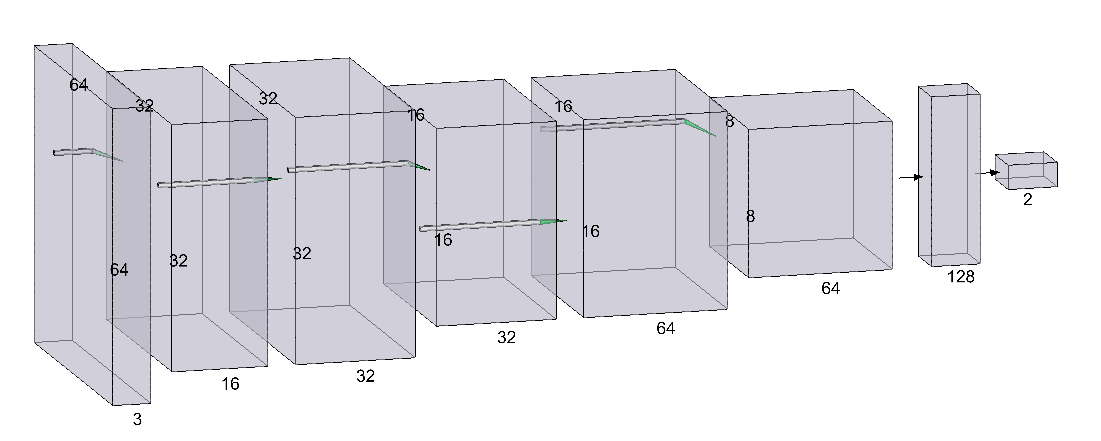
">

Pero también una visualización numérica es util. Para ello podemos usar la librería "torchsummary" que la podemos instalar como cualquier otro paquete. Recuerden volver a comentar la linea de abajo una vez hayan instalado la librería.

In [ ]:
# !pip install torchsummary

In [ ]:
from torchsummary import summary

# Con esta gráfica podemos observar las dimensiones de cada capa, así como los parámetros que está 
# optimizando dentro de la misma
summary(model, (input_channels, image_size, image_size))

**NOTA:** Conteste como txt, pdf, comentario en la entrega o en este mismo notebook:
* ¿Qué haría para mejorar el rendimiento del modelo?
* ¿Qué haría para disminuir las posibilidades de overfitting?

## Calificación

**Asegúrese de que su notebook corra sin errores (quite o resuelva los raise NotImplementedError()) y luego reinicie el kernel y vuelva a correr todas las celdas para obtener su calificación correcta**

In [ ]:

print()
print("La fraccion de abajo muestra su rendimiento basado en las partes visibles de este laboratorio")
tick.summarise_marks() # 
